### IBM AutoAI-SDK Auto-Generated Notebook v1.14.3

**Note:** Notebook code generated using AutoAI will execute successfully. If code is modified or reordered,   
there is no guarantee it will successfully execute. This pipeline is optimized for the original dataset.  
The pipeline may fail or produce sub-optimium results if used with different data. For different data,  
please consider returning to AutoAI Experiments to generate a new pipeline. Please read our documentation   
for more information:   
<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/autoai-notebook.html">Cloud Platform</a>  


Before modifying the pipeline or trying to re-fit the pipeline, consider:   
The notebook converts dataframes to numpy arrays before fitting the pipeline   
(a current restriction of the preprocessor pipeline). The known_values_list is passed by reference   
and populated with categorical values during fit of the preprocessing pipeline. Delete its members before re-fitting.

<a id="content"></a>
## Notebook content

This notebook contains steps and code to demonstrate AutoAI pipeline. This notebook introduces commands for getting data,  
pipeline model, model inspection and testing.

Some familiarity with Python is helpful. This notebook uses Python 3.

## Notebook goals

-  inspection of trained pipeline via graphical vizualization and source code preview
-  pipeline evaluation
-  pipeline deployment and webservice scoring.

## Contents

This notebook contains the following parts:

1.	[Setup](#setup)      
    a.  [Insert WML credentials](#wml_credentials)  
    b.  [AutoAI experiment metadata](#variables_definition)      
2.	[Pipeline inspection](#inspection)      
    a.  [Get historical optimizer instance](#get_hist_and_train)      
    b.  [Get pipeline model](#get_pipeline)      
    c.  [Preview pipeline model as python code](#preview_model_to_python_code)      
    d.  [Visualize pipeline model](#visualize_pipeline)      
    e.  [Read training data](#train_read)        
    f.  [Test pipeline model locally](#test_model)       
3.	[Pipeline refinery and testing (optional)](#refinery)  
    a.  [Pipeline definition source code](#pipeline_definition)      
    b.  [Lale library](#lale_library)      
4.	[Deploy and score](#scoring)        
    a.  [Create deployment](#deployment)      
    b.  [Score webservice](#online_scoring)        
    c.  [Delete deployment](#delete_deployment)       
5.  [Authors](#authors)      

<a id="setup"></a>
# Setup

Before you use the sample code in this notebook, you must perform the following setup tasks:
 - `ibm_watson_machine_learning` installation
 - `autoai-libs` installation/upgrade
 - `lightgbm` or `xgboost` installation/downgrade if they are needed.

In [20]:
#!pip install -U ibm-watson-machine-learning
     

!pip install 'lale==0.4.15' | tail -n 1
!pip install 'ibm-watson-machine-learning==1.0.66' | tail -n 1



In [21]:


!pip install -U 'autoai-libs==1.12.6'
!pip install -U 'lightgbm==3.1.1'
{"cells": [{"metadata": {}, "cell_type": "markdown", "source": "# Predicting Telco Customer Churn on IBM Cloud Pak for Data (ICP4D)"}, {"metadata": {}, "cell_type": "markdown", "source": "We'll use this notebook to create a machine learning model to predict customer churn. In this notebook we will build the prediction model using the Scikit-Learn library.\n\nThis notebook walks you through these steps:\n\n- Load and Visualize data set.\n- Build a predictive model with Scikit-Learn\n- Save the model in the ML repository"}, {"metadata": {}, "cell_type": "markdown", "source": "## 1.0 Install required packages\n\nThere are a couple of Python packages we will use in this notebook. \n"}, {"metadata": {}, "cell_type": "code", "source": "import pandas as pd\nimport numpy as np\nimport json\nimport os\n\n# Import the Project Library to read/write project assets\nfrom project_lib import Project\n#project = Project.access()\n\nimport warnings\nwarnings.filterwarnings(\"ignore\")", "execution_count": 1, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "## 2.0 Load and Clean data\n\nWe'll load our data as a pandas data frame.\n\n**<font color='red'><< FOLLOW THE INSTRUCTIONS BELOW TO LOAD THE DATASET >></font>**\n\n* Highlight the cell below by clicking it.\n* Click the `10/01` \"Find data\" icon in the upper right of the notebook.\n* Choose the `Telco-Customer-Churn.csv`. Click `Insert to code` and choose `Insert Pandas DataFrame`.\n* The code to bring the data into the notebook environment and create a Pandas DataFrame will be added to the cell below.\n* Run the cell\n"}, {"metadata": {}, "cell_type": "code", "source": "# Place cursor below and insert the Pandas DataFrame for the Telco churn data\nimport os, types\nimport pandas as pd\nfrom botocore.client import Config\nimport ibm_boto3\n\ndef __iter__(self): return 0\n\n# @hidden_cell\n# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.\n# You might want to remove those credentials before you share the notebook.\n\nif os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':\n    endpoint_7bf8f76e95094f72a0fb3297f80527ac = 'https://s3.eu.cloud-object-storage.appdomain.cloud'\nelse:\n    endpoint_7bf8f76e95094f72a0fb3297f80527ac = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'\n\nclient_7bf8f76e95094f72a0fb3297f80527ac = ibm_boto3.client(service_name='s3',\n    ibm_api_key_id='YKMIm_xMwwGQqBjE1llFw1KYJHYDss1bIycPeqSQOKAF',\n    ibm_auth_endpoint=\"https://iam.cloud.ibm.com/oidc/token\",\n    config=Config(signature_version='oauth'),\n    endpoint_url=endpoint_7bf8f76e95094f72a0fb3297f80527ac)\n\nbody = client_7bf8f76e95094f72a0fb3297f80527ac.get_object(Bucket='supervisedlearning-donotdelete-pr-t06znfdhzopthc',Key='Telco-Customer-Churn.csv')['Body']\n# add missing __iter__ method, so pandas accepts body as file-like object\nif not hasattr(body, \"__iter__\"): body.__iter__ = types.MethodType( __iter__, body )\n\ndf_data_3 = pd.read_csv(body)\ndf_data_3.head()\n", "execution_count": 2, "outputs": [{"output_type": "execute_result", "execution_count": 2, "data": {"text/plain": "   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \\\n0  7590-VHVEG  Female              0     Yes         No       1           No   \n1  5575-GNVDE    Male              0      No         No      34          Yes   \n2  3668-QPYBK    Male              0      No         No       2          Yes   \n3  7795-CFOCW    Male              0      No         No      45           No   \n4  9237-HQITU  Female              0      No         No       2          Yes   \n\n      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \\\n0  No phone service             DSL             No  ...               No   \n1                No             DSL            Yes  ...              Yes   \n2                No             DSL            Yes  ...               No   \n3  No phone service             DSL            Yes  ...              Yes   \n4                No     Fiber optic             No  ...               No   \n\n  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \\\n0          No          No              No  Month-to-month              Yes   \n1          No          No              No        One year               No   \n2          No          No              No  Month-to-month              Yes   \n3         Yes          No              No        One year               No   \n4          No          No              No  Month-to-month              Yes   \n\n               PaymentMethod MonthlyCharges  TotalCharges Churn  \n0           Electronic check          29.85         29.85    No  \n1               Mailed check          56.95        1889.5    No  \n2               Mailed check          53.85        108.15   Yes  \n3  Bank transfer (automatic)          42.30       1840.75    No  \n4           Electronic check          70.70        151.65   Yes  \n\n[5 rows x 21 columns]", "text/html": "<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border=\"1\" class=\"dataframe\">\n  <thead>\n    <tr style=\"text-align: right;\">\n      <th></th>\n      <th>customerID</th>\n      <th>gender</th>\n      <th>SeniorCitizen</th>\n      <th>Partner</th>\n      <th>Dependents</th>\n      <th>tenure</th>\n      <th>PhoneService</th>\n      <th>MultipleLines</th>\n      <th>InternetService</th>\n      <th>OnlineSecurity</th>\n      <th>...</th>\n      <th>DeviceProtection</th>\n      <th>TechSupport</th>\n      <th>StreamingTV</th>\n      <th>StreamingMovies</th>\n      <th>Contract</th>\n      <th>PaperlessBilling</th>\n      <th>PaymentMethod</th>\n      <th>MonthlyCharges</th>\n      <th>TotalCharges</th>\n      <th>Churn</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>7590-VHVEG</td>\n      <td>Female</td>\n      <td>0</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>1</td>\n      <td>No</td>\n      <td>No phone service</td>\n      <td>DSL</td>\n      <td>No</td>\n      <td>...</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>29.85</td>\n      <td>29.85</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>5575-GNVDE</td>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>34</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>...</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>One year</td>\n      <td>No</td>\n      <td>Mailed check</td>\n      <td>56.95</td>\n      <td>1889.5</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3668-QPYBK</td>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>2</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>...</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Mailed check</td>\n      <td>53.85</td>\n      <td>108.15</td>\n      <td>Yes</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>7795-CFOCW</td>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>45</td>\n      <td>No</td>\n      <td>No phone service</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>...</td>\n      <td>Yes</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>One year</td>\n      <td>No</td>\n      <td>Bank transfer (automatic)</td>\n      <td>42.30</td>\n      <td>1840.75</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>9237-HQITU</td>\n      <td>Female</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>2</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Fiber optic</td>\n      <td>No</td>\n      <td>...</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>70.70</td>\n      <td>151.65</td>\n      <td>Yes</td>\n    </tr>\n  </tbody>\n</table>\n<p>5 rows \u00d7 21 columns</p>\n</div>"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "We'll use the Pandas naming convention df for our DataFrame. Make sure that the cell below uses the name for the dataframe used above. For the locally uploaded file it should look like df_data_1 or df_data_2 or df_data_x.\n\n**<font color='red'><< UPDATE THE VARIABLE ASSIGNMENT TO THE VARIABLE GENERATED ABOVE. >></font>**"}, {"metadata": {}, "cell_type": "code", "source": "# for virtualized data\n# df = data_df_1\n\n# for local upload\ndf = df_data_3", "execution_count": 3, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "### 2.1 Drop CustomerID feature (column)"}, {"metadata": {}, "cell_type": "code", "source": "df = df.drop('customerID', axis=1)\ndf.head(5)", "execution_count": 4, "outputs": [{"output_type": "execute_result", "execution_count": 4, "data": {"text/plain": "   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \\\n0  Female              0     Yes         No       1           No   \n1    Male              0      No         No      34          Yes   \n2    Male              0      No         No       2          Yes   \n3    Male              0      No         No      45           No   \n4  Female              0      No         No       2          Yes   \n\n      MultipleLines InternetService OnlineSecurity OnlineBackup  \\\n0  No phone service             DSL             No          Yes   \n1                No             DSL            Yes           No   \n2                No             DSL            Yes          Yes   \n3  No phone service             DSL            Yes           No   \n4                No     Fiber optic             No           No   \n\n  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \\\n0               No          No          No              No  Month-to-month   \n1              Yes          No          No              No        One year   \n2               No          No          No              No  Month-to-month   \n3              Yes         Yes          No              No        One year   \n4               No          No          No              No  Month-to-month   \n\n  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \\\n0              Yes           Electronic check           29.85        29.85   \n1               No               Mailed check           56.95       1889.5   \n2              Yes               Mailed check           53.85       108.15   \n3               No  Bank transfer (automatic)           42.30      1840.75   \n4              Yes           Electronic check           70.70       151.65   \n\n  Churn  \n0    No  \n1    No  \n2   Yes  \n3    No  \n4   Yes  ", "text/html": "<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border=\"1\" class=\"dataframe\">\n  <thead>\n    <tr style=\"text-align: right;\">\n      <th></th>\n      <th>gender</th>\n      <th>SeniorCitizen</th>\n      <th>Partner</th>\n      <th>Dependents</th>\n      <th>tenure</th>\n      <th>PhoneService</th>\n      <th>MultipleLines</th>\n      <th>InternetService</th>\n      <th>OnlineSecurity</th>\n      <th>OnlineBackup</th>\n      <th>DeviceProtection</th>\n      <th>TechSupport</th>\n      <th>StreamingTV</th>\n      <th>StreamingMovies</th>\n      <th>Contract</th>\n      <th>PaperlessBilling</th>\n      <th>PaymentMethod</th>\n      <th>MonthlyCharges</th>\n      <th>TotalCharges</th>\n      <th>Churn</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Female</td>\n      <td>0</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>1</td>\n      <td>No</td>\n      <td>No phone service</td>\n      <td>DSL</td>\n      <td>No</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>29.85</td>\n      <td>29.85</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>34</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>One year</td>\n      <td>No</td>\n      <td>Mailed check</td>\n      <td>56.95</td>\n      <td>1889.5</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>2</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Mailed check</td>\n      <td>53.85</td>\n      <td>108.15</td>\n      <td>Yes</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Male</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>45</td>\n      <td>No</td>\n      <td>No phone service</td>\n      <td>DSL</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Yes</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>No</td>\n      <td>One year</td>\n      <td>No</td>\n      <td>Bank transfer (automatic)</td>\n      <td>42.30</td>\n      <td>1840.75</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Female</td>\n      <td>0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>2</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Fiber optic</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>70.70</td>\n      <td>151.65</td>\n      <td>Yes</td>\n    </tr>\n  </tbody>\n</table>\n</div>"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "### 2.2 Examine the data types of the features"}, {"metadata": {}, "cell_type": "code", "source": "df.info()", "execution_count": 5, "outputs": [{"output_type": "stream", "text": "<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 7043 entries, 0 to 7042\nData columns (total 20 columns):\n #   Column            Non-Null Count  Dtype  \n---  ------            --------------  -----  \n 0   gender            7043 non-null   object \n 1   SeniorCitizen     7043 non-null   int64  \n 2   Partner           7043 non-null   object \n 3   Dependents        7043 non-null   object \n 4   tenure            7043 non-null   int64  \n 5   PhoneService      7043 non-null   object \n 6   MultipleLines     7043 non-null   object \n 7   InternetService   7043 non-null   object \n 8   OnlineSecurity    7043 non-null   object \n 9   OnlineBackup      7043 non-null   object \n 10  DeviceProtection  7043 non-null   object \n 11  TechSupport       7043 non-null   object \n 12  StreamingTV       7043 non-null   object \n 13  StreamingMovies   7043 non-null   object \n 14  Contract          7043 non-null   object \n 15  PaperlessBilling  7043 non-null   object \n 16  PaymentMethod     7043 non-null   object \n 17  MonthlyCharges    7043 non-null   float64\n 18  TotalCharges      7043 non-null   object \n 19  Churn             7043 non-null   object \ndtypes: float64(1), int64(2), object(17)\nmemory usage: 1.1+ MB\n", "name": "stdout"}]}, {"metadata": {}, "cell_type": "code", "source": "# Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.\ndf.describe(include = 'all')", "execution_count": 6, "outputs": [{"output_type": "execute_result", "execution_count": 6, "data": {"text/plain": "       gender  SeniorCitizen Partner Dependents       tenure PhoneService  \\\ncount    7043    7043.000000    7043       7043  7043.000000         7043   \nunique      2            NaN       2          2          NaN            2   \ntop      Male            NaN      No         No          NaN          Yes   \nfreq     3555            NaN    3641       4933          NaN         6361   \nmean      NaN       0.162147     NaN        NaN    32.371149          NaN   \nstd       NaN       0.368612     NaN        NaN    24.559481          NaN   \nmin       NaN       0.000000     NaN        NaN     0.000000          NaN   \n25%       NaN       0.000000     NaN        NaN     9.000000          NaN   \n50%       NaN       0.000000     NaN        NaN    29.000000          NaN   \n75%       NaN       0.000000     NaN        NaN    55.000000          NaN   \nmax       NaN       1.000000     NaN        NaN    72.000000          NaN   \n\n       MultipleLines InternetService OnlineSecurity OnlineBackup  \\\ncount           7043            7043           7043         7043   \nunique             3               3              3            3   \ntop               No     Fiber optic             No           No   \nfreq            3390            3096           3498         3088   \nmean             NaN             NaN            NaN          NaN   \nstd              NaN             NaN            NaN          NaN   \nmin              NaN             NaN            NaN          NaN   \n25%              NaN             NaN            NaN          NaN   \n50%              NaN             NaN            NaN          NaN   \n75%              NaN             NaN            NaN          NaN   \nmax              NaN             NaN            NaN          NaN   \n\n       DeviceProtection TechSupport StreamingTV StreamingMovies  \\\ncount              7043        7043        7043            7043   \nunique                3           3           3               3   \ntop                  No          No          No              No   \nfreq               3095        3473        2810            2785   \nmean                NaN         NaN         NaN             NaN   \nstd                 NaN         NaN         NaN             NaN   \nmin                 NaN         NaN         NaN             NaN   \n25%                 NaN         NaN         NaN             NaN   \n50%                 NaN         NaN         NaN             NaN   \n75%                 NaN         NaN         NaN             NaN   \nmax                 NaN         NaN         NaN             NaN   \n\n              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \\\ncount             7043             7043              7043     7043.000000   \nunique               3                2                 4             NaN   \ntop     Month-to-month              Yes  Electronic check             NaN   \nfreq              3875             4171              2365             NaN   \nmean               NaN              NaN               NaN       64.761692   \nstd                NaN              NaN               NaN       30.090047   \nmin                NaN              NaN               NaN       18.250000   \n25%                NaN              NaN               NaN       35.500000   \n50%                NaN              NaN               NaN       70.350000   \n75%                NaN              NaN               NaN       89.850000   \nmax                NaN              NaN               NaN      118.750000   \n\n       TotalCharges Churn  \ncount          7043  7043  \nunique         6531     2  \ntop                    No  \nfreq             11  5174  \nmean            NaN   NaN  \nstd             NaN   NaN  \nmin             NaN   NaN  \n25%             NaN   NaN  \n50%             NaN   NaN  \n75%             NaN   NaN  \nmax             NaN   NaN  ", "text/html": "<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border=\"1\" class=\"dataframe\">\n  <thead>\n    <tr style=\"text-align: right;\">\n      <th></th>\n      <th>gender</th>\n      <th>SeniorCitizen</th>\n      <th>Partner</th>\n      <th>Dependents</th>\n      <th>tenure</th>\n      <th>PhoneService</th>\n      <th>MultipleLines</th>\n      <th>InternetService</th>\n      <th>OnlineSecurity</th>\n      <th>OnlineBackup</th>\n      <th>DeviceProtection</th>\n      <th>TechSupport</th>\n      <th>StreamingTV</th>\n      <th>StreamingMovies</th>\n      <th>Contract</th>\n      <th>PaperlessBilling</th>\n      <th>PaymentMethod</th>\n      <th>MonthlyCharges</th>\n      <th>TotalCharges</th>\n      <th>Churn</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>7043</td>\n      <td>7043.000000</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043.000000</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043.000000</td>\n      <td>7043</td>\n      <td>7043</td>\n    </tr>\n    <tr>\n      <th>unique</th>\n      <td>2</td>\n      <td>NaN</td>\n      <td>2</td>\n      <td>2</td>\n      <td>NaN</td>\n      <td>2</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>2</td>\n      <td>4</td>\n      <td>NaN</td>\n      <td>6531</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>top</th>\n      <td>Male</td>\n      <td>NaN</td>\n      <td>No</td>\n      <td>No</td>\n      <td>NaN</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Fiber optic</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>NaN</td>\n      <td></td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>freq</th>\n      <td>3555</td>\n      <td>NaN</td>\n      <td>3641</td>\n      <td>4933</td>\n      <td>NaN</td>\n      <td>6361</td>\n      <td>3390</td>\n      <td>3096</td>\n      <td>3498</td>\n      <td>3088</td>\n      <td>3095</td>\n      <td>3473</td>\n      <td>2810</td>\n      <td>2785</td>\n      <td>3875</td>\n      <td>4171</td>\n      <td>2365</td>\n      <td>NaN</td>\n      <td>11</td>\n      <td>5174</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>NaN</td>\n      <td>0.162147</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>32.371149</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>64.761692</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>NaN</td>\n      <td>0.368612</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>24.559481</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>30.090047</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>18.250000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>25%</th>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>9.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>35.500000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>50%</th>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>29.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>70.350000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>75%</th>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>55.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>89.850000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>max</th>\n      <td>NaN</td>\n      <td>1.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>72.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>118.750000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n  </tbody>\n</table>\n</div>"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from $18 to $118, etc"}, {"metadata": {}, "cell_type": "markdown", "source": "### 2.3 Convert TotalCharges and SeniorCitizen\n"}, {"metadata": {}, "cell_type": "code", "source": "df.TotalCharges = pd.to_numeric(df.TotalCharges,errors=\"coerce\")\ndf.SeniorCitizen = df.SeniorCitizen.astype(\"object\")", "execution_count": 7, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "# Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.\ndf.describe(include = 'all')", "execution_count": 8, "outputs": [{"output_type": "execute_result", "execution_count": 8, "data": {"text/plain": "       gender  SeniorCitizen Partner Dependents       tenure PhoneService  \\\ncount    7043         7043.0    7043       7043  7043.000000         7043   \nunique      2            2.0       2          2          NaN            2   \ntop      Male            0.0      No         No          NaN          Yes   \nfreq     3555         5901.0    3641       4933          NaN         6361   \nmean      NaN            NaN     NaN        NaN    32.371149          NaN   \nstd       NaN            NaN     NaN        NaN    24.559481          NaN   \nmin       NaN            NaN     NaN        NaN     0.000000          NaN   \n25%       NaN            NaN     NaN        NaN     9.000000          NaN   \n50%       NaN            NaN     NaN        NaN    29.000000          NaN   \n75%       NaN            NaN     NaN        NaN    55.000000          NaN   \nmax       NaN            NaN     NaN        NaN    72.000000          NaN   \n\n       MultipleLines InternetService OnlineSecurity OnlineBackup  \\\ncount           7043            7043           7043         7043   \nunique             3               3              3            3   \ntop               No     Fiber optic             No           No   \nfreq            3390            3096           3498         3088   \nmean             NaN             NaN            NaN          NaN   \nstd              NaN             NaN            NaN          NaN   \nmin              NaN             NaN            NaN          NaN   \n25%              NaN             NaN            NaN          NaN   \n50%              NaN             NaN            NaN          NaN   \n75%              NaN             NaN            NaN          NaN   \nmax              NaN             NaN            NaN          NaN   \n\n       DeviceProtection TechSupport StreamingTV StreamingMovies  \\\ncount              7043        7043        7043            7043   \nunique                3           3           3               3   \ntop                  No          No          No              No   \nfreq               3095        3473        2810            2785   \nmean                NaN         NaN         NaN             NaN   \nstd                 NaN         NaN         NaN             NaN   \nmin                 NaN         NaN         NaN             NaN   \n25%                 NaN         NaN         NaN             NaN   \n50%                 NaN         NaN         NaN             NaN   \n75%                 NaN         NaN         NaN             NaN   \nmax                 NaN         NaN         NaN             NaN   \n\n              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \\\ncount             7043             7043              7043     7043.000000   \nunique               3                2                 4             NaN   \ntop     Month-to-month              Yes  Electronic check             NaN   \nfreq              3875             4171              2365             NaN   \nmean               NaN              NaN               NaN       64.761692   \nstd                NaN              NaN               NaN       30.090047   \nmin                NaN              NaN               NaN       18.250000   \n25%                NaN              NaN               NaN       35.500000   \n50%                NaN              NaN               NaN       70.350000   \n75%                NaN              NaN               NaN       89.850000   \nmax                NaN              NaN               NaN      118.750000   \n\n        TotalCharges Churn  \ncount    7032.000000  7043  \nunique           NaN     2  \ntop              NaN    No  \nfreq             NaN  5174  \nmean     2283.300441   NaN  \nstd      2266.771362   NaN  \nmin        18.800000   NaN  \n25%       401.450000   NaN  \n50%      1397.475000   NaN  \n75%      3794.737500   NaN  \nmax      8684.800000   NaN  ", "text/html": "<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border=\"1\" class=\"dataframe\">\n  <thead>\n    <tr style=\"text-align: right;\">\n      <th></th>\n      <th>gender</th>\n      <th>SeniorCitizen</th>\n      <th>Partner</th>\n      <th>Dependents</th>\n      <th>tenure</th>\n      <th>PhoneService</th>\n      <th>MultipleLines</th>\n      <th>InternetService</th>\n      <th>OnlineSecurity</th>\n      <th>OnlineBackup</th>\n      <th>DeviceProtection</th>\n      <th>TechSupport</th>\n      <th>StreamingTV</th>\n      <th>StreamingMovies</th>\n      <th>Contract</th>\n      <th>PaperlessBilling</th>\n      <th>PaymentMethod</th>\n      <th>MonthlyCharges</th>\n      <th>TotalCharges</th>\n      <th>Churn</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>7043</td>\n      <td>7043.0</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043.000000</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043</td>\n      <td>7043.000000</td>\n      <td>7032.000000</td>\n      <td>7043</td>\n    </tr>\n    <tr>\n      <th>unique</th>\n      <td>2</td>\n      <td>2.0</td>\n      <td>2</td>\n      <td>2</td>\n      <td>NaN</td>\n      <td>2</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>3</td>\n      <td>2</td>\n      <td>4</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>top</th>\n      <td>Male</td>\n      <td>0.0</td>\n      <td>No</td>\n      <td>No</td>\n      <td>NaN</td>\n      <td>Yes</td>\n      <td>No</td>\n      <td>Fiber optic</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>No</td>\n      <td>Month-to-month</td>\n      <td>Yes</td>\n      <td>Electronic check</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>No</td>\n    </tr>\n    <tr>\n      <th>freq</th>\n      <td>3555</td>\n      <td>5901.0</td>\n      <td>3641</td>\n      <td>4933</td>\n      <td>NaN</td>\n      <td>6361</td>\n      <td>3390</td>\n      <td>3096</td>\n      <td>3498</td>\n      <td>3088</td>\n      <td>3095</td>\n      <td>3473</td>\n      <td>2810</td>\n      <td>2785</td>\n      <td>3875</td>\n      <td>4171</td>\n      <td>2365</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>5174</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>32.371149</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>64.761692</td>\n      <td>2283.300441</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>std</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>24.559481</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>30.090047</td>\n      <td>2266.771362</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>min</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>0.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>18.250000</td>\n      <td>18.800000</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>25%</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>9.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>35.500000</td>\n      <td>401.450000</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>50%</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>29.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>70.350000</td>\n      <td>1397.475000</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>75%</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>55.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>89.850000</td>\n      <td>3794.737500</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>max</th>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>72.000000</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>118.750000</td>\n      <td>8684.800000</td>\n      <td>NaN</td>\n    </tr>\n  </tbody>\n</table>\n</div>"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "We now see statistics for the `TotalCharges` feature."}, {"metadata": {}, "cell_type": "markdown", "source": "\n\n### 2.4 Any NaN values should be removed to create a more accurate model."}, {"metadata": {}, "cell_type": "code", "source": "# Check if we have any NaN values and see which features have missing values that should be addressed\nprint(df.isnull().values.any())\ndf.isnull().sum()", "execution_count": 9, "outputs": [{"output_type": "stream", "text": "True\n", "name": "stdout"}, {"output_type": "execute_result", "execution_count": 9, "data": {"text/plain": "gender               0\nSeniorCitizen        0\nPartner              0\nDependents           0\ntenure               0\nPhoneService         0\nMultipleLines        0\nInternetService      0\nOnlineSecurity       0\nOnlineBackup         0\nDeviceProtection     0\nTechSupport          0\nStreamingTV          0\nStreamingMovies      0\nContract             0\nPaperlessBilling     0\nPaymentMethod        0\nMonthlyCharges       0\nTotalCharges        11\nChurn                0\ndtype: int64"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "We should see that the `TotalCharges` column has missing values. There are various ways we can address this issue:\n\n- Drop records with missing values \n- Fill in the missing value with one of the following strategies: Zero, Mean of the values for the column, Random value, etc)."}, {"metadata": {}, "cell_type": "code", "source": "# Handle missing values for nan_column (TotalCharges)\nfrom sklearn.impute import SimpleImputer\n\n# Find the column number for TotalCharges (starting at 0).\ntotal_charges_idx = df.columns.get_loc(\"TotalCharges\")\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\n\ndf.iloc[:, total_charges_idx] = imputer.fit_transform(df.iloc[:, total_charges_idx].values.reshape(-1, 1))\ndf.iloc[:, total_charges_idx] = pd.Series(df.iloc[:, total_charges_idx])", "execution_count": 10, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "# Validate that we have addressed any NaN values\nprint(df.isnull().values.any())\ndf.isnull().sum()", "execution_count": 11, "outputs": [{"output_type": "stream", "text": "False\n", "name": "stdout"}, {"output_type": "execute_result", "execution_count": 11, "data": {"text/plain": "gender              0\nSeniorCitizen       0\nPartner             0\nDependents          0\ntenure              0\nPhoneService        0\nMultipleLines       0\nInternetService     0\nOnlineSecurity      0\nOnlineBackup        0\nDeviceProtection    0\nTechSupport         0\nStreamingTV         0\nStreamingMovies     0\nContract            0\nPaperlessBilling    0\nPaymentMethod       0\nMonthlyCharges      0\nTotalCharges        0\nChurn               0\ndtype: int64"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "\n### 2.5 Categorize Features\n\nWe will categorize some of the columns / features based on wether they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations."}, {"metadata": {}, "cell_type": "code", "source": "df.dtypes", "execution_count": 12, "outputs": [{"output_type": "execute_result", "execution_count": 12, "data": {"text/plain": "gender               object\nSeniorCitizen        object\nPartner              object\nDependents           object\ntenure                int64\nPhoneService         object\nMultipleLines        object\nInternetService      object\nOnlineSecurity       object\nOnlineBackup         object\nDeviceProtection     object\nTechSupport          object\nStreamingTV          object\nStreamingMovies      object\nContract             object\nPaperlessBilling     object\nPaymentMethod        object\nMonthlyCharges      float64\nTotalCharges        float64\nChurn                object\ndtype: object"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "code", "source": "columns_idx = np.s_[0:] # Slice of first row(header) with all columns.\nfirst_record_idx = np.s_[0] # Index of first record\n\nstring_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields\nall_features = [x for x in df.columns if x != 'Churn']\ncategorical_columns = list(np.array(df.columns)[columns_idx][string_fields])\ncategorical_features = [x for x in categorical_columns if x != 'Churn'] + [\"SeniorCitizen\"]\ncontinuous_features = [x for x in all_features if x not in categorical_features]\n\nprint('All Features: ', all_features)\nprint('\\nCategorical Features: ', categorical_features)\nprint('\\nContinuous Features: ', continuous_features)\nprint('\\nAll Categorical Columns: ', categorical_columns)", "execution_count": 13, "outputs": [{"output_type": "stream", "text": "All Features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']\n\nCategorical Features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']\n\nContinuous Features:  ['tenure', 'MonthlyCharges', 'TotalCharges']\n\nAll Categorical Columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']\n", "name": "stdout"}]}, {"metadata": {}, "cell_type": "markdown", "source": "### 2.6 Visualize data\n\nData visualization can be used to find patterns, detect outliers, understand distribution and more. We can use graphs such as:\n\n- Histograms, boxplots, etc: To find distribution / spread of our continuous variables.\n- Bar charts: To show frequency in categorical values.\n"}, {"metadata": {}, "cell_type": "code", "source": "import seaborn as sns\nimport matplotlib.pyplot as plt\n\nfrom sklearn.preprocessing import LabelEncoder\n\n%matplotlib inline\nsns.set(style=\"darkgrid\")\nsns.set_palette(\"hls\", 3)", "execution_count": 14, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "First, we get a high level view of the distribution of `Churn`. What percentage of customer in our dataset are churning vs not churning. "}, {"metadata": {}, "cell_type": "code", "source": "print(df.groupby(['Churn']).size())\nchurn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)\nplt.ylabel('Count')\nfor p in churn_plot.patches:\n    height = p.get_height()\n    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha=\"center\") \nplt.show()", "execution_count": 15, "outputs": [{"output_type": "stream", "text": "Churn\nNo     5174\nYes    1869\ndtype: int64\n", "name": "stdout"}, {"output_type": "display_data", "data": {"text/plain": "<Figure size 432x288 with 1 Axes>", "image/png": "iVBORw0KGgoAAAANSUhEUgAAAZMAAAEMCAYAAAABLFv3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAaEElEQVR4nO3de3CU9b3H8c/uwkYuibmHjVI1ysBaUNSo9QL2hCJUIuAopt16KhRbEblqPIaiCRJQA0xREEzxgs4pyPR0jiBrQ6IFq7ZWpeKtAZEYPAhLEhIgXEJCdp/zh8fMyUhg2d9mN5f3a4YZ8vz22f2uhryzz7MXm2VZlgAAMGCP9gAAgM6PmAAAjBETAIAxYgIAMEZMAADGiAkAwBgxAQAY6xHtAaLp4MFjCgR4mQ0ABMNutykhoc8p17p1TAIBi5icwsiRw1p93djYqNtuu0OzZ/+HKiu/0oIFBdq79xtJ0sCBbs2alauLLsqQJJWVbdKKFUvldMZozpx8XXllpiRp795vVFiYrxUrnpPD4YjsHQLQ7mzd+RXwtbVHickZNDQ0aOzYm7V48dMaOvRKHTlyREePHlG/fi4FAgH993//l7ze9Xr55XVqbm7WnXeO06pVL+uLL7aruHi5/vM//yhJeuihmbr77ns0ePCQKN8jAKGy221KSup7yrVu/cgEZ/bWW39RfHyiLr/8CklSbGysYmNjJUmWZclut+ubb/ZIkurrDyslJVXJycmKjb1G+/btlSRt2fKmkpNTCQnQhRETnFZJiVejR98im83Wavvo0T9WQ0ODAoGAJk++V5IUH5+gw4cPq7q6Sjt3fqGLLrpYx48f18svv6inn14ZjfEBRAiHuTjM1ab9+/frzjvHat26V5Weft731hsaGlRS4lW/fi5df/2NkqStWz/QqlUr5XQ6NXPmg9q06XVddFGG0tPP1+rVz6lnz56aNm2WMjIuifTdAWCIw1wIyaZNXl122dBThkSSevXqpfHjb1d29kitWfNfSkhIVGbmNcrMvEaStGvXl9qxY7umTp2pCRPGauXK51VVVaUnn1ygVateiuA9AdDeeJ0J2rRp0581evSY014mEAjoxIkTqqmpbrXdsiwtXbpIs2bl6vDhQ/L7/erXzyW3+1JVVHzZnmMDiAIemeCUPvvsEx04UK2srJ+02v7hh//QuefG6+KLB+jEiQY999yzio2N1QUXXNTqchs3rteAAQM1YMBANTc3q7GxUZWVX6mqan+bj3QAdF7EJEQJcTHqEeOM9hjt5q23ynTzzTfrggv6tdpuszWrsPBRVVVVKSYmRkOGDNGLL76g889PbrlMXV2dXn31j1q3bp369v32+GpBQb5mz56qmJgYPf7440pJiY3o/YmU5sYmHaxvjPYYQMRxAj7EE/ApKbHaOmNKmCdCZ5e5rFg1NUeiPQbQLk53Ap5zJgAAY8QEAGAsYudMsrKy5HQ6FRMTI0nKzc3VsGHDVFlZqby8PB06dEjx8fEqKirShRdeKEkhrwEAIiuij0yWLVumDRs2aMOGDRo27Ns3EywoKJDH41Fpaak8Ho/y8/NbLh/qGgAgsqJ6mKu2tlbl5eXKzs6WJGVnZ6u8vFx1dXUhrwEAIi+iTw3Ozc2VZVm66qqr9MADD8jn8yktLa3lLckdDodSU1Pl8/lkWVZIa4mJiUHP09azEgATXfVpz8DpRCwma9askcvlUlNTkxYuXKj58+dr4sSJkbr5UzJ9ajBwKjw1GF1Vh3hqsMvlkiQ5nU55PB599NFHcrlcqqqqkt/vlyT5/X5VV1fL5XKFvAYAiLyIxOT48eM6cuTb39Ysy9Kf//xnud1uJSUlye12y+v1SpK8Xq/cbrcSExNDXgMARF5EXgG/Z88eTZ8+XX6/X4FAQBdffLEeeeQRpaamqqKiQnl5eaqvr1dcXJyKioqUkfHtR8CGuhYsXgGPcOMV8OjKTneYi7dTISYII2KCrqxDnDMBAHRdxAQAYIyYAACMERMAgDFiAgAwRkwAAMaICQDAGDEBABgjJgAAY8QEAGCMmAAAjBETAIAxYgIAMEZMAADGiAkAwBgxAQAYIyYAAGPEBABgjJgAAIwREwCAMWICADBGTAAAxogJAMAYMQEAGCMmAABjxAQAYIyYAACMERMAgDFiAgAwRkwAAMaICQDAWMRj8swzz2jgwIHauXOnJKmyslI5OTkaNWqUcnJytHv37pbLhroGAIisiMbkX//6lz7++GOlp6e3bCsoKJDH41Fpaak8Ho/y8/ON1wAAkRWxmDQ1NWn+/PkqKCiQzWaTJNXW1qq8vFzZ2dmSpOzsbJWXl6uuri7kNQBA5PWI1A09/fTTGjt2rPr379+yzefzKS0tTQ6HQ5LkcDiUmpoqn88ny7JCWktMTAx6pqSkvmG8h8C3UlJioz0CEHERicm2bdv02WefKTc3NxI3F7Ta2qMKBKyQ9uUHBtpSU3Mk2iMA7cJut7X5S3hEYvLhhx/qq6++0ogRIyRJ+/fv1+TJkzVnzhxVVVXJ7/fL4XDI7/erurpaLpdLlmWFtAYAiLyInDP5zW9+o3fffVebN2/W5s2b1a9fP73wwgu65ZZb5Ha75fV6JUler1dut1uJiYlKSkoKaQ0AEHkRO2fSlnnz5ikvL08rV65UXFycioqKjNcAAJFlsywrtJMGXYDpOZOtM6aEeSJ0dpnLijlngi7rdOdMeAU8AMAYMQEAGCMmAABjxAQAYIyYAACMERMAgDFiAgAwRkwAAMaICQDAGDEBABgjJgAAY8QEAGCMmAAAjBETAIAxYgIAMEZMAADGiAkAwBgxAQAYIyYAAGPEBABgjJgAAIwREwCAMWICADBGTAAAxogJAMAYMQEAGCMmAABjxAQAYIyYAACMERMAgLGgY1JSUnLK7Zs2bQrbMACAzinomMydO/eU2/Pz84Paf+rUqRo7dqzGjx8vj8ej7du3S5IqKyuVk5OjUaNGKScnR7t3727ZJ9Q1AEBknTEme/bs0Z49e2RZVsvfv/vz97//XU6nM6gbKioq0muvvab169frV7/6lX77299KkgoKCuTxeFRaWiqPx9MqTqGuAQAiq8eZLjBy5EjZbDZZlqWRI0e2WktOTtb06dODuqHY2NiWvx89elQ2m021tbUqLy/X6tWrJUnZ2dkqLCxUXV2dLMsKaS0xMTG4ew4ACJszxmTHjh2SpLvuukt/+MMfjG5s7ty5+tvf/ibLsvT888/L5/MpLS1NDodDkuRwOJSamiqfzyfLskJaO5uYJCX1Nbo/wKmkpMSe+UJAF3PGmHzHNCSStHDhQknS+vXrtWjRIs2cOdP4Ok3U1h5VIGCFtC8/MNCWmpoj0R4BaBd2u63NX8KDjsmePXv01FNPafv27Tp+/HirtbfeeuusBho/frzy8/PVr18/VVVVye/3y+FwyO/3q7q6Wi6XS5ZlhbQGAIi8oGOSm5ur/v376+GHH1avXr3O6kaOHTum+vr6lh/2mzdv1rnnnqukpCS53W55vV6NGzdOXq9Xbre75VBVqGsAgMiyWZYV1HGeK6+8Ulu3bpXdfvavczxw4ICmTp2qhoYG2e12nXvuuXr44Yf1wx/+UBUVFcrLy1N9fb3i4uJUVFSkjIwMSQp5LVimh7m2zpgS0r7oujKXFXOYC13W6Q5zBR2Te++9V9OnT9fgwYPDOlw0EROEGzFBVxaWcybnnXeeJk+erJtvvlnJycmt1qJ9Ih0AEF1Bx6ShoUFZWVlqbm7W/v3723MmAEAnE3RMnnjiifacAwDQiZ3VU4Pb0r9//7AMAwDonIKOyf9/W5Xv2Gw2SWp500YAQPcUdEy+e1uV79TU1OiZZ55RZmZm2IcCAHQuIX84VkpKiubOnavf/e534ZwHANAJGX3S4ldffaWGhoZwzQIA6KSCPszl8XhazpFI3z5VeNeuXbr//vvbZTAAQOcRdEwmTJjQ6utevXpp0KBBuvDCC8M9EwCgkwk6Jrfddlt7zgEA6MSCPmdy8uRJLVu2TCNGjNCQIUM0YsQILVu2TE1NTe05HwCgEwj6kcnixYv16aef6rHHHlN6err27dunlStX6ujRoy2f5w4A6J6CjsmmTZu0YcMGJSQkSJIyMjJ06aWXaty4ccQEALq5oA9ztfVO9UG+gz0AoAsLOiajR4/Wfffdp3feeUcVFRV6++23df/992v06NHtOR8AoBMI+jDXQw89pGeffVbz589XdXW10tLSNGbMGN13333tOR8AoBM44yOTf/7zn1q8eLGcTqdmzpypN954Q5988onKysrU1NSk8vLySMwJAOjAzhiT3//+97r66qtPuXbttdequLg47EMBADqXM8Zk+/btGjZs2CnXrr/+en3++edhHwoA0LmcMSZHjx7VyZMnT7nW3NysY8eOhX0oAEDncsaYZGRk6N133z3l2rvvvquMjIywDwUA6FzOGJOJEyeqoKBAZWVlCgQCkqRAIKCysjLNmzdPkyZNavchAQAd2xmfGnzrrbfqwIEDevjhh3Xy5EnFx8fr0KFDcjqdmjFjhrKzsyMxJwCgAwvqdSaTJk3ShAkTtG3bNh06dEjx8fG64oor1Ldv3/aeDwDQCQT9osW+ffu2+awuAED3ZvSxvQAASMQEABAGxAQAYIyYAACMERMAgLGIxOTgwYP69a9/rVGjRunWW2/VtGnTVFdXJ0mqrKxUTk6ORo0apZycHO3evbtlv1DXAHRNTU1NeuKJ+br99myNHDlckyZ59N57f5MklZWVaOTIYS1/Roy4QTfemKkdO7b/3/omjRs3ShMmjNVHH21tuc69e7/RlCm/kt/vj8p96ioiEhObzaZ77rlHpaWl2rhxo/r3768lS5ZIkgoKCuTxeFRaWiqPx6P8/PyW/UJdA9A1+f1+paam6ZlnVqm09C3dc899ys+fI59vn26++ad64413Wv48+GCe0tPP08CBg9Tc3Kzi4uV64YU1mjXrIS1duqjlOp96arGmTZsth8MRxXvW+UUkJvHx8br22mtbvh46dKj27dun2tpalZeXt7yKPjs7W+Xl5aqrqwt5DUDX1atXL02efK9crnTZ7XbdcMMwpaen64svtn/vsiUlXo0ePUY2m0319YeVkpKq5ORkZWZeo3379kqStmx5U8nJqRo8eEik70qXE/SLFsMlEAjolVdeUVZWlnw+n9LS0lp+I3A4HEpNTZXP55NlWSGtJSYmBj1LUhKv4Ef4paTERnuEbuPAgQPas+d/dOWVQ1r9d9+7d68++WSbFi8uUkpKrJKS+ujYsSPy+49p585yDRgwQL1727VmzUt66aWXlJDA/zNTEY9JYWGhevfurbvuuivqn9JYW3tUgYAV0r78wEBbamqORHuEbqG5uVkPPjhbo0ePUVxcaqv/7mvX/lGXXTZU55wT37J91qz/0H333S+n06kHH5yjoqIlGj/+Dn3wwcdavfo59ezZU9OmzVJGxiXRuksdnt1ua/OX8IjGpKioSF9//bWKi4tlt9vlcrlUVVUlv98vh8Mhv9+v6upquVwuWZYV0hqAri8QCKiw8FH17NlDDzzw8PfWN216Xf/+763f0Twz8xplZl4jSdq160vt2LFdU6fO1IQJY7Vy5fOqqqrSk08u0KpVL0XiLnQ5EXtq8NKlS/X5559rxYoVcjqdkqSkpCS53W55vV5JktfrldvtVmJiYshrALo2y7L05JOFqqur08KFi9SjR+vfiT/99GMdOFCjf/u3EW3uv3TpIs2alavDhw/J7/erXz+X3O5LVVHxZSTuQpcUkUcmX375pYqLi3XhhRfqZz/7mSTp/PPP14oVKzRv3jzl5eVp5cqViouLU1FRUct+oa4B6LqWLHlCu3dX6qmnViom5pzvrZeUvK6bbspS7959Trn/xo3rNWDAQA0YMFDNzc1qbGxUZeVXqqrar/T089p7/C7LZllWaCcNugDTcyZbZ0wJ80To7DKXFXeIcyZxCTGK6eGM9hhht3fvXmVlZcnpdLZ6RPLYY49p7Nixamxs1A033KDly5fruuuu+97+dXV1+uUvf6l169a1fITGa6+9pqKiIsXExOjxxx/Xj370o4jdn0hrbG5S/cHGkPc/3TkTYkJMEEYdJSYpKbGasnVGtMdAB1Ocuczo+/N0MeHtVAAAxogJAMAYMQEAGCMmAABjxAQAYIyYAACMERMAgDFiAgAwRkwAAMaICQDAGDEBABgjJgAAY8QEAGCMmAAAjBETAIAxYgIAMEZMAADGiAkAwBgxAQAYIyYAAGPEBABgjJgAAIwREwCAMWICADBGTAAAxogJAMAYMQEAGCMmAABjxAQAYIyYAACMRSQmRUVFysrK0sCBA7Vz586W7ZWVlcrJydGoUaOUk5Oj3bt3G68BACIvIjEZMWKE1qxZo/POO6/V9oKCAnk8HpWWlsrj8Sg/P994DQAQeRGJSWZmplwuV6tttbW1Ki8vV3Z2tiQpOztb5eXlqqurC3kNABAdPaJ1wz6fT2lpaXI4HJIkh8Oh1NRU+Xw+WZYV0lpiYuJZzZCU1De8dwqQlJISG+0RgDa11/dn1GLSEdTWHlUgYIW0Lz8w0JaamiPRHoHvT7TJ5PvTbre1+Ut41GLicrlUVVUlv98vh8Mhv9+v6upquVwuWZYV0hoAIDqi9tTgpKQkud1ueb1eSZLX65Xb7VZiYmLIawCA6LBZlhXacZ6zsGDBApWVlenAgQNKSEhQfHy8Xn/9dVVUVCgvL0/19fWKi4tTUVGRMjIyJCnktbNhephr64wpIe2LritzWXGHOcw1ZeuMaI+BDqY4c1m7HeaKSEw6KmKCcCMm6MjaMya8Ah4AYIyYAACMERMAgDFiAgAwRkwAAMaICQDAGDEBABgjJgAAY8QEAGCMmAAAjBETAIAxYgIAMEZMAADGiAkAwBgxAQAYIyYAAGPEBABgjJgAAIwREwCAMWICADBGTAAAxogJAMAYMQEAGCMmAABjxAQAYIyYAACMERMAgDFiAgAwRkwAAMaICQDAGDEBABjr1DGprKxUTk6ORo0apZycHO3evTvaIwFAt9SpY1JQUCCPx6PS0lJ5PB7l5+dHeyQA6JZ6RHuAUNXW1qq8vFyrV6+WJGVnZ6uwsFB1dXVKTEwM6jrsdpvRDM7EJKP90TWZfl+FS5IzuH8H6F5Mvj9Pt2+njYnP51NaWpocDockyeFwKDU1VT6fL+iYJCT0MZrhsnkLjfZH15SU1DfaI0iSFl42L9ojoANqr+/PTn2YCwDQMXTamLhcLlVVVcnv90uS/H6/qqur5XK5ojwZAHQ/nTYmSUlJcrvd8nq9kiSv1yu32x30IS4AQPjYLMuyoj1EqCoqKpSXl6f6+nrFxcWpqKhIGRkZ0R4LALqdTh0TAEDH0GkPcwEAOg5iAgAwRkwAAMaICQDAGDFB0LKyspSdna1AINBq286dO6M4FbqzOXPmaPHixa22TZw4UWvXro3SRN0XMcFZOX78uDZs2BDtMQBJ0ty5c1VSUqJPPvlEkrRu3TrZbDb9/Oc/j/Jk3U+nfW8uRMe0adO0fPlyjRkzRk6ns2X7119/rfz8fNXV1alHjx6aPXu2hg8fHsVJ0R307dtXhYWFmjNnjlasWKFnn31Wa9eu1cyZM7Vv3z41NjZqzJgxmjJligKBgObPn69//OMfcjqd6t27t9atWxftu9BlEBOclcGDB2vw4MF65ZVXdPfdd7dsz83N1Z133qkJEyZo165d+sUvfqGSkhLekQDt7oYbbtDVV1+tO+64Q3PmzNEjjzyiqVOn6uqrr1ZTU5MmTpyoIUOGKCEhQe+9955KSkpkt9t1+PDhaI/epXCYC2dt1qxZeu6553Ts2DFJkmVZ2r59u26//XZJ0iWXXCK3262PP/44mmOiG5k8ebIcDoduueUWffDBB1qwYIHGjRunCRMmqLq6WhUVFerfv7/8fr/mzp2r9evXR3vkLodHJjhrGRkZuummm1o+S6atN1Gw2TrG53qg67Pb7bLZbAoEArLZbPrTn/6knj17fu9yr7/+ut5//3299957WrJkiV599VWlpKREYeKuh0cmCMn06dO1du1aHTt2THa7XW63W6+++qqkb98zbceOHbr88sujPCW6m759++qqq67SqlWrWrb5fD7V1NSorq5OJ06c0PDhw5Wbm6vY2Fjt2bMnitN2LTwyQUj69euncePG6cUXX5QkLVmyRPn5+XrppZfUo0cPLVq0iPMliIolS5boiSee0K233ipJ6tOnjxYuXKgTJ07o0UcfVXNzs/x+v4YPH66hQ4dGedqugzd6BAAY4zAXAMAYMQEAGCMmAABjxAQAYIyYAACMERMggpYvX67c3NxojwGEHa8zAdrBxo0btXr1alVWVqpPnz4aNGiQpkyZEu2xgHZDTIAwW716tVatWqXHHntMN954o3r27Kl33nlHf/nLX9S7d++w3U5zc7N69OCfMDoGXrQIhNGRI0c0fPhwPf744/rpT3/6vfXly5dr165diomJ0RtvvKH09HQ9+eSTGjJkiCRp4MCBKisr0wUXXCBJysvLU1pammbPnq33339fDz30kO666y69/PLLuv766/WDH/zgtNcHRArnTIAw2rZtmxobGzVy5Mg2L7N582aNGTNGW7duVVZWlgoLC4O+/gMHDujw4cPasmVLy34m1weECzEBwujQoUNKSEg47eGnq666SjfddJMcDofGjRunHTt2BH39drtdM2bMkNPp1DnnnGN8fUC4EBMgjOLj43Xw4EE1Nze3eZnk5OSWv59zzjlqbGw87eX/v4SEBMXExITt+oBwISZAGF1xxRWKiYnRm2++GdL+vXr1UkNDQ8vXNTU1rdb5jBh0VMQECKPY2FjNmDFD8+fP15tvvqmGhgadPHlSf/3rX7Vo0aIz7j9o0CB5vV75/X69/fbb+vDDDyMwNWCOmABhNmnSJOXl5WnlypW67rrr9OMf/1hr1qzRT37ykzPuO3fuXG3ZskWZmZnauHFjUPsAHQFPDQYAGOORCQDAGDEBABgjJgAAY8QEAGCMmAAAjBETAIAxYgIAMEZMAADGiAkAwNj/ApbFRs4Os2a+AAAAAElFTkSuQmCC\n"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "Now try to plot the distribution of a continuos variable using the following code \n\n    plt.hist(df[variable_name])\n    plt.title(\"Istogramma della variabile\"+variable_name)\n    plt.show()\n    \nSelect a continuos variable from the list that we printed before"}, {"metadata": {}, "cell_type": "code", "source": "", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "Let's try to do the same with a categorical variable \n\n    sns.countplot(x = variable_name, data=df).set_title(variable_name)\n    plt.show()\n \nSelect a continuos variable from the list that we printed before"}, {"metadata": {}, "cell_type": "code", "source": "", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "We can get use frequency counts charts to get an understanding of the categorical features relative to `Churn`  \n\n- We can see that for the `gender` feature. We have relatively equal rates of churn by `gender`\n- We can see that for the `InternetService` feature. We have higher churn for those that have \"Fiber optic\" service versus those with \"DSL\"\n"}, {"metadata": {}, "cell_type": "code", "source": "# Categorical feature count plots\nf, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15),(ax16,ax17,ax18)) = plt.subplots(6, 3, figsize=(20, 20))\nax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15,ax16]\n\nfor i in range(len(categorical_features)):\n    sns.countplot(x = categorical_features[i], hue=\"Churn\", data=df, ax=ax[i])", "execution_count": 16, "outputs": [{"output_type": "display_data", "data": {"text/plain": "<Figure size 1440x1440 with 18 Axes>", "image/png": "iVBORw0KGgoAAAANSUhEUgAABLgAAARyCAYAAACk1kyEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde2BT9f3/8VeSkkKBWlqglMtklotRpjgKTMdlq9NOLKt4WVlVpohcFMFhh+ViCy2gASYbE+ycivIDcYJCR4GVefuiDnV+1TmsQ6cFb5VCWyjXlibn90e/BCtQQprkJOnz8Rc5n5yT9ymf5H3O+5zz+VgMwzAEAAAAAAAAhCmr2QEAAAAAAAAAzUGBCwAAAAAAAGGNAhcAAAAAAADCGgUuAAAAAAAAhDUKXAAAAAAAAAhrFLgAAAAAAAAQ1ihwAQAAAAAAIKxFmR2AmaqrD8vtNswOAwBChtVqUYcObc0OI2SQJwCgMfLESeQIADiVmXmiRRe43G6DpAQAOCPyBADgTMgRABBaeEQRAAAAAAAAYY0CFwAAAAAAAMIaBS4AAAAAAACEtRY9BhcAnInLVa/q6r2qr68zO5SAiIqyq0OHTrLZSAMA4AvyBACgKeSJ4AudSAD4rENstKKi7WaHYbr62jpV19T6ZVvV1XvVunWM2rbtIovF4pdthgrDMHT4cI2qq/eqY8cks8OJWHwvG/jzewmEEvIEmos80YA8gUhFngg+ClxABIiKtuudKRPNDsN0KUsLJfnnAKm+vi4ik5EkWSwWtW0bq0OH9psdSkTje9nAn99LIJSQJ9Bc5IkG5AlEKvJE8DEGFwCcQSQmoxMied8AIFgi+bc0kvcNAIIlkn9LQ3HfKHABQIA98cSflJ//gNlhAABCFHkCANAU8oR3gvKIYnV1taZPn67PP/9cdrtd559/vvLz8xUfH6/U1FTZ7XZFR0dLkrKzszV06FBJUllZmXJycrR//37FxcXJ6XSqZ8+eZ20DADNs3fo3/eUvq/X557sUExOjXr36asyYsWaHBQAIEeQJAEBTyBPNE5QCl8Vi0bhx4zR48GBJktPp1OLFi7VgwQJJ0tKlS9WnT59T1svLy1NWVpYyMjJUVFSk3NxcrVy58qxtwcCgkA0YFBJo8Oyzq7Rq1dP67W9naNCgy9WqVSu9+eY/9Prr/6PWrVv77XPq6+sVFcXwiQAQbsgTAICmkCeaLyh7FRcX5yluSVL//v21Zs2aJteprKxUaWmpVqxYIUlKT09XQUGBqqqqZBjGGdvi4+MDtyPfwqCQDRgUEpAOHTqkJ574k2bMyNPw4ame5UOGDNOQIcP0xBN/0vHjx1VQkKtt215VYmIXzZ49RxdeeNH/vS9Fzz67Xt2795AkzZ8/R506ddb48Xfp3XffUUFBrm644Zd67rk1GjhwkLp27a5du8pkt9tPuz0AQGghTwAAmkKe8I+gj8Hldru1Zs0apaae/E/Lzs7WyJEjNWfOHNXU1EiSysvLlZiYKJvNJkmy2Wzq3LmzysvLm2wDgGDbseMD1dXVadiwn5zxPW+8sU0/+9nV+tvfXtGQIcP08MMLvd5+VVWlampqtG7dRk2fPqvZ2wMABBd5AgDQFPKEfwT9vrSCggLFxMTolltukSStXr1aSUlJqqur0/z585Wfn6/FixcHJZaEhHZB+ZxI16lTe7NDADz81R8rKqyKivLuGsChQzU677w4tW59+seWrVaLLrmkv4YOHSZJuvbadK1du6bR9m02i+e1xWKR1drw2mazymKxaMKESZ6xCr3ZnjesVivfXwAIgpqaAzrvvLgmHwn5wQ/66/LLh0iS0tJG6Lnnmn7a4dssFovuuGOC7PaTeag52wMABBd5wj+CWuByOp3avXu3CgsLZbU2nIglJSVJkux2u7KysjRp0iTP8j179sjlcslms8nlcqmiokJJSUkyDOOMbeeisvKQ3G7Dp33hpPCkvXsPmh1Ci0d/PMlf/dHtdqu+3u3Ve9u1i9WBA/t17FjdaZOS220oPj7Bs72oKLtqa2sbvd/lMjzthmHI7W547XK5FRfXQTZbK0+7N9vzdh+/+/eyWi2mFP+ZjARAJIuNPU8HDuxvctyThIQEz79bt26turpar8dJiYvr4PmN9Mf2AADBRZ7wj6A9orhkyRLt2LFDy5Yt81QNjxw5ooMHG06uDMPQ5s2b5XA4JDX8sR0Oh4qLiyVJxcXFcjgcio+Pb7INAIKtX79LZLfb9dprr/q0fuvWrXXs2DHP68rKykbtFoulOeGFhROTkZSUlGjjxo3q0aNHo7t5ly5dqqKiIhUVFXmKW9LJCUdKSkqUlZWl3Nxcr9oAIJjIEwCAppAn/CMoBa5PPvlEhYWFqqio0OjRo5WRkaG7775blZWVuvXWWzVy5Eilp6errKxMeXl5nvXmzJmjVatWKS0tTatWrdLcuXO9agOAYGrXrp3uuGOCHn54obZte1XHjh1TfX29tm9/Q8uX/+Gs6/fu3Ud///vf5HK59Oab/9D7778bhKhDy+kmI/n666+bXOfEZCTp6emSGiYcKS0tVVVVVZNtABBs5AkAQFPIE/4RlHvPevfurZ07d562bcOGDWdcLzk5WWvXrj3nNgAIttGjb1F8fIKefvoJ5efPVkxMW/Xte6HGjBmrt99+s8l1p07N1rx5c/TCC2s1bNhwDR06PCgxh6ozTUZiGIYGDBigadOmKTY2tskJRwzDOGMbd/sCMAN5AgDQFPJE81kMw/BtEKoI0NwxuN6ZMtHPEYWflKWFjMEVAuiPDfzZH7/5Zre6dDnfL9sKVafbR7PG4Pq2uXPnas+ePXrkkUdktVpVXl7eaDKSw4cPa/HixdqxY4fuv/9+bdq0ybPuiBEjtGjRIhmGcca2iy++OGj7wvey4XsJRKIPPyxV166RnSe+/nq3Lr44vKeMD6TmnEtIHL+dwPkEIhXnE8EXvqOHAQAiDpORRCZOXBCJzmUyknAVSpORSNJdd92lL7/8UlarVTExMXrggQfkcDh8nnCEyUgAILIEbZB5AACawmQkAICmOJ1O/fWvf9WGDRs0duxYzZw5U5LvE44wGQkARBbu4AIAmO7EZCQ9e/bU6NGjJUndu3dXTk6O7rnnHrlcLrndbiUnJ58yGUlOTo6WL1+u2NhYOZ1Or9qAlqZDbLSiou1mh2G6+to6VdfUmh0GfNS+/ck7Yw8dOiSLxeKZVGTFihWSGiYVKSgoUFVVlQzD8KmNiyEAEJ4ocAEATMdkJEBgRUXbGetHJ8aEo8AVzmbNmqU33nhDhmHo8ccf93nCESYjAYDIQ4ELAAAAQFiYP3++pIaLHwsXLtTUqVNNi8XsSVkiCeNWIhJVVFgVFRXZo0JZrdaQ+v5S4AIAAAAQVq677jrl5uaqS5cuPk044o/JSPwxiyIaMBkJIhGTkQRfZJcTAQAAAIS9w4cPq7y83PP65Zdf1nnnnefzhCNMRgIAkYc7uAAAAACEtKNHj2rq1Kk6evSorFarzjvvPBUWFspisfg84QiTkQBAZKHABQBeCNQMZN7O6HXjjSPVpk0bPf30s7JarZ5lCxcu0QUX9PJ7XACAc0OeCKyOHTvqueeeO22brxOOMBkJgGAiTwQeBS4A8EKgZiA7lxm9jh49qpKSzbrmmnS/xwEAaB7yBACgKeSJwGMMLgAIE2PHjteTTz6m48ePN1r+5ZdfaOrUSfr1r0dr7Nib9eab/zApQgCAmcgTAICmRHqeoMAFAGHiwgsd6tvXofXr1zVaPnfubF11VZqefvpZPfBAgQoKHlB1dbVJUQIAzEKeAAA0JdLzBAUuAAgj48dP0urVT+vIkSOSJMOQ/vvfjzVixC8kSd///gXq1auvPvzw32aGCQAwCXkCANCUSM4TFLgAIIx873s9dfnlP9Zf/rJakmQYxmnfZ7FYghkWACBEkCcAAE2J5DxBgQsAwszYseP1wgtrdeTIEVmtFvXq1UdbthRLknbv3qVPP/1YF13Uz+QoAQBmIU8AAJoSqXmCWRQBwAv1tXX/N0OJ/7d7rjp3TlRa2gg9++wqSVJe3jwtWrRAzz33jGw2m2bPzleHDh38HSoAoAnkCQBAU8gTgUeBCwC8UF1TK2+n3w2Edes2Nno9efK9mjz5Xs/rP/zh0WCHBAD4FvIEAKAp5InA4xFFAAAAAAAAhLWgFLiqq6t15513Ki0tTSNHjtTkyZNVVVUlSSorK1NmZqbS0tKUmZmpXbt2edbztQ0AAAAAAAAtR1AKXBaLRePGjVNJSYk2btyoHj16aPHixZKkvLw8ZWVlqaSkRFlZWcrNzfWs52sbAAAAAAAAWo6gFLji4uI0ePBgz+v+/fvr66+/VmVlpUpLS5Weni5JSk9PV2lpqaqqqnxuAwAAAAAAQMsS9EHm3W631qxZo9TUVJWXlysxMVE2m02SZLPZ1LlzZ5WXl8swDJ/a4uPjg71LAAAAAAAAMFHQC1wFBQWKiYnRLbfcotLS0mB/fCMJCe1M/fxI0alTe7NDADz81R8rKqyKiorseTisVmvIfH+rq6s1ffp0ff7557Lb7Tr//POVn5+v+Ph4lZWVKScnR/v371dcXJycTqd69uwpST63AQAAAIgsQS1wOZ1O7d69W4WFhbJarUpKStKePXvkcrlks9nkcrlUUVGhpKQkGYbhU9u5qKw8JLfb8GlfQuWkMBTs3XvQ7BBaPPrjSf7qj263W/X1bs/r2A7Rio6y+2Xb31ZbX6ea6qanC16wYK7i4jrorrumeJZNnXqXfvKTVI0adaPPn+12u0/5e1mtFlOK/yfGajzxOLvT6dTixYu1YMECz5iLGRkZKioqUm5urlauXClJPrcBgL9FYp4AAPgPeSLwglbgWrJkiXbs2KHHHntMdnvDf2pCQoIcDoeKi4uVkZGh4uJiORwOz2OGvrYBgL9FR9k18Z0pZ3/jOSpMWSqp6YQ0dep9uu22LA0fnqqLL+6nDRuel8UiXXfdDX6PxyynG6txzZo1njEXV6xYIalhzMWCggJVVVXJMAyf2sgVAAKBPAEAaAp5IvCCUuD65JNPVFhYqJ49e2r06NGSpO7du2vZsmWaM2eOcnJytHz5csXGxsrpdHrW87UNACJJ27btNH36TD344FwtWLBYK1c+qeXLH9cDD9yvPXu+UW1trX72szSNGTNWbrdbDz+8UO+++0+1amVXTEwbPfrok2bvwjlhrEYAODctLU8AAM5NS8kTQSlw9e7dWzt37jxtW3JystauXevXNgCINAMH/kj9+/9Qd945RvfcM00PPVSg224bp/79f6jjx49r6tRJcjgu0nnnxemdd97WM8+sk9VqVU1NjdmhnzPGaow8PEaNUBKOYzV68zmXX36Ftm17VXfe+Wvde+80OZ3zNHbsOF122QAdP35ckydP0MUX91NcXJz+93/f1l/+8oInT5xp+6E0ViMAoHlawvlE0AeZBwD45le/ulUvvfR3XXnl1Vq0aIH279/vaTty5LB27dqla65Jl9vt0kMPFeiHP0zRFVcMNTHic8dYjZGJsRrNR388KVBjNQaSt58zevQtevHFrfrJT67SQw/NV3V1taftyJHD+uyzz3TNNelyuVyaN2+uJ0+cafuhNFYjAKD5Iv18ggIXAIQJq9Uqq9Uiw3DLYrHo8cdXKirq1J/x//f/ntN77/2v/vd//6lHH/2jnnxylRISOpoQ8blhrEYAaJ5IzxMAgOaJ9DwRnPuqAQB+ExPTVpdeeplWrXrKs2zPnm9UWblP1dXVqq2t1Y9+dIUmTpysdu3a6euvvzIvWC+dGKuxoqJCo0ePVkZGhu6++25JDWMurlq1SmlpaVq1apXmzp3rWc/XNgCIZJGYJwAA/hOpeYI7uAAgDOXmFmjp0oc1ZkympIYkNWNGro4dOyanc55cLpdcLpd+9KMrdPHFPzA52rNjrEYA8K9IyxMAAP+KxDxBgQsAvFBbX/d/U/D6f7veSkrqqk2bXpIkJSR01Ny5C077viefXOWX2AAA3iNPAACaQp4IPApcAOCFmupaSbVmhwEACFHkCQBAU8gTgccYXAAAAAAAAAhrFLgAAAAAAAAQ1ihwAcAZGIZhdggBE8n7BgDBEsm/pZG8bwAQLJH8WxqK+0aBCwBOIyrKrsOHa0Lyh7u5DMPQ4cM1ioqymx0KAIQt8gQAoCnkieBjkHkAOI0OHTqpunqvDh3ab3YoAREVZVeHDp3MDgMAwhZ5AgDQFPJE8FHgAoDTsNmi1LFjktlhAABCFHkCANAU8kTw8YgiAAAAAAAAwhoFLgAAAAAAAIQ1ClwAAAAAAAAIa14XuJ544onTLl+xYoXfggEAhC/yBACgKeQJAEAgeV3gWrZs2WmXP/roo34LBgAQvsgTAICmNCdPVFdX684771RaWppGjhypyZMnq6qqSpJUVlamzMxMpaWlKTMzU7t27fKs52sbACD8nHUWxe3bt0uS3G633nzzTRmG4Wn78ssv1bZt28BFBwAIeeQJAEBT/JEnLBaLxo0bp8GDB0uSnE6nFi9erAULFigvL09ZWVnKyMhQUVGRcnNztXLlSknyuQ0AEH7OWuCaNWuWJKm2tlYzZ870LLdYLOrUqZNmz54duOgAACGPPAEAaIo/8kRcXJynuCVJ/fv315o1a1RZWanS0lLPY47p6ekqKChQVVWVDMPwqS0+Pt5v+w4ACJ6zFrhefvllSdL06dO1cOFCnz7E6XSqpKREX331lTZu3Kg+ffpIklJTU2W32xUdHS1Jys7O1tChQyU13DKck5Oj/fv3Ky4uTk6nUz179jxrGwAguPyRJwAAkcvfecLtdmvNmjVKTU1VeXm5EhMTZbPZJEk2m02dO3dWeXm5DMPwqY0CFwCEp7MWuE74djJyu92N2qzWpofyuvLKKzVmzBjdfPPNp7QtXbrUU/D6Nm4nBoDw0pw8AQCIfP7KEwUFBYqJidEtt9yi0tJSv8V3rhIS2pn22ZGmU6f2ZocAIAJ4XeD68MMPlZ+fr507d6q2tlaSZBiGLBaLPvrooybXTUlJOaegfL3VmKstAGCe5uQJAEDk80eecDqd2r17twoLC2W1WpWUlKQ9e/bI5XLJZrPJ5XKpoqJCSUlJMgzDpzZvVVYektttnP2NZ0BR56S9ew+aHQIAP7FaLaZdAPC6wJWTk6Of/vSnWrBggVq3bu23ALKzs2UYhgYMGKBp06YpNjbW51uNKXABgHmakyd4lB0AIl9zzyeWLFmiHTt26LHHHpPdbpckJSQkyOFwqLi4WBkZGSouLpbD4fCcF/jaBgAIP14XuL766iv95je/kcVi8duHr169WklJSaqrq9P8+fOVn5+vxYsX+237Z8Ntxf7B1SeEEvqjeZqTJ3iUHQAiX3PyxCeffKLCwkL17NlTo0ePliR1795dy5Yt05w5c5STk6Ply5crNjZWTqfTs56vbQCA8ON1geuqq67S66+/7rly7g8nbgG22+3KysrSpEmTPMsDeTvxCc25rZiT6JO4pdh89MeT6I/N05xbipuTJ3iUHQAiX3PyRO/evbVz587TtiUnJ2vt2rV+bQMAhB+vC1y1tbWaPHmyBgwYoI4dOzZq82U2lCNHjsjlcql9+/YyDEObN2+Ww+GQ1LxbjQEA5vB3njiBR9kBIDIEKk8AACCdQ4GrV69e6tWrl08fMm/ePG3dulX79u3T7bffrri4OBUWFuqee+6Ry+WS2+1WcnKy8vLyPOtwOzEAhJfm5Ikz4VH2yMBdpggl9EfzBCJPAABwgtcFrsmTJ/v8IbNnz9bs2bNPWb5hw4YzrsPtxAAQXpqTJ86ER9kjA48Om4/+eBL9sXma8yh7IPIEAAAneF3g2r59+xnbLr/8cr8EAwAIX/7OEzzKDgCRhfMJAEAgeV3gmjVrVqPX1dXVOn78uBITE/XSSy/5PTAAQHhpTp7gUXYAiHycTwAAAsnrAtfLL7/c6LXL5dKjjz6qtm3b+j0oAED4aU6e4FF2AIh8nE8AoatDbLSiou1mh2G6+to6VdfUmh0GfOR1geu7bDabJk6cqOHDh+v222/3Z0wAgAhAngAANIU8AYSOqGi73pky0ewwTJeytFASBa5wZW3Oym+88YYsFou/YgEARBjyBACgKeQJAIC/eH0H1/Dhwxsln6NHj6qurq7ReCgAgJaLPAEAaAp5AgAQSF4XuBYtWtTodZs2bfT9739f7dr5Nk0wACCykCcAAE0hTwAAAsnrAtegQYMkSW63W/v27VPHjh1ltTbrCUcAQAQhTwAAmkKeAAAEktcZ5dChQ5o+fbouueQSDRs2TJdcconuv/9+HTx4MJDxAQDCBHkCANAU8gQAIJC8LnDNmzdPR48e1caNG/XBBx9o48aNOnr0qObNmxfI+AAAYYI8AQBoCnkCABBIXj+i+Nprr+nFF19UmzZtJEnf//739eCDD+qqq64KWHAAgPBBngAANIU8AQAIJK/v4IqOjlZVVVWjZdXV1bLb7X4PCgAQfsgTAICmkCcAAIHk9R1cN954o8aOHavbbrtNXbt21ddff62nnnpKN910UyDjAwCECfIEAKAp5AmcznH3cXXq1N7sMExVW1+nmupas8MAwp7XBa5JkyYpMTFRGzduVEVFhTp37qxx48aRkAAAksgTAICmkSdwOq2srTTxnSlmh2GqwpSlkihwAc3ldYFr/vz5GjFihJ566inPsnfffVfz58/XrFmzAhEbACCMkCcAhDruFDH3ThHyBAAgkLwucBUXF2v69OmNlvXr10933303CQkAQJ4AEPK4U8TcO0XIEwCAQPJ6kHmLxSK3291omcvlOmUZAKBlIk8AAJpCngAABJLXBa6UlBT94Q9/8CQgt9utP/7xj0pJSQlYcACA8EGeAAA0hTwBAAgkrx9RnDVrliZMmKAhQ4aoa9euKi8vV6dOnVRYWBjI+AAAYYI8AQBoCnkCABBIXhe4unTpovXr1+uDDz5QeXm5kpKSdMkll8hqPftNYE6nUyUlJfrqq6+0ceNG9enTR5JUVlamnJwc7d+/X3FxcXI6nerZs2ez2gAA5mhOngAARD7yBAAgkM4pm1itVvXv31/XXHON+vfv73UyuvLKK7V69Wp169at0fK8vDxlZWWppKREWVlZys3NbXYbAMA8vuYJAEDLQJ4AAARKUDJKSkqKkpKSGi2rrKxUaWmp0tPTJUnp6ekqLS1VVVWVz20AgPDkdDqVmpqqvn376uOPP/YsLysrU2ZmptLS0pSZmaldu3Y1uw0AAABA5DHtkkl5ebkSExNls9kkSTabTZ07d1Z5ebnPbQCA8MSdvgAAAACaw+sxuCJRQkI7s0OICJ06tTc7BMCD/hieTjeD1ok7dlesWCGp4Y7dgoICVVVVyTAMn9ri4+ODt1MAAAAAgsa0AldSUpL27Nkjl8slm80ml8uliooKJSUlyTAMn9rOVWXlIbndhk/xcxJ90t69B80OocWjP55Ef2weq9USMsX/pu7YNQzDpzYKXAAAAEBkMq3AlZCQIIfDoeLiYmVkZKi4uFgOh8Nz8uFrGwAA/hIqxb5wRxEeCC18JwEAkSgoBa558+Zp69at2rdvn26//XbFxcVp06ZNmjNnjnJycrR8+XLFxsbK6XR61vG1DQAQGbjTN3JwZ6X56I/4tuZ8J0PpTl8AAL4tKAWu2bNna/bs2acsT05O1tq1a0+7jq9tCK7j7uMt/qC5tr5ONdW1ZocB0R9PiJQ+yZ2+AAAAALzVogeZR/O1srbSxHemmB2GqQpTlkoK/2JCJKA/NgjHPsmdvgAAAACagwIXAMB03OkLAAAAoDmsZgcAAAAAAAAANAcFLgAAAAAAAIQ1ClwAAAAAQprT6VRqaqr69u2rjz/+2LO8rKxMmZmZSktLU2Zmpnbt2tXsNgBAeKLABQAAACCkXXnllVq9erW6devWaHleXp6ysrJUUlKirKws5ebmNrsNABCeKHABAAAACGkpKSlKSkpqtKyyslKlpaVKT0+XJKWnp6u0tFRVVVU+twEAwhezKAIAAAAIO+Xl5UpMTJTNZpMk2Ww2de7cWeXl5TIMw6e2+Ph40/YHANA8FLgAAAAA4BwlJLQzOwREkE6d2psdAv4P/xfhiwIXAAAAgLCTlJSkPXv2yOVyyWazyeVyqaKiQklJSTIMw6e2c1FZeUhut+Fz/JxE49v27j1o6ufTH08y+/8i3FmtFtMuADAGFwAAAICwk5CQIIfDoeLiYklScXGxHA6H4uPjfW4DAIQv7uACAAAAENLmzZunrVu3at++fbr99tsVFxenTZs2ac6cOcrJydHy5csVGxsrp9PpWcfXNgBAeKLABQAAACCkzZ49W7Nnzz5leXJystauXXvadXxtAwCEJx5RBAAAAAAAQFijwAUAAAAAAICwxiOKAAAgYI67j7f4mZlq6+tUU11rdhgAAAARjQIXAAAImFbWVpr4zhSzwzBVYcpSSRS4AAAAAolHFAEAAAAAABDWKHABAAAAAAAgrIXEI4qpqamy2+2Kjo6WJGVnZ2vo0KEqKytTTk6O9u/fr7i4ODmdTvXs2VOSmmwDAAAAAABAyxESBS5JWrp0qfr06dNoWV5enrKyspSRkaGioiLl5uZq5cqVZ20DAEQWLoQAAAAAaErIPqJYWVmp0tJSpaenS5LS09NVWlqqqqqqJtsAAJFp6dKlKioqUlFRkYYOHSrp5MWOkpISZWVlKTc31/P+ptoAAAAARJaQKXBlZ2dr5MiRmjNnjmpqalReXq7ExETZbDZJks1mU+fOnVVeXt5kGwCgZeBCCAAAAIATQuIRxdWrVyspKUl1dXWaP3++8vPzddtttwX8cxMS2gX8M9AydOrU3uwQgEYisU9mZ2fLMAwNGDBA06ZNa/Jih2EYZ2yLj483czcAAAAABEBIFLiSkpIkSXa7XVlZWZo0aZJmzJihPXv2yOVyyWazyeVyqaKiQklJSTIM44xt56Ky8pDcbsOnmCPx5BG+27v3oKmfT3/Ed/naJ61WS0gW/7kQgnDH7zRCCf0RABCJTC9wHTlyRC6XS+3bt5dhGNq8ebMcDocSEhLkcDhUXFysjIwMFRcXy+FweK68N9UGAIgsXAhBuPGaiL4AACAASURBVONCCEJJc/pjqF4IAQDA9AJXZWWl7rnnHrlcLrndbiUnJysvL0+SNGfOHOXk5Gj58uWKjY2V0+n0rNdUGwAgcnAhBAAAAMDZmF7g6tGjhzZs2HDatuTkZK1du/ac2wAAkYMLIQAAAADOxvQCFwAATeFCCAAAAICzsZodAAAAAAAAANAcFLgAAAAAAAAQ1ihwAQAAAAAAIKxR4AIAAAAAAEBYo8AFAAAAAACAsEaBCwAAAAAAAGGNAhcAAAAAAADCGgUuAAAAAAAAhLUoswMAAAAAAAAw23H3cXXq1N7sMExVW1+nmupas8PwCQUuAAAAAADQ4rWyttLEd6aYHYapClOWSgrPAhePKAIAAAAAACCsUeACAAAAAABAWKPABQAAAAAAgLBGgQsAAAAAAABhjQIXAAAAAAAAwhoFLgAAAAAAAIQ1ClwAAAAAAAAIaxS4AAAAAAAAENYocAEAAAAAACCshXWBq6ysTJmZmUpLS1NmZqZ27dpldkgAgBBCngAANIU8AQCRI6wLXHl5ecrKylJJSYmysrKUm5trdkgAgBBCngAANIU8AQCRI8rsAHxVWVmp0tJSrVixQpKUnp6ugoICVVVVKT4+3qttWK2WZsVgj09o1vqRIsHu3d87kjW3L/kD/bEB/bGBr30yFPqyv5AnQgffy9D4btEfG9Afm9cfQ6Ev+0tz84Q//hZ8LxvwvQyN7xb9sQH9MXzzhMUwDMO0T2+GHTt26P7779emTZs8y0aMGKFFixbp4osvNjEyAEAoIE8AAJpCngCAyBLWjygCAAAAAAAAYVvgSkpK0p49e+RyuSRJLpdLFRUVSkpKMjkyAEAoIE8AAJpCngCAyBK2Ba6EhAQ5HA4VFxdLkoqLi+VwOLweVwUAENnIEwCAppAnACCyhO0YXJL06aefKicnRzU1NYqNjZXT6dQFF1xgdlgAgBBBngAANIU8AQCRI6wLXAAAAAAAAEDYPqIIAAAAAAAASBS4AAAAAAAAEOYocAEAAAAAACCsUeACAAAAAABAWKPA1QKlpqbq5z//uTIyMpSRkaEFCxYE5TM//vjjgH8OIktqaqqGDBkil8vlWfb888+rb9++WrVqVZPr3nrrrXrllVcCHSLQos2YMUOLFi1qtOy2227TM888Y1JEQEPuSE9Pl9vtbrSM4xDAPHwvEQo4bol8FLhaqKVLl6qoqEhFRUWaOXOm2eEAZ9SpUye9/vrrntcbNmzQxRdfbGJEAE6YNWuWtmzZon/961+SpGeffVYWi0W/+tWvTI4MLd2RI0dUVFRkdhgAvoXvJczGcUvkizI7AISG9evX65lnnpHL5VK7du00Z84cXXDBBXrhhRdUXFys9u3ba+fOnUpMTNQDDzyghQsXavfu3erXr58WL14si8WijRs3auXKlTp+/Lgk6f7779fll19+ymdVVFRo3rx5+vrrr1VbW6trr71WEydODPYuI0yMGjVKL7zwgoYPH64vvvhCR48eVZ8+fSRJ27dv1+9//3vV1tbK5XJp4sSJuvbaa0/ZxqFDh/Tggw9q586dqq2t1eDBgzVjxgzZbLZg7w4QUdq1a6eCggLNmDFDy5Yt06OPPqpnnnlGU6dOPeU33u12Kz8/X2+++absdrtiYmL07LPPmr0LiFCTJ0/WH//4R1177bWy2+2e5bt371Zubq6qqqoUFRWl3/zmNxo2bJiJkQItB99LmI3jlshHgauFmjJliqKjoyVJV111lT744AOtXr1adrtd//M//6OZM2d6vsD//ve/tXHjRnXp0kUTJkzQfffdp1WrVqlNmzYaNWqUtm/friuuuEJDhgxRenq6LBaLPvvsM912223atm3bKZ99//3366677tLAgQNVV1en2267TT/4wQ/04x//OKh/A4SHwYMH65lnntGBAwe0fv16XXfdddqxY4ck6aKLLtIzzzwjm82mffv26frrr9eQIUN03nnnNdrGgw8+qIEDB2r+/Plyu93Kzs7W888/r1/+8pdm7BIQUX784x9r4MCBuvHGGzVjxgzNnj37tL/xHTp00Pbt27VlyxZZrVYdOHDA7NARwfr166d+/fppzZo1+vWvf+1Znp2drV/+8pe66aab9N///lc333yztmzZovj4eBOjBVoGvpcIBRy3RDYKXC3U0qVLPXfBLFy4UP/5z3900003SZIMw1BNTY3nvT/84Q/VpUsXSZLD4VC3bt3Uvn17SdKFF16o3bt364orrtAXX3yh++67T3v27FFUVJT27dunvXv3qlOnTp5tHTlyRG+//baqqqo8yw4fPqxPP/2UAhdOy2Kx6JprrtGmTZu0efNmrVmzxlPgqqqq0syZM7V7927ZbDYdOHBAZWVl6t+/f6NtvPzyy/rggw+0YsUKSdKxY8eUmJgY9H0BItUdd9yhLVu2aMSIEcrLyzvtb/yoUaPkcrk0a9YsDR48WD/96U9NjBgtwb333qsxY8boxhtvlNRwfPPRRx/phhtukCT16tVLDodD77//vlJTU80MFWgx+F4iFHDcErkocEGGYeiGG27Q1KlTT9t+4k4vSbLZbKe8PjEA+LRp05STk6Of/exncrvduvTSS1VbW9toW263WxaLRevWrVOrVq0CsDeIRNdff71uuukmDRo0SB06dPAsnzNnjlJTU/XII4/IYrEoLS3tlD4nNfTx5cuXq0ePHsEMG2gxrFarLBbLWX/jN23apLfeekvbt2/X4sWLtX79+kYXQQB/uuCCCzR8+HDPxQ3DME77PovFEsywgBaN7yVCAcctkYtB5qHU1FQVFRXpm2++kSS5XC7PHTLn4uDBg+revbskad26daqrqzvlPe3atdOAAQP02GOPeZaVl5dr7969PkaPlqBHjx76zW9+o7vuuqvR8oMHD6pbt26yWCx64403tHv37tOun5qaqscee8xTjK2qqtIXX3wR8LiBlqap3/iqqiodO3ZMw4YNU3Z2ttq3b8/3EAF3zz336JlnntHhw4dltVrlcDi0fv16SdKnn36q//znP7r00ktNjhJoWfheIlRw3BJ5uIMLGjhwoO69915NmjRJLpdLx48f189//nP169fvnLYzY8YM3XXXXUpMTNSgQYMUFxd32vctXrxYDz74oEaOHClJatu2rebPn081HE3KzMw8Zdl9992nuXPn6s9//rP69u2rvn37nnbdmTNnatGiRcrIyJDFYlGrVq00c+ZM7ugCAuBMv/HHjh3TAw88oPr6erlcLg0bNuyUx4kBf+vSpYsyMjL05JNPSmron7m5uXrqqacUFRWlhQsXMs4PEGR8LxFKOG6JLBbjTPeFAgAAAAAAAGGARxQBAAAAAAAQ1ihwAQAAAAAAIKxR4AIAAAAAAEBYo8AFAAAAAACAsEaBCwAAAAAAAGGNAhcQwvr27avdu3ebHQYAAACAMPTCCy/oV7/6ldlhAEERZXYAAAAAkSQ1NVX79u2TzWZTmzZtNHz4cM2ePVtt27Y9p+3ceuut+sUvfqGbbropQJECAHz17d96m82mXr16KSMjQ5mZmbJaI/M+kr59+2rr1q06//zzzQ4FOK3I/OYBLVx9fb3ZIQBAi1ZYWKj33ntP69ev17///W89+uijXq9rGIbcbncAoyNPAIA/nPitf+WVV3TnnXfqz3/+s2bNmmV2WECLRYEL8MGHH36o6667TpdddpmmTJmie++9V0uWLJEkvfLKK8rIyFBKSopGjx6t//znP571UlNT9cQTT2jkyJEaMGCA7r33XtXW1nraH3/8cQ0ZMkRDhgzRunXrGn1mXV2dnE6nfvKTn+iKK65Qbm6ujh07Jkl66623NGzYMD322GP68Y9/rBkzZgThrwAAOJvExEQNHTpUH3/8sSZMmKAf/ehHGjhwoCZMmKBvvvnG875bb71VS5Ys0ejRo3XppZfqt7/9rd555x3l5+frsssuU35+vqSGq+dr1qzR1VdfrYEDB2ru3LkyDMOznXXr1umaa67RwIEDdccdd+irr77ytPXt21erV6/W1Vdfrauvvjp4fwQAiHDt27fXlVdeqd///vdav369Pv74Y6+O3QsLCzV48GClpqbqr3/9q2d73qz75JNP6vLLL9eQIUP0/PPPe9atrq7WxIkT9cMf/lA33nijPv/880axfvrpp7r99ts1aNAgpaWlafPmzZ62nJwczZ07V+PHj9dll12mm266ybP+zTffLEnKyMjQZZddps2bN6uqqkoTJkxQSkqKBg0apKysrIBfoAGaQoELOEd1dXWaPHmyRo0apbffflvp6el68cUXJTUUvmbOnKn8/Hy99dZbyszM1F133aW6ujrP+lu2bNHjjz+ul156STt37tQLL7wgSdq2bZuefPJJPfnkk9q6dau2b9/e6HMXLVqksrIybdiwQVu3blVFRYWWLVvmad+3b58OHDigV155RQUFBUH4SwAAzqa8vFzbtm1Tjx49dP311+uVV17RK6+8oujoaE/R6oSioiIVFBTo3Xff1UMPPaSUlBTl5ubqvffeU25urud9r776qtatW6eioiJt2bJFr732miTpxRdf1J/+9Cc98sgj2r59uwYMGKD77ruv0We8+OKLeu655xqd0AAA/OOSSy5Rly5d9M4773h17F5dXa3XXntNDz30kHJzc/XZZ59J8u64/+DBg9q2bZvmz5+v/Px8HThwQJKUn5+v6Ohovf7661qwYEGj4teRI0c0duxYpaen6x//+IcefvhhzZ07V5988onnPZs2bdLkyZP1z3/+U9/73vc8F/FXr14tqSFXvffeexoxYoRWrFihxMREbd++XW+88YamTZsmi8USuD8wcBYUuIBz9K9//Uv19fUaM2aMWrVqpauvvlo/+MEPJEnPPfecMjMzdemll8pms2nUqFFq1aqV3n//fc/6t956qxITExUXF6ef/vSn+uijjyQ1FL6uv/569enTRzExMZo8ebJnHcMwtHbtWs2cOVNxcXFq166dJkyYoE2bNnneY7VaNWXKFNntdrVu3TpIfw0AwOncfffdSklJUVZWlgYOHKjf/va3SktLU5s2bdSuXTtNmjRJ//znPxutM2rUKPXu3VtRUVFq1arVGbd95513KjY2Vl27dtXgwYM9dwo/++yzGj9+vJKTkxUVFaWJEyfqo48+anQX1/jx4xUXF0eeAIAA6dy5sw4cOHDWY3dJmjp1qux2uwYNGqThw4dry5YtXh33R0VF6e6771arVq00fPhwxcTEqKysTC6XS1u3btWUKVMUExOjPn36aNSoUZ71Xn31VXXr1k033HCDoqKidPHFFystLU0lJSWe91x11VW65JJLFBUVpV/84heec5XTiYqK0t69e/X111+rVatWSklJocAFUzHIPHCODh48qH79+jX68b7ooosUGxurPXv2qKSkRC+99JKnzWq16uDBg5IaHlXp3r27p61z5846fvy4JMnlcqlXr16etm7duqlbt26y2Wzav3+/4uPjdffdd3vaDcPwnKDY7XY5HA5FR0cHZqcBAF5LTEzUokWLNGDAAM+yY8eO6eGHH9bbb7/tyQnt27eXy+WSzWZTx44dlZyc3Gg7HTt2VExMTKNl3bp1U5cuXTyvu3btKpvNJqlhXK0VK1Zo5cqVnvakpCRVV1d7ckqPHj38vr8A0BIlJiae9tjbYrEoJibmrMfuffv2bfQbf+GFF+rYsWNeHfdfeOGFioo6eSrfs2dPuVwu7d+/X4mJierataunrXfv3iorK5MkHThwQPv27dPIkSM97S6XS1dddZUkqUOHDurYsaOnLTY2VrGxsZ7XJ85NThg3bpxWrlzpGR4lPT1dWVlZXv39gECwGN8euAEAAAAAAAAIMy36Dq7q6sNyu6nvAcAJVqtFHTq0NTuMkEGeAIDGzMoT1dXVmj59uj7//HPZ7Xadf/75ys/PV3x8vMrKypSTk6P9+/crLi5OTqdTPXv2lCSf27yLiRwBAN9l5vlEi76Dq7LyEEkJAL7FarUoIaGd2WGEDPIEADRmVp7Yv3+/du7cqcGDB0uSnE6nDhw4oAULFmjMmDG64YYblJGRoaKiIj3//POeR3V9bfMGOQIATmXm+QSDzAMAAAAIaXFxcZ7iliT1799fX3/9tSorK1VaWqr09HRJDWMAlZaWqqqqyuc2AEB4atGPKAIAAAAIL263W2vWrFFqaqrKy8uVmJjoGfjaZrOpc+fOKi8vl2EYPrXFx8ebtm8AAN9R4AIAAAAQNgoKChQTE6NbbrlFpaWlpsXBI/0AEFoocAHAabhc9aqu3qv6+jqzQwmIqCi7OnToJJstNNJAU4MHp6amym63e6bizs7O1tChQyUFdvDg04n0fmG12tSmTTu1a3eeLBaL2eEAwCmcTqd2796twsJCWa1WJSUlac+ePXK5XLLZbHK5XKqoqFBSUpIMw/CpzVuMwQWgKZF+3Him8wkzx+AKjTMbAAgx1dV71bp1jNq27RJxJ/qGYejw4RpVV+9Vx47eH8gHksVi0bhx4xoNHrx48WItWLBAkrR06VL16dPnlPXy8vKUlZXlGSA4NzfXM0BwU22+ivR+4XLV6+DB/aqu3qv4+M5mhwQAjSxZskQ7duzQY489JrvdLklKSEiQw+FQcXGxMjIyVFxcLIfD4XnM0Nc2AGiuSD9uDLXzCYlZFLnqgojQITZaUdF2s8MwXX1tnaprav2yrW++2a3ExO9FXDI6oeHK9efq0uX8RstDZRbFkpISrVmzRk899ZRSU1NVWFh4SoGrsrJSaWlpeuuttzxX3wcPHqytW7fKMIwztp3Lyct380Sk9wtJMgy39uz5Ul26fM/sUAIq3H43/fn7BjSHWXnik08+UXp6unr27KnWrVtLkrp3765ly5bp008/VU5OjmpqahQbGyun06kLLrhAknxu84a35xL83gAtU6QfN4bi+QR3cAERICrarnemTDQ7DNOlLC2U5L8DskhNRlJo79u3Bw8+ITs7W4ZhaMCAAZo2bZpiY2N9Hli4uVfnQ/lv5w8Wi1VS5F/8CbffTX//vgHhpnfv3tq5c+dp25KTk7V27Vq/tvkTvzdAyxXJx42huG8UuAAgwJ544k/66qsvlZtbYHYoYeHbgwdL0urVq5WUlKS6ujrNnz9f+fn5Wrx4cVBi+e7Vp4oKq6KirH7Z9p//XKgvv/xCc+fO98v2/MlqtapTp/Zmh4Hv4P8EAICWifMJ71DgAgA/2br1b/rLX1br8893KSYmRr169dWYMWPNDiusfHfwYEmeAX/tdruysrI0adIkz/JADh4snfr4idvtVn29+5y2caZ+4XYbMgyd8/aCwe12a+/eg2aHEVDhWCyK9P8ThIdQeZQdACIR5xPNQ4ELAPzg2WdXadWqp/Xb387QoEGXq1WrVnrzzX/o9df/xzNWiD/U19crKioyf7pPN3jwkSNH5HK51L59exmGoc2bN8vhcEhq3sDCwUK/AAAAgDc4bmw+BplnkHlEgE6d2ofV2A6BkrK00G93OHzzze5TBkw8k0OHDmnUqGs0Y0aeUlN/dkr7E0/8Sbt2lclut2vbtleVmNhFs2fP0YUXXiRJGjIkRc8+u17du/eQJM2fP0edOnXW+PF36d1331FBQa5uuOGXeu65NRo4cJC6du3e5Paas4+hNnhwTk6O7rnnHrlcLrndbiUnJ2v27Nnq3Llhhr9ADh4snX6Q+UjvF+e6n+Eq3H43/fn7BjQHd3Cd5O25BL83QMvUEo4bQ+l8QpL8M5AIALRgO3Z8oLq6Og0b9pMzvueNN7bpZz+7Wn/72ysaMmSYHn54odfbr6qqVE1Njdat26jp02c1e3uh6MTgwSUlJSoqKlJRUZGWLVumHj16aMOGDdq4caM2bdqkpUuXeopb0skBgktKSrR27dpGBaym2oKBfgEAAABvcNzoHxS4AKCZamoO6Lzz4pq81fcHP+ivyy8fIpvNprS0Efrvfz/xevsWi0V33DFBdrtd0dGtm709BAf9AgAAAN7guNE/KHABQDPFxp6nAwf2q76+/ozvSUhI8Py7devWqqurbfL93xYX10HR0dF+2x6Cg34BAAAAb3Dc6B8UuACgmfr1u0R2u12vvfaqT+u3bt1ax44d87yurKxs1G6xWJoTHkxCvwAAAIA3OG70DwpcANBM7dq10x13TNDDDy/Utm2v6tixY6qvr9f27W9o+fI/nHX93r376O9//5tcLpfefPMfev/9d4MQNQKNfgEAAABvcNzoHxS4AMAPRo++Rffc8xs9/fQTSk//ma6//lq98MJzGjr0J2ddd+rUbL3xxmv6+c9/qr//fYuGDh0e+IARFPQLAAAAeIPjxuazGIZx9rltI5S3U/sCoS7cpp8OFH9Oa30u0/qGq1Cb1jcUfTdPtIR+IbWM/Qy3301//r4BzUGeOMnbcwl+b8JTh9hoRUXbzQ7Da/W1daquqTU7DHxLSzieCrXziTMP0Q8AAAAAQAsUFW0Pu8KkRIELLRuPKAIAAAAAACCsUeACAAAAAABAWKPABQAAAAAAgLAW9ALXI488or59++rjjz+WJJWVlSkzM1NpaWnKzMzUrl27PO/1tQ0AAAAAAAAtR1ALXB9++KHef/99de3a1bMsLy9PWVlZKikpUVZWlnJzc5vdBgAAAAAAgJYjaAWuuro65efnKy8vTxaLRZJUWVmp0tJSpaenS5LS09NVWlqqqqoqn9sAAAAAAADQskQF64P+8Ic/6Be/+IV69OjhWVZeXq7ExETZbDZJks1mU+fOnVVeXi7DMHxqi4+PD9YuAQAAAAAAIAQEpcD13nvv6d///reys7OD8XFeS0hoZ3YIAPysU6f2ftlORYVVUVEnb3JtH9NKUdF2v2z72+pr63TwyPGzvu+6665VTEyMVq36i6xWq2fZ7373ByUn9/Lps61Wq9/+Xi1Vh9jogPWL6pras77vxhtHqk2bNnr66Wc9/eLGG0dq4cIluuAC3/oFAAAA/I/jxsALSoHrn//8pz777DNdeeWVkqRvvvlGd9xxh2bMmKE9e/bI5XLJZrPJ5XKpoqJCSUlJMgzDp7ZzUVl5SG63EYhdBoKKIsVJe/ce9Mt23G636uvdntdR0Xa9M2WiX7b9bSlLC1XvRUKSpCNHjmjTpmJdc026Z5nL1TjOc+F2u0/5e1mtFor/5yCQ/ULyrl8cPXpUJSWbG/ULAAAAhBaOGwMvKGNwjR8/Xq+//rpefvllvfzyy+rSpYueeOIJjRgxQg6HQ8XFxZKk4uJiORwOxcfHKyEhwac2AIhUY8eO15NPPqbjxxvf8fXll19o6tRJ+vWvR2vs2Jv15pv/MClCmIF+AQAAAG9E+nFj0MbgOpM5c+YoJydHy5cvV2xsrJxOZ7PbACASXXihQ337OrR+/Tr98pe/8iyfO3e2MjJGKT39OpWVfabJk+/UqlXr1KFDBxOjRbDQL9BSBOrRjkDx9pERAACCJdKPG00pcL388suefycnJ2vt2rWnfZ+vbQAQqcaPn6R77pmo9PQMSZJhSP/978caMeIXkqTvf/8C9erVVx9++G8NGTLMzFARRPQLtASBerQjUM7lkREAAIIlko8bg/KIIgDAP773vZ66/PIf6y9/WS1JMozTjyNosViCGRZMRr8AAACANyL5uJECFwCEmbFjx+uFF9bqyJEjslot6tWrj7ZsaRiTcPfuXfr004910UX9TI7y3FRXV+vOO+9UWlqaRo4cqcmTJ6uqqkqSVFZWpszMTKWlpSkzM1O7du3yrOdrWySKxH4BAAAA/4vU40YKXAAQZjp3TlRa2gjV1ByQJOXlzdPWrVv061+P1ty5szR7dn7YPS9vsVg0btw4lZSUaOPGjerRo4cWL14sScrLy1NWVpZKSkqUlZWl3Nxcz3q+tkWiSOwXAAAA8L9IPW60GGe6H60FqKw8JLe7xe4+IkinTu3DalySQElZWqi9ew/6ZVvffLNbXbqc73kdqMGNzRyE+Lv7KElWq0UJCe1MiefbSkpKtGbNGv3ud79TWlqa3nrrLdlsNrlcLg0ePFhbt26VYRg+tZ3LjLvfzRMtoV9Ip+8bkSbcfjf9+fsWrvg/Cw2hkidCgbfnEvTd8MT/G5qrJRw3htr5hOmzKAJAOGhIGgwWHAxut1tr1qxRamqqysvLlZiYKJvNJkmy2Wzq3LmzysvLZRiGT23nUuA6G/oFAAAAvMFxY+BR4AIAhJSCggLFxMTolltuUWlpqamxfPfqU0WFVVFRkf90v9VqVadO7c0OA9/B/0n44f/Mf5xOp0pKSvTVV19p48aN6tOnjyQpNTVVdrtd0dHRkqTs7GwNHTpUUsNYjDk5Odq/f7/i4uLkdDrVs2fPs7YBAMITBS4AQMhwOp3avXu3CgsLZbValZSUpD179sjlcnkeNayoqFBSUpIMw/Cp7Vx89/ETt9ut+nq3v3c75Ljd7oh/zCEcCw+R/n9yNvyfhQazHj258sorNWbMGN18882ntC1dutRT8Pq2E2MxZmRkqKioSLm5uVq5cuVZ2wAA4SnyL0MDAMLCkiVLtGPHDi1btkx2e8P4BAkJCXI4HCoubpjVpbi4WA6HQ/Hx8T63AQDCT0pKyjldpKisrFRpaanS09MlSenp6SotLVVVVVWTbQCA8MUdXAAA033yyScqLCxUz549NXr0aElS9+7dtWzZMs2ZM0c5OTlavny5YmNj5XQ6Pev52gYAiBzZ2dkyDEMDBgzQtGnTFBsb6/MYjlwIAYDwRYELAGC63r17a+fOnadtS05O1tq1a/3aBgCIDKtXr1ZSUpLq6uo0f/585efna/HixUH57EieTTIcHwkG/2+hpiWM3Rpq47ZS4AKAELdgwVzFxXXQ/2fv7uOiqtP/j79nBgZTRBCVsBtvaLMpWzVRV8tssdIUm+xOo3S1G1dd02rNUAlUvIm0eqSrspbaumpttior2uqW1VaafS37AScz2gAAIABJREFUtkVZ6w8tFUVBNERBZs7vD79O4Q0ONzPDGV7Pv5zzOTfXcMZznXOd8zmf0aPHeqaNGzdat9ySoIED7w1gZAgkfhcAIE+3RbvdrqSkJI0aNcoz3d/vabyQunTx561gfH9cVbHfUFN16d2tvjpvPN97WwP1rkaJAhcAeCUiKkxhIfZaX29peZmOHal8uOBx4/6oYcOS1KtXgq67rr3Wrv27LBbprrvuqfV4UDX8LgAgcEpKSuRyudS4cWMZhqENGzbI4XBIqvgOR6fTec67GCtrAwBf4LzR9yhwAYAXwkLsGrl97MVnrKLM+LmSKk9IjRqFa8KESZo1a6pmzpyjZcuWaMGCV/Xss8/o4MEDKi0t1a239tHQoQ/L7XbrxRef1+ef/49CQ+1q2PASLVy4pNbjxmn8LgDAP6ZPn65Nmzbp8OHDGj58uCIjI5WZmanHH39cLpdLbrdbcXFxSktL8yzDexoB1CWcN/oeBS4AMIEuXX6jjh1v0GOPDdXjjz+l555L17Bhj6pjxxt06tQpjRs3Sg7HtWrSJFLbt3+qlSvfktVq1bFjxwIdOnyI3wWA+iIlJUUpKSnnTF+7du0Fl+E9jQDws/pw3kiBCwBM4oEHhujdd/+l3r1v1+zZM1VUVORpKyk5rt27d+uOOxLldrv03HPpuuGGePXo0TOAEcMf+F0AAADAG8F+3kiBCwBMwmq1ymq1yDDcslgsevXVZQoJOfcw/te/vqkdOz7TZ5/9jxYunKclS5YrOrpZACKGP/C7AAAAkKIiwhQSVvvvuKquujiKYrCfN1LgAgCTadiwkTp06KTly1/TsGGPSpIOHjygkJAQWa022Ww2/eY3PdSlSzdt2fKh9u/fZ4qEhJrhdwEAAOqzkDC7to8dGegwPGz3Pajj5T9/joq6NnDBnCVYzxspcAGACaWmpmvu3Bc1dOggSaeT1MSJqTp58qQyMqbL5XLJ5XLpN7/poeuuuz7A0cJf+F0AAADAG8F43kiBCwC8UFpe9n8jlNT+er0VG9tS69e/K0mKjm6mqVNnnne+JUuW10psuDh+FwAAAPDGydITnDf6GAUuAPDCsSOlutjwu6h/+F0AAADAG4e/za3wudGVrVRe7g5QNMGpbr3xDAAAAAAAAKgiClwAAAAAAAAwNQpcAAAAAAAAMDW/vYNr9OjR2rt3r6xWqxo2bKhnn31WDodDubm5Sk5OVlFRkSIjI5WRkaHWrVtLUrXbAKA2GIYhi8US6DB8wjCMQIdgWsH8u5Akw3BLCt7vBwAA4BeGEdTnjXXxesJvBa6MjAw1btxYkvTOO+9o0qRJWrNmjdLS0pSUlCSn06msrCylpqZq2bJlklTtNgCoqZAQu44fP6ZGjSKCLikZhqHjx48pJMQe6FBMJ9h/Fy5XuX766Yjs9gaBDgcAAFTBKfcpNW/eONBheKW0vOz/BuoJbkZRoU40itAlttCgPG+si9cTfitwnSluSVJxcbEsFosKCgqUk5OjpUuXSpISExOVnp6uwsJCGYZRrbamTZv66ysBCGJRUc115MghFRcXBToUnwgJsSsqqnmgwzCdYP9dWK02XXJJuMLDmwQ6FAAAUAWh1lCN3D420GF4JTN+rurDKNTuj95X8U236HhkU+k8Ba6j+yW327yjKNbF6wm/FbgkafLkyfr4449lGIZeffVV5eXlKSYmRjabTZJks9nUokUL5eXlyTCMarVR4AJQG2y2EDVrFhvoMFDH8LsAAACAV06elPudf16w+bq5mTp06Cc/BhT8/FrgmjFjhiRp7dq1ev755zVu3Dh/bv4c0dHhAd0+gNpnlkezAQAAAAC1x68FrjPuuusupaam6tJLL9XBgwflcrlks9nkcrmUn5+v2NhYGYZRrbaqKCgolttd916MBlQVRZ2fcRekZqxWC8V/AAAAAKZj9XbGxYsXn3f6mfdgVeb48ePKy8vzfN68ebOaNGmi6OhoORwOZWdnS5Kys7PlcDjUtGnTarcBAAKjJnkCABD8yBMAAF/yusA1f/78805fuHDhRZc9ceKExo0bpwEDBsjpdOq1115TZmamLBaLpkyZouXLl6tPnz5avny5pk6d6lmuum0AAP+rSZ4AAAQ/8gQAwJcu2kVx69atkk6/3f+TTz6RYfzcpW/v3r1q1KjRRTfSrFkzvfnmm+dti4uL06pVq2q1DQDgP7WRJzIyMrRx40bt27dP69at09VXXy1JSkhIkN1uV1hYmCRp/Pjx6tmzpyQpNzdXycnJKioqUmRkpDIyMtS6deuLtgEA/Ks28gQAABdz0QLX5MmTJUmlpaWaNGmSZ7rFYlHz5s2VkpLiu+gAAHVebeSJ3r17a+jQoXrwwQfPaZs7d66n4PVLaWlpSkpKktPpVFZWllJTU7Vs2bKLtgEA/IvrCQCAP1y0wLV582ZJ0oQJE/T888/7PCAAgLnURp6Ij4+v0vwFBQXKycnxvLclMTFR6enpKiwslGEYF2zjXY0A4H9cTwAA/MHrURR/mYzcbneFNqvV61d5AQCClK/yxPjx42UYhjp37qynnnpKERERysvLU0xMjGw2myTJZrOpRYsWysvLk2EYF2yraoGLESVRlzBirvmwzyriegIA4EteF7i+/vprTZs2TTt37lRpaakkyTAMWSwWffPNNz4LEABgDr7IEytWrFBsbKzKyso0Y8YMTZs2TXPmzKnNsCtVUFAst9u4+IwwHTMWHg4d+inQIQQU+6xusFot1S7+cz0BAPAlrwtcycnJ+u1vf6uZM2eqQYMGvowJAGBCvsgTsbGxkiS73a6kpCSNGjXKM/3gwYNyuVyy2WxyuVzKz89XbGysDMO4YBsAIHC4ngAA+JLXBa59+/bpySeflMVi8WU8AACTqu08UVJSIpfLpcaNG8swDG3YsEEOh0OSFB0dLYfDoezsbDmdTmVnZ8vhcHi6IFbWBgAIDK4nAAC+5HVn99tuu00fffSRL2MBAJhYTfLE9OnTdfPNN+vAgQMaPny4+vfvr4KCAg0ZMkQDBgxQYmKicnNzlZaW5llmypQpWr58ufr06aPly5dr6tSpXrUBAAKD6wkAgC95/QRXaWmpxowZo86dO6tZs2YV2hgNBQBQkzyRkpJy3mHi165de8Fl4uLitGrVqiq3AQACg+sJAIAveV3guuqqq3TVVVf5MhYAgImRJwAAlSFPAAB8yesC15gxY3wZBwDA5MgTAIDKkCcAAL7kdYFr69atF2zr3r17rQQDADAv8gQAoDI1yRMZGRnauHGj9u3bp3Xr1unqq6+WJOXm5io5OVlFRUWKjIxURkaGWrduXaM2AIA5eV3gmjx5coXPR44c0alTpxQTE6N333231gMDAJgLeQIAUJma5InevXtr6NChevDBBytMT0tLU1JSkpxOp7KyspSamqply5bVqA0AYE5eF7g2b95c4bPL5dLChQvVqFGjWg8KAGA+5AkAQGVqkifi4+PPmVZQUKCcnBwtXbpUkpSYmKj09HQVFhbKMIxqtTVt2rSmXxMAECDW6i5os9k0cuRIvfrqq7UZDwAgSJAnAACVqWmeyMvLU0xMjGw2m2d9LVq0UF5eXrXbAADm5fUTXOfz8ccfy2Kx1FYsAIAgQ54AAFTGzHkiOjo80CH4TPPmjQMdAoIcv7HT+DvULq8LXL169aqQfE6cOKGysjKlpaX5JDAAgLmQJwAAlantPBEbG6uDBw/K5XLJZrPJ5XIpPz9fsbGxMgyjWm1VUVBQLLfbuOh8ZryAPXTop0CHEHBm3G9m4ovfmBn3WTD+X7NaLQG7AeB1gWv27NkVPl9yySVq06aNwsOD984FAMB75AkAQGVqO09ER0fL4XAoOztbTqdT2dnZcjgcnvdoVbcNAGBOXhe4unbtKklyu906fPiwmjVrJqu12q/wAgAEGfIEAKAyNckT06dP16ZNm3T48GENHz5ckZGRWr9+vaZMmaLk5GQtWLBAERERysjI8CxT3TYAgDl5XeAqLi7WtGnTtGHDBpWXlyskJET9+/dXSkqKGjc236OAAIDaRZ4AAFSmJnkiJSVFKSkp50yPi4vTqlWrzrtMddsAAObk9a316dOn68SJE1q3bp2+/PJLrVu3TidOnND06dN9GR8AwCTIEwCAypAnAAC+5PUTXB9++KHeeecdXXLJJZKkNm3aaNasWbrtttt8FhwAwDzIEwCAypAnAAC+5PUTXGFhYSosLKww7ciRI7Lb7bUeFADAfMgTAIDKkCcAAL7k9RNc9957rx5++GENGzZMLVu21P79+/Xaa6/pvvvuu+iyR44c0YQJE/TDDz/IbrerVatWmjZtmpo2barc3FwlJyerqKhIkZGRysjIUOvWrSWp2m0AAP+rSZ4AAAQ/8gQAwJe8LnCNGjVKMTExWrdunfLz89WiRQs9+uijXiUki8WiRx99VN26dZMkZWRkaM6cOZo5c6bS0tKUlJQkp9OprKwspaamatmyZZJU7TYAgP/VJE8AAIIfeQIA4Eted1GcMWOG2rRpo9dee00bNmzQa6+9pri4OM2YMeOiy0ZGRnqKW5LUsWNH7d+/XwUFBcrJyVFiYqIkKTExUTk5OSosLKx2GwAgMGqSJwAAwY88AQDwJa8LXNnZ2Wrfvn2Fae3bt1d2dnaVNuh2u/X6668rISFBeXl5iomJkc1mkyTZbDa1aNFCeXl51W4DAARGbeUJAEBwIk8AAHzJ6y6KFotFbre7wjSXy3XOtItJT09Xw4YN9dBDDyknJ6dKy9a26OjwgG4fQO1r3rxxoEOot2orTwAAghN5AgDgS14XuOLj4/Xyyy/r6aefltVqldvt1rx58xQfH+/1xjIyMrRnzx5lZmbKarUqNjZWBw8elMvlks1mk8vlUn5+vmJjY2UYRrXaqqKgoFhut1GlZYC6iKLOzw4d+inQIZia1WqpdvG/NvIEACB4kScAAL7kdRfFyZMna8uWLbrpppt07733qmfPntqyZYueffZZr5Z/6aWX9NVXX2n+/PmeoYCjo6PlcDg8jyVnZ2fL4XCoadOm1W4DAARGTfJERkaGEhIS1K5dO3333Xee6bm5uRo0aJD69OmjQYMGaffu3TVuAwAERk2vJwAAqIzXT3BdeumlWrNmjb788kvl5eUpNjZWv/71r2W1XrxG9v333yszM1OtW7fW4MGDJUmXX3655s+frylTpig5OVkLFixQRESEMjIyPMtVtw0A4H81yRO9e/fW0KFD9eCDD1aYzki7ABA8apInAAC4GK8LXJJktVrVsWNHdezYsUob+dWvfqWdO3eety0uLk6rVq2q1TYAQGBUN0+cr3vKmRFzly5dKun0iLnp6ekqLCyUYRjVauNJXwAIrOrmCQAALqZKBS4AAPylshFzDcOoVhsFLgAAACA4UeACAOACGG0XdQkDipgP+wwAAP+hwAUAqJMCPdKuxGi7wcyMhYf6Pkos+6xuqMlouwAA+BJvdAQA1EmMtAsAAADAWzzBBQAIuOnTp2vTpk06fPiwhg8frsjISK1fv56RdgEAAAB4hQIXgKBxyn3KlF1YaltpeZmOHSkNdBhVkpKSopSUlHOmM9IuAAAAAG9Q4AIQNEKtoRq5fWygwwi4zPi5ksxV4AIAAACAmuAdXAAAAAAAADA1ClwAAAAAAAAwNbooAgAA1HFmesegGd8D6Atm2mcS+w0AYH4UuAAAAOo4M71jkPcAnmamfSax3wAA5kcXRQAAAAAAAJgaBS4AAAAAAACYGgUuAAAAAAAAmBoFLgAAAAAAAJgaBS4AAAAAAACYGgUuAAAAAAAAmFpIoAMAAAAAgJpISEiQ3W5XWFiYJGn8+PHq2bOncnNzlZycrKKiIkVGRiojI0OtW7eWpErbAADmwxNcAAAAAExv7ty5ysrKUlZWlnr27ClJSktLU1JSkjZu3KikpCSlpqZ65q+sDQBgPhS4AAAAAASdgoIC5eTkKDExUZKUmJionJwcFRYWVtoGADAnuigCAAAAML3x48fLMAx17txZTz31lPLy8hQTEyObzSZJstlsatGihfLy8mQYxgXbmjZtGsivAQCoJgpcAAAAAExtxYoVio2NVVlZmWbMmKFp06Zp2LBhPt1mdHS4T9cfSM2bNw50CAhy/MZO4+9QuyhwAQAAADC12NhYSZLdbldSUpJGjRqliRMn6uDBg3K5XLLZbHK5XMrPz1dsbKwMw7hgm7cKCorldhsXnc+MF7CHDv0U6BACzoz7zUx88Rsz4z4Lxv9rVqslYDcA/PIOroyMDCUkJKhdu3b67rvvPNNzc3M1aNAg9enTR4MGDdLu3btr3AYAAACg/igpKdFPP52+SDQMQxs2bJDD4VB0dLQcDoeys7MlSdnZ2XI4HGratGmlbQAAc/LLE1y9e/fW0KFD9eCDD1aYfmbkEqfTqaysLKWmpmrZsmU1agMAAABQfxQUFOjxxx+Xy+WS2+1WXFyc0tLSJElTpkxRcnKyFixYoIiICGVkZHiWq6ytPjvlPmWqJ2FKy8t07EhpoMMAUAf4pcAVHx9/zrQzI5csXbpU0umRS9LT01VYWCjDMKrVxh0XAAAAoH654oortHbt2vO2xcXFadWqVVVuq89CraEauX1soMPwWmb8XEkUuAAE8B1c1R3VhBFPAKD+SUhIkN1uV1hYmKTTI2X17NlTubm5Sk5OVlFRkSIjI5WRkaHWrVtLUqVtAAAAAIJLvX7JfDCPfAKgfjNT1wJvzZ07V1dffXWFaXRnBwAAACAFsMAVGxtbrVFNamPEkzO8HfkEqOuCsZiBmqnuiCyBHPWkqqrb1Z2nfQEAAIDgE7AC1y9HLnE6neeMXFLdNgBAcBo/frwMw1Dnzp311FNPVburuy/yRVREmELC7LW+Xl8oLy3TkWO8qwQAAADBxS8FrunTp2vTpk06fPiwhg8frsjISK1fv77ao5ow4gkA1C8rVqxQbGysysrKNGPGDE2bNk3Dhg3z+Xar8jTb9rEjfRhJ7Ymfm6nmzc1RjIN58WSxObHfAABm5pcCV0pKilJSUs6ZXt1RTRjxBADqlzPd0O12u5KSkjRq1ChNnDjR593Zve3KbraLwup2YQ0mZttnZuOL3xj7zPe82W9m6soOAKhfrIEOAACAypSUlOinn05fdBmGoQ0bNsjhcFTo6i6pQpf1ytoAAAAABJ96PYoiAKDuKygo0OOPPy6XyyW32624uDilpaVJojs7AAAAgNMocAEA6rQrrrhCa9euPW8b3dkBAAAASHRRBAAAAAAAgMlR4AIAAAAAAICpUeACAAAAAACAqVHgAgAAAAAAgKlR4AIAAAAAAICpUeACAAAAAACAqVHgAgAAAAAAgKlR4AIAAAAAAICphQQ6ALOKighTSJg90GEEXHlpmY4cKw10GAAAAAAAoB6jwFVNIWF2bR87MtBhBFz83ExJFLgAAAAAAEDg0EURAAAAAAAApkaBCwAAAAAAAKZGgQsAAAAAAACmRoELAAAAAAAApsZL5gEAqEdOuU+pefPGgQ7Da6XlZTp2hMFMAAAAUDkKXAAA1COh1lCN3D420GF4LTN+rhitFwAABBtuOtY+ClwAAAAAAAB+xE3H2sc7uAAAAAAAAGBqPMGFGjHbY5W+YIZHNQEAAAAACGYUuFAjZnus0hfM8KgmAAAAAADBzNRdFHNzczVo0CD16dNHgwYN0u7duwMdEgCgDiFPAAAqQ54AgOBh6gJXWlqakpKStHHjRiUlJSk1NTXQIQEA6hDyBACgMuQJAAgepi1wFRQUKCcnR4mJiZKkxMRE5eTkqLCwMMCRAQDqAvIEAKAy5AkACC6mfQdXXl6eYmJiZLPZJEk2m00tWrRQXl6emjZt6tU6rFZLjWKwN42u0fLBItru3d87mNX0t1Qb+D2exu/xtOr+JuvCb7m2+DtPmOn/oNn+n/jqd2mmfSaZa7+xz04z0z6TvNtv5ImfBWuOkILzt1sd7DffYZ+dZqZ9JtX9PGExDMMI2NZr4KuvvtIzzzyj9evXe6b169dPs2fP1nXXXRfAyAAAdQF5AgBQGfIEAAQX03ZRjI2N1cGDB+VyuSRJLpdL+fn5io2NDXBkAIC6gDwBAKgMeQIAgotpC1zR0dFyOBzKzs6WJGVnZ8vhcHjd7QQAENzIEwCAypAnACC4mLaLoiTt2rVLycnJOnbsmCIiIpSRkaG2bdsGOiwAQB1BngAAVIY8AQDBw9QFLgAAAAAAAMC0XRQBAAAAAAAAiQIXAAAAAAAATI4CFwAAAAAAAEyNAhcAAAAAAABMjQIXLiohIUGJiYlyu90Vpn333XcBjAr1zcSJEzV79uwK04YNG6aVK1cGKCLUZ/44Ls6bN08ZGRm1tr665OWXX9aGDRsCHUadQ741D3ISzCghIUF9+/bVnXfeqdtuu02jRo3S559/Lkk6evSonnrqKSUmJmrAgAFyOp3aunWrJGn16tUaO3ZsIEM3pTN/b6fTKafTqZkzZ+rdd9/15PZt27bp7rvvDnCUP9u2bZs++ugjz+eDBw9qyJAhAYwoeJDf/Sck0AHAHEpKSpSVlaWBAwcGOhTUU5MnT9add96p22+/XR06dNAbb7whi8WiBx54INChoZ7iuHhh5eXlCgm58CnGuHHj/BiNufC7MgdyEsxq7ty5uvrqqyVJmzZt0ogRI7R48WKtXbtWMTExeuGFF2SxWHTkyBGdOHEiwNGa3y//3mf07t27Vrfhcrlks9lqvJ5PP/1UJSUluummmyRJMTEx+utf/1rj9eI08rt/UOCCV8aMGaN58+apf//+stvtnul79uxRamqqCgsLFRISoieffFI333xzACNFsAoPD1d6eromTpyo+fPna+HChVq5cqXGjRun/fv3q7S0VP3799fIkSPldrs1bdo0ffLJJ7Lb7WrYsKHeeOONQH8FBJkLHRcl74+N8+bN03//+1+VlJRo//79atu2rWbOnKnGjRtLOn339LHHHtOPP/6oK6+8Ui+//LIuueQSHT9+XNOnT9d//vMfSdKdd96pESNGSJKGDBmi9u3b64svvlB+fr7uuOMOjR8/XpKUn5+v6dOnn/N/5myff/650tPT5Xa7VV5erlGjRikxMVHFxcWaNWuWdu7cqdLSUnXr1k0TJ06UzWbTkCFD1KlTJ/3v//6vwsLC1KxZM7Vr106/+93vJEnfffedRo0apXfeeUcTJ05U+/bt9dBDD6msrEwvvfSSPvzwQ1mtVl1xxRWaP3++JOmVV17Rxo0b5XK5FBMTo/T0dDVv3ryW9mDdRL41B3ISgsHtt9+uL7/8UosXL9apU6fUrVs3WSwWSVJUVJSioqICHGHwWb16td5//33NnTtX0ukbQhMnTtS3334rm82m5557TldddZUkac2aNVq5cqVcLpfCw8M1ZcoUtW3bVqtXr9b69evVtGlT7dq1SzNmzJDD4aiwnUWLFukf//iHJOn6669XSkqKGjVqdMHzjv379+uNN96Q2+3Wli1b1L9/f/Xr10/33HOPtm3bJknasWOHnn/+eR0/flySNGHCBE8xDBdHfvcPClzwSvv27dW+fXu9/vrrnosVSRo/frzuv/9+3Xffffrvf/+rBx98UG+//baaNm0awGgRrG688UZ16dJF9957ryZOnKiUlBSNHj1aXbp0UVlZmYYNG6brr79eUVFR2rp1q95++21ZrVYdPXo00KEjCF3ouChV7dj42Wefae3atWrWrJkmTpyoBQsW6JlnnpEkffXVV3rrrbfUuHFjPfLII1q3bp3uv/9+LViwQG63W+vWrdPx48c1aNAgtWvXTr169ZIk5eXlacWKFTp+/LhuvfVW3XvvvWrdurWeeeaZ8/6fufHGGyvE9Morr+h3v/ud7rrrLhmGoZ9++kmSNGvWLHXp0kUzZsyQ2+3W+PHj9fe//13333+/pNNFrMWLFyskJETbt2/XjBkzPH+b1atXa+DAgZ6LpzMWLVqkH3/8UatXr5bdbldhYaEkKSsrSz/88IPefPNNWa1WrVy5Us8995xeeOGFmu66Oo18ax7kJASDDh06aPPmzXr22Wc1duxYZWdnq1OnTkpISFD37t0DHZ7pjR07VmFhYZLkudn0Szt37lRKSoq6du2qNWvWaMKECVq9erW2b9+ut99+WytWrJDdbtcHH3ygSZMmeYrjn3/+ubKysnTllVees84PPvhA//jHP/TGG2+oUaNGeuaZZ7RgwQI9/fTTki583jF48GCVlJR4zkH27t3rWWdRUZGnQHPDDTfI5XKpuLi41v9ewYz87h+8gwtee+KJJ/TKK694qvaGYeibb77RPffcI0m66qqr5HA49MUXXwQyTAS5Rx55RDabTf369dOnn36q6dOny+l06r777lN+fr527dqlK664Qi6XS5MnT9batWsDHTKC2NnHRUkqLi6u0rHxlltuUbNmzSRJ9957rz755BNP20033aSIiAhZLBb9+te/1g8//CBJ2rp1q+677z5ZLBaFh4erf//+nnelSFLfvn1ltVrVuHFjxcXF6YcfflBJSckF/8+crVu3blq0aJEWLFigL7/8UhEREZKkzZs3a/HixXI6nRo4cKC+/vpr5ebmepYbMGCAp2tifHy8jh8/rm+//Vbl5eXKzs4+72P57733nn73u9957maeOaHbvHmztmzZooEDB8rpdGrlypXat2/fxXZJUCDfmgc5CWZnGIYkqXv37nrvvfc0atQohYaG6oknntCiRYsCHJ35zZ07V1lZWcrKylLPnj3PaW/VqpW6du0qSXI6nfruu+9UXFyszZs369tvv9V9990np9OpF154QQcOHPAsd8MNN5y3uCWdPkfo16+fwsPDZbFYdP/991c4R6jsvONCvvjiC8XFxemGG26QJNlsNjVp0sT7PwQkkd/9gSe44LW2bduqV69eWrp0qaSfE+LZzr47D9Qmq9Uqi8Uit9sti8UoQ3fTAAAgAElEQVSit956S6GhoefMt379em3btk1bt27VnDlztGbNmqDv2gT/O/u4WBlvjo2GYVSY78xdX+n0yWRpael55zt7/Wcv53K5Lvp/5peGDRumhIQEbdmyRenp6brxxhv15JNPyjAMLViwQFdcccV5l2vYsGGFz06nU2vXrlXXrl0VFxenyy677Lzf+XwMw9CoUaN07733VhprMCLfmgc5CWb3n//8R7/61a8kne5627t3b/Xu3Vvt27fXwoULPd3f4V+GYeiee+654DsrGzVqVOmy3uYHb+e9UB5C1ZDffY8nuFAljz/+uFauXKnjx4/LarXK4XBozZo1kqRdu3bp22+/VYcOHQIcJeqD8PBwde7cucLdxby8PB06dEiFhYU6efKkbr75Zo0fP16NGzfWjz/+GMBoEcx+eVyUTv82q3JsfP/99z3d8tasWaNu3bpddJs9evTQW2+9JcMwVFxcrA0bNly0K0ll/2fOlpubqyuvvFKDBw/W0KFDPe/6SkhI0KJFi+RyuSRJhYWFlf7fGjhwoLKzs7Vq1aoLjhSVkJCgv/zlLyorK/Os88z0lStXerpzlZWV6dtvv630OwYT8q25kJNgRu+8845ef/11DR8+XB9//LGny5lhGMrJydHll18e4AiD3549e7R9+3ZJ0rp163T11VcrPDxcCQkJysrK8jy15XK59NVXX3m1zh49emjDhg0qLi6WYRh666231KNHD0/7hc47wsPDPa8kOFunTp20a9cu7dixwxMP3a2rh/zuWzzBhSq59NJL5XQ6tWTJEknSnDlzlJqaqtdee00hISF6/vnn6S8Mv5kzZ45mzZqlAQMGSDp9N2vGjBk6efKknn32WZWXl8vlcunmm29Wx44dAxwtgtXZx0WpasfG7t27a9KkSfrxxx/Vpk0bJScnX3Sbo0ePVnp6uue3f+edd3r1QtIL/Z85+0mSv/71r9q2bZtCQ0Nlt9uVkpIiSZo0aZJmz54tp9Mpi8Wi0NBQTZo06YJPdLVs2VJXXXWVPv30U7344ovnnWfEiBF64YUXdNdddyk0NFStWrXS3Llzddddd6moqEgPPfSQpNMXXA888ICuueaai37PYEC+NR9yEsxg7NixstvtOnHihOLi4rRo0SJ17NhRS5Ys0XPPPed5oqRVq1ZKTU31LPfBBx9UyDN33323nnjiCb/HH2wcDoeys7M1c+ZMWa1WPf/885KkLl266IknntCoUaPkcrl06tQp9e3bV+3bt7/oOnv16qWdO3dq8ODBkk6/+2nUqFGe9gudd9x6663KysqS0+n0vGT+jMjISM2bN0/PPfecSkpKZLVa9cwzz1QonME75Hffshg8bwgAQEDMmzevwgtdAQAAfIXzDgQ7uigCAAAAAADA1HiCCwAAAAAAAKbGE1wAAAAAAAAwNQpcAAAAAAAAMDUKXAAAAAAAADA1Clyo14YMGaJVq1YFOgyf6t+/v7Zt2xboMACgXmjXrp327NlzwfaqHJMTEhK0ZcuWGsWTmZmpyZMn12gdAACcbf/+/erUqZNcLlegQwE8KHChXkhISNCvf/1rderUST169NDEiRN1/PjxgMWzfft2DR48WJ07d1bXrl01ePBgffnllz7Z1vr169WtWzefrBsAgklCQoLat2+vwsLCCtOdTqfatWunvXv3Vml9ycnJeumllypM88Uxee/evWrXrp3Ky8vPaRs5cqRmzJhRq9sDgGDn7Q2GQN8sP1+cq1atUt++fT3XPSNGjFBxcXGtb7tly5basWOHbDZbra8bqK6QQAcA+EtmZqZ69OihgwcP6pFHHtHChQsDEkdxcbFGjhypKVOm6I477tCpU6e0fft22e32Kq+rvLxcISH8NwaA2nLZZZdp/fr1GjJkiCRp586dOnnyZICjAgAEI5fLVasFok8//VQvvfSSXn31VV177bUqKirSe++9V611cZ0BM+IJLtQ7MTEx6tmzp77//ntJ0r59+zR48GB16tRJDz/8cIU79++++6769++v+Ph4DRkyRLt27fK0JSQkaPHixRowYIA6d+6sJ554QqWlpZ729957T06nU/Hx8Ro8eLC+/fZbSVJubq4kKTExUTabTQ0aNNBNN92ka665xrPsW2+9pTvuuENdunTRI488on379nna2rVrpxUrVuj222/X7bffrtTUVGVkZFT4jqNGjdLSpUs9cZ65s+NyuZSZmalbb71VnTp10t133628vDxJ0q5duzR8+HB17dpVffr00YYNG2r+xwYAk3E6nVq7dq3n89q1a3XXXXd5Pp99t3716tV64IEHzlnP3/72N61bt06LFy9Wp06dNHLkSEkVj8nz5s3T2LFj9cQTT6hTp04aOHCgJ1ecze12a9GiRbr11lvVrVs3jRs3TkVFRRf9PvPmzdP48eMl/fyk15o1a3TLLbeoW7duFW72VLaN0tJSjR8/Xt26dVN8fLzuueceHT58+KLbBwAzO3OMz8jIUJcuXZSQkKAPPvhAkvTSSy9p+/btmjZtmjp16qRp06ZJqvycOjk5WWlpaXrsscfUsWNHbdu2rdrXFE8//bT279+vkSNHqlOnTnrllVf0n//8Rx07dtS1114rSYqMjNTAgQMVHh4uSSorK1NGRoZuueUW9ejRQ6mpqZ6bONu2bdPNN9+sRYsW6cYbb9TEiRN1xx13VCiQlZeXq1u3bvr666/PeXq4qKhIEydO1E033aQuXbpo9OjRF/0OQG2jwIV6Jy8vT//+97/lcDgkSdnZ2Zo1a5a2bt2qU6dOacmSJZJOF6L++Mc/atKkSdq6datuvvlmjRw5UmVlZZ51vf3223r11Vf17rvvaufOnVq9erUk6euvv9akSZM0bdo0bdu2TYMGDdLo0aNVVlamNm3ayGaz6ZlnntEHH3ygo0ePVojvnXfe0Z///Gf96U9/0tatW9W5c2f98Y9/PGeeN998Uxs2bNCAAQO0YcMGGYYhSTp69Kg+/vhj9evX75zvvnTpUq1fv16LFi3S559/rpkzZ6pBgwYqKSnRww8/rMTERG3ZskUvvviipk6d6ikCAr525MgRPfbYY+rTp48GDBigMWPGeIrNubm5GjRokPr06aNBgwZp9+7dnuWq2wZcSMeOHVVcXKxdu3bJ5XJpw4YNuvPOO6u8nkGDBmnAgAF65JFHtGPHDmVmZp53vnfffVd9+/bVp59+qsTERI0ePVqnTp06Z75ly5bpnXfe0fLly/Xhhx+qSZMmnoupqvrss8/0z3/+U3/5y180f/58z82byraxZs0aFRcX6/3339e2bds0depUNWjQoFrbBwAz+fLLL9WmTRt98sknevTRRzV58mQZhqEnn3xS8fHxSk1N1Y4dO5SamurVOXV2drZGjhypzz//XJ07d5ZUvWuK2bNnq2XLlsrMzNSOHTv02GOPqUOHDvroo480d+5cffbZZxWuWyRp9uzZys3N1dq1a7Vp0ybl5+dr/vz5nvbDhw/r6NGjeu+995Senq7+/fsrOzvb0/7RRx8pKipK11133Tl/pwkTJujEiRNav369tmzZomHDhl30OwC1jQIX6o0//OEPio+PV1JSkrp06eK5m3733XerTZs2atCggfr27atvvvlGkrRhwwb16tVLN954o0JDQ/XII4/o5MmT2rFjh2edQ4YMUUxMjCIjI/Xb3/7Ws+ybb76pQYMGqUOHDrLZbBo4cKBCQ0P1xRdfKDw8XCtXrpTFYtGzzz6r7t27a+TIkZ474W+88YZGjBihuLg4hYSEaOTIkfrmm28qPMU1YsQIRUZGqkGDBoqPj5fFYtH27dslSRs3blTHjh0VExNzzt9g1apVGjdunNq2bSuLxaJrrrlGUVFRev/993XZZZfpnnvuUUhIiK677jr16dNHGzdu9M3OAM5isVj06KOPauPGjVq3bp2uuOIKzZkzR5KUlpampKQkbdy4UUlJSUpNTfUsV902oDJnnuL6+OOP1bZt2/MeT2vLddddp759+yo0NFTDhw9XWVmZ/vd///ec+f72t7/pySef1KWXXiq73a4xY8Zo48aN533v1sWMGTNGDRo00DXXXKNrrrnGcye9sm2EhISoqKhIe/bskc1mU/v27T1PBABAMGvZsqXuv/9+zzn9oUOHLvgEqzfn1L1791bnzp1ltVoVFhYmqXrXFOcTHx+vefPmKScnR7///e/VrVs3zZo1Sy6XS4ZhaNWqVZo0aZIiIyMVHh6u3//+91q/fr1neavVqrFjx8put6tBgwYaMGCANm/erBMnTkiS1q1bp8TExHO2m5+fr3//+9+aOnWqmjRpotDQUHXt2rVa3wGoCTrVot6YP3++evTocc705s2be/59ySWXqKSkRNLpA3XLli09bVarVbGxsTp48OAFl83Pz5d0elSRtWvXavny5Z72U6dOedrj4uL03HPPSTr9GPPTTz+tmTNn6sUXX9T+/fs1c+bMCt0ODcPQwYMHddlll0mSYmNjPW0Wi0X9+vVTdna2unTponXr1l3waYMDBw7oyiuvPGf6vn379OWXXyo+Pt4zzeVyVeupBaA6IiMjK7x4u2PHjnr99ddVUFCgnJwcT5fbxMREpaenq7CwUIZhVKutadOm/v+CMBWn06mHHnpIe/fuldPp9Om2Lr30Us+/rVarYmJiPLnil/bv368//OEPslqtFeYvKCio8jabNWvm+fcv815l23A6nTpw4ICeeuopHTt2THfeeaeefPJJhYaGVnn7AGAmZx8zJXmOm2fz5pz6l+fxZ1T3muJ8evXqpV69esntdmvbtm0aN26c2rRpo9tuu00nTpzQ3Xff7ZnXMAy53W7P56ioKE/RTZJatWqluLg4vffee/rtb3+rzZs3V+jGf8aBAwfUpEkTNWnS5Jy26nwHoLoocKFeiImJqXCwPqNZs2Zq2LCh53PDhg09SSwuLs7zvizpdAIwDENXXHHFedfZuHFjRUVFSZIcDod69eqlhx566KKxxcXFaciQIZ7Hf9u3b68nn3xSt91223nnv+yyy8554ePAgQM1YcIEHThwQIcPH1bfvn3P+907dOig/Px8XX311RWWb9u2rfr27et5YgYIJLfbrddff10JCQnKy8tTTEyM5wWsNptNLVq0UF5engzDqFYbBS5cyJnj5WWXXaaOHTvqu+++08yZMyWdPvbabDZdfvnlFQpAJ0+erHDxc2Y+6fSFQkRExHm3IZ3OG78cXt3tdstisejyyy8/Z94OHTro6aef1vXXX39O3Hl5eZ4bIGf7ZW6y2WznzPfLPFjZNqTTT36NGTNGeXl5mjhxojZt2qT+/fufd14AMLMzx99fXhuc8cvj/NnXEhc7p75YXpCqdk1xoWsc6fQNiu7du6tfv37Kz89XVFSU2rZtq2XLllUoqJ1ht9vPW3wbPHiwtmzZorCwMHXv3l2tWrWSVDGntGzZUuHh4frpp5/UuHHjCstX5boIqCmLcebFPQAA1AFTp07VwYMH9ac//Uk5OTl65plnKjw+369fP82ePVuGYVSr7XzvjQAAAABgbvX6Ca4jR47L7aa+BwBnWK0WRUU1Ctj2MzIytGfPHmVmZlboFnxmGG2Xy6X8/HzFxsZ6uu5Wta0qyBMAUFGg80RdQo4AgHMFMk/U6wKX222QlACgjnjppZf01VdfadGiRbLb7ZKk6OhoORwOZWdny+l0Kjs7Ww6Hw9PNsLpt3iJPAAAuhBwBAHVLve6iWFBQTFICgF+wWi2Kjvb/yGjff/+9EhMT1bp1azVo0ECSdPnll2v+/PnatWuXkpOTdezYMUVERCgjI0Nt27aVpGq3eYs8AQAVBSpP1EXkCAA4VyDzBAUukhIAeHDhUhF5AgAqIk/8jBwBAOcKZJ6o110UAeBCDMPQkSOHVFZ2UlKwnbxaZLc3UFRUc1kslkAHAwCmRJ4AAFSGPOF/filwHTlyRBMmTNAPP/wgu92uVq1aadq0aWratKlyc3OVnJysoqIiRUZGKiMjQ61bt5akarcBQE0VFx+VxWJRTMzlslisgQ6nVhmGW0VFh1VcfFSNG0cGOhwAMCXyBACgMuQJ//NLF8WioiLt3LlT3bp1k3R6lKyjR49q5syZGjp0qO655x45nU5lZWXp73//u5YtWyZJ1W7zlrePFUdFhCkkzF7Fbx0Y5aVlOnKsNNBhAKaXn79XTZvGKCQkNNCh+ER5+SkVFh5UixaXV5hO15OKyBMALoQ8gWDMERJ5Aqgt5An/88sTXJGRkZ7iliR17NhRr7/+ugoKCpSTk6OlS5dKkhITE5Wenq7CwkIZhlGttqqOkOWNkDC7to8dWevr9YX4uZmSSEhATbndLtlswduL22YLkdvtCnQYQYM8AdQ/5Al4y0w5QiJPnEFhEjVFnvA/v/+13W63Xn/9dSUkJCgvL08xMTGy2WySJJvNphYtWigvL0+GYVSrzRcFLgD1U13qT17bgvm7AYC/BPOxNJi/G+ANCpOoDcF8LK2L383vBa709HQ1bNhQDz30kHJycvy9+QqC9fHq5s0bBzoEwPTy860KCamdvvKvvJKpvXt/1NSpM2plfbXFarVyvACAOmDx4j9r3769Sk1ND3QoAIA6iDzhHb8WuDIyMrRnzx5lZmbKarUqNjZWBw8elMvlks1mk8vlUn5+vmJjY2UYRrXaqsLbfvNmuwA8dOinQIcAmJ7b7VZ5ubtKy2za9E/97W8r9MMPu9WwYUNddVU7DR36sNxuQ4ahKq/P19xu9znHC96tgvqCricIhAvlCQAAJPJETfmtwPXSSy/pq6++0qJFi2S3nz6hjI6OlsPhUHZ2tpxOp7Kzs+VwODzdDKvbBgD+9sYby7V8+V/09NMT1bVrd4WGhuqTT7boo48+UIMGDWptO+Xl5QoJCd6+/IC/0PUE/kaeAABUhjxRc375Vt9//70yMzPVunVrDR48WJJ0+eWXa/78+ZoyZYqSk5O1YMECRUREKCMjw7NcddsAwJ+Ki4u1ePGfNXFimnr1SvBMv+mmm3XTTTdr8eI/69SpU0pPT9W///2+YmIuVUrKFF1zzbX/N1+83nhjjS6//ApJ0owZU9S8eQuNGDFan3++Xenpqbrnnvv15puvq0uXrmrZ8nLt3p0ru91+3vUBAOoW8gQAoDLkidpROy+YuYhf/epX2rlzpzZu3KisrCxlZWVp/vz5kqS4uDitWrVKGzdu1KpVq9S2bVvPctVtAwB/+uqrL1VWVqabb77lgvN8/PG/deutt+uf/3xPN910s1588Xmv119YWKBjx47prbfWacKEyTVeHwDAv8gTAIDKkCdqh18KXAAQzI4dO6omTSIrfdT3+us7qnv3m2Sz2dSnTz/997/fe71+i8WiRx75vex2u8LCGtR4fQAA/yJPAAAqQ56oHRS4AKCGIiKa6OjRIpWXl19wnujoaM+/GzRooLKy0krn/6XIyCiFhYXV2voAAP5FngAAVIY8UTsocAFADbVv/2vZ7XZ9+OH71Vq+QYMGOnnypOdzQUFBhXaLxVKT8AAAAUaeAABUhjxROyhwAUANhYeH65FHfq8XX3xe//73+zp58qTKy8u1devHWrDg5Ysu/6tfXa1//eufcrlc+uSTLfrii8/9EDUAwF/IEwCAypAnagcFLgCoBYMHP6THH39Sf/nLYiUm3qq77+6v1avfVM+et1x02XHjxuvjjz9U376/1b/+9bZ69uzl+4ABAH5FngAAVIY8UXMWwzCMQAcRKAUFxXK7L/71mzdvrO1jR/ohopqLn5upQ4d+CnQYgOkdOLBHl17aKtBh+NT5vqPValF0dHiAIqp7yBPBy0z7TGK/1UXkCQRjjpA43pzBfkNNkSf8jye4AAAAAAAAYGoUuAAAAAAAAGBqFLgAAAAAAABgahS4AAAAAAAAYGoUuAAAAAAAAGBqFLgAAAAAAABgahS4AAAAAAAAYGoUuADABO69d4CGDLlfbre7wrT/9//+G8CoAAB1BXkCAFCZ+pAnQgIdAACYQVREmELC7LW+3vLSMh05VurVvCdOnNDGjRt0xx2JtR4HAKBmyBMAgMqQJ3yPAheCkq8OHr5SlYMSAiMkzK7tY0fW+nrj52ZK8m7fP/zwCC1Zski33tpHoaGhnul79/6o2bNnqqjoiGw2m0aM+IN+85setR4rAODCyBMAgMqQJ3yPAheCkq8OHr5SlYMS6q9rrnGoXTuH1qx5S/ff/4Bn+tSpKXI6Byox8S7l5v4/jRnzmJYvf0tRUVEBjBYA4G/kCQBAZYI9T/AOLgAwkREjRmnFir+opKREkmQY0n//+5369btTktSmTVtddVU7ff31fwIZJgAgQMgTAIDKBHOeoMAFACZy5ZWt1b37jfrb31ZIkgzDOO98FovFn2EBAOqIYM0TGRkZSkhIULt27fTdd995pickJKhv375yOp1yOp368MMPPW25ubkaNGiQ+vTpo0GDBmn37t1etQFAMAvWPCFR4AIA03n44RFavXqVSkpKZLVadNVVV+vtt7MlSXv27NauXd/p2mvbBzhKAECgBGOe6N27t1asWKHLLrvsnLa5c+cqKytLWVlZ6tmzp2d6WlqakpKStHHjRiUlJSk1NdWrNgAIdsGYJyQKXABgOi1axKhPn346duyoJCktbbo2bXpbv/vdYE2dOlkpKdNM11+eO/MAUHuCMU/Ex8crNjbW6/kLCgqUk5OjxMTTI4UlJiYqJydHhYWFlbYBQH0QjHlC4iXzAOCV8tKy/xsMoPbX64233lpX4fOYMU9ozJgnPJ9ffnlhrcblb71799bQoUP14IMPntM2d+5cXX311edMP3P33el0KisrS6mpqVq2bNlF2wDAF8gTgTN+/HgZhqHOnTvrqaeeUkREhPLy8hQTEyObzSZJstlsatGihfLy8mQYxgXbmjZtGsivAiCIkSd8jwIXAHjhyLFSMdKl78THx1dp/jN335cuXSrp9N339PR0FRYWyjCMC7Zx4QLAV8gTgbFixQrFxsaqrKxMM2bM0LRp0zRnzhy/bDs6Otwv2wmE5s0bBzoEVAP7rW7Jz7cqJOTnTnM/lZySSk75ZFu/3I4/Wa3WOvW7o8AFAKjTuDMPALiQM90W7Xa7kpKSNGrUKM/0gwcPyuVyyWazyeVyKT8/X7GxsTIM44JtVVFQUCy3+/wvZ/6lunTx561Dh34KdAgBx35DTbndbpWXuwMdhk+53e5zfndWqyVgNwAocAEA6qxA3pmXgvfuvBlP2sF+q2vOvjMfjOranfmzlZSUyOVyqXHjxjIMQxs2bJDD4ZAkRUdHy+FwKDs7W06nU9nZ2XI4HJ4bHZW1AQDMiQIXAKDOCuSdeSl4785zh9d8+0xiv9U13Jn3r+nTp2vTpk06fPiwhg8frsjISGVmZurxxx+Xy+WS2+1WXFyc0tLSPMtMmTJFycnJWrBggSIiIpSRkeFVGwDAnChwAQDqJO7MAwDOSElJUUpKyjnT165de8Fl4uLitGrVqiq3AQDMyS8FroyMDG3cuFH79u3TunXrPKNhJSQkyG63KywsTNLp96z07NlT0ukh3pOTk1VUVKTIyEhlZGSodevWF20DAJgPd+YBAAAA1IRfClwM/w4AqAx35gEAAADUhF8KXAz/DsDsIqLCFBZir/X1lpaX6diRyoeVnzlzqiIjozR69FjPtHHjRuuWWxI0cOC9tR4TAKDqyBMAEFhREWEKCav943B1nT0YScPGoeQJHwv4O7gY/h2AGYSF2DVy+9iLz1hFmfFzJVWekMaN+6OGDUtSr14Juu669lq79u+yWKS77rqn1uMBAFQPeQIAAiskzK7tY0cGOgwP230P6nj5z5+jOlxLnvCxgBa4GP7dN8w4MhTYb3WNP4d/v9h2mjSJUHJyimbNmqrnn39Ry5Yt0Z//vFipqck6ePCASktLddttfTRs2CNyu92aMydDn332PwoNDdUllzTUK68sPe966/rw7wDwS3X9znwgNWoUrgkTJmnWrKmaOXOOli1bogULXtWzzz7jyRO33tpHQ4c+LLfbrRdffF6ff/4/Cg21q2HDS7Rw4ZJAfwUAgA/VlzwR0AIXw7/7BsOIm2+fSey3usafw797s53OnbuqY8cbNHz4Q3r88ac0Y8Y0DRv2qDp2vEGnTp3SuHGj1K6dQ02aROrTT7dp5cq3ZLVadezYsQuuvy4N/w4AF1Pn78xHXRu4YCR16fIbdex4gx57bKgef/wpPfdc+jl5wuG4Vk2aRGr79k8r5AkAQPCrD3kiYAUuhn8HgKp54IEhevfdf6l379s1e/ZMFRUVedpKSo5r9+7duuOORLndLj33XLpuuCFePXr0DGDEAAB/Ik8AACoT7HnCLwUuhn/3n1PuU6Z6esmbF+IBOM1qtcpqtcgw3LJYLHr11WUKCTn3MP7Xv76pHTs+02ef/Y8WLpynJUuWKzq6WQAiBgD4E3kCAFCZYM8TfilwMfy7/4RaQ33y4jpf8eaFeAAqatiwkTp06KTly1/TsGGPSpIOHjygkJAQWa022Ww2/eY3PdSlSzdt2fKh9u/fZ4qEBACoHeQJAEBlgjVPBHwURQBA1aWmpmvu3Bc1dOggSaeT1MSJqTp58qQyMqbL5XLJ5XLpN7/poeuuuz7A0QIA/I08AQCoTDDmCQpcAOCF0vKy/3visPbX663Y2JZav/5dSVJ0dDNNnTrzvPMtWbK8VmIDAHjvZOkJ8gQA4ILIE75HgQtAnVDXh38v+emUSnTK89lwG3J5MQorAKB+OPxtboXPja5s5bfReAEAdR95wvcocAGoE+r68O9na3RlK4kCFwAAAADUCdaLzwIAAAAAAADUXRS4AOB8DEOGEbxPaAXzdwMAvyBPAAAqQ57wOwpcAHAeRlGhTrhO1ckDd00ZhqHjx48pJKTuvPMMAMyGPAEAqAx5wv94BxcAnIf7o/dVfNMtOh7ZVLJYzmk/ul9yuzHJxHkAACAASURBVM37UsiQELuiopoHOgwAMC3yBAD8f/buPi6qOu//+HtmELwlBBHR3FRclc0tTdRqUwszUyl+rnVR1Lrarbaaa2uGSaCgFenmpg9vrvZKzSu7s9W8RFrdsi61dMvStcK11lVblUABU1NBZs7vDy5nI2EYYIYzZ3g9/4rznTPnM/Od5u18zh08IScaHw0uAKjO+fNyvfvnGoevXLhMx4+fbsSCADRlF1wXFB3dxuwyvFJWUa5TpWVml+F/5AQAwBNyotHR4AIAAAhwzezNNGHXo2aX4ZVlCQslNYEGFxCkrNRQl5pQUx1ArWhwAQAAAAAkWauhLtFUB/BvXl9k/qWXXqp2+YoVK3xWDADAusgJAIAn5AQAwJ+8bnAtXry42uVLly71WTEAAOsiJwAAnpATAAB/qvUUxR07dkiqvLr/zp07q9zi8siRI2rVqpX/qgMABDxyAgDgCTkBAGgMtTa4Zs6cKUkqKyvTk08+6V5us9kUHR2t9PR0/1UHAAh45AQAwBNyAgDQGGptcG3ZskWSNH36dD333HN+LwgAYC3kBADAE3ICANAYvL6L4g/DyOVyVRmz272+lBcAIEiREwAAT8gJAIA/ed3g+vLLL5WVlaX9+/errKzyNqyGYchms2nfvn1+KxAAYA3kBADAE3ICAOBPXje40tLSdNNNN+npp59W8+bN/VkTAMCCyAkAgCfkBADAn7xucB09elRTp06VzWbzZz0AAIsiJwAAnpATAAB/8vpk92HDhmn79u3+rAUAYGHkBADAE3ICAOBPXh/BVVZWpkmTJqlfv35q165dlTHuhgIAICcAAJ6QEwAAf/K6wdW9e3d1797dn7UAACyMnAAAeNKQnMjJydGmTZt09OhRbdiwQT169JAkHTx4UGlpaTp58qQiIiKUk5OjLl26NGgMAGBNXje4Jk2a5M86AAAW15Cc4IcLAAS/huTE0KFDNXbsWN1zzz1VlmdmZio1NVXJyclav369MjIytGrVqgaNAQCsyesG144dO2ocu+6663xSDADAuhqSE/xwAYDg15CcSEhIuGRZcXGx8vPztWLFCklSUlKSsrOzVVJSIsMw6jUWGRlZ35cHADCZ1w2umTNnVvm7tLRUFy5cUExMjN577z2fFwYAsJaG5AQ/XAAg+Pn690RBQYFiYmLkcDgkSQ6HQ+3bt1dBQYEMw6jXGDkBANbldYNry5YtVf52Op1aunSpWrVq5fOiAADW4+uc4IcLAASXYPs9ERXV2uwS8H+io9uYXUJA4H2wHubMt7xucP2Yw+HQhAkTNGTIEI0fP96XNQEAgkAw5ESw/njhH1PwNz5jlXgfPGtoTsTGxqqwsFBOp1MOh0NOp1NFRUWKjY2VYRj1GquL4uIzcrmMWh/H58D/jh8/7fPntOK8+eN9sBLmLDDY7TbT/g1d7waXJH344Yey2Wy1Po6LBwNA0+RtTlTH7B8uUvD+eAnGf0zVldXmzGr4sVkpGP9f8/UPl4bkRFRUlOLj45Wbm6vk5GTl5uYqPj7efbRufccAANbkdYNryJAhVcLn3LlzKi8vV2ZmZq3rcvFgAAh+DcmJ6vDDBQCCS0NyYs6cOdq8ebNOnDih8ePHKyIiQhs3btSsWbOUlpamJUuWKDw8XDk5Oe516jsGALAmrxtc8+bNq/J3ixYt1LVrV7VuXfseHC4eDADBryE5wQ8XAAh+DcmJ9PR0paenX7I8Li5Oa9asqXad+o4BAKzJ6wbXgAEDJEkul0snTpxQu3btZLfb671hLh4MAMGlITnBDxcACH6+/j0BAMAPed3gOnPmjLKyspSXl6eKigqFhIRo1KhRSk9PV5s21rsmghS8Fw+2GiteU8MfeB+shzmrKhhzAgDgO+QEAMCfvG5wzZkzR+fOndOGDRvUqVMnHT16VAsWLNCcOXPqdeoHFw/GRVyItlIwXoi2LpizwNCQiwf7OicAAMGFnAAA+JPXDa5t27bp3XffVYsWLSRJXbt21TPPPKNhw4bVa8NcPBgAgouvcwIAEFzICQCAP3l90ntYWJhKSkqqLCstLVVoaGit686ZM0eDBw/Wt99+q/Hjx2vUqFGSKi8C/Morr2j48OF65ZVXNHv2bPc69R0DAJijITkBAAh+5AQAwJ+8PoLrjjvu0H333adx48apY8eOOnbsmFauXKk777yz1nW5eDAABL+G5AQAIPiREwAAf/K6wTVx4kTFxMRow4YNKioqUvv27fXAAw8QSAAASeQEAMAzcgIA4E9en6I4d+5cde3aVStXrlReXp5WrlypuLg4zZ0715/1AQAsgpwAAHhCTgAA/MnrBldubq569+5dZVnv3r2Vm5vr86IAANZDTgAAPCEnAAD+5HWDy2azyeVyVVnmdDovWQYAaJrICQCAJ+QEAMCfvG5wJSQk6IUXXnAHkMvl0qJFi5SQkOC34gAA1kFOAAA8IScAAP7k9UXmZ86cqYcfflg33HCDOnbsqIKCAkVHR2vZsmX+rA8AYBHkBADAE3ICAOBPXje4OnTooHXr1mnv3r0qKChQbGysrrrqKtntXh8EBgAIYuQEAMATcgIA4E9eN7gkyW63q0+fPurTp4+/6gEAWBg5AQDwhJwAAPgLu0sAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaSFmFwAAQG0SExMVGhqqsLAwSdK0adM0aNAgHTx4UGlpaTp58qQiIiKUk5OjLl26SJLHMQBAcCEn0NRdcF1QdHQbs8vwSllFuU6VlpldBoIQDS4AgCUsXLhQPXr0qLIsMzNTqampSk5O1vr165WRkaFVq1bVOgYACD7kBJqyZvZmmrDrUbPL8MqyhIWSaHDB9zhFEQBgScXFxcrPz1dSUpIkKSkpSfn5+SopKfE4BgBoGsgJAGhaAuIILg4pBgDUZtq0aTIMQ/369dNjjz2mgoICxcTEyOFwSJIcDofat2+vgoICGYZR41hkZKSZL8N0VjqFQeI0BgDeIycAoGkLiAaXxCHFAICarV69WrGxsSovL9fcuXOVlZWlcePG+X27UVGt/b6NxmalUxikytMYoqNDzS4DdWSlJqo/8T40HjNyIhgzwqr4f816mLNKvA++FTANrh+7eNjwihUrJFUeNpydna2SkhIZhlHjGHtcACD4xMbGSpJCQ0OVmpqqiRMnasaMGSosLJTT6ZTD4ZDT6VRRUZFiY2NlGEaNY3VRXHxGLpdR6+P4x4l/HT9+2ufPyZz5F3NWyR/vg9nsdltANnbMyAkyInDwnWM9zFklcsLH2zZlq9WYNm2abrvtNs2aNUunTp3yeEixpzEAQHA5e/asTp+uDH/DMJSXl6f4+HhFRUUpPj5eubm5kqTc3FzFx8crMjLS4xgAILiQEwAAKUCO4OLUk6bNip12f+B9sB7mrHEUFxdr8uTJcjqdcrlciouLU2ZmpiRp1qxZSktL05IlSxQeHq6cnBz3ep7GAADBg5wAAEgB0uDi1JOmjcNTKwXj4al1wZwFhkA89aRz5856++23qx2Li4vTmjVr6jwGAAge5AQAQAqAUxQ5pBgAAAAAAAANYfoRXBxSDAAAAAAAgIYwvcHFIcUAAAAAAABoCNNPUQQAAAAAAAAaggYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsLcTsAgBIF1wXFB3dxuwyvFZWUa5TpWVmlwEAAAAAgCQaXEBAaGZvpgm7HjW7DK8tS1goiQYXAAAAACAwcIoiAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALC3E7AIAAACAYHPBdUHR0W3MLsNrZRXlOlVaZnYZANBkkBO+R4MLAOqBQAIAeNLM3kwTdj1qdhleW5awUBI5AQCNhZzwPRpcAFAPBBIAAAAABA6uwQUAAAAAAABLo8EFAAAAAAAAS7N0g+vgwYNKSUnR8OHDlZKSokOHDpldEgAggJATAABPyAkACB6WbnBlZmYqNTVVmzZtUmpqqjIyMswuCQAQQMgJAIAn5AQABA/LNriKi4uVn5+vpKQkSVJSUpLy8/NVUlJicmUAgEBATgAAPCEnACC4WPYuigUFBYqJiZHD4ZAkORwOtW/fXgUFBYqMjPTqOex2m9fbC42MqledZogK9e71B4q6zENdWGnOJOZNYs78zZs589f/j2YgJ2oWjJ/d+rDSnEnWmjfmrJKV5kwiJ+qaE8GaEVJwfnbrg3nzH+askpXmTAr8nLAZhmGYtvUG+OKLL/TEE09o48aN7mUjR47UvHnzdOWVV5pYGQAgEJATAABPyAkACC6WPUUxNjZWhYWFcjqdkiSn06mioiLFxsaaXBkAIBCQEwAAT8gJAAgulm1wRUVFKT4+Xrm5uZKk3NxcxcfHe33aCQAguJETAABPyAkACC6WPUVRkg4cOKC0tDSdOnVK4eHhysnJUbdu3cwuCwAQIMgJAIAn5AQABA9LN7gAAAAAAAAAy56iCAAAAAAAAEg0uAAAAAAAAGBxNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgsKjExUUlJSXK5XFWWffXVVyZWherMmDFD8+bNq7Js3LhxevXVV02qyBy++sy+9tprWrlyZa2P27dvn/Ly8upaZoOtXLlSxcXFjb5dSfr888/1u9/9zpRtIzDwfWNtTT3byQn/IyfwQ039O8dKyPdK5IT/WT0naHBZ2NmzZ7V+/Xqzy0AtZs6cqXfeeUd/+9vfJEmvv/66bDab7r77bpMra3y++MzefffdGjduXK2P27dvn/785z/XaxsVFRX1Wk+SVq1a5ddAcjqdNY79/Oc/1+9//3u/bRuBj+8b62vq2U5ONBw5gbpo6t85VkG+/xs50XDBnBMhZheA+ps0aZIWLVqkUaNGKTQ01L388OHDysjIUElJiUJCQjR16lQNHjzYxEqbttatWys7O1szZszQ4sWLtXTpUr366quaMmWKjh07prKyMo0aNUoTJkyQy+VSVlaWdu7cqdDQULVs2VKvv/662S/BZ2r6zEref24XLVqks2fP6oknntDatWuVm5ur8PBwff3112rTpo0WLVqkkJAQLVy4UGfOnFFycrL69++v9PR0/e1vf9P8+fP1/fffS5IeffRR3XjjjTpy5IjGjBmje++9Vx999JFuv/125eXlqXfv3tqzZ4+Kioo0YsQITZs2TZJUVFSkOXPmXDJ/S5cuVVFRkR599FGFhYXp97//vbp37+6u/dy5c3riiSf0j3/8QyEhIeratateeOEFSdK6dev06quvyul0qnXr1po1a5a6deumtWvXauPGjYqMjNSBAwf05JNPas6cOXr77bfdz/vLX/5SaWlpMgxDOTk5Wrt2rSTp/fff16JFi1RRUSG73a5nn31WvXr1qvF9gPXxfWN9TT3byQlyAo2rqX/nWAX5/m/kBDnhkQFLuummm4z9+/cbkydPNlauXFll2R133GG8+eabhmEYxtdff20MGDDAKC4uNrNcGIaRkZFhXHPNNcaaNWuMcePGGR9//LFhGIZRVlZm3H333cb27duNL7/80rjlllsMp9NpGIZhnDx50sySfcrTZ9YwDK8/twsXLjSeffZZwzAM409/+pORkJBgHDt2zDAMw5g5c6bx/PPPu8cmT57sXu+7774zkpOTjcLCQsMwDKOwsNAYNGiQ8d133xn/+te/jB49ehgbN250P/7ee+81pkyZYjidTuPUqVPGgAEDjIMHDxqGYdQ4fz9+TT+2efNm49e//rX774vz+8knnxgPPvigUVZWZhiGYXzwwQdGSkqK+3X06dPHOHz4sHu9YcOGGfv27TMMwzD2799vDB061HC5XMbOnTuN0aNHG4ZhGP/85z+N66+/3l1zWVmZcfr0aY/vA4JHU/++saqmnu3kBDmBxtXUv3OsqKnnOzlBTtSGI7gs7re//a3Gjh2rO+64Q5JkGIb27dunMWPGSJK6d++u+Ph47dmzR4mJiWaW2uTdf//9eueddzRy5EhlZmaqpKTEPfb999/rwIEDGj16tJxOp2bOnKmBAwfqpptuMrFi//jxZ1aSzpw5U+/P7TXXXKPY2FhJ0tVXX62PPvqo2sft3r1bR44c0YMPPuheZrPZdPjwYbVt21ZhYWEaMWJElXVuvfVW2e12tWnTRnFxcfrmm2/Uvn17ffzxx9XO3y9+8QuPtfbq1Uv//Oc/NXv2bA0YMMC9l2PLli36+9//rjvvvFNS5f/Hp06dqvIaf/KTn7j/Tk5O1rp16zRjxgytXbtWo0ePls1mq7Ktjz76SIMHD1aXLl0kSaGhoQoNDdX//u//1vg+/PznP/dYP6yD7xtra+rZTk6QE2hcTf07x0rI90rkBDlRExpcFtetWzcNGTJEK1askFT5Qa7Ojz+saHx2u102m00ul0s2m01vvfWWmjVrdsnjNm7cqL/+9a/asWOH5s+fr3Xr1ik6OtqEiv3jx59ZT7z53IaFhbn/2+Fw1HhOuWEY6tmzp1avXn3J2JEjR9SiRYtLtlfdc9c2f5507txZeXl52rlzp7Zu3aoFCxZow4YNMgxDY8aM0ZQpU6pdr1WrVlX+Hj16tP7jP/5Djz32mHJzc/XGG29U+3qr4+l9QPDg+8bamnq2kxPkBBpXU//OsRLyvRI5QU7UhIvMB4HJkyfr1Vdf1ffffy+73a74+HitW7dOknTgwAH9/e9/19VXX21ylbiodevW6tevn1588UX3soKCAh0/flwlJSU6f/68Bg8erGnTpqlNmzb617/+ZWK1/vHDz6xU+Z74+nPbunVrnT592v133759dfjwYe3cudO9bO/evTV+cXt63prmT6oMjx9u94e+/fZbORwO3XzzzZoxY4ZKSkp08uRJJSYmav369fr2228lVV748Ysvvqixho4dOyouLk5z5sxR9+7d1alTp0sec8MNN2jr1q06dOiQJKm8vFxnzpzx2fsAa+D7xrqaeraTE+QEGldT/86xGvKdnCAnqscRXEGgQ4cOSk5O1vLlyyVJ8+fPV0ZGhlauXKmQkBA999xzioyMNLlK/ND8+fP1zDPP6LbbbpNU+SU2d+5cnT9/Xk899ZQqKirkdDo1ePBg9enTx+Rqfe/Hn1nJ95/b6667TsuXL9ftt9+uAQMGKD09XUuWLNG8efP09NNP68KFC+rcubOWLVtW5+euaf6io6M1duxYPfnkk2revPklF4Xcv3+/+64kLpdLDz30kGJiYhQTE6Pf/va3mjhxopxOpy5cuKBbb71VvXv3rrGGX/7yl5o+fbqee+65ase7dOmi7OxsTZ06VU6nUw6HQ88++6x69uxZ4/vAntng1NS/b6yqqWc7OUFOoHE19e8cK2rq+U5OkBPVsRmB0GYDAAAAAAAA6olTFAEAAAAAAGBpNLgAAAAAAABgaTS4AAAAAAAAYGk0uAAAAAAAAGBpNLgAAAAAAABgaTS4gBokJibqo48+kiQtW7ZMM2fONLki3zl27Jj69u0rp9NpdikAEBSslhk/rBcA4HtN7d/bGRkZWrx4sdlloIkLMbsAwJ/Wrl2rFStW6JtvvlHr1q11880363e/+53Cw8Pr9DwTJkzwWU1r1qzRSy+9pMLCQrVo0UK9e/fW888/r9atW/tsG7Xp2LGjdu/e7f77V7/6lW6//XbdeeedjVYDAASaQMuMI0eOaOjQoWrZsqUkqUWLFrrllls0c+ZMNWvWzCfbAICmLjExUSdOnJDD4ZDD4VD37t2VnJyslJQU2e31Px7kx//e9kV9LVq00JAhQ5Senq5WrVrV+bl69uypzZs364orrmhQTWvXrtWaNWv02muvuZdlZWU16DkBX+AILgSt5cuXa/78+Xr88ce1a9cuvfHGGzp27JjGjx+v8vJyU2r6+OOPtWDBAj3//PPavXu38vLyNGLEiEatoaKiolG3BwBWEIiZcdEnn3yi3bt3a8OGDdqzZ49Wr15taj0AEGyWLVum3bt36/3339eDDz6oP/7xjwF1JO7F+tatW6fPP/9cS5cuveQx/BsfoMGFIHXmzBktWrRI6enpGjx4sJo1a6bLL79cf/jDH3Ts2DH9z//8jxYtWqQpU6Zo+vTp6tu3r0aNGqXPP/+82udbtGiRpk2bJqlyj3rPnj21bt063XjjjRo4cGCVkHG5XHrxxRd18803a+DAgZoyZYpOnjwpSfr888/Vp08f/exnP5MkRUREaPTo0e6jt8rLy5WTk6Mbb7xR119/vTIyMnT+/Hn3c7/77rtKTk7WNddco5tvvllbt26VdOmpJtXVu2bNGt1444369a9/7V5WUVGhBQsWaNeuXcrKylLfvn2VlZWl2bNn69lnn63yHkyYMEErV65syLQAQEAK1Mz4saioKF1//fU6cOCAe9nFdfv27auRI0fqL3/5S5V13nzzTY0YMcI9/uWXX17yvAcOHFBiYqI2btyotWvX6u67764y3rNnTx0+fFiSlJaWpoyMDI0fP159+/bVvffeq6NHj3rxLgNA4GvTpo2GDh2qP/zhD1q3bp2++uorj/8+HzFihN5//333+hUVFRo4cKC+/PLLKv/elqSTJ09qxowZuuGGG9S/f3898sgj7vXef/99JScnKyEhQXfddZf+/ve/V1tfTEyMBg0apK+//lpS5ffz6tWrdcstt+iWW26RVPm9P2zYMA0YMEATJkxQYWGhJOmee+6RJCUnJ6tv377Ky8urddsFBQWaNGmSrr32Wg0cOFBZWVk6cOCAMjMztWfPHvXt21cJCQmSKvNhwYIF7nVrquNi3a+99ppuueUW9e/fX7Nnz5ZhGPWZMqAKGlwISp999pnKysrcX/QXtWrVSoMHD3Y3g7Zs2aJRo0Zp165dSkxMVHZ2ttfb+PTTT/XnP/9ZL7/8shYvXuz+wbFq1Sq9++67euWVV7Rt2zZddtll7kN2r776am3fvl0LFy7Up59+eslRAfPmzdPBgwf19ttva/PmzSoqKnKfy75371498cQTmj59unbt2qXVq1erU6dOXtf7ySefKC8vTy+99FKV5VOnTlVCQoIyMjK0e/duZWRkaPTo0crNzZXL5ZIklZSUaMeOHUpKSvJ6ewBgFYGaGT9WWFio7du36+qrr3Yv69y5s1avXq1PP/1UkyZN0uOPP66ioiJJ0jvvvKNFixYpJydHn332mZYuXaqIiIgqz/nll1/q/vvv11NPPaVRo0Z59Vo2bNigRx55RH/961/Vq1cvdzMP8KfS0lI9+OCDGj58uG677TZNmjRJJSUlkqSDBw8qJSVFw4cPV0pKig4dOuRer75jaNquuuoqdejQQbt27fL47/NRo0YpNzfXvd727dvVtm1bXXnllZc85/Tp03Xu3Dlt3LhRH330kcaNGyep8nv4ySefVFZWlv76178qJSVFjzzySLVHDxcUFGjr1q2Kj493L3v33Xf15ptvKi8vTzt27NDvf/97/eEPf9D27dvVqVMnPfbYY5LkPvp3/fr12r17t3unR03bdjqdevjhh9WxY0dt2bJFW7du1ciRIxUXF6fZs2erT58+2r17t3bt2nVJnZ7quOiDDz7QW2+9pfXr1+udd97Rtm3b6jhLwKVocCEolZaWqm3btgoJufQyc9HR0SotLZUk9evXT0OGDJHD4VBycnKNe0uqM2nSJDVv3ly9evVSr1693Ou+8cYbmjp1qjp06KDQ0FBNmjRJmzZtUkVFhRISErRo0SLl5+fr4Ycf1sCBA/XMM8/I6XTKMAytWbNGTz75pCIiItS6dWs9/PDD2rhxoyTprbfe0pgxY/SLX/xCdrtdMTExiouL87reyZMnq2XLlmrevHmtj73qqqvUpk0b7dixQ5KUl5enAQMGqF27dl5vDwCsIlAz46Jrr71WCQkJGjx4sFq2bKlbb73VPTZixAjFxMTIbrdr5MiRuuKKK7R3715JlbnxwAMP6KqrrpLNZtMVV1xRZcfIrl27NHHiRD377LO66aabvH4tN954o/r376/Q0FBNnTpVe/bsUUFBgdfrA/Vhs9n0wAMPaNOmTdqwYYM6d+6s+fPnS5IyMzOVmpqqTZs2KTU1VRkZGe716jsGtG/fXt99953Hf5/fdttt2rJli86dOyepcgdAdTuEi4qKtHXrVs2ePVuXXXaZmjVrpgEDBkiqPNIpJSVFV199tRwOh0aPHq1mzZppz5497vV/85vfKCEhQampqerfv3+Vaz0+9NBDioiIUPPmzbVhwwaNGTNGV155pUJDQ/XYY49pz549OnLkSLWv0dO29+7dq6KiIk2fPl0tW7ZUWFiY+2it2nhTx4MPPqjw8HB17NhRAwcOrFOmAjXhIvMISh06dFCLFi1UUVFxyQ+WiooKdevWTW3atNFPf/pT9/JWrVqpXbt27nViYmIUFhYmqfJw5bZt20qSHA6HOnXqVKXZ07lz5yrbmDNnTpWLUl5++eUqLS1VdHS0hgwZoiFDhsjlcmnPnj2aPXu28vLydMMNNygyMlK/+c1v3OsZhuFuSJWXl6tv377Vvt4f1lpTvR06dHCPX1x2Ubt27dwXMb7oV7/6lbZt26Zf/OIX2rFjh+66665qtw0AVheomXFx3c2bNyskJERlZWVavny5ZsyYbHMT0AAAIABJREFUoUWLFkmSNm/erDVr1ujbb7+VJJ07d05lZWWSJKfTqR49elT7mmNiYvTBBx9o6NChuvbaa93LW7ZsecnOjE6dOsnhcEiS2rZtW+Wi+61atVKvXr1UWlqq2NjYGt9joKEiIiI0cOBA9999+vTRa6+9puLiYuXn52vFihWSpKSkJGVnZ6ukpESGYdRrLDIysvFfIEzz439HX2Sz2dSyZUuP/z6/4oordO2112rnzp267rrrtG/fPk2dOlVS1X9vFxcXq1evXrrssssu2U5ZWZk2bdqk9957z73Mbrfr9OnT7vrmzZunfv36XbJup06dqmTKj7/3f/gdffnll1f5Pq9t23a7XVdffXW1O3+qy4of5oM3dfzwt0nHjh2r1AXUl83gZFcAAAAAFuFyuXTfffcpMTFR11xzjZ544gn3ETWSNHLkSM2bN0+GYdRrrLrTywAAga9JH8FVWvq9XC76ewBwkd1uU9u2db/tdLAiJwCgqkDIiezsbLVs2VL33nuv8vPzTa0FABA4mnSDy+Uy+OECAKgROQEAgSUnJ0eHDx/WsmXLZLfbFRsbq8LCQjmdTjkcDjmdThUVFSk2NlaGYdRrzFvFxWfICAD4Ebvdpqio1uZs25StAgAAAEAdLFiwQF988YUWL16s0NBQSVJUVJTi4+Pdd7LLzc1VfHy8IiMj6z0GALCmJn0NLva6AEBVZu5xCUTkBABUZVZOfP3110pKSlKXLl3cF/i+/PLLtXjxYh04cEBpaWk6deqUwsPDlZOTo27duklSvce8QUYAwKXM/D1Bg4tQAgA3GlxVkRMAUBU58W9kBABcysycaJRrcJWWlmr69On65ptvFBoaqiuuuEJZWVmKjIzUwYMHlZaWppMnTyoiIkI5OTnq0qWLJNV7DAAayumsUGnpcVVUlJtdil+EhISqbdtoORxN+lKMAFBv5AQAwBNyovE1yhFcJ0+e1P79+zVw4EBJlReH/O677/T0009r7NixGjNmjJKTk7V+/Xr96U9/0qpVqySp3mPeYq8LgJqcOFGg5s1bqlWrcNlsNrPL8SnDMPT996d0/vxZtWtX9WK67JmvipwAUBNyAmQEAE/IicbXKK22iIgId3NLkvr06aPXXntNxcXFys/P14oVKyRJSUlJys7OVklJiQzDqNeYPy4M2TY8TCFhoT5/Xn+oKCtX6akys8sALK+iolytWnUIujCSJJvNplatwnXmzEmzSwFMY6Vsl8j3QEROAMGNnEBDkRONr9GPJXO5XHrttdeUmJiogoICxcTEyOFwSJIcDofat2+vgoICGYZRrzF/NLhCwkK169EJPn9ef0hYuEwSX2yALwRjGF0UzK8N8IaVsl0i3wNVMH+XBvNrA7xBTsAXgvm7NBBfW6M3uLKzs9WyZUvde++9ys/Pb+zNVxGsh1dHR7cxuwTA8oqK7AoJsfvkuf74x2U6cuRfmj17rk+ez1fsdjvfFz5ipb287OEFAs9LL/2njh49ooyMbLNLAQAEIHLCO43a4MrJydHhw4e1bNky2e12xcbGqrCwUE6nUw6HQ06nU0VFRYqNjZVhGPUaqwtvz5u32g/A48dPm10CYHkul0sVFa46rbN585/1xhur9c03h9SyZUt1795TY8feJ5fLkGGozs/nby6X65LvC66tUj9W2svLHl7APDXlBAAAEjnRUI3W4FqwYIG++OILvfjiiwoNrdzLHRUVpfj4eOXm5io5OVm5ubmKj493n2ZY3zEAaGyvv/6KXnnlZT3++AwNGHCdmjVrpp07P9L27f+r5s2b+2w7FRUVCgkJnDuVAAC8Q04AADwhJxquUV7V119/rWXLlqlLly666667JEmXX365Fi9erFmzZiktLU1LlixReHi4cnJy3OvVdwwAGtOZM2f00kv/qRkzMjVkSKJ7+Q03DNYNNwzWSy/9py5cuKDs7Axt3fqBYmI6KD19lnr1+tn/PS5Br7++Tpdf3lmSNHfuLEVHt9dDDz2izz7bpezsDI0Z8x96883X1L//AHXseLkOHTqo0NDQap8PABBYyImmzUqnsUucyg6YgZzwjUZpcP30pz/V/v37qx2Li4vTmjVrfDoGAI3piy/2qry8XIMH31jjYz78cKvmzn1OTz6ZqT/+camef/45vfjiSq+ev6SkWKdOndJbb22QYbj0yisvN+j5AACNi5xo2qx0GrvEqeyAGcgJ3/DNFZQBoAk7deo7XXZZhMdDfX/+8z667rob5HA4NHz4SP3jH197/fw2m0333/+wQkNDFRbWvMHPBwBoXOQEAMATcsI3aHABQAOFh1+m7747qYqKihofExUV5f7v5s2bq7y8zOPjfygioq3CwsJ89nwAgMZFTgAAPCEnfIMGFwA0UO/eVyk0NFTbtn1Qr/WbN2+u8+fPu/8uLi6uMm6z2RpSHgDAZOQEAMATcsI3aHABQAO1bt1a99//sJ5//jlt3fqBzp8/r4qKCu3Y8aGWLHmh1vV/+tMe+stf/iyn06mdOz/Snj2fNULVAIDGQk4AADwhJ3yDBhcA+MBdd92ryZOn6uWXX1JS0s365S9Hae3aNzVo0I21rjtlyjR9+OE23XrrTfrLX97RoEFD/F8wAKBRkRMAAE/IiYazGYZhmF2EWYqLz8jlqv3lR0e3scydTxIWLtPx46fNLgOwvG+/PawOHa4wuwy/qu412u02RUW1NqmiwENOBC8rzZnEvAUicgLBmBES3zcXMW9oKHKi8XEEFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsjQYXAAAAAAAALI0GFwAAAAAAACyNBhcAAAAAAAAsLcTsAgB/aBseppCwULPL8FpFWblKT5WZXQY88Ndnytu5v+OO29SiRQu9/PLrstvt7mXPPbdA3bp193ldAIC6IScAAJ6QE/5HgwtBKSQsVLsenWB2GV5LWLhMEg2uQOavz1Rd5v7cuXPatClPI0Yk+bwOAEDDkBMAAE/ICf/jFEUAsIj77ntIy5e/qAsXLlRZfuTIvzRlykT9+td36b777tHOnR+ZVCEAwEzkBADAk2DPCRpcAGARvXrFq2fPeK1b91aV5bNnp2vYsOF6+eXX9dRT2crOfkqlpaUmVQkAMAs5AQDwJNhzggYXAFjIQw9N1OrVL+vs2bOSJMOQ/vGPrzRy5O2SpK5du6l795768svPzSwTAGAScgIA4Ekw5wQNLgCwkJ/8pIuuu+4XeuON1ZIkwzCqfZzNZmvMshosJydHiYmJ6tmzp7766iv38sTERN16661KTk5WcnKytm3b5h47ePCgUlJSNHz4cKWkpOjQoUNejQFAMAvWnAAA+EYw5wQNLgCwmPvue0hr167R2bNnZbfb1L17D73zTq4k6fDhQzpw4Cv97Ge9Ta6yboYOHarVq1erU6dOl4wtXLhQ69ev1/r16zVo0CD38szMTKWmpmrTpk1KTU1VRkaGV2MAEOyCMScAAL4TrDlBgwsALKZ9+xgNHz5Sp059J0nKzJyjzZvf0a9/fZdmz56p9PQstW3b1uQq6yYhIUGxsbFeP764uFj5+flKSqq8A0xSUpLy8/NVUlLicQwAmoJgzAmO9AUA3wnGnJCkELMLAAArqCgr/79b8Pr+eb3x1lsbqvw9adJvNWnSb91/v/DCUp/WFUimTZsmwzDUr18/PfbYYwoPD1dBQYFiYmLkcDgkSQ6HQ+3bt1dBQYEMw6hxLDIy0syXAiCIkRP+NXToUI0dO1b33HPPJWMLFy5Ujx49Lll+8Wje5ORkrV+/XhkZGVq1alWtYwDgD+SE/9HgAgAvlJ4qk1RmdhlNzurVqxUbG6vy8nLNnTtXWVlZmj9/fqNtPyqqdaNtqzFFR7cxuwTUA/MWWIqK7AoJ+ffJEKfPXpDOXvCwRv39cDuNyW63B8znLiEhoU6Pv3g074oVKyRVHs2bnZ2tkpISGYZR4xg7QgD4C78n/I8GFwAgYF08bTE0NFSpqamaOHGie3lhYaGcTqccDoecTqeKiooUGxsrwzBqHKur4uIzcrmqv/DmDwXKD0BvHT9+2uwSTGe1OZOYt0DjcrlUUeEyuwy/crlcl3zu7HZbwDX/OdIXACDR4AIABKizZ8/K6XSqTZs2MgxDeXl5io+PlyRFRUUpPj5eubm5Sk5OVm5uruLj490/TDyNAQCCh5lH+gZao8+XrLgTAMxboPnxkb7BKJCO9JVocAEAAsCcOXO0efNmnThxQuPHj1dERISWLVumyZMny+l0yuVyKS4uTpmZme51Zs2apbS0NC1ZskTh4eHKycnxagwAEDzMPNI3WI/ylThiVGLe0HAc6dv4GqXBlZOTo02bNuno0aPasGGD+yKQiYmJCg0NVVhYmKTKw4sv3gL+4MGDSktL08mTJxUREaGcnBx16dKl1jEAgPWkp6crPT39kuVvv/12jevExcVpzZo1dR4DAAQHjvQFAPxQozS4uOsJAAAAgPriSF8AQG0apcHFXU8AWF142zCFhYT6/HnLKsp1qtTz3VSefnq2IiLa6pFHHnUvmzLlEd14Y6JGj77D5zUBAOqOnPAvjvQFYHXkhP+Zfg0u7noCwArCQkI1YdejtT+wjpYlLFRttwueMuV3GjcuVUOGJOrKK3vr7bf/JJtN+n//b4zP6wGAQNU2PEwhYb7/YVBfP754MDkBAPCEnPA/UxtcZt71RAreO59Y8YKIYN4CTWPe9aS27Vx2WbjS0tL1zDOz9dxzz2vVquX6z/98SRkZaSos/FZlZWUaNmy4xo27Xy6XS/Pn5+jTTz9Rs2bN1KJFS/3xjyuqfd5Au+sJAHgSEhaqXY9OMLsMN8ed9+j7in//3bbtz0yrpVWr1po+/Uk988xsPf30fK1atVxLlvyXnnrqCXdO3HzzcI0de59cLpeef/45ffbZJ2rWLFQtW7bQ0qXLTasdAHwl0HeEmKmp5ISpDS4z73oiBe+dT7h7hvXmTGLeAk1j3vXEm+306zdAffpco/Hj79XkyY9p7twsjRv3gPr0uUYXLlzQlCkT1bNnvC67LEIff/xXvfrqW7Lb7Tp16lSNzx9odz0BANRf//7Xqk+fa/Tgg2M1efJjevbZ7EtyIj7+Z7rssgjt2vVxlZwAgGDAjhDPmkJOmNbg4q4nAFA3d9/9K7333l80dOgtmjfvaZ08edI9dvbs9zp06JBGjEiSy+XUs89m65prEnT99YNMrBgA0JjICQCAJ8GeE43S4OKuJwDQcHa7XXa7TYbhks1m03/91yqFhFz6Nf7f//2mdu/+VJ9++omWLl2k5ctfUVRUOxMqBgA0JnICAOBJsOdEozS4uOtJ47ngumCp0/O8ueMDgKpatmylq6/uq1deWalx4x6QJBUWfquQkBDZ7Q45HA5de+316t9/oD76aJuOHTtqiUACAPgGOQEA8CRYc8L0uyjCt5rZm/nlzgz+4s0dHwBcKiMjWwsXPq+xY1MkVYbUjBkZOn/+vHJy5sjpdMrpdOraa6/XlVf+3ORqAQCNjZwAAHgSjDlBgwtAQAj0u56UVZT/X0PWt8oqyr1+bGxsR23c+J4kKSqqnWbPfrraxy1f/opPagMAeO982TlyAgBQI3LC/2hwAQgIgX7Xk+9/NN7qJ1c02l0WAQCB78TfD1b5m5wAAPwQOeF/9tofAgAAAAAAAAQuGlwAAAAAAACwNBpcAFADwzDMLsFvgvm1AUBjCebv0mB+bQDQWIL5uzQQXxsNLgCoTnm5gvmMeKezQna7w+wyAMC6yAkAgCfkRKOjwQUA1XB9tU9nyr4PyD0TDWUYLp0+XaoWLVqbXQoAWBY5AQDwhJxofNxFEQCqYezPV1m7aJ2IiZVstkvGvzsmuVxW3SdjU2hoc7VufZnZhQCAZZETAABPyInGR4MLAKrjcsm17f0ah69cuEzHj59uxIIAAAGFnAAAeEJONDpOUQQAAAAAAICl0eACAAAAAACApXnd4HrppZeqXb5ixQqfFQMAsC5yAgDgCTkBAPAnrxtcixcvrnb50qVLfVYMAMC6yAkAgCfkBADAn2q9yPyOHTskVV7df+fOnVVucXnkyBG1atXKf9UBAAIeOQEA8IScAAA0hlobXDNnzpQklZWV6cknn3Qvt9lsio6OVnp6uv+qAwAEPHICAOAJOQEAaAy1Nri2bNkiSZo+fbqee+45vxcEALAWcgIA4Ak5AQBoDLU2uC76YRi5XK4qY3Y7N2MEgKaOnAAAeEJOAAD8yesG15dffqmsrCzt379fZWVlkiTDMGSz2bRv3z6/FQgAsAZyAgDgCTkBAPAnrxtcaWlpuummm/T000+refPm/qwJAGBB5AQAwBNyAgDgT143uI4ePaqpU6fKZrP5sx4AgEWREwAAT8gJAIA/eX2y+7Bhw7R9+3Z/1gIAsDByAgDgCTkBAPAnr4/gKisr06RJk9SvXz+1a9euyhh3QwEAkBMAAE/ICQCAP3nd4Orevbu6d+/uz1oAABbWkJzIycnRpk2bdPToUW3YsEE9evSQJB08eFBpaWk6efKkIiIilJOToy5dujRoDABgDnICAOBPXje4Jk2a5M86AAAW15CcGDp0qMaOHat77rmnyvLMzEylpqYqOTlZ69evV0ZGhlatWtWgMQCAOcgJAIA/ed3g2rFjR41j1113nU+KAQBYV0NyIiEh4ZJlxcXFys/P14oVKyRJSUlJys7OVklJiQzDqNdYZGRkfV8eAKCByAkAgD953eCaOXNmlb9LS0t14cIFxcTE6L333vN5YQAAa/F1ThQUFCgmJkYOh0OS5HA41L59exUUFMgwjHqN1fWHS1RU6zrXbQXR0W3MLgH1wLxZD3NWVTDmBAAgcHjd4NqyZUuVv51Op5YuXapWrVr5vCgAgPUEY04UF5+Ry2XU+jir/Yg9fvy02SWYzmpzJjFvzFlgsNtt9W7+B1tOBOtOEMma/7+BebMi5sy3vG5w/ZjD4dCECRM0ZMgQjR8/3uNjuSgkADQ9dcmJ6sTGxqqwsFBOp1MOh0NOp1NFRUWKjY2VYRj1GgMABA6r50Sw7gSRgrM5W1fMm/UwZ4GhITtCGrzthqz84Ycfymaz1fq4oUOHavXq1erUqVOV5Rcv7rhp0yalpqYqIyOjwWMAgMDhbU5UJyoqSvHx8crNzZUk5ebmKj4+XpGRkfUeAwAEFnICAOArXh/BNWTIkCrhc+7cOZWXlyszM7PWdbkoJAAEv4bkxJw5c7R582adOHFC48ePV0REhDZu3KhZs2YpLS1NS5YsUXh4uHJyctzr1HcMAGAOcgIA4E9eN7jmzZtX5e8WLVqoa9euat26foeecVFIAAguDcmJ9PR0paenX7I8Li5Oa9asqXad+o41dRdcFyx1CH9ZRblOlZaZXQYAHyAnAAD+5HWDa8CAAZIkl8ulEydOqF27drLbG3SGo+mC+cKQVmKlH1r+xPtgPcxZVcGYE8Gomb2ZJux61OwyvLYsYaEkGlxAMCAnrIEdIQCsyusG15kzZ5SVlaW8vDxVVFQoJCREo0aNUnp6utq0qfsXoNkXhZSC+8KQVuKPC+tZcc6C8QKDdcGcBYaGXBTS1zkBAAgu5IQ1sCMEgFV5vctkzpw5OnfunDZs2KC9e/dqw4YNOnfunObMmVOvDXNRSAAILr7OCQBAcCEnAAD+5PURXNu2bdO7776rFi1aSJK6du2qZ555RsOGDat1XS4KCQDBryE5AQAIfuQEAMCfvG5whYWFqaSkRJ06dXIvKy0tVWhoaK3rclFIAAh+DckJAEDwIycAAP7kdYPrjjvu0H333adx48apY8eOOnbsmFauXKk777zTn/UBACyCnAAAeEJOAAD8yesG18SJExUTE6MNGzaoqKhI7du31wMPPEAgAQAkkRMAAM/ICQCAP3l9kfm5c+eqa9euWrlypfLy8rRy5UrFxcVp7ty5/qwPAGAR5AQAwBNyAgDgT143uHJzc9W7d+8qy3r37u2+myEAoGkjJwAAnpATAAB/8voURZvNJpfLVWWZ0+m8ZBkAoGkiJwD/ueC6oOjoNmaX4ZWyinKdKi0zuwwEIHIC8B9yAqhDgyshIUEvvPCCHn/8cdntdrlcLi1atEgJCQn+rA8AYBHkBOA/zezNNGHXo2aX4ZVlCQsl8cMFlyInAP8hJ4A6NLhmzpyphx9+WDfccIM6duyogoICRUdHa9myZf6sDwBgEeQEAMATcgIA4E9eN7g6dOigdevWae/evSooKFBsbKyuuuoq2e1eX8YLABDEyAkAgCfkBADAn7xucEmS3W5Xnz591KdPH3/VAwCwMHICAOAJOQEA8Bd2lwAAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSQswuAACA2iQmJio0NFRhYWGSpGnTpmnQoEE6ePCg0tLSdPLkSUVERCgnJ0ddunSRJI9jAIDgQk4AADiCCwBgCQsXLtT69eu1fv16DRo0SJKUmZmp1NRUbdq0SampqcrIyHA/3tMYACD4kBMA0LQFRIMrMTFRt956q5KTk5WcnKxt27ZJqtyrkpKSouHDhyslJUWHDh1yr+NpDAAQ/IqLi5Wfn6+kpCRJUlJSkvLz81VSUuJxDADQNJATANC0BMwpigsXLlSPHj2qLLu4VyU5OVnr169XRkaGVq1aVesYACD4TJs2TYZhqF+/fnrsscdUUFCgmJgYORwOSZLD4VD79u1VUFAgwzBqHIuMjPR6m1FRrf3yWlA30dFtzC4BdcScVeJ9aFxm5AQAIHAETIPrxy7uVVmxYoWkyr0q2dnZKikpkWEYNY4RSAAQfFavXq3Y2FiVl5dr7ty5ysrK0rhx4/y+3eLiM3K5jFofx49Y/zp+/LTPn5M58y/mrJI/3gez2e22gGz+m5ETgfg+NFVW/H5o6pizSrwPvhUwDS72uAAAahIbGytJCg0NVWpqqiZOnKgZM2aosLBQTqdTDodDTqdTRUVFio2NlWEYNY4BAIKPGTnBTpDAQVPdepizSuwI8a2AaHCZtWeevS6BwYpfRP7A+2A9zFnjOHv2rJxOp9q0aSPDMJSXl6f4+HhFRUUpPj5eubm5Sk5OVm5uruLj4907OjyNAQCCBzkBAJACpMFl1p559roEBrr3lYKxe18XzFlgCMRTT4qLizV58mQ5nU65XC7FxcUpMzNTkjRr1iylpaVpyZIlCg8PV05Ojns9T2MAgOBBTgAApABocLHHBQDgSefOnfX2229XOxYXF6c1a9bUeQwAEDzICQCAFAANLva4AAAAAAAAoCFMb3CxxwUAAAAAAAANYTe7AAAAAAAAAKAhaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJCzC4AgHTBdUHR0W3MLsNrZRXlOlVaZnYZAAAAAABIosEFBIRm9maasOtRs8vw2rKEhZJocAEAAAAAAgOnKAIAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJocAEAAAAAAMDSaHABAAAAAADA0mhwAQAAAAAAwNJCzC4AAKzoguuCoqPbmF2G18oqynWqtMzsMgCgySAnAACekBO+R4MLAOqhmb2ZJux61OwyvLYsYaGkwA4kAAgm5AQAwBNywvc4RREAAAAAAACWRoMLAAAAAAAAlkaDCwAAAAAAAJZm6QbXwYMHlZKSouHDhyslJUWHDh0yuyQAQAAhJwAAnpATABA8LN3gyszMVGpqqjZt2qTU1FRlZGSYXRIAIICQEwAAT8gJAAgelm1wFRcXKz8/X0lJSZKkpKQk5efnq6SkxOTKAACBgJwAAHhCTgBAcAkxu4D6KigoUExMjBwOhyTJ4XCoffv2KigoUGRkpFfPYbfbvN5eaGRUveo0Q1Sod68/UNRlHurCSnMmMW8Sc+Zv3syZv/5/NAM5UbNg/OzWh5XmTLLWvDFnlaw0ZxI5UdecCNaMkILzs1sfzJv/MGeVrDRnUuDnhM0wDMO0rTfAF198oSeeeEIbN250Lxs5cqTmzZunK6+80sTKAACBgJwAAHhCTgBAcLHsKYqxsbEqLCyU0+mUJDmdThUVFSk2NtbkygAAgYCcAAB4Qk4AQHCxbIMrKipK8fHxys3NlSTl5uYqPj7e69NOAADBjZwAAHhCTgBAcLHsKYqSdODAAaWlpenUqVMKDw9XTk6OunXrZnZZAIAAQU4AADwhJwAgeFi6wQX8f/buPS6qOv/j+HtmcPCChBASlqlREmVlSVqtaWGFGUrXxShbu5n+VvOyrmISmKJJ2kVNo7aLmZZlqaxoq922LLN0q20N07ZQMwkUMK9xmTm/P1gnSRgRZjgz4+v5ePh4OOd7Lp/5zmE+53zmnPMFAAAAAADw21sUAQAAAAAAAIkCFwAAAAAAAPwcBS4AAAAAAAD4NQpcAAAAAAAA8GsUuPxUQkKCkpKS5HQ6a0zbunWriVGhNhMmTNCMGTNqTBs8eLBeffVVkyIyh6f22ddee03z588/7nybN2/WqlWrTjTMRps/f75KSkqafLuS9J///Ed/+ctfTNk2fA95wn+QJ6qRJ7yPPIGjkSf8B3miGnnC+/w9T1Dg8mOHDh1Sbm6u2WHgOCZOnKi3335b//73vyVJixcvlsVi0e23325yZE3vf6K9AAAgAElEQVTPE/vs7bffrsGDBx93vs2bN+sf//hHg7ZRVVXVoOUkacGCBV5NSA6Ho862Cy64QI8//rjXtg3/Q57wD+SJ35AnGo88gRNBnvAP5InfkCcaL5DzRJDZAaDhhg8frjlz5uiGG26Q3W53Td++fbsyMjJUWlqqoKAgjR49Wr169TIx0pNbSEiIpkyZogkTJmju3Ll65pln9Oqrr2rkyJHatWuXysvLdcMNN2jo0KFyOp2aPHmy1q9fL7vdrpYtW2rx4sVmvwWPqWufleq/386ZM0eHDh3S+PHjtXTpUuXl5Sk0NFTfffedWrdurTlz5igoKEizZ8/WgQMHlJycrEsvvVTp6en697//rZkzZ+rgwYOSpAcffFBXXXWVdu7cqVtuuUV33nmn1q1bpwEDBmjVqlXq0qWLvvrqKxUXF+v666/X2LFjJUnFxcXKyso65vN75plnVFxcrAcffFDBwcF6/PHHdfbZZ7tiP3z4sMaPH6///ve/CgoKUqdOnTRr1ixJ0rJly/Tqq6/K4XAoJCREkyZN0llnnaWlS5dq5cqVCg8P1/fff6+HHnpIWVlZWr58uWu9N998s9LS0mQYhrKzs7V06VJJ0gcffKA5c+aoqqpKVqtV06dP17nnnltnPyDwkCf8A3niN+QJ8gSaFnnCP5AnfkOeIE+4ZcAvXX311caWLVuMESNGGPPnz68x7dZbbzXeeOMNwzAM47vvvjO6d+9ulJSUmBkuDMPIyMgwLrnkEmPJkiXG4MGDjc8//9wwDMMoLy83br/9duPjjz82vvnmG+O6664zHA6HYRiGsXfvXjND9ih3+6xhGPXeb2fPnm1Mnz7dMAzDeOutt4z4+Hhj165dhmEYxsSJE40nnnjC1TZixAjXcr/88ouRnJxsFBUVGYZhGEVFRcaVV15p/PLLL8aPP/5odO7c2Vi5cqVr/jvvvNMYOXKk4XA4jH379hndu3c3CgoKDMMw6vz8fv+efm/NmjXGn/70J9frI5/vhg0bjPvvv98oLy83DMMw/vnPfxopKSmu99G1a1dj+/btruWuvfZaY/PmzYZhGMaWLVuMPn36GE6n01i/fr1x0003GYZhGD/88INxxRVXuGIuLy839u/f77YfEFjIE/6HPEGeIE+gKZEn/A95gjxBnnCPK7j83KhRo3TXXXfp1ltvlSQZhqHNmzfrlltukSSdffbZiouL01dffaWEhAQzQz3p3XvvvXr77bfVr18/ZWZmqrS01NV28OBBff/997rpppvkcDg0ceJE9ejRQ1dffbWJEXvH7/dZSTpw4ECD99tLLrlE0dHRkqSLLrpI69atq3W+L7/8Ujt37tT999/vmmaxWLR9+3a1adNGwcHBuv7662ss07dvX1mtVrVu3VoxMTHasWOH2rZtq88//7zWz+8Pf/iD21jPPfdc/fDDD3rkkUfUvXt3168c77//vr799lvddtttkqr/jvft21fjPZ555pmu18nJyVq2bJkmTJigpUuX6qabbpLFYqmxrXXr1qlXr17q2LGjJMlut8tut+vDDz+ssx8uuOACt/HDP5En/Ad5ohp5gjyBpkWe8B/kiWrkCfJEXShw+bmzzjpLvXv31ksvvSSpekeuze93VjQ9q9Uqi8Uip9Mpi8WiN998U82aNTtmvpUrV+qzzz7Tp59+qpkzZ2rZsmWKjIw0IWLv+P0+60599tvg4GDX/202W533lBuGodjYWC1atOiYtp07d6pFixbHbK+2dR/v83Onffv2WrVqldavX6+PPvpITz75pFasWCHDMHTLLbdo5MiRtS7XqlWrGq9vuukm/fGPf9SYMWOUl5en119/vdb3Wxt3/YDARJ7wH+SJauQJ8gSaFnnCf5AnqpEnyBN14SHzAWDEiBF69dVXdfDgQVmtVsXFxWnZsmWSpO+//17ffvutLrroIpOjxBEhISHq1q2bnnvuOde0wsJC7d69W6Wlpfr111/Vq1cvjR07Vq1bt9aPP/5oYrTecfQ+K1X3iaf325CQEO3fv9/1+uKLL9b27du1fv1617Svv/66zi9ud+ut6/OTqpPH0ds92s8//yybzaZrrrlGEyZMUGlpqfbu3auEhATl5ubq559/llT94MdNmzbVGUO7du0UExOjrKwsnX322Tr99NOPmadnz5766KOPtG3bNklSRUWFDhw44LF+gH8hT/gX8gR5gjyBpkae8C/kCfIEeaJ2XMEVAE477TQlJyfrxRdflCTNnDlTGRkZmj9/voKCgvTYY48pPDzc5ChxtJkzZ+rRRx9V//79JVV/iU2dOlW//vqrHn74YVVVVcnhcKhXr17q2rWrydF63u/3Wcnz++3ll1+uF198UQMGDFD37t2Vnp6uefPmacaMGZo2bZoqKyvVvn175eTknPC66/r8IiMjddddd+mhhx5S8+bNj3ko5JYtW1yjkjidTg0ZMkRRUVGKiorSqFGjNGzYMDkcDlVWVqpv377q0qVLnTHcfPPNGjdunB577LFa2zt27KgpU6Zo9OjRcjgcstlsmj59umJjY+vsB36ZDVzkCf9DniBPkCfQlMgT/oc8QZ4gTxzLYvhCmQ0AAAAAAABoIG5RBAAAAAAAgF+jwAUAAAAAAAC/RoELAAAAAAAAfo0CFwAAAAAAAPwaBS4AAAAAAAD4NQpcQCOlpaXpySefNDsMAMBJZuPGjUpMTDQ7DACAl/nb9/3FF1+sH3/80ewwcBKiwIWTzsUXX+z6d+655+rCCy90vf773//u8e29++67Sk5O1iWXXKIePXroT3/6k3bu3Onx7TTW0qVLdfvtt5sdBgCYbuPGjRo4cKC6deum7t27a+DAgfr666997nsyPj5eq1evbvR67rvvPlcePP/889WlSxfX6/T0dJ133nnasWPHMcv9+c9/VnZ2dqO3DwBmOdm+76XqH+djY2P13nvv1Zg+depUxcbGaunSpY3expdffqn27ds3ej3AiQoyOwCgqX355Zeu/yckJCgrK0tXXHGFV7a1fft2jR8/Xk8//bQuu+wyHTx4UJ988omsVt+qLVdVVZkdAgD4hAMHDmjo0KGaNGmSrr/+elVWVmrjxo2y2+31Wt7hcMhms3k5Ss96/vnnXf9PS0tTVFSURo8e7ZpWWFio3NxcjRgxwjVt7969+vDDD/XWW281aawA4Ckn4/f9ER07dtTy5cvVp08fSdXnAv/4xz905plnmhwZ0Di+dZYNmMjpdOq5557TNddcox49emjkyJHau3evq/3ILzzx8fHq3bt3jV839u3bpyFDhujiiy/Wbbfd5vqle/PmzTrjjDN0+eWXy2KxKCQkRImJiWrXrp2kY29v/Oyzz9SrVy/X64SEBD377LPq16+fLr30Uk2YMEHl5eU15s3JyVGPHj2UkJBQ4wq0/fv3a9y4cbrssst09dVXa968eXI6nZKqr9YaOHCgpk2bpu7du2v06NHKzMzUV199pYsvvljx8fFe6GEA8H0FBQWSpKSkJNlsNjVv3lw9e/ZUs2bNav2eTEtLU2Zmpu6//3517dpVn332mYqKijRixAhddtllSkhI0IIFC1zr//rrr5WSkqL4+Hj17NlTkydPVkVFhas9NjZWixYt0nXXXaeLL75YTz31lHbs2KGUlBRdcsklGjlypGv+2nLGCy+8oP79+6tbt24aNWqUK2dI0t/+9jf17NlTPXv21JIlSxQbG6vt27cft09uvPFG5ebm1pi2cuVKnXPOOYqNjW1ALwOA+U7m7/uEhAR98cUX+uWXXyRJa9euVWxsrE499VTXPE6nU/PmzdPVV1+tyy+/XOPGjdP+/fslSffee68WLlxYoz8HDBigNWvWuN7bke1VVFQoOztbV111la644gplZGTo119/lSSVlpbqgQceUHx8vLp3767U1FTX+QrQEBS4gP9ZsGCB3n33XS1cuFBr167VKaecosmTJ0uSdu3apfvvv1933nmnPv30Uy1fvlxxcXGuZVeuXKnhw4drw4YNOvPMM11Fq/PPP18//PCDpk2bpvXr1+vgwYMnHNeKFSv0wgsv6J133lFBQYHmzZvnatuzZ4/Kysq0du1aTZ8+XRkZGfrhhx8kSVOmTNH+/fv17rvv6pVXXlFubm6NX9q//vprtW/fXuvWrdOMGTP0yCOPqGvXrvryyy+1cePGBvUhAPi7Tp06yWazafz48frwww9dB/8xMTF1fk/m5eVp6NCh+uKLL3TxxRdr2LBhio2N1UcffaSXX35ZL7/8stauXStJslqtmjBhgtavX6/Fixfr008/1auvvlojhrVr12rp0qV644039Pzzz+vhhx/WzJkz9eGHH+q7777TypUr64z/7bff1vPPP6/33ntPW7Zscf0Y89FHH2n+/Pl66aWX9M477+jzzz+vd59ce+21Kisrq/Ge//73vys5Obne6wAAX3Myf9/b7XYlJCS41r98+XLdeOONNeZZunSpli1b5jpHOnTokOvcqH///srLy3PN+9///le7du3SVVdddcy2ZsyYoYKCAi1fvlxr1qxRcXGx5s6dK0l66aWXFBUVpU8//VSffPKJxowZI4vFUud7Bo6HAhfwP6+//rpGjx6t0047TXa7XcOHD9fq1atVVVWlFStW6IorrlBSUpKaNWumNm3a1ChwXXvttbrwwgsVFBSkAQMGaPPmzZKk9u3b65VXXlFRUZFGjRqlyy67TGlpaSdU6LrjjjsUHR2tsLAwDRs27JhEN3LkSNntdnXv3l29e/fW22+/LYfDoVWrVukvf/mLQkJCdMYZZ+juu++ucYVX27ZtNWjQIAUFBal58+aN7D0ACAwhISF69dVXZbFY9PDDD+vyyy/X0KFDtWfPnjqX6dOnj7p16yar1aqtW7eqtLRUw4cPl91uV/v27fXHP/5Rq1atkiR16dJFXbt2VVBQkM444wylpKRow4YNNdZ3//33KyQkROecc446d+6sP/zhD2rfvr1at26tXr16KT8/v85YBg0apKioKIWFhenqq6925aO3335bN998s8455xy1aNFCw4cPr3efNG/eXH379nVdxbVt2zZ988036t+/f73XAQC+5mT/vk9OTlZubq7279+vDRs26JprrqnRvmLFCg0ePFjt27dXq1atNGbMGK1atUpVVVW65ppr9O233+qnn35yzXvttdcec3unYRhasmSJHnroIYWFhSkkJEQPPPCA63wmKChIu3fv1q5du9SsWTPFx8dT4EKj8Awu4H927dqlP//5zzWej2W1WlVSUqLCwkK396QffTlv8+bNdejQIdfrrl27atasWZKqr5oaPXq0cnJy9Je//KVecUVHR7v+365dOxUXF7teh4aGqmXLlse0l5WVqbKy0nUr5JG2oqIi1+vTTjutXtsHgJNNTEyMpk+fLkn6/vvv9de//lXTpk1Tz549a53/6O/pn376ScXFxTVu9XY4HK7XBQUFmj59ujZt2qTDhw/L4XDo/PPPr7G+o3NKcHDwMa/dnXxFRka6/t+iRQtXziguLlaXLl1qjbk+brrpJg0dOlTp6enKzc1Vz549FRERcULrAABfczJ/38fHx6u0tFTz5s3TVVdddcwP3sXFxTr99NNdr08//XRVVVWppKREUVFR6t27t1auXKkhQ4Zo5cqVmjJlyjHbKC0t1eHDh3XzzTe7phmG4boN8d5779XTTz+te+65R5KUkpKiIUOG1PmegeOhwIWTWlRUlIKDgyVJF110kf7617/qggsuOGa+c845R99++22t62jTpo1CQ0Ndr+12e53FowsvvFC33nqraxTFI1eLHXHw4MEay0ZFRWnfvn2u1yUlJa747Ha7QkJCdPjwYbVo0UKSVF5erpiYGLVp00YdOnRQcXGxOnbsKEn65ZdfXEm1ZcuWNZKiJLVq1apGUgUAVJ/8DBo0SHl5ebV+T/4+B3To0EHdunXTK6+8Uuv6nn76aXXt2lVPPPGEWrVqpTfffFMffvihq/3000+v8dDiU089tcYPGaGhoa6BQX6fb47OaZLUunVrtWnTRpLUuXNnHT582NV25MTl9w9I/v37OSI+Pl6xsbFat26dPvvsMz3wwAO1vj8A8Fcny/f90e/jjjvu0CuvvKLHH3/8mBjOO++8Gs8jLi4u1plnnun6cePWW2/VggUL9Ic//EFhYWHq0aPHMe+tTZs2Ouuss7RgwYJjzj2k6qvo0tLSlJaWpoKCAo0ZM0bx8fG65JJLau1T4HgshmEYZgcBAAAAAAAANNRJfQVXWdlBOZ3U9wDgCKvVojZtWpkdhs8gTwBATeSJ35AjAOBYZuaJk7rA5XQaJCUAQJ3IEwCAupAjAMC3MIoiAAAAAAAA/BoFLgAAAAAAAPi1k/oWRaA2DkeVysp2q6qqwuxQvMJqtalFixCFhJwii8VidjgAAPilQD9eCAqyq02bSNlsnC4AQEOQJ5qe70QC+Iiyst1q3rylWrU6LeAKQIZhyOGo0v79e1VWtlvh4W3NDgkAAL8U6McLBw/uU1nZbp16arTZ4QCAXyJPND0KXPXQJjRYQcF2s8Ool6ryCpXtKzc7DL9WVVURkF9CkmSxWBQU1ExhYREqKtppdjhAQPOn3OFN5CUEqkA/XmjVKlQHDuw1OxTAJ/IpuQwNQZ5oehS46iEo2K6NDw41O4x6iZ+dI4kv38YKxC+ho1ksVkmM+gN4kz/lDm8iLyGQBfLxQiC/t6ZidmEmUIoyvpBPyWVoqED+LvXF90aBCwAAAAA8zOzCDEUZHM3sgqsUGEXXE+nH4mKrgoI8P66f4TTkcHKxQm0ocAFe9MILz+qnn3YqI2OK2aEAAAAfxfECAG8zu+AqBUbR9UT60XbbHTpY5ZntvvzGYv30c6EeenC0Wp3ZQaLAVSsKXIAHrFnzD73++iLt2LFNLVu21Nlnx+quu+4xOywAAOBDOF4AALjz3scf6c28v2vHTz+pZYsWiunYUXfcfKvZYfkNClxAIy1evFALF76sv/51grp3v1zNmjXT+vXr9PHHH6p58+Ye205VVZWCgviTBQDAH3G8AABwZ0lerhYvX6pR9w9V/EUXq1lQkD7/6kut2/C5mgeTJ+ojMN8V0EQOHDigF154VhMmZKp37wTX9J49e6lnz1564YVnVVlZqSlTMvTRR/9UVNRpSk+fpHPPPe9/88Vr8eJlOuOM9pKkqVMnKTKyrYYM+T998cVGTZmSoVtu+aPeeOM1XXppd7Vrd4a2bSuQ3W6vdX0AAMD3cLwAAHDnwKGDmv/6Yo37v+G6ssflrulXxF+qK+Iv1ctvLFZVVZWmPz1Ln2z8XG3bkidq4/knngEnkU2bvlZFRYV69bqqznk++eQjXXPNdfrHPz5Qz5699MQTj9V7/aWlJdq3b5/efHOFxo2b2Oj1AQCApsfxAgDAnfytW1RRWaGe3S+rc551/9qgq6/oqXfe+ZA8UQcKXEAj7Nv3i045JcztJZ4XXNBVl1/eUzabTYmJ/fTf/35X7/VbLBbde+8DstvtCv7fZamNWR8AAGh6HC80XnZ2thISEhQbG6utW7dKksrKynT//fcrMTFR/fv31/Dhw1VaWupapqCgQCkpKUpMTFRKSoq2bdtWrzYAaGr79u/XKa1DZbPZ6pzngnPj1OOSbuQJNyhwAY0QGnqKfvllr6qq6h4eIyIiwvX/5s2bq6Ki3O38RwsLa6Pg4GCPrQ8AADQ9jhcar0+fPlq0aJFOP/101zSLxaL77rtPq1ev1ooVK9S+fXvNnDnT1Z6ZmanU1FStXr1aqampysjIqFcbADS10Nat9cv+fXI4HHXO0+aUMNf/yRO1o8AFNEKXLhfKbrdr7dp/Nmj55s2b69dff3W9LikpqdFusVgaEx4AAPABHC80Xnx8vKKjo2tMCwsLU48ePVyvu3btql27dkmq7qP8/HwlJSVJkpKSkpSfn6/S0lK3bQBghvM6x8rezK6PN3zWoOXJE9Wa5CHzZWVlGjdunHbs2CG73a4OHTpo8uTJCg8PV0FBgdLS0rR3716FhYUpOztbHTt2lKQGtwFNJSQkRPfe+4CeeOIx2WxB6t79MgUFBWnDhs/05ZcbXZd/1uWcczrrnXf+oU6dztKGDZ/pq6++0LnnxjVR9IDvcJcnEhIS/nc5dfWvTmPHjtWVV14piTwBwD9wvOB9TqdTr732mhISqh/iX1hYqKioKNftPjabTW3btlVhYaEMw6izLTw83LT3AODkFdKylQanDNTsF56TzWpT/EVdFWSz6V//+be++maTmtuD3S5PnqjWJAWuI5cPH/mFJTs7WzNnztS0adNclwcnJycrNzdXGRkZWrBggSQ1uA1oSgMH3qnw8Ai9/PILmjw5XS1btlJs7Lm666579Pnn690uO3LkWGVlTdLSpUvUq1dvXXll7yaJGfA17vKEJM2ePVudO3c+ZjnyBAB/wfGCd02ZMkUtW7bUnXfe2WTbjIgIabJtNVRkZGuzQwgY9KVn0I91uy0pWW1OCdOipUv06Jwn1aJ5C3U+K0Z33HyrNv77qxrz2mzVN+MFBVkVFGTVmDHjNHlyhpYtW6Jeva5S795XyWq1KCjIWmPeI6xWiyyW36b9fn31ZbVafeoztRiGYTT1RlevXq3XXntNjz/+uBITE/XZZ5/JZrPJ4XCoR48eWrNmjQzDaFDbifzqUlJyQE7n8d9+ZGRrbXxwaGPecpOJn52j3bv3mx2GX/v55+067bQOZofhdSfL+8SJsVotPnHAfiRPzJ8/XwkJCcrJyTmmwFVSUuIzeaI2/pQ7vIm8hEB1MuTR2t6j2XmitpyQnZ2tLVu2KCcnR3a7XZJv5Aiz80CgfP+a3Y9SYPQl/egZJ9KPttvuUGRoxPFnPEGtzuygqiqnx9fbEL6WJ5rkCq6jHX35cEMvHeayYgAIXL+/zUSqvi3RMAx169ZNY8aMUWhoaJPcfuILxb5A4Eu/7AGeUlx8Yr9y+yNf+2W+Nk8++aQ2bdqk5557zlXckqofnhwXF6e8vDwlJycrLy9PcXFxrhzgrg0A4J+avMB19OXD+fn5Tb35GgL1xMXXD0R83clwwCr5x0ErTk6/v81k0aJFio6OVkVFhaZOnarJkyfXGCXLmxp7BReq+fuvtUBtnE6nz/yC7i1Op/OYv1+zfpnPysrSmjVrtGfPHt19990KCwvTU089pZycHHXs2FEDBw6UJJ1xxhmaO3euJGnSpElKS0vTvHnzFBoaquzsbNf63LUBAPxTkxa4srOztX37duXk5MhqtSo6OlpFRUVyOByuy4OLi4sVHR0twzAa1HYiTuQWRX/CiUTjnAwHrFLtB62A2bee/D5PSHJ9t9vtdqWmpmrYsGGu6d7OEwAA35Cenq709PRjpm/ZsqXOZWJiYrRkyZITbgMA+Kcmu0zlyOXDc+fOdV0+fPSlw5JqXB7c0DYAgH+qLU8cOnRI+/dXF2INw9CqVasUF1c9Igx5AgAAAMARTXIF13fffVfn5cMNvXSYy4oBIHDUlSfS0tI0YsQIORwOOZ1OxcTEKDMz07UceQIAAACA1EQFrnPOOafOy4cbeukwlxUDQOBwlyeWL19e53LkCQAAAACSCQ+ZBwAAQNNqExqsoGD78WcMcFXlFSrbV252GAAAwAsocAHH4a2TgvoeZN96a3+1aNFCL7+82PXQ7Vtv7a/HHntSZ511tsfjAgAEnqBguzY+ONTsMEwXPztHkncKXBwvAADciercSc1atPD4eskTv6HABRyHt04KTuQg+/Dhw1q9epWuvz7J43EAAIDG43gBAOBOsxYtyBNe1mSjKAJouHvuGaIXX3xOlZWVNabv3PmjRo4cpj/9aaDuuecOrV+/zqQIAQCA2TheAAC4E+h5ggIX4AfOPTdOsbFxWrbszRrTH3kkXddem6iXX16shx+eoilTHlZZWZlJUQIAADNxvAAAcCfQ8wQFLsBPDBkyTIsWvaxDhw5JkgxD+u9/t6pfvwGSpE6dztLZZ8fqm2/+Y2aYAADARBwvAADcCeQ8wTO4AD9x5pkddfnlf9Drry+SJBmGUet8FoulKcMCAAA+hOMFHFHprFRkZGtTYyivqtC+MkYuBXxJIOcJClyAH7nnniG6995BcjgcslotOvvsznr77TzdcMMAbd++Td9/v1XnndfF7DABAICJOF6AJDWzNtPQjQ+aGkNO/Gx5a+RSAA0XqHmCAhfgR9q2jVJiYj8tXrxQkpSZmaUZM6bpjTdelc1mU3r6ZLVp08bkKAEAgJk4XgAAuBOoeYICF3AcVeUV/xt61fPrrY8331xR4/Xw4aM0fPgo1+tZs57xaFwAAODEcbwAAHCn8vBh8oSXUeACjqNsX7m4tBoAALjD8QIAwJ2irQUeWU+rMzuoqsrpkXUFGkZRBAAAAODTsrOzlZCQoNjYWG3dutU1vaCgQCkpKUpMTFRKSoq2bdvW6DYAgH+iwAUAAADAp/Xp00eLFi3S6aefXmN6ZmamUlNTtXr1aqWmpiojI6PRbQAA/0SBCwAAAIBPi4+PV3R0dI1pJSUlys/PV1JSkiQpKSlJ+fn5Ki0tbXAbAMB/8QwuAAAAAH6nsLBQUVFRstlskiSbzaa2bduqsLBQhmE0qC08PLze24+ICPH8mwpAkZGtzQ7BIwLlfZiNfvSMoCDfuFbJarX61GdKgQsAAAAATlBJyQE5nUad7b500mem3bv3N2p5X+nHxr4Ps9GPnuEr/egrD5l3Op3HfKZWq8W0HwAocAEAAADwO9HR0SoqKpLD4ZDNZpPD4VBxcbGio6NlGEaD2gAA/osCF3AcoW2CFRxk9/h6y6sqtK/M/XDi06Y9orCwNvq//3vQNW3kyP/TVVcl6KabbvV4TIBZysrKNG7cOO3YsUN2u10dOnTQ5MmTFR4eroKCAqWlpWnv3r0KCwtTdna2OnbsKEkNbgMAT+N4oelFREQoLi5OeXl5Sk5OVgBDVPYAACAASURBVF5enuLi4ly3GTa0DQC84dRzO6l5cAuPr5c88RsKXAGm0lnpM5dN1kd9/hjNFhxk19CNDx5/xhOUEz9bkvv3PnLkXzR4cKp6907Q+ed30fLlb8likW688RaPx2O2NqHBCgr2/ImBt1SVV6hsn2/vu/7EYrHovvvuU48ePSRVDwc/c+ZMTZs2zTXSVXJysnJzc5WRkaEFCxZIUoPbAMDTOF7wrqysLK1Zs0Z79uzR3XffrbCwMK1cuVKTJk1SWlqa5s2bp9DQUGVnZ7uWaWgbAHhD8+AW5Akvo8AVYJpZm3nlj8Zb6vPHeDJr1SpE48Y9pEcffUTTps3UggUvat685/Xww+NVVPSzysvLdc01ibrrrnvkdDr1xBOP6YsvNqhZM7tatmyhZ5550ey3UG9BwXZtfHCo2WHUW/zsHLHvek5YWJiruCVJXbt21WuvveYa6eqll16SVD3S1ZQpU1RaWirDMBrUxi/0AALNyXC8kJ6ervT09GOmx8TEaMmSJbUu09A2AAg0J0OekChwAT7v0ksvU9eul+j+++/SiBFjNH36FA0efJ+6dr1ElZWVGjlymOLiztMpp4Rp48bP9eqrb8pqtWrfvn1mhw40iNPp1GuvvaaEhATTR8gCAH/B8QIAwJ2TIU9Q4AL8wO23D9J7772jPn2u04wZ07R3715X26FDB7Vt2zZdf32SnE6Hpk+foksuidcVV1xpYsRAw02ZMkUtW7bUnXfeqfz8fFNjYQh4z/CnW+cR+Dy1PxYXW5tsmPb6bufOO+/S+++/o8TEvpox41H98stMV9uhQ4e0Y8d23XDDBTIMp7Kzpyg+/lL94Q+96ly/rw3/DgBonEA/r6TABfgBq9Uqq9Uiw3DKYrHo+ecXKCjo2D/fV155Q19++S/9618b9Mwzc/TiiwsVEXGqCREDDZOdna3t27crJydHVqvV9BGyjjcEvDucFP7G34cEDwTsj7/x1P7odDqbbJj2+m7HMCyyWCyqrKySxSL97W+1Hy8sWPC663jh6adn13m84GvDvwMAGifQzyub5mcnAB7RsmUrXXTRxVq4cL5rWlHRzyop2aOysjKVl5frssuu0NChwxUSEqJdu34yL1jgBD355JPatGmT5s6dK7u9esCBo0fIklRjpKuGtgFAoON4AQDgTqDmiSa5gis7O1urV6/WTz/9pBUrVqhz586SpISEBNntdgUHB0uSxo4dqyuvrL78jaHfgdplZEzR7NlP6K67UiRVfzlNmJChX3/9VdnZWXI4HHI4HLrssit0/vkXmBwtUD/fffedcnJy1LFjRw0cOFCSdMYZZ2ju3LmMkAUADcDxAgDAnUDME01S4OrTp4/uuusu3XHHHce0zZ4921XwOhpDv8NXlFdV/G+0R8+vt76io9tp5cr3JEkREafqkUem1Trfiy8u9EhsQFM755xztGXLllrbGCELgD/geAEA4M6v5YfJE17WJAWu+Pj4E5q/ocPCc+sJvGFfWbmkcrPDAAAAPozjBQCAO3u+LfDIelqd2aHJngHpb0x/yPzYsWNlGIa6deumMWPGKDQ0tMHDwlPgAgAAAAAAOPmYWuBatGiRoqOjVVFRoalTp2ry5MmaOXPm8Rf0EEaA8Q2+NrJTUw77bSaG/m48+g8AAAAAfIOpBa4jw7Xb7XalpqZq2LBhruneHvpdqv/w75zEepevDR/vdDpVWemQxWIxOxSvMQynnE7Dp/reH//OfKn/PIXh3wGg/gzDCNjjBcM4/jEyAMANwyBPNDHTLlM5dOiQ9u+vPjk0DEOrVq1SXFycpIYPCw94QlCQXQcP7vPJP9jGMgxDVVWV2rt3j+z25maHAwCA3wr044WDB/cpKMhudigA4LeMvaU67KgkTzShJrmCKysrS2vWrNGePXt09913KywsTDk5ORoxYoQcDoecTqdiYmKUmZnpWoah32GWNm0iVVa2WwcO7DU7FK+wWm1q0SJEISGnmB0KAAB+K9CPF4KC7GrTJtLsMADAbzk//qcO9LxKB8PCJQ9exfXLruq7jszmi3miSQpc6enpSk9PP2b68uXL61yGod9hFpstSKeeeuK3vAIAgJMHxwsAALd+/VXOd//h8dWePzsnIB+V4gmB/yRtAAAAAAHtgw8+0I033qjk5GT1799fa9askSQVFBQoJSVFiYmJSklJ0bZt21zLuGsDAPgfClwAAAAA/JZhGBo3bpwee+wx5ebmasaMGRo/frycTqcyMzOVmpqq1atXKzU1VRkZGa7l3LUBAPxPvQtcL7zwQq3TX3rpJY8FAwDwX+QJAIA73swTVqvVNYDV/v371bZtW5WVlSk/P19JSUmSpKSkJOXn56u0tFQlJSV1tgEA/FO9C1xz586tdfozzzzjsWAAAP6LPAEAcMdbecJiseipp57S//3f/+nqq6/Wn//8Z02fPl2FhYWKioqSzWaTJNlsNrVt21aFhYVu2wAA/um4D5n/9NNPJVU/pX/9+vU1hrjcuXOnWrVq5b3oAAA+jzwBAHDH23miqqpKzz77rObNm6du3brpX//6l0aPHq3HHnusUes9noiIEK+uP1BERrY2OwSPCJT3YTb60TPox9odt8A1ceJESVJ5ebkeeugh13SLxaLIyMhaR0cEAJw8yBMAAHe8nSc2b96s4uJidevWTZLUrVs3tWjRQsHBwSoqKpLD4ZDNZpPD4VBxcbGio6NlGEadbfVVUnJATqdRZzsnoNUaO9qbr/Sjv49aRz96Bv14fFarxbQfAI5b4Hr//fclyfXgRgAAjkaeAAC44+08cdppp+nnn3/WDz/8oLPOOkvff/+99uzZow4dOiguLk55eXlKTk5WXl6e4uLiFB4eLklu2wAA/ue4Ba4jjk5GTqezRpvVymCMAHCyI08AANzxVp6IjIzUpEmTNHLkSFksFknSo48+qrCwME2aNElpaWmaN2+eQkNDlZ2d7VrOXRsAwP/Uu8D1zTffaPLkydqyZYvKy8slVQ/Ja7FYtHnzZq8FCDREm9BgBQXbzQ6j3qrKK1S2r9zsMIBGIU8AANzxZp4YMGCABgwYcMz0mJgYLVmypNZl3LUBAPxPvQtcaWlpuvrqqzVt2jQ1b97cmzEBjRYUbNfGB4eaHUa9xc/OkUSBC/6NPAEAcIc8AQDwpnoXuH766SeNHj3addkvAABHI08AANwhTwAAvKneN7tfe+21+vjjj70ZCwDAjzUmT2RnZyshIUGxsbHaunWra3pCQoL69u2r5ORkJScna+3ata62goICpaSkKDExUSkpKdq2bVu92gAA5uB8AgDgTfW+gqu8vFzDhw9Xt27ddOqpp9ZoY9QsAEBj8kSfPn1011136Y477jimbfbs2ercufMx0zMzM5Wamqrk5GTl5uYqIyNDCxYsOG4bAMAcnE8AALyp3gWus88+W2effbY3YwEA+LHG5In4+PgTmr+kpET5+fl66aWXJElJSUmaMmWKSktLZRhGnW0M/w4A5uF8AgDgTfUucA0fPtybcQAA/Jy38sTYsWNlGIa6deumMWPGKDQ0VIWFhYqKipLNZpMk2Ww2tW3bVoWFhTIMo842ClwAYB7OJwAA3lTvAtenn35aZ9vll1/ukWAAAP7LG3li0aJFio6OVkVFhaZOnarJkydr5syZDQ3xhEVEhDTZtgJZZGRrs0MAXNgfzcP5BADAm+pd4Jo4cWKN12VlZaqsrFRUVJTee+89jwcGAPAv3sgT0dHRkiS73a7U1FQNGzbMNb2oqEgOh0M2m00Oh0PFxcWKjo6WYRh1tp2okpIDcjqNBsXOSfRvdu/eb3YIJz32x9+wPzaO1WppcPGf8wkAgDfVu8D1/vvv13jtcDj0zDPPqFWrVh4PCgDgfzydJw4dOiSHw6HWrVvLMAytWrVKcXFxkqSIiAjFxcUpLy9PycnJysvLU1xcnOsWRHdtAABzcD4BAPAma0MXtNlsGjp0qJ5//nlPxgMACBAnkieysrLUq1cv/fzzz7r77rt1ww03qKSkRIMGDVL//v2VlJSkgoICZWZmupaZNGmSFi5cqMTERC1cuFCPPPJIvdoAAL6B8wkAgCfV+wqu2nzyySeyWCyeigUAEGDqmyfS09OVnp5+zPTly5fXuUxMTIyWLFlywm0AAN/B+QQAwFPqXeDq3bt3jeRz+PBhVVRU1Pg1HQBw8iJPoDaVzsqT/vlP5VUV2ldWbnYYgOnIEwAAb6p3gWvGjBk1Xrdo0UKdOnVSSAgjTAEAyBOoXTNrMw3d+KDZYZgqJ362JApcAHkCAOBN9S5wde/eXZLkdDq1Z88enXrqqbJaG/wILwBAgCFPAADcIU8AALyp3hnlwIEDGjdunC688EL16tVLF154ocaPH6/9+xlqGQBAngAAuOfNPFFeXq7MzExdd9116t+/vx5++GFJUkFBgVJSUpSYmKiUlBRt27bNtYy7NgCA/6l3gSsrK0uHDx/WihUr9PXXX2vFihU6fPiwsrKyjrtsdna2EhISFBsbq61bt7qmNzThkIwAwPc0Jk8AAAKfN/PEjBkzFBwcrNWrV2vFihUaOXKkJCkzM1OpqalavXq1UlNTlZGR4VrGXRsAwP/Uu8C1du1aPfbYY+rUqZPsdrs6deqkRx99VGvXrj3usn369NGiRYt0+umn15je0IRDMgIA39OYPAEACHzeyhMHDx7U8uXLNXLkSNdD7E899VSVlJQoPz9fSUlJkqSkpCTl5+ertLTUbRsAwD/Vu8AVHBx8zBd+WVmZ7Hb7cZeNj49XdHR0jWkNTTgkIwDwTY3JEwCAwOetPPHjjz8qLCxMTz/9tG6++WYNGjRIGzduVGFhoaKiomSz2SRJNptNbdu2VWFhods2AIB/qvdD5m+99Vbdc889Gjx4sNq1a6ddu3Zp/vz5uu222xq0YXdJxTCMBrWFh4c3KBYAQON5Ok8AAAKLt/JEVVWVfvzxR5133nkaP368/v3vf2vo0KGaNWuWhyKvXUQEoz/WR2Rka7ND8IhAeR9mox89g36sXb0LXMOGDVNUVJRWrFih4uJitW3bVvfdd59fn7iQlHwDf5zV6Af/w2dWUyDmCQCA53grT7Rr105BQUGuOzwuuugitWnTRs2bN1dRUZEcDodsNpscDoeKi4sVHR0twzDqbKuvkpIDcjqNOts5Tqi2e3fjBhHwlX5s7PswG/3oGfTj8VmtFtNqLfUucE2dOlX9+vXT/PnzXdO++OILTZ06VRMnTjzhDUdHRzco4XgiGR1xvKR0hK/sxIHKG3+c/viZ+fKXVFPgM/MNjUlIns4TAIDA4q08ER4erh49euiTTz5Rz549VVBQoJKSEnXs2FFxcXHKy8tTcnKy8vLyFBcX57rrw10bAMD/1PsZXHl5eerSpUuNaV26dFFeXl6DNhwREeFKKkfWfySpNLQNAGAeT+cJAEBg8WaeeOSRR/Tss8+qf//+GjNmjB577DGFhoZq0qRJWrhwoRITE7Vw4UI98sgjrmXctQEA/E+9r+CyWCxyOp01pjkcjmOm1SYrK0tr1qzRnj17dPfddyssLEwrV67UpEmTlJaWpnnz5ik0NFTZ2dmuZRraBgAwR2PyBAAg8HkzT7Rv316vvPLKMdNjYmK0ZMmSWpdx1wYA8D/1LnDFx8dr1qxZ+utf/yqr1Sqn06k5c+YoPj7+uMump6crPT39mOkNTTgkIwDwPY3JEwCAwEeeAAB4U70LXBMnTtQDDzygnj17ql27diosLFRkZKRycnK8GR8AwE+QJwAA7pAnAADeVO8C12mnnaZly5bp66+/VmFhoaKjo3XhhRfKaq33Y7wAAAGMPAEAcIc8AQDwpnoXuCTJarWqa9eu6tq1q7fiAQD4MfIEAMAd8gQAwFv4uQQAAAAAAAB+jQIXAAAAAAAA/BoFLgCA6bKzs5WQkKDY2Fht3brVNb2goEApKSlKTExUSkqKtm3b1ug2AAAAAIGHAhcAwHR9+vTRokWLdPrpp9eYnpmZqdTUVK1evVqpqanKyMhodBsAAACAwEOBCwBguvj4eEVHR9eYVlJSovz8fCUlJUmSkpKSlJ+fr9LS0ga3AQAAAAhMJzSKIgAATaWwsFBRUVGy2WySJJvNprZt26qwsFCGYTSoLTw83LT3AwAAAMB7KHABAFCHiIgQs0NAgIiMbG12CPgfPgsAAAITBS4AgE+Kjo5WUVGRHA6HbDabHA6HiouLFR0dLcMwGtR2okpKDsjpNBoUPyfRONru3ftN3T7742/M/iz8ndVqofgPAPBJPIMLAOCTIiIiFBcXp7y8PElSXl6e4uLiFB4e3uA2AAAAAIGJK7gAAKbLysrSmjVrtGfPHt19990KCwvTypUrNWnSJKWlpWnevHkKDQ1Vdna2a5mGtgEAAAAIPBS4AACmS09PV3p6+jHTY2JitGTJklqXaWgbACAwPf3005ozZ45WrFihzp07q6CgQGlpadq7d6/CwsKUnZ2tjh07SpLbNgCAf+IWRQAAAAB+7ZtvvtFXX32ldu3auaZlZmYqNTVVq1evVmpqqjIyMurVBgDwTxS4AAAAAPitiooKTZ48WZmZmbJYLJKkkpIS5efnKykpSZKUlJSk/Px8lZaWum0DAPgvblEEAAAA4LdmzZqlAQMGqH379q5phYWFioqKks1mkyTZbDa1bdtWhYWFMgyjzjYGJAEA/0WBCwAAAIBf+vLLL/Wf//xHY8eObfJtR0SENPk2/VFkZGuzQ/CIQHkfZqMfPYN+rB0FLgAAAAB+acOGDfrhhx/Up08fSdLPP/+se++9VxMmTFBRUZEcDodsNpscDoeKi4sVHR0twzDqbDsRJSUH5HQadbZzAlpt9+79jVreV/qxse/DbPSjZ9CPx2e1Wkz7AYBncAEAAADwS0OGDNHHH3+s999/X++//75OO+00vfDCC+rXr5/i4uKUl5cnScrLy1NcXJzCw8MVERFRZxsAwH9xBRcAAACAgDNp0iSlpaVp3rx5Cg0NVXZ2dr3aAAD+iQIXAAAAgIDw/vvvu/4fExOjJUuW1DqfuzYAgH/iFkUAAAAAAAD4NQpcAAAAAAAA8GsUuAAAAAAAAODXfOIZXAkJCbLb7QoODpYkjR07VldeeaUKCgqUlpamvXv3KiwsTNnZ2erYsaMkuW0DAAAAAADAycNnruCaPXu2cnNzlZubqyuvvFKSlJmZqdTUVK1evVqpqanKyMhwze+uDQAAAAAAACcPn7iCqzYlJSXKz8/XSy+9JElKSkrSlClTVFpaKsMw6mwLDw83M2wAAAAAQACpdFYqMrK1adsvr6rQvrJy07YP+AufKXCNHTtWhmGoW7duGjNmjAoLCxUVFSWbzSZJstlsatu2rQoLC2UYRp1tFLgAAAAAAJ7SzNpMQzc+aNr2c+JnS6LABRyPTxS4Fi1apOjoaFVUVGjq1KmaPHmyBg8e7PXtRkSEeH0bOD4zfw3xJfSD/+EzAwAAAADf4BMFrujoaEmS3W5Xamqqhg0bpgkTJqioqEgOh0M2m00Oh0PFxcWKjo6WYRh1tp2IkpIDcjqN487HSax37d693+Pr9MfPzBv94E/4zHyD1Wqh+A8AAADA75j+kPlDhw5p//7qk0TDMLRq1SrFxcUpIiJCcXFxysvLkyTl5eUpLi5O4eHhbtsAAIEnISFBffv2VXJyspKTk7V27VpJ1SPqpqSkKDExUSkpKdq2bZtrGXdtAAAAAAKL6VdwlZSUaMSIEXI4HHI6nYqJiVFmZqYkadKkSUpLS9O8efMUGhqq7Oxs13Lu2gAAgWf27Nnq3LlzjWlHRtRNTk5Wbm6uMjIytGDBguO2AQAAAAgsphe42rdvr+XLl9faFhMToyVLlpxwGwAg8DHaLgAAgP9gNEp4m+kFLgAA6oPRdgEAAPwXo1HC2yhwAQB8HqPtwt/540AagYrPIvCUlZVp3Lhx2rFjh+x2uzp06KDJkycrPDxcBQUFSktL0969exUWFqbs7Gx17NhRkty2AQD8DwUuAIDP8/XRdmvDSTSOZvaoq+yPvzH7s/B3vjjarsVi0X333acePXpIkrKzszVz5kxNmzaNZzUCCDjc6lk3ClwAAJ926NAhORwOtW7dus7RdpOTk48ZUdddG4CTk9knBb7Al09MGiosLMxV3JKkrl276rXXXuNZjQACErd61o0CFwDApzHaLgBPMfukwBf48omJJzidTr322mtKSEjgWY0AcJKhwAUA8GmMtgsAqK8pU6aoZcuWuvPOO5Wfn+/VbfnarZq+6mS/atJT6EfPoB89w1f7kQIXAAAAAL+XnZ2t7du3KycnR1arVdHR0V59VuPxntPoqyeATa2xz72jH6vRj55BP3qGu34081mNVlO2CgAAAAAe8uSTT2rTpk2aO3eu7Ha7JNV4VqOkGs9jdNcGAPBPXMEFAAAAwG999913ysnJUceOHTVw4EBJ0hlnnKG5c+fyrEYAOIlQ4AIAAADgt8455xxt2bKl1jae1QgAJw9uUQQAAAAAAIBfo8AFAAAAAAAAv0aBCwAAAAAAAH6NAhcAAAAAAAD8GgUuAAAAAAAA+DUKXAAAAAAAAPBrFLgAAAAAAADg14LMDgCAVOmsVGRka7PDqLfyqgrtKys3OwwAAAAAACRR4AJ8QjNrMw3d+KDZYdRbTvxsSRS4AAAAAAC+gVsUAQAAAAAA4NcocAEAAAAAAMCvUeACAAAAAACAX6PABQAAAAAAAL9GgQsAAAAAAAB+za8LXAUFBUpJSVFiYqJSUlK0bds2s0MCAPgQ8gQAwB3yBAAEjiCzA2iMzMxMpaamKjk5Wbm5ucrIyNCCBQvMDgvASaDSWanIyNZmh1Fv5VUV2ldWbnYYTY48AQBwhzwBAIHDbwtcJSUlys/P10svvSRJSkpK0pQpU1RaWqrw8HCTowMQ6JpZm2noxgfNDqPecuJnSzq5ClzkCQCAO+QJAAgsflvgKiwsVFRUlGw2myTJZrOpbdu2KiwsrHdCslot9d6ePTyiQXGaIcLuXwn5RD6HE+FPn5nE5ybxmXlbfT4zb/09mqGp80Rt/G2f9hZ/+1vxBl/422J/rMb+2Lj90Rf2ZU9pbJ6oT1+Y/XfnC/u7J/YZs/tRMr8v6UfPoB89w10/mpknLIZhGKZtvRE2bdqk8ePHa+XKla5p/fr104wZM3T++eebGBkAwBeQJwAA7pAnACCw+O1D5qOjo1VUVCSHwyFJcjgcKi4uVnR0tMmRAQB8AXkCAOAOeQIAAovfFrgiIiIUFxenvLw8SVJeXp7i4uK4Xx4AIIk8AQBwjzwBAIHFb29RlKTvv/9eaWlp2rdvn0JDQ5Wdna2zzjrL7LAAAD6CPAEAcIc8AQCBw68LXAAAAAAAAIDf3qIIAAAAAAAASBS4AAAAAAAA4OcocAEAAAAAAMCvUeACAAAAAACAX6PABQAAAAAAAL9GgaseEhIS1LNnTzkcDte0t956S7GxsVq4cGGD17t06VIVFBTUeP3ggw/Wa9nNmzdr1apVDd62t3322Wf6+OOPXa937typHj16mBhRw1VUVGj69Om65ppr1LdvX91444169913zQ4Lx3HbbbcpOTlZ/fr103nnnafk5GQlJydrwoQJZocGBIwJEyZoxowZNaYNHjxYr776qkkRAdXHbUlJSXI6nTWmbd261cSoEAgSEhLUt29f1zFFcnKydu7cKUmKjY3VwYMHG7zu+fPnq6SkxFOhurz33nvKzs72yLrmzJnjsXUdb32NPf+aOHGiNm7cKElKS0tr0DlbQ5aLjY3VVVdd5dpP+vbtq/T0dFVWVp7w9o+s7+DBgxo0aJA++OCD487vrf3InQkTJuiGG27QqFGjGr2uoqIiDRw4sMb3d20qKys1a9YsJSYm6oYbbtD111+v6dOnq7KyslHnyUefsxYVFWnQoEGutjlz5qiioqLW5X5/Xl+fv7vS0lL98Y9/VFVVVZ3zuMtd9e0rd8yoKXirr44IanSEJ4nIyEh9/PHH6t27tyRp+fLlOv/88xu1zmXLlqlNmzbq1KnTCS+7efNm/fOf/1S/fv0aFYO3fP755zp06JB69uxpdiiNNmnSJB06dEgrV65UcHCwtm7dqvvuu0+nnHKKLr30UrPDq5eqqioFBZ1cf+5LliyRVJ2obrnlFuXm5poc0Yk5GT8z+J+JEydqwIABuu6663TRRRdp8eLFslgsuv32280ODSe5Q4cOKTc3VzfddJPZoSDAzJ49W507d/b4ehcsWKArrrhCERERx7Q5nU5ZLBZZLJYTXm+fPn3Up08fT4TY5Bpz/jV16lRvhnZcR/YTh8OhO+64Q++8806TnLd5az+qy549e7R69Wpt3LhRVmv9r52pK5Z58+bpzjvvPO66JkyYoPLycr311lsKCQlRZWWlli5dqoqKimPOkx0Oh2w22wm/t6ioKL3yyiuu108//bTuuece2e32Y+b9/Xl9ff7uwsPDddFFFyk3N1e33HLLCcdZ375yx4yagif6yh3Onurppptu0tKlS9W7d2/9+OOPOnz4sCu5HTx4UFlZWfrPf/4jSRowYICGDBkiSRo0aJC6dOmir776SsXFxbr++us1duxYvfXWW9q0aZOysrL01FNPafz48ZKkAwcOaNSoUfruu+/UunVrzZkzR5GRkTViKSsr0+zZs3XgwAElJyfr0ksvVXp6uj766CM98cQTcjgcCg8P1+TJk9WhQ4da309sbKxGjRqld999V3v37lVWVpbWrVuntWvXqqqqSrNmzVJMTIwk6bnnntPf//53SdIFF1yg9PR0tWrVSnPmzFFBQYH279+vH3/8UWeeeaZmzZqlHTt2aPHixXI6nVq3bp1uuOEG1x/Nk08+qQ8//FCHDx/W1KlTFR8f7+FPyrN++uknvf322/rggw8UHBwsSercubOGDh2qp59+Wi+//LKWLl2qvLw8hYaG1vq5/e1vo6GPQAAAIABJREFUf9Pq1avlcDgUFRWlKVOmHPOZ/u1vf1NhYaEyMjIkVSeLAQMG6L333pPNZtOTTz6pDRs2qLKyUp07d9akSZPUqlUrrVixQgsWLHD9KjR+/Hhdfvnlkqor/rfccovWr1+v9u3ba9q0aU3VbT7r8ccf1ymnnKL77vt/9u48IKqybQP4NQugiAubgKmhGIgaiqKpISapKKBomRhvWbkvuG+4gUqi6JuluJCllJnllhK4tWiZe6apSZop7ojKIqCsM8/3Bx/nZWRxWMdhrt9fcNZ77jlnnnPuc55zRmDv3r2YOnUqjh49CktLS4wcORLvvfce3N3dsXv3bmzYsAEA0LRpUyxatKjIgcLevXsRHR2NTz/9FED+nX6enp7Yvn077OzsSvzejx8/jk8++QTZ2dlQqVQYM2YMfHx8AOT/Xri6uuLcuXMwMTHB+vXrqzdBRGVkZmaG0NBQzJ49G2vWrMG6deuwZcsWTJo0CXfv3kV2djZ8fHwwZswYqNVqLFq0CCdOnICxsTFMTU3x7bff6vojUA0VGBiIiIgI+Pj4aJyM3LhxA8HBwUhOToZSqcSUKVPg4eGhw0ipJrp27RrCwsKQkpKC3NxcvPfee9JJ2dmzZ7Fs2TLpbq+ZM2fiwoULuH//PiZOnAgTExN89NFH2LdvH27cuIEnT57g1q1b2Lx5Mw4dOlTs8Ulpx6LfffcdfvnlF6xatQoAsGPHDmzatAkAYGRkhE8//RRWVlYa8aenpyMsLAx//fUXZDIZ3NzcpGPUxMREjBw5UuPYv3bt2sjJySnxeLW05RW4fPkypk+fjvnz56NTp04ASj//AvDMY6phw4ahR48eGuspLc7ExETMnDkTKSkpaNy4scbdY087dOgQIiIikJeXB7lcjqVLl6Jly5YA8s8Np0yZgqysLEyaNAnZ2dmoV68ezp07h/nz5+PmzZsQQsDCwgLTp0+Hj48PDh06hKlTp8LExARZWVmoV68e+vfvL61PCIFt27YhJiYG3bt3x6ZNm7BmzRrY2tpK06xbt06r7SgyMhKnTp1Cbm4uzM3NERYWhhdeeEG6KDxkyJAi52tJSUmYNm2adHdYly5dMHHiRAwdOhRZWVkYOHAgBg4ciPfff7/EY+CIiIgisdSvX1+KPzs7G/v378ecOXOkYdOmTUN8fDxyc3PRtGlTab/av38/unXrBjMzMwBATEwMjh49it69e2Pp0qXIyMhAx44doVQqsXHjRpw8eRIrV66ESqWCUqlEUFAQBg8ejJMnT2L69Ol4/Pgx1Go16tSpA7VajUmTJiEuLg53797F77//Lt2t3rVrVwgh0LhxY4wfPx4+Pj7Sef3cuXPx+PFjWFtbIy8vD82aNUNUVBSmTZuGM2fO4OHDhzA2NkaTJk3w+eef4+rVq/j111+xd+9ebN26FWPHjkXdunWxcOFCmJiYoF27dhBCFLv9aZur+vXrF/kNKPh/4cKFZaopnDx5EosXL4aLiwvOnTsHpVKJZcuWYfXq1bhy5Qrs7OwQEREBU1PTEvfN4mog9+7d0+o3ytfXF0uWLHlmgQuCnqlHjx7i0qVLwsvLS6SmpoqVK1eKr776SsyaNUt89dVXYtmyZWLmzJlCrVaL9PR04e3tLX755RchhBDvvPOOmDRpklCpVCItLU106tRJxMfHS+MOHjworWfnzp3Czc1N3L17VwghxNy5c8WKFSuKjWnnzp1iwoQJ0v8PHz4Ur7zyirhy5YoQQoht27aJQYMGlfiZHB0dxebNm4UQQuzdu1e0a9dOHDp0SAghxPr168W0adOEEEL88ssvwsfHR6Snpwu1Wi1mzJghli1bJoQQYtWqVaJXr17i0aNHQq1Wiw8++EBs3bpVGrd06VJpfbdu3RKOjo7S542Ojhb+/v5aZF+3Dh48KPr3719k+MWLF0WnTp2EEKV/b7t37xbz5s0TKpVKCCHE119/LaZOnVpkeampqaJr164iIyNDCCHE6tWrxeLFi4UQQqxZs0asWbNGmnbZsmXS8pOTk4VarRZCCHH16lXRrVs3aboePXqIkJCQCn3+muDWrVvSd3X06FExbNgwIYQQ8+fPF/7+/iI2Nlbk5OSITp06iSdPnojLly+LV199VSQmJgohhPj444/FpEmTiiw3NzdXvPbaa+LmzZtCCCF27dolxo0bJ4Qo/XtPTU0VeXl5QgghHjx4ILp16yZSU1OFEPm/CaNHjxa5ublVlQ6iKhEcHCzat28vtm/fLt5//31x6tQpIYQQ2dnZ4u233xZHjhwRFy9eFL1795b2i4Ltnqiy9ejRQ1y+fFlMmDBBfPHFFxrDBg0aJLZt2yaEEOLKlSuiU6dOIikpSZfhkh7p0aOH8PLyEv379xf9+/cXAwcOlMY5OjqKjIwMkZubKwYOHCj+/fdfIYQQ6enponfv3uLff/8VKSkpomvXruKPP/4QQgiRl5cn/RYWbKMFVq1aJbp37y5tn6Udn5R2LFr4nOHEiROiZ8+e4v79+0IIITIyMkRWVlaRzxkUFCQWLVok/V4XxFDasX9px6ulLW/p0qXi2LFjwtfXVzqPKchHaedfQjz7mKrgvKPwPKXFGRgYKCIiIoQQQty8eVO0a9dOmq+wa9euia5du0rndNnZ2SI9PV0Ikb8ddOzYUXh5eYlevXoJJycnERgYKB49eiT8/PzEv//+K/Ly8kRiYqLo2rWrcHd3F+fOnRNdu3YVgwYNEpMmTRKZmZni7t27olOnTsLR0VEkJSWJV155RYwbN06sX79evPfeeyItLa1IXAV5K207Kpx/IfLPGSdPniyEKP18LSoqSsyePVuaryDPhY+zhSj9GLi4WAr7/fffxVtvvaUxrPC0K1asEMuXLxd79uwR3bt31zgXLrydz5kzRzg7O4sbN24IIYSIj48Xzs7O4uTJk0IIITZs2CBat24tHj16JLZt2yYcHR3FsWPHhBBC+Pj4CCcnJ5GQkCBu3bolWrVqJbUZjo6O4tGjR0KIotvbm2++Kdzc3KRtYuvWrWLs2LFCCCF+/PFHab9bsWKFCAsLE1lZWeLEiROiZcuWok2bNuLx48ciOztbuLu7ixMnTgghhNizZ49wdHTU+D7Lmqunc/P0/2WpKZw4cUK0atVKxMXFCSGEWLBggejWrZtISEgQQggxYsQIKVfa7ptPx1Dab1Rubq5o27atePz4cZF8FMY7uLQkk8nQt29f7NmzB3v37sU333yDv/76C0D+1YM5c+ZAJpPBzMwMPj4+OH78uHQ7bZ8+fSCXy1G3bl04ODjg5s2bsLe3L3Y97du3h52dHQCgbdu2OHbsmFbxnTt3Di1btkSLFi0AAG+++SYWLlyIjIwMqbL9tL59+wKAdKvva6+9BgBo06YNfvzxR+mzeXt7S8sYPHiwxp1A7u7uqFevHgDAxcUFN2/eLDFGU1NT6SpKu3btKrUPf1URJVTNn1bS93bw4EH89ddfUhcJlUpV7PdRv359eHp6Ijo6GoMHD8b27dsRFRUlLSMjIwMHDhwAkH/lqeAK0a1btzBt2jQkJiZCqVTi4cOHePDggXSH2IABAyrw6Wue9u3bY/LkycjJycGZM2cwc+ZMHDhwADY2NnB0dETt2rVx8uRJdO/eHQ0bNgQADBkyBH5+fkWWpVQq4e/vj2+//RYzZszAli1bpGcPlPa9JycnY86cObhx4wYUCgUePXqE+Ph4tGvXDgDQr18/dk0kvTN8+HDs27cP3t7eCAkJQXJysjTu8ePHuHr1KgYOHAiVSoW5c+filVdeKXJVnaiyTZ48GUOHDsWgQYMA5Lfpf//9t3T1t0WLFnB2dsaff/4JT09PXYZKeuRZXRSvX7+Oq1evYurUqdKw3NxcXLt2Dbdu3YKDgwPat28PAFAoFBp3sDzNw8MDFhYWAPDM4xNtziF++eUX+Pn5SceJderUKXa9hw4dwnfffSd1fSqIASj52L+049XSlnfkyBH89ttv2LBhA2xsbDTiKO38C3j2MVVxSovz5MmTmDdvHgCgSZMmUq+Ipx07dgweHh7S+ZyxsbHGnaK1a9fGqlWr4ODggFatWiEzMxPLly/H7du3ERgYiPv37yMnJwdqtRpyuRz79u2Dh4cHbt++jT59+qBWrVqws7ODg4MD/vjjD4wYMQJmZmZISEiATCbD+vXri+0mV5LC2xEAHD58GFu2bMGTJ0+KPNOopPO1tm3bIioqCuHh4ejUqVOJj6F51rnP07EUdu/evSI9JqKjoxETE4Pc3Fw8efIE9vb2aNWq1TM/c4MGDdC0aVMAkHoiFe62mpubi0uXLuHSpUuoV6+e9F337t0b8fHxsLW1xe3bt6FUKnHjxg1pvhkzZuDOnTtFtre0tDS0adNG2iaUSqV0PP/ll18iMzMTw4YNkz5DQc+gF198ERkZGXjw4AEyMzNRu3Zt6Rlg3t7eRe50LGuuyqq0mgIANGvWDM7OzgCAVq1a4e7du9JdhK1bt5ZyVZ59Eyj9N0qpVMLMzAwPHjwosZcawC6KZfLGG2/grbfeQqdOnWBubi4NF0IU6T9c+P+CDRjIb8hKu921pGnHjx8vPcTy66+/LjJfcTEU2Llzp3Sb3/Dhw6XbXQvWJZfLNX4k5XK59GNX2nKLizc7O7vEaUtax/PM0dERN2/eRGpqKho0aCAN//PPP+Hk5CT9X9L3JoTA2LFjpYPr0rz77ruYNm0aLC0t4eDgIPVLFkIgJCSk2EZ26tSpCAoKQs+ePaFWq9G2bVuN78DU1LTsH7oGq1WrFpycnLBnzx5YW1ujc+fOCA8Ph62trdSYPGubL2zw4MEYOHAgPD09kZaWJn1HpX3vCxYsgKenJ1avXg2ZTAYvLy9+Z6T35HI5ZDKZ9EyNHTt2wMjIqMh0e/bswcmTJ3H8+HH897//xa5du4p02SaqLM2bN0f37t2lC0YlXbSqzOfREAkhYG5uXuyzP7V5SHhhhU/uynpMXtr5RkWUdOxf2vFqaZo1a4YrV67gr7/+KlLgAko+/wKefUxVnPLG+fQySlPwPRU8T8nd3R0xMTFwcnKCUqnEkCFDMHToUCnmwg+gfzq/APDKK69gx44d6Nq1K06ePIm7d++WqXhReDu6c+cOlixZgh07dqBJkyY4c+YMpk+fLo0v6XzN1dUVu3fvxrFjxxAdHY3169fjm2++KbKuZ537lFRUBfKP0ws/xP306dP45ptv8O2338LCwgIxMTHYtm0bWrVqhYcPH2p8109/74UvFhd0PSzYJ9VqNVxcXNCqVSvs379f4xlWBcczhRXel9zc3BAZGan19nb69GlcunQJgwcPxowZM6TPUMDU1BTJycmoVasWMjMzS11WYdrmCsjfjgo/iL60mJ/1O1N4+1AoFCX+HpRn39RGTk4OatWqVeo0fItiGTRp0gRTpkzBuHHjNIZ37doVO3bsgBACGRkZ2Lt3r1Y/mgV90rWxZs0aREdHIzo6GmZmZjAzM9OY19XVFX///TeuXr0KIP/hba1atYKZmZn0gO3o6GiNvtza6Nq1K/bu3YuMjAwIIaQf12d5Oj591bhxY/Tp0wcLFiyQdsp//vkHkZGRCAwMfOb8np6e2LJlCx49egQgf6e8dOlSsdM6OjqiQYMGCAsLQ0BAgMYyvvjiC2RlZQHIf05bwfecnp6Oxo0bA8jvr1zSmz3of7p06YKIiAh06dIFxsbGsLW1xa5du6R9tkuXLvj111/x4MEDAMC2bdtK3OYtLCzQtWtXTJ06FQEBAVKDUNr3np6ejhdeeAEymQxHjx7VuCpEpO/MzMzQoUMHjefHJSQk4MGDB0hOTkZWVhY8PDwwffp01K1bF7du3dJhtGQIJkyYgC1btuDx48eQy+VwdnbGrl27AABXr17FpUuX0LZtWx1HSTVJs2bNUKtWLezevVsadvXqVWRkZMDV1RVXr17F2bNnAeSfOBccKzzrvKAsxycl6dGjB6Kjo/Hw4UMA+XfYFnfs2KNHD2zYsEEq5BS+K7ckpR2vlra8F154AVFRUVixYkWxb3Mr6fwLKN8xVWlxdu7cGTt37gSQ30vi+PHjxS7D3d0dhw8fxvXr1wHkH+cV3OFSnD/++ANt2rTBjRs3kJCQIMX81Vdf4caNG3j55Zdx+PBhKaanlxcYGIh69erh9OnTmDVrFkaNGoUrV64Uu65nbUcZGRkwMjKCtbU11Gq11s/CvHXrltRTafbs2bh48WKxb+8ry7nP0xwdHTXerpeWlgYzMzM0aNAAOTk50ndjb2+Pjh074tSpU0hJSUFOTg7279+PGzdu4PHjxzAxMdEoGg4YMADp6en47rvvAOSfJ9vb26NOnTpwdnZGRkaG9GyxgjdvFkcul8Pc3LzY7c3W1hbnz5+Xtom8vDzk5eUhLS0NlpaWOHDgAO7evYudO3dCpVJJ+11eXh4UCgUaNmyI5s2bIysrC7///jsAYP/+/SV+l9rmCsh/Xt/ly5eRk5ODnJwc6e5FoOg5e2k1hbIobd8sbRst7Tfq4cOHUq5Kwzu4ysjf37/IsHHjxiE0NBT9+vUDkP+QeW0eWOrv74/w8HBs3LgRM2fOLFMcXbp0wcaNG9G/f3906tQJ8+bNw7JlyzB9+nTk5eXBwsKiyKvby6N79+64fPkyhgwZAiC/++LYsWOfOV/Pnj0RHR0NPz8/jYfM66MFCxbgo48+gre3N4yMjGBiYoK5c+dKD8AszYABA5Camop33nkHQH5V/O2335ZuhX7aW2+9hY8//ljqLgoAo0aNwurVqzFo0CDpbSOBgYFwcHDA7NmzMW7cONjY2KBTp04ad5lR8bp06YKVK1eic+fOAPIPZs6cOQMXFxcAwEsvvYRp06Zh2LBhAPIPrBYtWlTi8gYNGoT9+/drvKmrtO992rRpWLhwIT777DM4OTlp3AlIVBP897//xZIlS6Q2sU6dOli8eDGysrIwf/585OXlQaVSwcPD45m3qhNVlK2tLfz8/LBx40YA+dtncHAwvvjiC+kBuSV1lyEqTsEDvAt8+OGHePnll6X/lUolIiMjERYWhg0bNkCtVsPS0hKffPIJLCwsEBERgaVLl+LJkyeQy+WYNWsWunbtiqFDh2LOnDmoVasWPvrooyLrLevxSXE6deqEUaNG4YMPPoBMJoOxsTEiIyOLPGR+9uzZCAsLg6+vLxQKhXSuUZpnHa+WtjxbW1t88cUXGD58ODIzM4s8RLq48y8A5TqmKi3OuXPnYubMmdi/fz+aNWuGV199tdhl2NvbIzQ0FFOmTJHefLd06VKN9RfeToQQmDp1Kt58803MmzcPkydPhlwuh4WFBZycnGBra4vQ0FBMmzYNoaGhqF+/PpYuXaqxzkaNGsHe3h5r167F3LlzMXbsWKxcubLIWyWftR05OTmhT58+8PHxQaNGjdCxY8dSizoFTp06haioKOluoIULFxb79r6ynvsU1rRpU9StWxfXrl1D8+bN4eHhge+//x59+/aFjY0N2rRpI73U7dNPP8XgwYPh7u4OY2NjGBkZwdzcHMbGxmjRogXUarXGefLs2bMRGhqKkJAQyOVyuLi4QAiBpk2bwsrKCm+//TasrKyK7AuF9evXDyEhIQgNDUXfvn01vu8PPvgAISEh6N+/Pxo2bAiVSgV7e3vpM5w6dQre3t7SnVdpaWkA8guOvXr1kvbHFStWSA+Z79y5Mxo1alThXLm6uqJLly7w9fVF48aN4eDgIBXKq6qmUNq+WVoNpLTfqCNHjki5Ko1MaPuQISKqcnPnzkWzZs0wYsQIXYdCWlq7di0ePHiAkJAQXYdCRERERKS3YmNj8eeffz6zoFpTvPPOO1i4cCEcHBzKPC9zVTzewUX0HEhMTMTQoUNhbW1tMD9SNYGPjw8UCoX0ym4iIiIiIiofX19fpKamSg/gr8mSk5Ph7+9fruIWwFyVhHdwERERERERERGRXqvZpT4iIiIiIiIiIqrxWOAiIiIiIiIiIiK9xgIXERERERERERHpNRa4iIiIiKrRu+++i+3bt+ts/a6urrh16xYAICgoCB9//DEA4OTJk/Dw8JCm8/HxwcmTJ3USIxERPZ8qsw0r3AYRVQYWuIi0FBMTgzfeeAOurq5wd3fHiBEjcPr06Qots6p/1D09PXHs2LEqWz4Rkb7x9PSEi4sLXF1d0bVrV8yePRuPHz/WdViV5uTJk2jZsiVcXV3h6uqKbt26YdWqVRrTnD17Fk2aNHnmsvbs2YNXXnmlqkIlInqu6HP78PQx/+3bt+Hk5ISBAwdqTJecnIw2bdrA09NTq+VGRERg+vTplRorUVVigYtIC1FRUQgLC8OYMWNw9OhRHDp0CAEBAfj555+rdL15eXlVunwiIkMUGRmJs2fPYteuXbhw4QLWrVtXLesVQkCtVlf5eho2bIizZ8/i7Nmz2LJlC3bs2IGffvqpytdLRKTvdNU+VJUnT57gn3/+kf6PjY3FCy+8oMOIiKoWC1xEz5Ceno5Vq1YhODgYvXv3hqmpKYyMjODp6YlZs2YhJycHixcvhru7O9zd3bF48WLk5OQA+F93j40bN6JLly5wd3fHzp07AQBbt25FTEwMNmzYAFdXV4wZMwZA/hWY9evXo1+/fmjXrh3y8vKwfv169OzZE66urvD29saPP/6oEeO2bdvQt29fafzFixcxY8YM3L17F2PGjIGrqys+++yz6k0cURUJDw+Hp6cnnJycNA7aClOpVFi4cCF69uyJXr166bQ7GD2/bGxs0K1bN/zzzz8YPXo0OnfujI4dO2L06NG4d++eNN27776Ljz76CIMGDUKHDh0wduxYpKamSuP//PNPDBkyBG5ubujfv79Gt753330XH3/8MYYMGYK2bdtKXQML27FjB/r27YuOHTti+PDhuHPnDoD8glhYWBi6dOmCDh06oF+/ftI2/+uvv8Lb21u6S2vDhg3FfsYmTZrA1dUV//77rzTMyckJN27ceGZ+Ct8REBERgUmTJmHmzJlwdXWFj48PLly4IE178eJFDBgwAK6urpg4cSImT57MbiekM2wnqKK0aR/27duHN954Q2O+jRs3Yty4cQDye2osWLAAI0aMgKurK4YMGYIHDx5g8eLF6NixI/r06YO4uDhp3sTEREyYMAGdO3eGp6cnNm3aJI0r7Te4tGN+Pz8/7Nq1S/p/9+7dGDBggEbMJa338OHD+PTTT7Fv3z64urqif//+0jx37tzBkCFD4OrqimHDhiE5OVka9/PPP8PHxwdubm549913cfXqVWlcXFwcBg4cCFdXV0yePBnZ2dll/GaISscCF9EznD17FtnZ2ejVq1ex49etW4dz584hOjoa33//PS5cuIC1a9dK4x8+fIj09HQcPnwYixcvxqJFi/Do0SP4+/ujX79+GD58OM6ePYvIyEhpnj179mD9+vU4ffo0lEolmjRpgq+//hp//PEHAgMDMWPGDNy/fx9AfuMaERGB8PBwnDlzBuvWrUODBg2wfPlyNGrUSLoSNXLkyKpNFFE1ef311/H111+XegUyJiYGN2/exA8//ICtW7ciIiICt2/frsYoSR8kJCTg8OHDaNKkCd544w0cOnQIhw4dgomJCRYtWqQx7e7duxEWFobffvsNSqUSH374IYD8E4PRo0dj7NixOHXqFGbNmoWJEydqHOxHR0cjNDQUZ86cQaNGjTSW+9NPP+HTTz/F6tWrcfz4cXTo0AHTpk0DABw5cgSnT5/GgQMHcPr0aXzyySdo0KABAGDu3LlYtGgRzp49i9jYWHTu3LnYz3j9+nWcOXMGbdu2rXC+Dh48CB8fH5w+fRqenp4IDQ0FAOTk5CAwMBADBw7EqVOn4OvryzvGSKfYTlBFadM+vP7667h9+7ZGAef777+Hn5+f9P++ffswefJknDhxAsbGxvD390fr1q1x4sQJeHl5YcmSJQAAtVqNsWPHwsnJCYcPH8aXX36JL7/8Er/99pu0rJJ+g0s75u/fvz/27t0LlUqFq1ev4vHjxxrtQWnr9fDwwOjRo9G3b1+cPXsW33//vTRfbGwslixZguPHjyM3NxcbN24EAMTHx2PatGmYM2cOjh8/Dg8PD4wZMwY5OTnIycnB+PHj4efnh1OnTqFPnz744YcfKvNrI2KBi+hZUlNTYW5uDqVSWez4mJgYjB8/HpaWlrCwsMD48eM1GgClUonx48fDyMgI3bt3h6mpKeLj40td57vvvgs7OzvUqlULANC3b1/Y2NhALpfD29sbL774Is6fPw8g/8r/iBEj4OLiAplMhhdffJG3HlON5ubmBjs7u1Kn2bt3L9566y3I5XJYWFigZ8+e2L9/fzVFSM+78ePHw83NDQEBAejYsSNmzJgBLy8v1K5dG2ZmZhg7dix+//13jXn8/Pzg6OgIU1NTTJo0Cfv374dKpUJ0dDQ8PDzQvXt3yOVyvPrqq2jTpg1+/fVXad6BAwfipZdeglKphJGRkcZyv/32W4waNQoODg5QKpUYM2YM/v77b9y5cwdKpRKPHz/GtWvXIISAg4MDGjZsCCC/bfn333+RkZGB+vXro3Xr1tIy79+/Dzc3N7Rv3x5eXl5o27YtOnToUOG8dejQAd27d4dCoYCfnx8uXboEADh37hzy8vIwdOhQGBkZoXfv3nj55ZcrvD6i8mI7QeVVlvbB2NgYffv2lY77r1y5gjt37qBHjx7S8nr16oU2bdrAxMQEvXr1gomJCQYMGACFQgFvb2/8/fffAIALFy4gOTkZgYGBMDY2RpMmTTB48GDs3btXWlZJv8GlsbW1RbNmzXDs2DHs2rWryN1b2qy3OG+88QaaNWuGWrVqoU+fPtLn2Lt3L7p3745XX30VRkZGGD58OLKysnD27FmcO3cOubm5eO+992BkZIQ+ffqwraBKV/wZOxFJbGxsULt2beTl5RVb5FIqlWjatKn0f9OmTaXpjI2N0bJlS4357O3toVLiPqjSAAAgAElEQVSpAADm5uaoV69ekfXZ29trDPvhhx+wfft26ZbozMxM6ZZelUoFR0fHEmM3MTEp4ycm0n8JCQkad8rY2dlpdDkjw2VjY4Ply5drFHyysrKwYsUKnDp1Cunp6QCAunXrQqVSQaFQwMrKCi1atJCmf+GFF9CwYUM8evQIT548wfnz59GvXz9pvEqlQmZmJgDAysoKDg4OGjFYWVnB1NQUQP6zFqOiojS6otjZ2SElJQVdunTBqFGjsG7dOty/fx/u7u4YM2YM6tSpg3Xr1mHz5s3YsmULmjdvjpEjR6J169YwNjaGi4sLtm3bBgDIyMjAJ598gvDwcMyfP1+KX6FQANBsh4yNjWFra6uRq4I2pG7dunjppZekcXXq1IGVlRXy8vKQnp6ONm3aQCaTSeNbtWpVpH0jep6wnaCnlad98Pf3R2hoKIQQOHToEN5++20YGxsDyP99tbKykpZlYWGBli1bSv/XqVNHuis3OTkZSqWySFvi4uIirbOk32ClUlnkmF+hUEgXvAMCAvDLL7/g4sWL+OSTT3Dnzh3Y2NhovV5zc3ONPFlZWeHFF1+U/re0tJTatJycHI3PKJfL4eLigrS0NCgUiiJtRevWrdlWUKWSCSGEroMgIiIqK09PT0RGRhZb4O3Xrx8WL14sHaB99tlnSExMxLx586o7TCIi0hG2E0REhsWg7+BKSXkMtZr1PSKiAnK5DObmdXQdRoXZ2dnh7t270onL01fqtWXo7YSlpRmSkjJ0HYbOMQ/5mAfmAGA7UZihtxEA94kCzANzUIB50G07YdAFLrVaGHyjRERUE/Xp0wfbt29H7969kZqaip9++glff/11mZfDdgIG//kLMA/5mAfmoKaojHaCbUQ+5iAf88AcFGAedIcPmSciIr3y4YcfwsPDA/fu3cMHH3wAHx8fAMDIkSOlV2b7+fmhcePG6N27NwYPHozx48ejSZMmugybiIiqCdsJIiLDZNDP4EpKymB1lYioELlcBktLM12H8dww9HbC2rouHjxI13UYOsc85GMemAOA7URhht5GANwnCjAPzEEB5kG37YRBd1EkIiqJEAIpKQ+Qk5MFoKYdvMpgbFwL5ubWGm+yISIiIiIi0lcscBERFSMj4xFkMhlsbBpDJqtZvbmFUCM19SEyMh6hbt0Gug6HiIiIiIiowljgKifzeiZQmhjrOgydy8vOQUpatq7DIKp0mZkZsLCwqXHFLQCQyeSoW9ccycmJLHAREREREVGNwAJXOSlNjHF64hhdh6FzbqsiAbDARTWPWq2CQlFzfyIVCiXUapWuwyAiIiIiIqoUNe/WBCKiSlKTn09Vkz8bEREREREZHha4iIiq2IYNn2LRovm6DoOIiIiIiKjGqrn9b4iIqtkPP+zH1q1f4+bN6zA1NUWLFk4YOnSYrsMiIiIiIiKq8VjgIiKqBN9+uxmbN3+JGTNmo1OnLjAyMsKJE8dw5MivqFWrVqWtJy8vD0olf7qJiIiIiIgK41kSEVEFZWRkYMOGTzF7dgi6d/eUhru7e8Dd3QMbNnyK3NxchIYG4/DhX2BjY4t58xagZctW/z+dG779dhcaN24CAFi8eAGsrRti1KhxOHPmNEJDg/Hmm4Oxbds36NixExo1aozr1+NhbGxc7PKIiIiIiIgMDZ/BRURUQX/9dR45OTnw8HitxGmOHj2Mnj17Y//+Q3B398CKFcu0Xn5ychLS0tKwY0cMZs6cW+HlERERERER1TQscBERVVBa2iPUr9+g1K6DL7/cDl26uEOhUMDLyxv//ntF6+XLZDIMHz4axsbGMDGpVeHlERERERER1TQscBERVVC9evXx6FEq8vLySpzG0tJS+rtWrVrIyckudfrCGjQwh4mJSaUtj4iIiIiIqKZhgYuIqILatHGBsbExfvvtl3LNX6tWLWRlZUn/JyUlaYyXyWQVCY+IiIiIiKjGY4GLiKiCzMzMMHz4aKxYsQyHD/+CrKws5OXl4fjxo1i7duUz53/pJUf8+ON+qFQqnDhxDH/+eaYaoiYiIiIiIqo5WOAiIqoEQ4a8gwkTpuDLLzfA17cn3njDB999tw3dur32zHknTZqOo0d/Q58+PfDjj/vQrVv3qg+YiIiIiIioBin5ichVZPXq1YiIiEBMTAwcHR0RHx+PoKAgpKamokGDBggPD4e9vT0AlHscEZEu9O7dF7179y0y/OWX22r8b2fXCEeOnJb+b9myFTZv3lbsMtu3d8OuXXs1hg0fPrrU5RERERERERmaar2D6+LFi/jzzz/RqFEjaVhISAgCAgJw4MABBAQEIDg4uMLjiIiIiIiIiIjIcFRbgSsnJweLFi1CSEiI9MDkpKQkxMXFwdfXFwDg6+uLuLg4JCcnl3scEREREREREREZlmrrorhy5Ur0798fTZo0kYYlJCTAxsYGCoUCAKBQKNCwYUMkJCRACFGucRYWFtX1kYiIiIiIiIiI6DlQLQWus2fP4sKFC5g+fXp1rE5rlpZmug6hRrC2rqvrEIgq3f37ciiVNfs9HHK5nPsvERERERHVCNVS4Pr9999x7do1vP766wCAe/fuYfjw4Zg9ezYSExOhUqmgUCigUqlw//592NnZQQhRrnFlkZSUAbValOsz8aTwfx48SNd1CESVTq1WIy9PreswqpRarS6y/8rlMhb/iYiIiIhI71TL7QmjRo3CkSNHcPDgQRw8eBC2trbYsGEDvL294ezsjNjYWABAbGwsnJ2dYWFhAUtLy3KNIyIiIiIiIiIiw1Jtz+AqyYIFCxAUFIS1a9eiXr16CA8Pr/A4IiKqueLj4xEUFITU1FQ0aNAA4eHhsLe315gmKSkJs2fPRkJCAnJzc9G5c2fMmzcPSqXOmz0iIqpibCeIiAyTTn7BDx48KP3t4OCA7du3FztdeccREdU0gwb1Q+3atfHll99CLpdLw5Yt+xjNm7fQcXTVKyQkBAEBAfDz80N0dDSCg4OxadMmjWkiIyPh4OCA9evXIzc3FwEBAfjhhx/g7e2to6iJiKi6sJ0gIjJMvERBRKQF83omUJoYV/py87JzkJKWrdW0mZmZOHBgL/r29a30OPRFUlIS4uLiEBUVBQDw9fVFaGgokpOTNbqpy2QyPH78GGq1Gjk5OcjNzYWNjY2uwiYiomrCdoKIyHCxwEVEpAWliTFOTxxT6ct1WxUJQLsC17Bho7Bx43r07OkFIyMjafjt27ewfHkYUlNToFAoMGrUeHTu3LXSY30eJCQkwMbGBgqFAgCgUCjQsGFDJCQkaJy4jBs3DhMmTIC7uzsyMzPxn//8Bx06dNBV2EREVE3YThARGS4WuIiI9ETLls5wcnLGrl07MHjw29LwhQvnwc9vIHx9ByA+/hoCA0di8+YdMDc312G0urV//344OTnhyy+/xOPHjzFy5Ejs378fffr0KdNy+EZJvjW4APOQj3lgDmqKymgn2Ebk4z6Rj3lgDgowD7rDAhcRkR4ZNWosJkwYA19fPwCAEMC///4Db+/+AIBmzZqjRQsnXLx4Ae7uHroMtUrY2dkhMTERKpUKCoUCKpUK9+/fh52dncZ0mzdvRlhYGORyOerWrQtPT0+cPHmyzAWupKQMqNWiMj+CXrG2rosHD9J1HYbOMQ/5mAfmAADkctlzXdipznbC0NsIgPtEAeaBOSjAPOi2nZDrZK1ERFQuTZvao0uXV7F169cAACGKP7CWyWTVGVa1sbS0hLOzM2JjYwEAsbGxcHZ21uh2AgCNGzfG4cOHAQA5OTk4fvw4XnrppWqPl4iIqhfbCSIiw8UCFxGRnhk2bBS++247njx5ArlchhYtHLFvX/6B/I0b13H16j9o1aqNjqOsOgsWLMDmzZvh5eWFzZs3Y+HChQCAkSNH4sKFCwCAOXPm4I8//kC/fv0wYMAA2NvbY/DgwboMm4iIqgnbCSIiw8QuikREeqZhQxt4eXnj2283AwBCQj7E8uVh2LZtCxQKBebNW1Sjn7/l4OCA7du3Fxn+2WefSX83bdpUeoMWEREZFrYTRESGiQUuIiIt5GXn/P8bDyt/udrYsSNG4//AwMkIDJws/b9y5bpKjYuIiIiIiEifsMBFRKSFlLRsANm6DoOIiIiIiIiKwWdwERERERERERGRXmOBi4iIiIiIiIiI9BoLXEREREREREREpNdY4CIiIiIiIiIiIr3GAhcREREREREREek1FriIiIiIiIiIiEivKXUdABGRPqhnbgITpXGlLzc7LwdpKdmlThMWthANGphj3LiJ0rBJk8bhtdc8MXDgoEqPiYiIiIiISN+wwEVEpAUTpTHGnJ747AnLKNJtFYDSC1yTJk3D++8HoHt3T7Ru3Qa7d++ETAYMGPBmpcdDRERERESkj1jgIiJ6ztWpY4aZM+dgyZKFCAv7LzZt2oi1az/H/PmzkJh4D9nZ2ejZ0wtDhw6DWq3GihXLcObM7zAyMoapaW2sW7dR1x+BiIiIiIioSrHARUSkBzp27Ix27dpj5MihmDBhKpYuDcX7749Au3btkZubi0mTxsLZuRXq12+A06dPYcuWHZDL5UhLS9N16ERERERERFWOBS4iIj3x9tvv4ueff8Trr/fG8uVhSE1NlcY9efIY169fR9++vlCrVVi6NBTt27uha9duOoyYiIiIiIioerDARUSkJ+RyOeRyGYRQQyaT4fPPN0GpLPoz/tVX23D27B/444/fsW5dBDZu3AxLSysdRExERERERFQ95LoOgIiIysbUtA7atnXF5s1fSMMSE+8hKekhUlJSkJ2djc6du2LMmECYmZnh7t07uguWiIiIiIioGvAOLiIiPRQcHIpVq1Zg6FB/APlFr9mzg5GVlYXw8A+hUqmgUqnQuXNXtG79so6jJSIiIiIiqloscBERaSE7LweRbquqZLnasrNrhD17fgYAWFpaYeHCsGKn27hxc6XERkREREREpC+qrcA1btw43L59G3K5HKamppg/fz6cnZ0RHx+PoKAgpKamokGDBggPD4e9vT0AlHscEVFlS0vJBpCt6zCIiIiIiIioGNX2DK7w8HB8//332L17N4YNG4Y5c+YAAEJCQhAQEIADBw4gICAAwcHB0jzlHUdERERERERERIaj2gpcdevWlf7OyMiATCZDUlIS4uLi4OvrCwDw9fVFXFwckpOTyz2OiIiIiIiIiIgMS7U+g2vu3Lk4evQohBD4/PPPkZCQABsbGygUCgCAQqFAw4YNkZCQACFEucZZWFhU50ciohpMCAGZTKbrMKqEEELXIRAREREREVWaai1wLV68GACwe/duLFu2DJMmTarO1RdhaWmm0/XXFNbWdZ89EZGeSU83RWZmOurWrV/jilxCCKSnp6FOHVPuv0REREREVCPo5C2KAwYMQHBwMGxtbZGYmAiVSgWFQgGVSoX79+/Dzs4OQohyjSuLpKQMqNXlu4uBJ4X/8+BBuq5DIKp0pqbmSEl5gLS0FF2HUiWUSmOYm1sX2X/lctlzX/zX9iUje/fuxbp166Q78aKiomBlZVX9ARMRUbViO0FEZJiqpcD1+PFjpKWlSQWogwcPon79+rC0tISzszNiY2Ph5+eH2NhYODs7S90MyzuOiKiiFAolrKzKVjSn6lHwkhE/Pz9ER0cjODgYmzZt0pjmwoULWL16Nb788ktYW1sjPT0dxsbGOoqYiIiqE9sJIiLDVC0FrszMTEyaNAmZmZmQy+WoX78+IiMjIZPJsGDBAgQFBWHt2rWoV68ewsPDpfnKO46IiGqmgpeMREVFAch/yUhoaCiSk5M1LnJ88cUXGDZsGKytrQFovuiEiIhqLrYTRESGq1oKXFZWVti2bVux4xwcHLB9+/ZKHUdERDVTaS8nKXzicvXqVTRu3Bj/+c9/8OTJE/Tq1Qtjx46tcc9TIyIiTWwniIgMl06ewUVERFSVVCoVLl++jKioKOTk5GDEiBFo1KgRBgwYUKblPO/PI6sOfOZkPuYhH/PAHNQUldFOsI3Ix30iH/PAHBRgHnRH6wLXhg0bMHz48CLDo6Ki8MEHH1RqUERERMWxs7PT6iUjjRo1Qp8+fWBsbAxjY2O8/vrrOH/+fJkLXBV5GUlNYG1dly8SAfNQgHlgDoDn/2Uk1dlOGHobAXCfKMA8MAcFmAfdthNybSdcs2ZNscPXrVtXacEQERGVpvDLSQCU+JIRX19fHDlyBEII5Obm4sSJE2jZsqUuQiYiomrEdoKIyHA98w6u48ePAwDUajVOnDgBIf53leL27duoU6dO1UVHRET0lJJeMjJy5EhMnDgRL7/8Mnx8fPDXX3/B29sbcrkc7u7uGDRokI4jJyKi6sB2gojIMMlE4YpVMTw9PQHkP7Cx8K29MpkM1tbWGDlyJF5//fWqjbKKVOS2Ymvrujg9cUwlR6R/3FZFGvwtmEQ1yfPe9aS6GXr3E95mn495yMc8MAcA24nCDL2NALhPFGAemIMCzINu24ln3sF18OBBAMDMmTOxbNmyKg+IiIiIiIiIiIioLLR+yHzh4pZardYYJ5dr/SgvIiIiIiIiIiKiSqV1gevixYtYtGgRLl++jOzsbACAEAIymQx///13lQVIRERERERERERUGq0LXEFBQejRowfCwsJQq1atqoyJiIiIiIiIiIhIa1oXuO7cuYMpU6ZAJpNVZTxERERERERERERlovXDs3r16oUjR45UZSxERERERERERERlpvUdXNnZ2QgMDESHDh1gZWWlMY5vVyQiIiIiIiIiIl3RusDVokULtGjRoipjISIiIiIiIiIiKjOtC1yBgYFVGQcREREREREREVG5aF3gOn78eInjunTpUinBEBERERERERERlZXWBa65c+dq/J+SkoLc3FzY2Njg559/rvTAiIiIiIiIiIiItKF1gevgwYMa/6tUKqxbtw516tSp9KCIiIiIiIiIiIi0JS/vjAqFAmPGjMHnn39emfEQERERERERERGVSbkLXABw9OhRyGSyyoqFiIiIiIiIiIiozLTuoti9e3eNYlZmZiZycnIQEhJSJYERERERERERERFpQ+sC1/LlyzX+r127Npo1awYzM7NKD4qIiIiIiIiIiEhbWhe4OnXqBABQq9V4+PAhrKysIJdXqIcjERERERERERFRhWldocrIyMDMmTPh4uICDw8PuLi4YNasWUhPT6/K+IiIiIiIiIiIiEqldYHrww8/RGZmJmJiYnD+/HnExMQgMzMTH374YVXGR0REREREREREVCqtuyj+9ttv+Omnn1C7dm0AQLNmzbBkyRL06tXrmfOmpKRg5syZuHnzJoyNjfHiiy9i0aJFsLCwQHx8PIKCgpCamooGDRogPDwc9vb2AFDucUREREREREREZDi0voPLxMQEycnJGsNSUlJgbGz8zHllMhlGjBiBAwcOICYmBk2aNMF///tfAEBISAgCAgJw4MABBAQEIDg4WJqvvOOIiIiIiIiIiMhwaF3gGjRoEIYNG4ZvvvkGv/76K7755hsMHz4cb7311jPnbdCgAV555RXp/3bt2uHu3btISkpCXFwcfH19AQC+vr6Ii4tDcnJyuccREREREREREZFh0brANXbsWIwaNQoHDhxAeHg4Dhw4gBEjRmD8+PFlWqFarcY333wDT09PJCQkwMbGBgqFAgCgUCjQsGFDJCQklHscERHVbPHx8fD394eXlxf8/f1x/fr1Eqe9du0a2rZti/Dw8OoLkIiIdIrtBBGRYdL6GVyLFy+Gt7c3vvjiC2nYmTNnsHjxYsydO1frFYaGhsLU1BTvvPMO4uLiyhRsZbO0NNPp+msKa+u6ug6BiAxIQRd1Pz8/REdHIzg4GJs2bSoynUqlQkhICHr27KmDKImISFfYThARGSatC1yxsbGYOXOmxrA2bdpg/PjxWhe4wsPDcePGDURGRkIul8POzg6JiYlQqVRQKBRQqVS4f/8+7OzsIIQo17iySErKgFotyjRPARZ1/ufBg3Rdh0BElUQulz3Xxf+CLupRUVEA8ruoh4aGIjk5GRYWFhrTrl+/Hq+99hqePHmCJ0+e6CJcIiKqZmwniIgMl9ZdFGUyGdRqtcYwlUpVZFhJPv74Y/z1119Ys2aN9GB6S0tLODs7IzY2FkB+Ec3Z2RkWFhblHkdERDWXtl3UL126hCNHjuD999/XQZRERKQrbCeIiAyX1ndwubm5YeXKlZgxYwbkcjnUajUiIiLg5ub2zHmvXLmCyMhI2NvbY8iQIQCAxo0bY82aNViwYAGCgoKwdu1a1KtXT6P/e3nHERGR4crNzcX8+fOxZMkS6QSnvJ7nu9mqC+9Yzsc85GMemIOaoLLaCbYR+bhP5GMemIMCzIPuaF3gmjt3LkaPHg13d3c0atQICQkJsLa2RmRk5DPnfemll3D58uVixzk4OGD79u2VOo6IiGqm0rq2F3jw4AFu3ryJUaNGAQDS0tIghEBGRgZCQ0PLtL6KdGWvCayt67IbOpiHAswDcwA8/13Zq7OdMPQ2AuA+UYB5YA4KMA+6bSe0LnDZ2tpi165dOH/+PBISEmBnZwcXFxfI5Vr3ciQiIqqQwl3U/fz8iu2i3qhRI5w8eVL6PyIiAk+ePMGsWbN0ETIREVUjthNERIarTNUpuVyOdu3aoW/fvmjXrh2LW0REVO0WLFiAzZs3w8vLC5s3b8bChQsBACNHjsSFCxd0HB0REeka2wkiIsMkE0IY7H21FX2L4umJYyo5Iv3jtirS4G/BJKpJnveuJ9XN0Luf8Db7fMxDPuaBOQDYThRm6G0EwH2iAPPAHBRgHnTbTvAWLCIiIiIiIiIi0msscBERERERERERkV5jgYuIiIiIiIiIiPQaC1xERERERERERKTXWOAiIiIiIiIiIiK9xgIXERERERERERHpNRa4iIiIiIiIiIhIr7HARUREREREREREeo0FLiIiIiIiIiIi0msscBERERERERERkV5jgYuIiIiIiIiIiPQaC1xERERERERERKTXlLoOgPRbrjoX1tZ1dR2GTmXn5SAtJVvXYRAREREREREZLBa4qEKM5EYYc3qirsPQqUi3VQBY4CIiIiIiIiLSFXZRJCIiIiIiIiIivcYCFxERERERERER6TUWuIiIiIiIiIiISK+xwEVERERERERERHqNBS4iIiIiIiIiItJrLHAREREREREREZFeY4GLiIiIiIiIiIj0WrUUuMLDw+Hp6QknJyf8888/0vD4+Hj4+/vDy8sL/v7+uH79eoXHERERERERERGRYamWAtfrr7+Or7/+Gi+88ILG8JCQEAQEBODAgQMICAhAcHBwhccREVHNps1FjjVr1sDHxwf9+/fHG2+8gd9++636AyUiIp1gO0FEZJiqpcDl5uYGOzs7jWFJSUmIi4uDr68vAMDX1xdxcXFITk4u9zgiIqr5tLnI4eLigh07duD7779HWFgYpkyZgqysLB1ES0RE1Y3tBBGRYVLqasUJCQmwsbGBQqEAACgUCjRs2BAJCQkQQpRrnIWFRZlisLQ0q9wPRQbL2rqurkMgMggFFzmioqIA5F/kCA0NRXJyskYb0K1bN+lvJycnCCGQmpoKW1vbao+ZiIiqD9sJIiLDpbMC1/MgKSkDarUo17wsaFBhDx6k6zoEokohl8ue6+J/aRdHSrrIsXv3bjRt2pQnLUREBoDtBBGR4dJZgcvOzg6JiYlQqVRQKBRQqVS4f/8+7OzsIIQo1zgiIqLCTp06hZUrV2Ljxo3lmv95LvZVF17Qycc85GMemIOapiLtBNuIfNwn8jEPzEEB5kF3dFbgsrS0hLOzM2JjY+Hn54fY2Fg4OztLV1bKO46IiGqu0i6OPO3s2bOYMWMG1q5di+bNm5drfRW507cmsLauyztUwTwUYB6YA+D5v9O3OtsJQ28jAO4TBZgH5qAA86DbdqJaHjL/4YcfwsPDA/fu3cMHH3wAHx8fAMCCBQuwefNmeHl5YfPmzVi4cKE0T3nHERFRzVX44giAEi9ynD9/HlOmTMGqVavQunVrXYRKREQ6wHaCiMhwyYQQBnvZoaLP4Do9cUwlR6R/3FZFYszpiboOQ6ci3VYZfJWeao7n/co8AFy9ehVBQUFIS0tDvXr1EB4ejubNm2PkyJGYOHEiXn75Zbz55pu4c+cObGxspPmWLVsGJyenMq3L0K/O8ypkPuYhH/PAHABsJwoz9DYC4D5RgHlgDgowD7ptJwz6IfNERKR/HBwcsH379iLDP/vsM+nvnTt3VmdIRET0HGE7QURkmKqliyIREREREREREVFVYYGLiIiIiIiIiIj0GgtcRERERERERESk11jgIiIiIiIiIiIivcaHzBPVAOb1TKA0MdZ1GDqXl52DlLRsXYdBRERERERE1YwFLqIaQGlijNMTx+g6DJ1zWxUJgAUuIiIiIiIiQ8MuikREREREREREpNdY4CIiIiIiIiIiIr3GAhcREREREREREek1FriIiIiIiIiIiEivscBFRERERERERER6jW9RJKIaI1edC2vruroOQ+ey83KQlsK3SRIRERERkeFggYuIagwjuRHGnJ6o6zB0LtJtFQAWuIiIiIiIyHCwiyIREREREREREek1FriIiIiIiIiIiEivscBFRERERERERER6jQUuIiIiIiIiIiLSayxwERERERERERGRXmOBi4iIiIiIiIiI9BoLXEREREREREREpNdY4CIiIiIiIiIiIr3GAhcREREREREREek1vS5wxcfHw9/fH15eXvD398f169d1HRIREVUxbX77VSoVFi5ciJ49e6JXr17Yvn179QdKREQ6wXaCiMgw6XWBKyQkBAEBAThw4AACAgIQHBys65CIiKiKafPbHxMTg5s3b+KHH37A1q1bERERgdu3b+sgWiIiqm5sJ4iIDJPeFriSkpIQFxcHX19fAICvry/i4uKQnJys48iIiKiqaPvbv3fvXiA9hQ4AAA4XSURBVLz11luQy+WwsLBAz549sX//fl2ETERE1YjtBBGR4VLqOoDySkhIgI2NDRQKBQBAoVCgYcOGSEhIgIWFhVbLkMtlFYrB2MKyQvPXFJbG2uW7JqvotlQZuD3m4/aYr7zb5POwLZdG29/+hIQENGrUSPrfzs4O9+7dK/P6nvd8VAfmIB/zkI95YA6e989fne3E856L6sI85GMemIMChp4HXX5+vS1wVQZz8zoVmt9lweJKikS/LXZZoOsQdM7S0kzXIXB7/H/cHvM9D9tkTVDRdqIm4LaUj3nIxzwwB/Q/bCPycZ/IxzwwBwWYB93R2y6KdnZ2SExMhEqlApD/oMj79+/Dzs5Ox5EREVFV0fa3387ODnfv3pX+T0hIgK2tbbXGSkRE1Y/tBBGR4dLbApelpSWcnZ0RGxsLAIiNjYWzs7PW3ROJiEj/aPvb36dPH2zfvh1qtRrJycn46aef4OXlpYuQiYioGrGdICIyXDIhhNB1EOV19epVBAUFIS0tDfXq1UN4eDiaN2+u67D+r517j6m6/uM4/uLideAEUzqUWZBDV8YcqdNhXgtUIC8pmrIShzJztnQGsyhFYp4uc11w5JrWuqcWlqBjZnbQDGOw+AM1I5xOEAI1BTT08P394c75/fhZ25finK8Hno+NjXP9vvjAPi/2Pt9zAAAe9Hd7f1pamlavXq1Ro0bJ6XQqOztbR44ckSSlpaUpOTnZ4uQAAG+gJwCgZ/LpARcAAAAAAADgs29RBAAAAAAAACQGXAAAAAAAAPBxDLgAAAAAAADg0xhwAQAAAAAAwKcx4AIAAAAAAIBPY8CFf6SmpkbJycmKi4tTcnKyTp8+bXUk9GB2u11Tp05VVFSUfvnlF6vjwIeY2cucTqc2btyo6dOn69FHH9XOnTu9H9SDzKxBXl6eZs2apaSkJM2dO1clJSXeD+phnem13377TdHR0bLb7d4L6CVm16GoqEiJiYlKSEhQYmKiGhsbvRvUg8ysQVNTk5YvX67ExETFx8drw4YNunHjhvfDeoiZXu3ue6MLPUFPuNATdIQLPXEb94QB/AMpKSlGQUGBYRiGUVBQYKSkpFicCD3ZTz/9ZNTW1hpTpkwxTp48aXUc+BAze9lXX31lpKamGk6n02hqajImTpxonD171ttRPcbMGjgcDqO1tdUwDMM4fvy4ERMTY1y9etWrOT3NbK/duHHDWLJkibFmzRpj8+bN3ozoFWbWobKy0pgxY4bR0NBgGIZhXL582bh27ZpXc3qSmTXIyclx//7b2tqMJ554wigsLPRqTk8y06vdfW90oSfoCRd6go5woSdu357gDC50WlNTk6qqqpSQkCBJSkhIUFVVlS5cuGBxMvRUDz/8sGw2m9Ux4GPM7mVFRUWaP3++/P39FRoaqunTp2v//v1WRO5yZtdg4sSJ6tevnyQpKipKhmHo0qVLXs/rKZ3ptW3btmny5Mm69957vZzS88yuw/vvv6/U1FQNHjxYkhQcHKw+ffp4Pa8nmF0DPz8/tbS0qL29XW1tbbp+/brCwsKsiOwRZnq1O++NLvQEPeFCT9ARLvTETbdrTzDgQqfV1dUpLCxMAQEBkqSAgAANGTJEdXV1FicDAPPM7mV1dXUKDw93X7bZbDp//rxXs3rKP9nPCwoKdM899+jOO+/0VkyPM7sOJ06c0OHDh/X0009bkNLzzK5DdXW1zp49q8WLF2vOnDnaunWrDMOwInKXM7sGK1euVE1NjWJjY91fMTExVkS2THfeG13oCXrChZ6gI1zoCfOs2BsZcAEAAFOOHTumN998U2+88YbVUbzu+vXrysrK0saNG93/1PZUTqdTJ0+e1I4dO/Thhx/K4XBoz549Vsfyqv379ysqKkqHDx+Ww+FQWVlZtzljB/g36Al6go64iZ6wBgMudJrNZlN9fb2cTqekm5tYQ0MDbxED4FPM7mU2m021tbXuy3V1dd3mVenO7OcVFRVat26d8vLyFBER4e2oHmVmHX7//XedOXNGy5cv19SpU/XBBx/oiy++UFZWllWxu5zZv4fw8HDFx8erd+/eCgoK0rRp01RZWWlF5C5ndg0++ugjJSUlyd/fX8HBwZo6dapKS0utiGyZ7rw3utAT9IQLPUFHuNAT5lmxNzLgQqcNGjRII0eO1N69eyVJe/fu1ciRIxUaGmpxMgAwz+xeFh8fr507d6q9vV0XLlzQgQMHFBcXZ0XkLmd2DSorK/Xcc8/prbfe0gMPPGBFVI8ysw7h4eEqLS3VwYMHdfDgQT311FNasGCBNm3aZFXsLmf27yEhIUGHDx+WYRi6fv26fvzxR40YMcKKyF3O7BrcfffdcjgckqS2tjYdPXpUw4cP93peK3XnvdGFnqAnXOgJOsKFnjDPir3Rz+hOb4iF11RXVyszM1OXL1/WgAEDZLfbu90rNfAdOTk5Ki4uVmNjo0JCQjRw4EAVFhZaHQs+4O/2srS0NK1evVqjRo2S0+lUdna2jhw5IklKS0tTcnKyxcm7jpk1mDdvns6dO9fhw1FfffVVRUVFWZi8a5lZh//19ttvq7W1VRkZGRYl9gwz69De3i673S6HwyF/f3/FxsYqIyND/v7d43VTM2tw5swZvfzyy2psbJTT6dS4ceP0wgsvKDAw0Or4XeLverUn7Y0u9AQ94UJP0BEu9MTt2xMMuAAAAAAAAODTus8YFQAAAAAAAD0SAy4AAAAAAAD4NAZcAAAAAAAA8GkMuAAAAAAAAODTGHABAAAAAADApzHgAv6lr7/+WqmpqZY9f1lZmeLi4jx2fAAAAAAAbnd+hmEYVocAvKWsrEyvv/66Tp06pYCAAEVERGj9+vV66KGHLM1VUlKi/Px8VVVVqU+fPrr//vu1dOlSTZs27Zb7RkVFqbi4WMOGDbMgKQAAAAAAtx/O4EKP0dzcrPT0dC1ZskTHjh2Tw+HQqlWr1Lt3b0vyGIah9vZ27d+/X88++6xmz54th8OhH374QatXr9Z3331nSS4AAAAAAHwNAy70GDU1NZKkhIQEBQQEqG/fvoqNjdWIESMkSbt27dKMGTM0ZswYLVu2TOfOnXM/NioqSp9++qkee+wxjRkzRhs3bpTr5Mcvv/xSixYtct+3vLxc8+bNU0xMjObNm6fy8nL3bSkpKdqyZYsWLlyo6OhonTlzRps3b9bKlSs1f/58BQcHy9/fX2PHjlVOTs4tz7948WJJ0uOPP67Ro0erqKhIpaWleuSRRyRJRUVFGj16tPvrwQcfVEpKiiSpra1NdrtdkydP1oQJE/TSSy/p2rVrkuR+ju3bt2v8+PGKjY3V7t27u/6XAAAAAACABzDgQo9x3333KSAgQBkZGfr+++/1xx9/uG87cOCA3n33Xb3zzjs6evSoYmJitHbt2g6PP3TokHbt2qU9e/Zo3759KikpueUYly5d0ooVK5SSkqLS0lItXbpUK1as0MWLF9332bNnjzZt2qTy8nL9+eefqqurM/0ZWh9//LH7OSoqKjRz5swOt8+cOVMVFRWqqKhQSUmJhg4dqlmzZkmSXnvtNdXU1KigoEDFxcVqaGhQXl6e+7GNjY26cuWKHA6HXnnlFWVnZ3dYIwAAAAAAblcMuNBjBAUF6ZNPPpGfn5+ysrI0fvx4paenq7GxUZ999pmWL1+uyMhIBQYGKj09XcePH+9wFldaWpoGDBig8PBwjRs3TidOnLjlGIcOHdKwYcM0e/ZsBQYGKiEhQRERER3ebjhnzhwNHz5cgYGBam5uliQNGTKkS3/W9vZ2rV27VmPHjtXChQtlGIZ27typ9evXa+DAgQoKCtKKFStUWFjofkxgYKCeeeYZ9erVS5MmTVL//v3dZ70BAAAAAHA7C7Q6AOBNkZGR2rx5sySpurpa69atU25urmpra5Wbmyu73e6+r2EYqq+v11133SVJGjx4sPu2fv36qaWl5Zbnb2hoUHh4eIfrwsPDVV9f775ss9nc3w8cOND9uKFDh3bBT3jTli1b1NLSohdffFGSdOHCBV29elVz585138f1GWD/myUw8L9bQr9+/dTa2tplmQAAAAAA8BQGXOixIiMjNXfuXH3++eey2WxKT09XUlLSv3rOIUOGqLa2tsN1dXV1mjhxovuyn5+f+/uIiAjZbDYVFxdr2bJl/+rYLoWFhSosLNSuXbvUq1cvSVJISIj69u2rwsJChYWFdclxAAAAAAC4XfAWRfQY1dXV2r59u86fPy/p5uBp7969io6O1sKFC7Vt2zadOnVKknTlyhXt27ev08eYNGmSTp8+rW+++UY3btxQUVGRfv31V02ePPkv7+/n56fMzExt3bpVu3fvVnNzs9rb21VWVqasrKy/fMwdd9yhs2fP/uVtVVVV2rRpk/Ly8hQaGuq+3t/fX/Pnz1dubq6ampokSfX19X/5OWIAAAAAAPgazuBCjxEUFKSff/5ZO3bs0JUrVxQcHKwpU6bo+eefV1BQkFpaWrRmzRqdO3dOwcHBmjBhgmbMmNGpY4SEhCg/P1+5ubnasGGDhg0bpvz8/A7Dpv8XHx+v/v37Kz8/Xzk5OerTp4+GDx/+t2d0rVq1SpmZmbp27Zqys7M1aNAg923ffvutLl++rCeffNJ9XUxMjN577z2tW7dOeXl5WrBggS5evKiwsDAtWrSow9llAAAAAAD4Ij/DMAyrQwAAAAAAAAD/FG9RBAAAAAAAgE9jwAUAAAAAAACfxoALAAAAAAAAPo0BFwAAAAAAAHwaAy4AAAAAAAD4NAZcAAAAAAAA8GkMuAAAAAAAAODTGHABAAAAAADApzHgAgAAAAAAgE/7DxFdU1149/z+AAAAAElFTkSuQmCC\n"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "We can get use histrogram charts to get an understanding of the distribution of our continuous / numerical features relative to Churn.\n\n- We can see that for the `MonthlyCharges` feature, customers that churn tend to pay higher monthly fees than those that stay.\n- We can see that for the `tenure` feature, customers that churn tend to be relatively new customers."}, {"metadata": {}, "cell_type": "code", "source": "# Continuous feature histograms.\nfig, ax = plt.subplots(2, 2, figsize=(28, 8))\ndf[df.Churn == 'No'][continuous_features].hist(bins=20, color=\"blue\", alpha=0.5, ax=ax.flatten()[:3])\ndf[df.Churn == 'Yes'][continuous_features].hist(bins=20, color=\"orange\", alpha=0.5, ax=ax.flatten()[:3])\n\n# Or use displots\n#sns.set_palette(\"hls\", 3)\n#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))\n#ax = [ax1, ax2, ax3, ax4]\n#for i in range(len(continuous_features)):\n#    sns.distplot(df[continuous_features[i]], bins=20, hist=True, ax=ax[i])", "execution_count": 17, "outputs": [{"output_type": "execute_result", "execution_count": 17, "data": {"text/plain": "array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04f8435b90>,\n       <matplotlib.axes._subplots.AxesSubplot object at 0x7f04f844bed0>,\n       <matplotlib.axes._subplots.AxesSubplot object at 0x7f04f83ed550>],\n      dtype=object)"}, "metadata": {}}, {"output_type": "display_data", "data": {"text/plain": "<Figure size 2016x576 with 4 Axes>", "image/png": "iVBORw0KGgoAAAANSUhEUgAABlYAAAHkCAYAAABMlhJ+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde5RcVYEv/m8/knTSJCQdOkkHcgFxBiOMQwiP8YLCBCRIQoKDQ7j5BRURLsoIehWJqAlPhwZnEHkPMjgOXJ1hVAIBJZcBYQbl5UKBGxFvCAKSF50gSZNnd/3+YNFDJOlUqqu7+vH5rJW1uutUnb279q7U2ed79j5VhUKhEAAAAAAAAHaoutIVAAAAAAAA6CsEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwA9DH77rtvfve7321z2w9/+MP8j//xP8pSztVXX50vfvGLZdkXAAAA29bZGO+PPfroo/ngBz/YzTUCYEcEKwBdMGXKlOy///5ZvXr1Vo/PnDkz++67b15++eUu7f+UU07J7bff3qV9dOauu+7KX/3VX2XSpEk5/PDD86lPfSpPPPFEt5UHAADQV0yaNKnj33ve8568733v6/j9zjvv3OZryhF8PPXUUzn99NNz0EEH5ZBDDslHP/rR/OAHP+jSPgEoL8EKQBftvvvuufvuuzt+/81vfpMNGzZUsEbFueWWW/L1r389Z555Zh5++OE88MADmT17dv793/+97GVt2bKl7PsEAADoTk8++WTHv/Hjx+eGG27o+H3GjBndVubHP/7xHHzwwVm0aFEeffTRXHDBBXnooYfKXpZxGkDpBCsAXTRz5szccccdHb/fcccdOeGEEzp+X7t2bb70pS/lL/7iL/KXf/mXue6669Le3p7kv5buam5uzsEHH5wpU6bkwQcfTJJceeWVeeKJJ3LRRRdl0qRJueiiizr2+bOf/SzHHHNMDj744Fx44YUpFArvqNeFF16Yyy67bKvHzjzzzHznO9/J2rVr861vfSvz5s3LMccck2HDhmXQoEGZMmVKzjvvvI7nb968OV/60pcyadKkTJs2LU8//XTHtn/4h3/I0UcfnUmTJuW4447L//k//6dj2w9/+MOcfPLJ+frXv55DDjkkV199ddasWZMzzzwzBx54YE488cRceeWVWy1btmTJkpx66qk55JBDMnXq1Nxzzz0d2x588MEcd9xxmTRpUj7wgQ/k5ptvLr6BAAAAymjTpk259NJLc/jhh+fwww/PpZdemk2bNuWNN97I6aefnpUrV3bMbFmxYkWeeuqpzJo1KwcddFAOP/zwXHTRRdm0adM293355ZfnhBNOyBlnnJGGhoZUVVVl//33z1VXXbXV8/7xH/8x73//+3P44YdvNZvlpz/9aU444YQceOCBOeKII3L11Vd3bHv55Zez77775vbbb8+RRx6Zj3/842lra8tll12WQw89NFOmTMmtt96afffdtyN0Wbt2bc4///wcfvjh+cAHPpArr7wybW1tSZLf/e53mTNnTiZPnpxDDz00n/vc58r9VgP0WoIVgC464IADsm7duixZsiRtbW255557trp66eKLL87atWtz33335Z//+Z+zYMGCrQ58n3rqqey999555JFH8qlPfSpf+cpXUigU8vnPfz4HHXRQ5s2blyeffDLz5s3reM1Pf/rT/Nu//VsWLFiQH//4x/mP//iPd9TrIx/5SBYuXNgR4qxevTo///nPM3369Dz55JPZuHFjPvShD3X6t91///2ZNm1annjiiUyZMiUXX3xxx7YJEybktttuyy9+8Yv8zd/8Tc4999ysXLlyq79rwoQJ+dnPfpZPf/rTueiiizJ06NA8/PDDaW5u3iqMeuONN/LJT34y06dPz89+9rP8/d//fS688ML89re/TZJ85StfyUUXXZQnn3wyCxcuzF/8xV8U2zwAAABldf311+dXv/pVFixYkDvvvDNPP/10rrvuugwbNiw33XRTxowZ0zGzZezYsamurs6Xv/zlPPLII/n+97+fn//85/nf//t/v2O/69evzy9/+ctMnTq10/JfffXVrF27Ng899FAuvfTSXHTRRfnDH/6QJBk6dGiam5vzxBNP5MYbb8z3vve93HfffVu9/vHHH88999yTm2++Of/6r/+ahx56KAsWLMiPfvSjdzz3vPPOS21tbRYtWpQ77rgjDz/8cMdy1VdddVUOO+ywPP7443nooYcyZ86crrytAH2KYAWgDN6atfLwww/nXe96V8aOHZskaW9vzz333JMvfOEL2WWXXbLHHnvk1FNP3Wo93vHjx+ekk05KTU1NPvKRj2TVqlV59dVXOy3v9NNPz4gRIzJ+/PgceuihefbZZ9/xnPe9730ZPnx4fv7znydJ7rnnnhxyyCHZbbfd8tprr2XUqFGpra3ttJzJkyfniCOOSE1NTWbOnLlVOR/+8Ic7BgnHHXdc9txzzzz11FMd28eMGZNTTjkltbW1GTRoUBYtWpTPfvazGTp0aN797ndvNavnpz/9aXbfffeceOKJqa2tzX777ZepU6fm3nvvTZLU1tbm//2//5d169Zl1113zX777ddpvQEAALrLXXfdlbPOOiujR49OQ0NDzjrrrO3ecyVJ9t9//xxwwAGpra3NHnvskVmzZuXxxx9/x/Nef/31tLe3p7GxsdPya2trc9ZZZ2XQoEE54ogjMmzYsCxdujRJcuihh2bfffdNdXV13vOe92TatGl57LHHtnr9Zz/72QwbNix1dXX58Y9/nI997GMZN25cdt1115xxxhkdz3v11Vfz0EMP5fzzz8+wYcMyevTofOITn+hYCru2tjavvPJKVq5cmSFDhuSggw4q+j0E6Os6P6MGQFFmzpyZOXPm5OWXX87MmTM7Hl+zZk02b96c8ePHdzw2fvz4rFixouP33XbbrePnoUOHJnlzBkdn3n6gPXTo0LS2tm7zeR/5yEdy55135rDDDsudd96Zj33sY0mSkSNHZs2aNdmyZUun4crb61ZXV5eNGzd2vOaOO+7ILbfckt///vcddV6zZk3H88eNG9fx8+rVq7Nly5Y0NTV1PPb2n3//+9/nqaee2upAvK2trWPmz7e+9a1cf/31+bu/+7vsu++++cIXvpBJkyZ1+h4BAAB0h5UrV75jjPf22ft/bOnSpbnsssvyzDPPZP369Wlra9vmxWIjRoxIdXV1Vq1alX322We7+xs5cuRW47ihQ4d2jCF/9atf5Rvf+EZ++9vfZvPmzdm0aVOOPfbYrV7/9rHaypUrtxqbvX3bK6+8ki1btuTwww/veKy9vb3j+eeee26uuuqqfPSjH82uu+6aU089NR/96Ee3W2+A/kSwAlAGu+++e/bYY488+OCDufTSSzseHzVqVAYNGpRXXnkl7373u5Mky5Yt65jR0t1mzJiR6dOn59lnn82SJUty9NFHJ0kmTZqUIUOG5L777nvHQXYxfv/73+erX/1qvvOd72TSpEkdM1rerqqqquPnhoaG1NbWZvny5dl7772TvPk+vKWpqSkHH3xwbrnllm2W9773vS/XX399Nm/enNtuuy2f+9znOu5FAwAA0JPGjBmTV155JX/yJ3+S5M2xzZgxY5JsPQ56ywUXXJD3vve9+bu/+7vssssu+c53vtMxO//thg4dmgMOOCCLFi0qefnjL3zhC5kzZ06+/e1vZ8iQIbn00ku3ugDuj+vY2NiY5cuXd/z+9p/HjRuXwYMH55FHHtnmBXmNjY255JJLkiRPPPFETj311Bx88MHZc889S6o7QF9iKTCAMrn00kvzT//0Txk2bFjHY9XV1Tn22GNz5ZVXZt26dfn973+fW265Zat7sHRmt912y0svvVRyncaNG5c/+7M/y7nnnptjjjkmdXV1SZLhw4fn7LPPzkUXXZT77rsv69evz+bNm/Pggw/m8ssv3+F+169fn6qqqjQ0NCRJfvCDH3TcD2Vbampq8qEPfSjXXHNN1q9fnyVLlmTBggUd24888si88MILueOOO7J58+Zs3rw5Tz31VJYsWZJNmzblzjvvzNq1azNo0KDU19enpqam5PcEAACgK6ZNm5brr78+q1evzurVq3Pttdfm+OOPT5KMHj06r732WtauXdvx/NbW1tTX16e+vj5LlizJ9773ve3u+9xzz82PfvSjfPvb3+4IRJ599tl8/vOfL6pura2t2XXXXTNkyJA89dRTWbhwYafP//CHP5zvfve7WbFiRV5//fXcdNNNHdvGjBmTww47LJdddlnWrVuX9vb2vPjiix1Li/34xz/uCGJ23XXXVFVVpbraqUZgYPC/HUCZ/Lf/9t/yZ3/2Z+94/Gtf+1qGDh2ao48+OrNnz8706dNz4oknFrXPj33sY7n33ntz8MEHd1wJtLNOOOGEPPfcc++YUXLqqadm7ty5ue666/L+978/Rx55ZG677baOWS2defe7351PfvKTOfnkk/Pf//t/z3PPPZcDDzyw09fMmzcva9euzWGHHZYvfelLmTZtWgYPHpwk2WWXXXLzzTfnnnvuyQc+8IEcfvjh+cY3vpFNmzYlSRYsWJApU6bkwAMPzPe///2iwh8AAIDu8JnPfCb7779/ZsyYkRkzZmS//fbLZz7zmSTJPvvsk2nTpuXoo4/OQQcdlBUrVuS8887LwoULc+CBB+ZrX/tajjvuuO3u+8ADD8w//dM/5ZFHHsnRRx+dQw45JF/72tdyxBFHFFW3+fPn51vf+lYmTZqUa6+9Nh/+8Ic7ff5JJ52Uww47LDNmzMgJJ5yQI444IrW1tR0Xs11++eXZvHlzjjvuuBx88ME5++yzs2rVqiTJ008/nb/+67/OpEmT8ulPfzpf+cpXMmHChKLqCdDXVRUKhUKlKwFA93n88cdz7rnn5v777+9VVw9dccUVefXVV9Pc3FzpqgAAAJDkwQcfzAUXXJAHHnig0lUB6NV6zxk2AMpu8+bN+e53v5uPfvSjFQ9VlixZkmeffTaFQiFPPfVU/u3f/i0f+tCHKlonAACAgWzDhg158MEHs2XLlqxYsSLXXnttUasYAAx0ZqwA9FNLlizJiSeemPe85z359re/nV122aWi9XnqqafyhS98IStXrszo0aMza9asnHHGGdu8uSMAAADdb/369ZkzZ06ef/751NXV5cgjj8xXvvKVio8fAXo7wQoAAAAAAECRLAUGAAAAAABQJMEKAAAAAABAkWorXYFSrVnTmvb23ruK2ejRu6SlZV2lq0EP0NYDh7YeOLT1wKGtB47uauvq6qqMGlVf9v1Cf9bTYzn/11MqfYdS6DeUSt+hFPpN6bo6luuzwUp7e6FXBytJen39KB9tPXBo64FDWw8c2nrg0NbQO1RiLOfzT6n0HUqh31AqfYdS6DeVYSkwAAAAAACAIglWAAAAAAAAiiRYAQAAAAAAKJJgBQAAAAAAoEiCFQAAAAAAgCIJVgAAAAAAAIpUW+kK9DUbNgxOa+uO86jW1mTDhrqylVtf3566uk1l2x8AAMBAUuxYrjsYzwEA9C+ClZ3U2lqdm29u3+Hz6uuT1tYdP69Yp51Wnbry5TQAAAADSrFjue5gPAcA0L9YCgwAAAAAAKBIghUAAAAAAIAiCVYAAAAAAACKJFgBAAAAAAAokmAFAAAAAACgSIIVAAAAAACAIglWAAAAAAAAiiRYAQAAAAAAKJJgBQAAAAAAoEg7DFaam5szZcqU7Lvvvnnuuec6Hl+6dGlmzZqVqVOnZtasWXnhhRe6vA0AAIDyMJYDAIDuscNg5aijjsptt92W3XfffavH58+fn9mzZ+fee+/N7NmzM2/evC5vAwAAoDyM5QAAoHvsMFg56KCD0tTUtNVjLS0tWbx4caZPn54kmT59ehYvXpzVq1eXvA0AAIDyMZYDAIDuUVvKi5YtW5axY8empqYmSVJTU5MxY8Zk2bJlKRQKJW1raGjYqTqMHr1LKVXvstbWpL6+uOfW1w8pW7l1dUlj46Cy7Y/yamwcXukq0EO09cChrQcObT1waGsYuGO5xsbhOzWWKzfjub7Ldwel0G8olb5DKfSbyigpWOkNWlrWpb290OPlbthQl9bW9h0+r75+SFpbN5ax3OqsWrWhbPujfBobh2fVqrWVrgY9QFsPHNp64NDWA0d3tXV1dVXFLviBvqqnx3Jvff6LHct1B+O5vslxAqXQbyiVvkMp9JvSdXUsV1Kw0tTUlBUrVqStrS01NTVpa2vLypUr09TUlEKhUNI2AAAAupexHAAAdN0O77GyLaNHj87EiROzcOHCJMnChQszceLENDQ0lLwNAACA7mUsBwAAXVdVKBQ6nYN9ySWXZNGiRXn11VczatSojBw5MnfffXeWLFmSuXPn5vXXX8+IESPS3Nycd73rXUlS8radUamlwFpa6nLzzT2/FNhpp1Vn9GhTx3sjU+4GDm09cGjrgUNbDxyWAmMgMpZ701uf/2LHct3BeK5vcpxAKfQbSqXvUAr9pnRdHcvtMFjprQQr9Bb+Axs4tPXAoa0HDm09cAhWoPcQrNBXOE6gFPoNpdJ3KIV+U7qujuVKWgoMAAAAAABgIBKsAAAAAAAAFEmwAgAAAAAAUCTBCgAAAAAAQJEEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkQQrAAAAAAAARRKsAAAAAAAAFEmwAgAAAAAAUCTBCgAAAAAAQJEEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkbocrDzwwAM54YQTMnPmzBx//PFZtGhRkmTp0qWZNWtWpk6dmlmzZuWFF17oeE1n2wAAAOh+xnIAAFCaLgUrhUIhX/rSl3L55ZdnwYIFueKKK3Leeeelvb098+fPz+zZs3Pvvfdm9uzZmTdvXsfrOtsGAABA9zKWAwCA0nV5xkp1dXXWrl2bJFm7dm3GjBmTNWvWZPHixZk+fXqSZPr06Vm8eHFWr16dlpaW7W4DAACgZxjLAQBAaWq78uKqqqp885vfzGc+85kMGzYsra2tufHGG7Ns2bKMHTs2NTU1SZKampqMGTMmy5YtS6FQ2O62hoaGossePXqXrlS9ZK2tSX19cc+trx9StnLr6pLGxkFl2x/l1dg4vNJVoIdo64FDWw8c2nrg0NbwXwbaWK6xcXgGta/O/zfz9R4vO0nGjRqRkY3Fv0f0Hr47KIV+Q6n0HUqh31RGl4KVLVu25MYbb8x1112XyZMn5xe/+EU+//nP5/LLLy9X/barpWVd2tsL3V7OH9uwoS6tre07fF59/ZC0tm4sY7nVWbVqQ9n2R/k0Ng7PqlVrK10NeoC2Hji09cChrQeO7mrr6uqqil3wA10xkMZyb33+B295LSsf/cceK/ft9t77k1m1yoVyfY3jBEqh31AqfYdS6Del6+pYrkvByq9//eusXLkykydPTpJMnjw5Q4cOzZAhQ7JixYq0tbWlpqYmbW1tWblyZZqamlIoFLa7DQAAgO5nLAcAAKXr0j1Wxo0bl+XLl+f5559PkixZsiSvvvpq9txzz0ycODELFy5MkixcuDATJ05MQ0NDRo8evd1tAAAAdD9jOQAAKF2XZqw0NjbmggsuyDnnnJOqqqokyd/+7d9m5MiRueCCCzJ37txcd911GTFiRJqbmzte19k2AAAAupexHAAAlK5LwUqSzJgxIzNmzHjH4/vss09uv/32bb6ms20AAAB0P2M5AAAoTZeWAgMAAAAAABhIBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkQQrAAAAAAAARRKsAAAAAAAAFEmwAgAAAAAAUCTBCgAAAAAAQJEEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkQQrAAAAAAAARRKsAAAAAAAAFEmwAgAAAAAAUCTBCgAAAAAAQJEEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAMAAtHHjxsyfPz/HHHNMjj/++Hzta19LkixdujSzZs3K1KlTM2vWrLzwwgsdr+lsGwAADBRdDlYcjAMAAPQ9V1xxRYYMGZJ77703d911V84555wkyfz58zN79uzce++9mT17dubNm9fxms62AQDAQNHlYMXBOAAAQN/S2tqaO+64I+ecc06qqqqSJLvttltaWlqyePHiTJ8+PUkyffr0LF68OKtXr+50GwAADCS1XXnxWwfjDz744DYPxm+55ZYkbx5wX3zxxVm9enUKhcJ2tzU0NHTxzwEAAGBHXnrppYwcOTLXXHNNHn300dTX1+ecc85JXV1dxo4dm5qamiRJTU1NxowZk2XLlqVQKGx3m7HcDlQlLS11PV5sfX176uo29Xi5AAD9XZeClUoejI8evUtXql6y1takvr6459bXDylbuXV1SWPjoLLtj/JqbBxe6SrQQ7T1wKGtBw5tPXBoa/gvW7ZsyUsvvZT3vve9Oe+88/KrX/0qZ555Zq666qpuL7sSY7nGxuFZt7wlgwd3aQhcsvb26nz/+z0/nvvEJ5LGxvKNSwci3x2UQr+hVPoOpdBvKqNLR5WVPBhvaVmX9vZCt5fzxzZsqEtra/sOn1dfPyStrRvLWG51Vq3aULb9UT6NjcOzatXaSleDHqCtBw5tPXBo64Gju9q6urqqYhf8QFeMHz8+tbW1Hct6/fmf/3lGjRqVurq6rFixIm1tbampqUlbW1tWrlyZpqamFAqF7W7bGT09lnvr8z+4rT2bNm3psXLfrlAolHV8WCzjyK5xnEAp9BtKpe9QCv2mdF0dy3XpHivFHIwn2eqAu6mpabvbAAAA6H4NDQ059NBD8/DDDydJli5dmpaWluy1116ZOHFiFi5cmCRZuHBhJk6cmIaGhowePXq72wAAYCDpUrDiYBwAAKBvuvDCC3PjjTfm+OOPz//6X/8rl19+eUaMGJELLrggt956a6ZOnZpbb701F154YcdrOtsGAAADRZcXmL3wwgtz/vnnp7m5ObW1tVsdjM+dOzfXXXddRowYkebm5o7XdLYNAACA7jdhwoT88z//8zse32effXL77bdv8zWdbQMAgIGiy8GKg3EAAAAAAGCg6NJSYAAAAAAAAAOJYAUAAAAAAKBIghUAAAAAAIAiCVYAAAAAAACKJFgBAAAAAAAokmAFAAAAAACgSIIVAAAAAACAItVWugIAAABA+VVXV6elpa4iZdfXt6eublNFygYA6G6CFQAAAOiH1q+vyq23tlek7NNOq05dZTIdAIBuZykwAAAAAACAIglWAAAAAAAAiiRYAQAAAAAAKJJgBQAAAAAAoEiCFQAAAAAAgCIJVgAAAAAAAIokWAEAAAAAACiSYAUAAAAAAKBIghUAAAAAAIAiCVYAAAAAAACKJFgBAAAAAAAokmAFAAAAAACgSLWVrgAAAADQv1RXV6elpa4iZdfXt6eublNFygYABgbBCgAAAFBW69dX5dZb2ytS9mmnVaeuMpkOADBAWAoMAAAAAACgSGULVq655prsu+++ee6555IkS5cuzaxZszJ16tTMmjUrL7zwQsdzO9sGAABAzzGWAwCAnVOWYOX//t//m1/+8pcZP358x2Pz58/P7Nmzc++992b27NmZN29eUdsAAADoGcZyAACw87ocrGzatCkXXXRR5s+fn6qqqiRJS0tLFi9enOnTpydJpk+fnsWLF2f16tWdbgMAAKBnGMsBAEBpunzz+quuuiozZszIhAkTOh5btmxZxo4dm5qamiRJTU1NxowZk2XLlqVQKGx3W0NDQ9Hljh69S1erXpLW1qS+vrjn1tcPKVu5dXVJY+Ogsu2P8mpsHF7pKtBDtPXAoa0HDm09cGhr2NpAGss1Ng7PuuUtGTy4y0PgklRVVZV1fFismpryjkv7StnlHD/77qAU+g2l0ncohX5TGV06qnzyySfz9NNP54tf/GK56lO0lpZ1aW8v9Hi5GzbUpbW1fYfPq68fktbWjWUstzqrVm0o2/4on8bG4Vm1am2lq0EP0NYDh7YeOLT1wNFdbV1dXVWxC36gKwbSWO6tz//gtvZs2rSlx8p9u0KhUNbxYbHa2galtXVzj5db6bLLNX52nEAp9BtKpe9QCv2mdF0dy3VpKbDHH388zz//fI466qhMmTIly5cvz2mnnZYXX3wxK1asSFtbW5Kkra0tK1euTFNTU5qamra7DQAAgO5nLAcAAKXrUrByxhln5D//8z9z//335/7778+4ceNy880357jjjsvEiROzcOHCJMnChQszceLENDQ0ZPTo0dvdBgAAQPczlgMAgNJ12wKzF1xwQebOnZvrrrsuI0aMSHNzc1Hb2Lbq6uq0tNRVpOz6+vbU1W2qSNkAAEDPMpYDAIDOlTVYuf/++zt+3meffXL77bdv83mdbWPb1q+vyq237vjeLt3htNOqU1eZTAcAAOgBxnIAAFC8Li0FBgAAAAAAMJAIVgAAAAAAAIokWAEAAAAAACiSYAUAAAAAAKBIghUAAAAAAIAiCVYAAAAAAACKVFvpCgBAT9qwYXBaWzu/rqC1Ndmwoa7sZdfXt6eublPZ9wsAAABAzxGsADCgtLZW5+ab2zt9Tn190tra+XNKcdpp1akrf14DAAAAQA+yFBgAAAAAAECRBCsAAAAAAABFshQYAAwAxdxbpru4twwAAADQnwhWAGAAKObeMt3FvWUAAACA/kSwAgAAAPQb1dXVaWnp+lUdra3Jhg07tx8zdQFgYBCsAAAAAP3G+vVVufXWrs/Ura9PWlt3bj9m6gLAwODm9QAAAAAAAEUyYwVggKrkzcyHDKnKxo2FipTd1ladpDL3GinXshSlqOTfDQAAANCfCFYABqhK3sx8zpxBufXWzRUqu6Yi5SblW5aiFJX8uwEAAAD6E8EK0GtUcgaFm0wCAAAAAMUQrAC9RoXvuqoAACAASURBVCVnULjJJAAAAABQDMEKAECZmYEHAAAA/ZdgBQDoVtXV1WlpqcyUsEqFDGbgAQAAQP8lWAEAutX69VW59dbKhAynn17b6cyR1tZkw4bypxBtbdVJKvM3AwAAAN1LsAIA9Fs7CnXq65PW1vIHIHPm1JR9nwAAAEDvIFgBtlLJ+wK4whsAgP5oaF17Tpr2co+XO3bUrkmG93i5A9lAXAIVAAaiLgUra9asyZe+9KW8+OKLGTx4cPbcc89cdNFFaWhoyNKlSzN37ty89tprGTlyZJqbm7PXXnslSafbgMqq5H0BKnmFdzEDoO5YMsjgBwCoBGO5nlXd/kbW/OJferzcffY5LYKVnlXJJVDdZw0Aek6XgpWqqqp86lOfyqGHHpokaW5uzje+8Y18/etfz/z58zN79uzMnDkzCxYsyLx58/Ld7343STrdBlAJxQyAumPJIIMfAKASjOUAAKB0XVrvZ+TIkR0H4klywAEH5JVXXklLS0sWL16c6dOnJ0mmT5+exYsXZ/Xq1Z1uAwAAoPsZywEAQOnKdo+V9vb2fO9738uUKVOybNmyjB07NjU1by7rU1NTkzFjxmTZsmUpFArb3dbQ0FB0eaNH71Kuqu+U1tY3r1ovRn39kLKVW1NT3v3tjLq6pLFxUEXK7isaG/vP9Pqd6ePlVsl+XmzZ5a7f4MFJa2tlPl9VVdq6M91Rv77wdw/EsvtbW/ve3r7+9H0N5TQQxnKNjcOzbnlLBg+u0G1Gq6oqUnZVVVWv/g7uC2Xv7H4cA5A45qB0+g6l0G8qo2xHdhdffHGGDRuWOXPmZPHixeXa7Xa1tKxLe3uh28v5Yxs21BW1FFB9/ZC0tm4sW7ltbYPS2rq5bPvbGRs2VGfVqg0VKbsvaGwcnlWr1la6GmVTbB/vDpXs58WUXe7PdZKsXTsot95amb95zpze/X5XsuzuaOtiy+4uyt62/tjWvre3rbu+r6urqyp2wQ+US38fy731+R/c1p5Nm7b0WLlbKRQqUnahUOiW77li9Obv/2KVcpzgGGDg2LBhcFpb37kQTF3doGzY0L19wL06+6f+dn6JnqHflK6rY7myBCvNzc353e9+lxtuuCHV1dVpamrKihUr0tbWlpqamrS1tWXlypVpampKoVDY7jYAAAB6jrEc9B/V1dVpaanMDRyHDKnKxo09f/FrpcpNkra26nznO+8MTLvj3px/zL06ASqvy8HKlVdemWeeeSb/8A//kMGDBydJRo8enYkTJ2bhwoWZOXNmFi5cmIkTJ3ZMD+9sGwADwzFH/iEj63v+qoqxo3ZNYposABjLQf+yfn1Vbr21MqsPzJlTmZn4lSr3zbJrKlIuAL1Dl4KV3/72t7nhhhuy11575eSTT06S7LHHHrn22mtzwQUXZO7cubnuuusyYsSINDc3d7yus20ADAwj69dmzS9u6fFy99/v1Jw07Q+dPmdQbU02b2kre9n7NA3OSdN6fsr+a63Dk+zW4+UmbwZoExpac9K0nh3kv9Y6PIt+umuPlgnQlxjLAUDxtrf0Wzm1tr65PPvbWfYNeq8uBSt/8id/kt/85jfb3LbPPvvk9ttv3+ltQM98YW9PW1t1kspc5QQ9obr9jaz5xb90+pzBg2u7ZR30QRNn7bDs7jBq8qmpVLAysn5tNj373ax5qvxBVWfe/JsFKwDbYywHQCkqeb6ikiFDa2t1br65e8+VbGsZOcu+Qe9VtpvXA+XTE1/Y22M688BSqeW4JjRUZ8OQTVnT4yUzUIxvKuSkaS9nQkN1p7NlumN2UiVnCCWVXV/dFXUAvcvQuvacNO3lipRt+VXoPpU83tvevWV6gpAB6E0EKwADWKWW49q0uSaD9z6xx8tl4BhS80bW/OJfs2lzTaezZbpjdlIlZwgllV1f3WAXoHcpZqZud9lnn9MiWIHuUdn76VTuYsxKB0pW9wDeTrACAAAAAPRqAzVQAnqnyiyKCAAAAAAA0AeZsQIAAAAA0Mu4fyL0XoIVAOjnxjcVMnTY7zq9iXt32X3cpuSlHi8WAACgz3P/ROi9BCsA0M8NqXkjm579Qac3ce8ue888KeW9NTwAAADdzWwZ6JxgBQAAAACADmbLQOfcvB4AAAAAAKBIZqwAAJRRJe9p81rr8CS79Xi5AAAAMJAIVrrgmCP/kJH1a7e5bVBtTTZvKd9a9hMaqrc6QfNa6/As+umuZds/AFAelbynzajJp0awAkBvMLSuPSdNe7kiZY8dtWuS4RUpG4Cuc38X+gLBSheMrF+bNb+4ZZvbBg+uzaZN5btd76bNNVudoHnzxIlgBQAAgN6nuv2NrPnFv1Sk7H32OS2CFYC+y/1d6AsEK9CLdTYrqru8NTvKrCgAAAAAgHcSrEAv1tmsqO7y1uwos6IA2Fmm7AMw0I0dtTonTftDhcq2BBpAVxnTUCzBCrBN45sKPb4m8oSG6hxzZL2ZMgB9lCn7AAx0g6t6/uK4t1gCDaDrjGkolmCFXm3DhsFpba2uSNlDhlRl48bCDp/X2pps2FDe//Xa2qqTVOY/8bcMqXkja37xrz1a5qbNNRlZ/7GYKQMAAJRqaF17WS4SG1Rbk81b2nb8xLeXPXhzl8stVbn+7lKYLQPQdaXMlinXeUmzZXaeYIVerbW1OjffXJmAYc6cQbn11h0fFNfXJ62t5a3jnDk1Zd1fX1KJmTKJ2TIAANBfVLe/kTW/+Jcu72fw4Nps2rRl58qeOKvL5ZaqXH93KcyWAei6UmbLlOu8pNkyO0+wAvQqlZgpk5gtAwAAAAAUR7DCDlXypk29YUksAAAAAAB4i2CFHarkTZsG8pJYAAAA0BdU6v4ulnQGoFIEK31UT96HYkJDdU6a9maw8lrrcAcsAAAAQIdK3d/Fks4AVIpgpY/qyftQbNpckzVPtSVJRk0+NQ5YAKB3Gt9UyNBhv+u4IKKnuPACABiIjjnyDxlZv3arxwbV1mTzlrZuLXefpsE5adqmbi1je8aO2jXJ8IqUDXSfSt0Kor6+PXV1lfn/rKsEKwAA/cSQmjey6dkfdFwQ0VNceAEAVEpPrujxdhMaqtM4ZEOeufu2rR4fPLg2mzZt6dayB02cVZEZQkmy/36n5qRpf6hI2QIl6D6VuhXEaadVp64yt/buMsEKO6WnD1jevgxZw26DsvrVzb2u7O64GuWtsncftylryrpnOrOj/t1dbW1NYAAAgNL05Ioeb7dpc00G731ij5dbaZVa9i2pbKC0zz6npVLByrZmRvUE5yugcxULVpYuXZq5c+fmtddey8iRI9Pc3Jy99tqrUtWhSD19wPL2Zcj2nnlSlvTCsrvjapS3yt575kll3S+d21H/7q62fu+7T6nYQdKGIcI7AGDnGMsBMNAMrWvv9guNt3Ux5/ZmRvWESp+vEOrQ21UsWJk/f35mz56dmTNnZsGCBZk3b16++93vVqo6ABXjCisAoC8xlgNgoOmJmTrbupiz0uP2Sp6vqGSoc+bHa3p01Zy3WHKub6lIsNLS0pLFixfnlltuSZJMnz49F198cVavXp2Ghoai9lFdXdWdVdyuQYOSUaPe/HlwXW3qRozc5vMGD6pN9ebyXdleU1eTuhH/lVpX1w7abtnl9vaye7LcvlJ2udv67WX39N/cG8quRLnFlt1dbd2b/+b+WHaqd1xud7R1sWV3h+raQampG7nV90h/L/ut/vXH359/rDvaeiC+3xMm1GTOicuzZ2N15pzYs+vyvv5Gff7jkeEZNGjHx4fdcfxYqWNSqJS+Oparrq5KVc32x2/dX4Hee9yj7O0r6TihH/zdfans3jim6baxxNsNwLYeCGVvq+/0xj7eU2UPHrI56397d4+X3VZTk1ETjs3vf97zZdf96ayMGrVzwcqwYcngwV0v++3nvHtSMeO47tLVcqsKhUKhTHUp2jPPPJPzzjsvd9/9Xx30uOOOyxVXXJH99tuvp6sDAABAEYzlAAAgqa50BQAAAAAAAPqKigQrTU1NWbFiRdra3lymoq2tLStXrkxTU1MlqgMAAEARjOUAAKBCwcro0aMzceLELFy4MEmycOHCTJw4seg1eQEAAOh5xnIAAFChe6wkyZIlSzJ37ty8/vrrGTFiRJqbm/Oud72rElUBAACgSMZyAAAMdBULVgAAAAAAAPoaN68HAAAAAAAokmAFAAAAAACgSIIVAAAAAACAIglWAAAAAAAAiiRYAQAAAAAAKJJgpYvWrFmT008/PVOnTs3xxx+fv/mbv8nq1auTJEuXLs2sWbMyderUzJo1Ky+88EJlK0vZXHPNNdl3333z3HPPJdHW/dHGjRszf/78HHPMMTn++OPzta99LYm27o8eeOCBnHDCCZk5c2aOP/74LFq0KIm27g+am5szZcqUrf6/TjpvW+3eN22rrTs7Rku0NQwUPuu8pdSxu+MG3rIz5wH0G5LSzivoO5RyjkK/qZACXbJmzZrCI4880vH7ZZddVvjyl79cKBQKhVNOOaVwxx13FAqFQuGOO+4onHLKKRWpI+X1zDPPFE477bTCkUceWfjNb35TKBS0dX908cUXFy699NJCe3t7oVAoFFatWlUoFLR1f9Pe3l446KCDOj7Lv/71rwsHHHBAoa2tTVv3A48//njhlVdeKfzlX/5lRxsXCp1/jrV737Sttu7sGK1Q0NYwUPis85ZSx+6OGygUdv48gH5DoVDaeQV9Z2Ar9RyFflMZgpUy+8lPflL4+Mc/Xnj11VcLkydPLmzZsqVQKBQKW7ZsKUyePLnQ0tJS4RrSFRs3biycdNJJhRdffLHj5I227n/WrVtXmDx5cmHdunVbPa6t+5/29vbCIYccUnjiiScKhUKh8NhjjxWOOeYYbd3PvP1ke2dtq937vj8O0d7urWO0QsH/5zBQ+KzTmWLG7o4bKBR2/jyAfkOhUNp5BX2HUs5R6DeVU1vpGTP9SXt7e773ve9lypQpWbZsWcaOHZuampokSU1NTcaMGZNly5aloaGhwjWlVFdddVVmzJiRCRMmdDymrfufl156KSNHjsw111yTRx99NPX19TnnnHNSV1enrfuZqqqqfPOb38xnPvOZDBs2LK2trbnxxht9rvuxztq2UCho937q7cdoie9uGCh81tmeYsfunR0bOG4YOHb2PIB+Q1LaeQV9h1LOUeg3leMeK2V08cUXZ9iwYZkzZ06lq0I3ePLJJ/P0009n9uzZla4K3WzLli156aWX8t73vjc//OEP88UvfjGf/exn88Ybb1S6apTZli1bcuONN+a6667LAw88kOuvvz6f//zntTX0M47RAHg73wsUy3kASuW8AqVwjqJvMWOlTJqbm/O73/0uN9xwQ6qrq9PU1JQVK1akra0tNTU1aWtry8qVK9PU1FTpqlKixx9/PM8//3yOOuqoJMny5ctz2mmn5ctf/rK27mfGjx+f2traTJ8+PUny53/+5xk1alTq6uq0dT/z61//OitXrszkyZOTJJMnT87QoUMzZMgQbd1Pdfb9XCgUtHs/9MfHaEnn/QDoP3zW2ZadGbt3dmzguGFgKOU8gH5DUtp5BX2HUs5R6DeVY8ZKGVx55ZV55plncu2112bw4MFJktGjR2fixIlZuHBhkmThwoWZOHGiaVZ92BlnnJH//M//zP3335/7778/48aNy80335zjjjtOW/czDQ0NOfTQQ/Pwww8nSZYuXZqWlpbstdde2rqfGTduXJYvX57nn38+SbJkyZK8+uqr2XPPPbV1P9XZ97Pv7v5nW8doieM0GCh81vljOzt2d9xAKecB9BuS0s4r6DuUco5Cv6mcqkKhUKh0Jfqy3/72t5k+fXr22muv1NXVJUn22GOPXHvttVmyZEnmzp2b119/PSNGjEhzc3Pe9a53VbjGlMuUKVNyww035E//9E+1dT/00ksv5fzzz89rr72W2trafO5zn8sRRxyhrfuhO++8MzfddFOqqqqSJGeffXaOPvpobd0PXHLJJVm0aFFeffXVjBo1KiNHjszdd9/dadtq975pW239zW9+c7vHaIm2hoHCZ523lDp2d9zA2xV7HkC/ISntvIK+QynnKPSbyhCsAAAAAAAAFMlSYAAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkQQrAAAAAAAARRKsAAAAAAAAFEmwAgAAAAAAUCTBCgAAAAAAQJEEKwAAAAAAAEUSrAAAAAAAABRJsAIAAAAAAFAkwQoAAAAAAECRBCsAAAAAAABFEqwAAAAAAAAUSbACAAAAAABQJMEKAAAAAABAkQQrAAAAAAAARRKsAAAAAAAAFEmwAgAAAAAAUCTBCkAfM2XKlPzsZz+rdDUAAAAAYEASrABQlC1btlS6CgAAAABQcYIVgD7k3HPPzSuvvJIzzzwzkyZNyk033ZRf/vKXOfnkk3PQQQdlxowZefTRRzuef8opp+Sb3/xmTj755EyaNCmf/OQns3r16iTJo48+mg9+8INb7f/ts2GuvvrqnH322fniF7+YAw88MD/60Y+ydu3anH/++Tn88MPzgQ98IFdeeWXa2tp67g0AAAAAgAoTrAD0IVdccUXGjx+fG264IU8++WRmzJiR//k//2c+/elP57HHHst5552Xs88+uyM8SZKFCxfmb//2b/Pzn/88mzdvzj/+4z8WXd6///u/59hjj80TTzyR448/Puedd15qa2uzaNGi3HHHHXn44Ydz++23d8efCgAAAAC9kmAFoA9bsGBBPvjBD+aII45IdXV1DjvssOy///558MEHO57zV3/1V9l7771TV1eXY489Nr/+9a+L3v8BBxyQo48+OtXV1Vm3bl0eeuihnH/++Rk2bFhGjx6dT3ziE7n77ru7408DAAAAgF6pttIVAKB0r7zySn7yk5/kgQce6Hhsy5YtOfTQQzt+b2xs7Ph56NCheeONN4re/7hx47Yqa8uWLTn88MM7Hmtvb09TU1Op1QcAAACAPkewAtCHNTU1ZebMmbnkkkt2+rVDhw7Nhg0bOn5va2vbagmxJKmqqur4edy4cRk8eHAeeeSR1Nb6+gAAAABgYLIUGEAfs9tuu+Wll15KksyYMSMPPPBA/uM//iNtbW3ZuHFjHn300SxfvnyH+9l7772zcePG/PSnP83mzZtz/fXXZ9OmTdt9/pgxY3LYYYflsssuy7p169Le3p4XX3wxjz32WNn+NgAAAADo7QQrAH3MGWeckeuvvz4HHXRQ7rnnnlx33XW58cYb8/73vz9HHHFEbr755rS3t+9wP8OHD8/8+fPz1a9+NR/84AczdOjQrZb+2pbLL788mzdvznHHHZeDDz44Z599dlatWlWuPw0AAAAAer2qQqFQqHQlAAAAAAAA+gIzVgAAAAAAAIokWAEAABjgmpubM2XKlOy777557rnntvmctra2XHjhhTn66KPzoQ99KLfffnsP1xIAAHoHwQoAAMAAd9RRR+W2227L7rvvvt3n3HXXXXnxxRezaNGi/Mu//EuuvvrqvPzyyz1YSwAA6B0EKwAAAAPcQQcdlKampk6fc8899+Sv//qvU11dnYaGhhx99NH5yU9+0kM1BACA3kOwAgAAwA4tW7Ys48eP7/i9qakpy5cvr2CNAACgMmorXYFSrVnTmvb2Qo+XO3r0LmlpWdfj5fZn3tPu4X3tHt7X7uF9LT/vaffwvnaPvvy+VldXZdSo+kpXA/qUSo3l6P368vcB3U//YHv0DTqjf7A9XR3L9dlgpb29ULGDcYOA8vOedg/va/fwvnYP72v5eU+7h/e1e3hfofdramrKK6+8kve9731J3jmDpViVHMvR++kbdEb/YHv0DTqjf9AdLAUGAADADh177LG5/fbb097entWrV+e+++7L1KlTK10tAADocYIVAACAAe6SSy7JBz/4wSxfvjynnnpqpk2bliQ5/fTT8/TTTydJZs6cmT322CPHHHNMTjrppJx11lmZMGFCJasNAAAV0WeXAgMAAKA8vvrVr+arX/3qOx6/6aabOn6uqanJhRde2JPVAgCAXsmMFQAAAAAAgCIJVgAAAAAAAIokWAEAAAAAACiSe6wAAFAWGzYMTmvrzl+309qabNhQ16Wy6+vbU1e3qUv7AAAAgGJ0KVh5+eWXc9ZZZ3X8vnbt2qxbty6PPfZYli5dmrlz5+a1117LyJEj09zcnL322itJOt0GAEDf1NpanZtvbt/p19XXJ62tO/+6tzvttOrUdS2bAQAAgKJ0aSmwPfbYIwsWLOj4d9RRR2X69OlJkvnz52f27Nm59957M3v27MybN6/jdZ1tAwAAAAAA6K3Kdo+VTZs25a677sqJJ56YlpaWLF68uCNkmT59ehYvXpzVq1d3ug0AAAAAAKA3K9s9Vu6///6MHTs2++23X5555pmMHTs2NTU1SZKampqMGTMmy5YtS6FQ2O62hoaGossbPXqXclV9pzU2Dq9Y2f2V97R7eF+7h/e1e3hfy8972j28r9vX2vrmsl6lqK8f0qWy6+qSxsZBXdoHAPz/7d1/cFT3fe//1+4KSbaQECtLYhVwFSsO2TCOfb9kSjtjaiqciNorROMYdWR86xjDtEwxtccpwoAkfqVZ0o6LA5SaOtgEj+9Y4wJlYYB4mAzBYxPiuAWi2M7XlgOu15JYoQIr5JXOnvsHF9X82OWgPbtnJT0fM55B+zl73u99+6PVOfvecz4AAABW2NZYef311/XQQw/ZtbsbikQuKB43MxbvstLSQnV1nc943JGMmqYHdU0P6poe1NV+1DQ9qGtyfX35Q1orpaAgT9Ho5ynGdqurqy+lfQyF2+1y9As/AAAAAIDMs+VWYB0dHTp27Jhqa2slST6fTx0dHTIMQ5JkGIY6Ozvl8/mSjgEAAAAAAAAAAGQzWxorO3fu1H333afx48dLkkpKSuT3+xUKhSRJoVBIfr9fXq836RgAAAAAAAAAAEA2s+VWYDt37tTy5cuveKylpUWNjY3avHmzioqKFAwGLY0BAAAAAAAAAABkK1saKwcOHLjmsaqqKrW2tl53+2Rjw92tORfkMS44EtvwjFXvAPf4BgAAAAAAAAAgXWxbvB6XeIwLMv7/nzgT+yuPS6KxAgAAAAAAAABAutiyxgoAAAAAAAAAAMBoQGMFAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGCgAAAAAAAAAAgEU0VgAAAAAAAAAAACyisQIAAAAAAAAAAGARjRUAAAAAAAAAAACLaKwAAAAAAAAAAABYRGMFAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGCgAAAAAAAAAAgEU0VgAAAAAAAAAAACyisQIAAAAAAAAAAGBRTqo7+Pzzz/WDH/xAb731lvLy8nTPPfdozZo1am9vV2Njo3p6elRcXKxgMKjKykpJSjoGAAAAAMg8K+dpkUhEy5YtUzgcVn9/v/7oj/5IK1asUE5OyqeWAAAAwLCR8hUrP/rRj5SXl6cDBw5oz549WrJkiSSpublZDQ0NOnDggBoaGtTU1DT4nGRjAAAAAIDMs3KetmXLFlVVVWnPnj3as2ePfvOb3+jgwYMOZAsAAAA4J6XGSjQa1a5du7RkyRK5XC5J0m233aZIJKK2tjYFAgFJUiAQUFtbm7q7u5OOAQAAAAAyz+p5msvlUjQaVTweVywWU39/v8rLy51IGQAAAHBMStdrnz59WsXFxdq4caOOHj2qgoICLVmyRPn5+SovL5fH45EkeTwelZWVKRwOyzTNhGNer9dy7JKSsamknpLS0sLEgxci0q15mUvmi/LHKH9sktyyWNKaYsioa3pQ1/SgrvajpulBXROLRqWCgqE9t6AgteOn/HyptHRMSvsARrNwOGzpPG3RokVavHix7r33Xl28eFGPPPKIpk6delOxnDyXQ/bj7yySYX4gEeYGkmF+IB1SaqwMDAzo9OnT+vrXv66lS5fqP//zP/VXf/VX2rBhg135JRSJXFA8bqY9ztVKSwvV1XU+4Xihq19G7+cZzOh/ePr6df5i4tyy1Y1qiqGhrulBXdODutqPmqYHdU2ury9f0Wj8pp9XUJCnaDS146e+Pre6uvpS2sdQuN0uPiTGqLJ//35NnjxZL7/8sqLRqBYsWKD9+/dr1qxZlvfh1Lkcsh9/Z5EM8wOJMDeQDPMDiaR6LpfSrcAqKiqUk5MzeLn43XffrfHjxys/P18dHR0yDEOSZBiGOjs75fP55PP5Eo4BAAAAADLP6nnajh07NHv2bLndbhUWFqq6ulpHjx51ImUAAADAMSk1Vrxer6ZNm6Y333xTktTe3q5IJKLKykr5/X6FQiFJUigUkt/vl9frVUlJScIxAAAAAEDmWT1Pmzhxog4fPixJisVieuutt3TnnXdmPF8AAADASSk1ViRp1apV+pd/+RfV1tbq6aef1vr161VUVKSWlhbt2LFDNTU12rFjh1atWjX4nGRjAAAAAIDMS3SetmDBAp04cUKS9Oyzz+qdd95RbW2t5syZo8rKSs2dO9fJtAEAAICMS2mNFUmaNGmSfvrTn17zeFVVlVpbW6/7nGRjAAAAAIDMS3SetnXr1sF/33777dq2bVsm0wIAAACyTspXrAAAAAAAAAAAAIwWNFYAAAAAAAAAAAAsorECAAAAAAAAAABgEY0VAAAAAAAAAAAAi2isAAAAAAAAAAAAWERjBQAAAAAAAAAAwCIaKwAAAAAAAAAAABbRWAEAAAAAAAAAALCIxgoAAAAAAAAAAIBFNFYAAAAAAAAAAAAsorECAAAAAAAAAABgEY0VAAAAAAAAAAAAi2isAAAAAAAAAAAAWERjBQAAAAAAAAAAwCIaKwAAAAAAAAAAABbRWAEAAAAAAAAAALAoJ9UdVFdXKzc3mPaXGAAAIABJREFUV3l5eZKkZ555RtOnT1d7e7saGxvV09Oj4uJiBYNBVVZWSlLSMQAAAAAAAAAAgGxlyxUrzz//vHbv3q3du3dr+vTpkqTm5mY1NDTowIEDamhoUFNT0+D2ycYAAAAAAAAAAACyVVpuBRaJRNTW1qZAICBJCgQCamtrU3d3d9IxAAAAAAAAAACAbJbyrcCkS7f/Mk1TU6dO1dNPP61wOKzy8nJ5PB5JksfjUVlZmcLhsEzTTDjm9XotxywpGWtH6kNSWlqYePBCRLo1L3PJfFH+GOWPTZJbFktaUwwZdU0P6poe1NV+1DQ9qGti0ahUUDC05xYUpHb8lJ8vlZaOSWkfAAAAAABYkXJj5ZVXXpHP51MsFtO6deu0evVqPfbYYzakllwkckHxuJn2OFcrLS1UV9f5hOOFrn4ZvZ9nMKP/4enr1/mLiXPLVjeqKYaGuqYHdU0P6mo/apoe1DW5vr58RaPxm35eQUGeotHUjp/6+tzq6upLaR9D4Xa7HP3CDwAAAAAg81K+FZjP55Mk5ebmqqGhQb/+9a/l8/nU0dEhwzAkSYZhqLOzUz6fL+kYAAAAAAAAAABANkupsdLb26vz5y99a9M0Te3bt09+v18lJSXy+/0KhUKSpFAoJL/fL6/Xm3QMAAAAAAAAAAAgm6V0K7BIJKLFixfLMAzF43FVVVWpublZktTS0qLGxkZt3rxZRUVFCgaDg89LNgYAAAAAAAAAAJCtUmqsTJo0Sbt27bruWFVVlVpbW296DAAAAAAAAAAAIFulvMYKAAAAAAAAAADAaEFjBQAAAAAAAAAAwCIaKwAAAAAAAAAAABaltMbKaNTdLUUi+QnHcws96u+1v6xjck3l5Bi27xcAAAAAAAAAAFhHY+UmnTsnvfhiPOH43AdNnX3XtD3u//e/XMrh/xYAAACANGlvb1djY6N6enpUXFysYDCoysrKa7bbt2+f/vmf/1mmacrlcmnbtm267bbbMp8wAAAA4BA+qgcAAAAAqLm5WQ0NDaqrq9Pu3bvV1NSk7du3X7HNiRMntHHjRr388ssqLS3V+fPnlZub61DGAAAAgDNYYwUAAAAARrlIJKK2tjYFAgFJUiAQUFtbm7q7u6/Y7qWXXtLjjz+u0tJSSVJhYaHy8vIyni8AAADgJK5YAQAAAIBRLhwOq7y8XB6PR5Lk8XhUVlamcDgsr9c7uN2HH36oiRMn6pFHHlFvb6++9a1v6a//+q/lcrksxyopGWt7/hg5SksLnU4BWYz5gUSYG0iG+YF0oLECAAAAALDEMAy9//772rZtm2KxmJ544glVVFRozpw5lvcRiVxQPG7/upQY/kpLC9XVdd7pNJClmB9IhLmBZJgfSMTtdqX0hR9uBQYAAAAAo5zP51NHR4cMw5B0qYHS2dkpn893xXYVFRWaNWuWcnNzNXbsWM2cOVPHjx93ImUAAADAMTRWAAAAAGCUKykpkd/vVygUkiSFQiH5/f4rbgMmXVp75ciRIzJNU/39/Xr77bf1ta99zYmUAQAAAMfQWAEAAAAAqKWlRTt27FBNTY127NihVatWSZIWLFigEydOSJIefPBBlZSU6IEHHtCcOXP0la98Rd/97nedTBsAAADIONZYAQAAAACoqqpKra2t1zy+devWwX+73W4tW7ZMy5Yty2RqAAAAQFbhihUAAAAAAAAAAACLaKwAAAAAAAAAAABYRGMFAAAAAAAAAADAItsaKxs3btTkyZP1wQcfSJLa29tVX1+vmpoa1dfX6+OPPx7cNtkYAAAAAAAAAABAtrKlsfKb3/xG//Ef/6GKiorBx5qbm9XQ0KADBw6ooaFBTU1NlsYAAAAAAAAAAACyVcqNlVgsptWrV6u5uVkul0uSFIlE1NbWpkAgIEkKBAJqa2tTd3d30jEAAAAAAAAAAIBslpPqDjZs2KDZs2dr0qRJg4+Fw2GVl5fL4/FIkjwej8rKyhQOh2WaZsIxr9ebajoAAAAAAAAAAABpk1Jj5d1339WJEyf0zDPP2JWPZSUlYzMeU5KiUamgIC/h+Jgcj3JzU+5XXSMnRyq41ZN8o/wxyh9baHvsTCgtHZ55Zzvqmh7UNT2oq/2oaXpQ18QuHScN7bnJjq+syM+XSkvHpLQPAAAAAACsSKkDcOzYMX300UeaOXOmJOmzzz7T/PnztWzZMnV0dMgwDHk8HhmGoc7OTvl8PpmmmXDsZkQiFxSPm6mkP0SFikY/TzjaP2AoFhuwPerAgEvR3uT79fT16/zF87bHTrfS0kJ1dQ2/vLMddU0P6poe1NV+1DQ9qGtyfX35ikbjN/28goK8pMdX1mK71dXVl9I+hsLtdjn2hR8AAAAAgDNSWmNl4cKFOnLkiA4dOqRDhw5pwoQJevHFF/XAAw/I7/crFApJkkKhkPx+v7xer0pKShKOAQAAAAAAAAAAZDP771n1/7S0tKixsVGbN29WUVGRgsGgpTEAAAAAAAAAAIBsZWtj5dChQ4P/rqqqUmtr63W3SzYGAAAAAAAAAACQrVK6FRgAAAAAAAAAAMBoQmMFAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGCgAAAAAAAAAAgEU0VgAAAAAAAAAAACyisQIAAAAAAAAAAGARjRUAAAAAAAAAAACLaKwAAAAAAAAAAABYRGMFAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGCgAAAAAAAAAAgEU0VgAAAAAAAAAAACzKcToBAAAA2KevL1fRqDPfnTEMt6S4I7EBAAAAAMgUGisAAAAjSDTq1osvOtPcmDfP40hcAAAAAAAyiVuBAQAAAADU3t6u+vp61dTUqL6+Xh9//HHCbT/66CPdfffdCgaDmUsQAAAAyBIpX7GyaNEiffLJJ3K73br11lu1cuVK+f1+tbe3q7GxUT09PSouLlYwGFRlZaUkJR3D9blcLl3sTf6/a8znHkXO59seu6Agrvz8mO37BQAAAJA9mpub1dDQoLq6Ou3evVtNTU3avn37NdsZhqHm5mbdf//9DmQJAAAAOC/lxkowGFRhYaEk6Y033tCzzz6rnTt3Jj0ot3rAjv/RP+DS8ePJb+sx3m3qtb323/pj/ny38u3v1wAAAADIEpFIRG1tbdq2bZskKRAIaM2aNeru7pbX671i2xdeeEEzZsxQb2+vent7nUgXAAAAcFTKtwK73FSRpAsXLsjlcg0elAcCAUmXDsrb2trU3d2ddAwAAAAAkHnhcFjl5eXyeC6tleTxeFRWVqZwOHzFdu+9956OHDmixx57zIEsAQAAgOxgy+L1y5cv15tvvinTNPWv//qvSQ/KTdNMOHb1N6GSKSkZa0fqNy0alQoK8hKOj8nxKDfXlrJewe3SDfc7JseTNLehys+XSkvH2L7fLyotLbzxRrhp1DU9qGt6UFf7UdP0yPa6XjpWcSa2x5P8OCmZVI9hMnG8Aox2/f39Wrlypf7+7/9+8HxuKJw6l8PwkO1/Z+Es5gcSYW4gGeYH0sGWDsC6deskSbt27dL69eu1ZMkSO3abVCRyQfG4mfY41ypUNPp5wtH+AUOx2IDtUeOmR7GYkXSb/gEjaW5D1dfnVldXn+37vay0tFBdXefTtv/RirqmB3VND+pqP2qaHsOhrn19+YpG7b81qBWGMUbRaP9NP6+gIC/lY5h0H68k4na7+JAYI4LP51NHR4cMw5DH45FhGOrs7JTP5xvcpqurS6dOndLChQslSefOnZNpmrpw4YLWrFljOZZz53LIdsPh7yycw/xAIswNJMP8QCKpnsvZemnFnDlz1NTUpAkTJiQ8KDdN84YH7AAAAACAzCkpKZHf71coFFJdXZ1CoZD8fv8VdxWoqKjQ0aNHB3/+8Y9/rN7eXi1dutSJlAEAAADHpLTGSjQaveKeu4cOHdK4ceOuOCiXdMVBebIxAAAAAIAzWlpatGPHDtXU1GjHjh1atWqVJGnBggU6ceKEw9kBAAAA2SOlK1YuXryoJUuW6OLFi3K73Ro3bpy2bNkil8ullpYWNTY2avPmzSoqKlIwGBx8XrIxAAAAAEDmVVVVqbW19ZrHt27det3tFy9enO6UAAAAgKyUUmPltttu02uvvXbdsUQH5TcaAwAAAAAAAAAAyFYp3QoMAAAAAAAAAABgNLF18XrAbn19uYpGnen/FRTElZ8fcyQ2AAAAAAAAACA70VhBVotG3XrxxbgjsefPdys/35HQAAAAAAAAAIAsRWMFwBW4SggAAAAAAAAAEqOxAuAKXCUEAAAAAAAAAImxeD0AAAAAAAAAAIBFNFYAAAAAAAAAAAAs4lZgAABgxLJ73ahoVOrru/E9C1kzCgAAAACAkYvGCgAAGLHsXjeqoECKRm+8P9aMAgAAAABg5OJWYAAAAAAAAAAAABZxxQoAAEgru2/HdTMMwy3JvitWAAAAAAAAaKwAAIC0svt2XDdj3jyPI3EBAAAAAMDIRWMFyEJ2fLvb6gLLV+Pb3QAAAAAAAACQGI0V3JDb7VYkkr4VeJM1AEbrh/x2fLvb6gLLV+Pb3QAAAAAAAACQGI0V3NDFiy7t2JG+5kayBgAf8gMYSTK51sjVTeuCgrjy82MZiQ0AAAAAADCS0VgBACBDMrnWyNVN6/nz3cpP38WHAAAAAAAAo0ZKjZWzZ8/q7/7u73Tq1Cnl5ubqD/7gD7R69Wp5vV61t7ersbFRPT09Ki4uVjAYVGVlpSQlHQMAJ1i9kmCoa9ckwlUEAAAAAAAAwPCSUmPF5XLpiSee0LRp0yRJwWBQ//AP/6Af/OAHam5uVkNDg+rq6rR79241NTVp+/btkpR0DACcYPVKgqGuXZPIaL2K4OpGlt0Nq2RoZiET0r0+WTKjdX0yAAAAAAAyJaXGSnFx8WBTRZLuuecevfrqq4pEImpra9O2bdskSYFAQGvWrFF3d7dM00w45vV6U0kHADBMXN3IsrthlcxobWYhs9K9PlkyrE8GAAAAAEB62bbGSjwe16uvvqrq6mqFw2GVl5fL47l0Yu/xeFRWVqZwOCzTNBOO3UxjpaRkrF2p35RoVCooyEs4PibHo9xc+5eucbt0w/2OyfEkzW2oPJ7kr9kOifafidiJ5OdLpaVjHIl9aZ6lvp+h1I6a35id9XHyNTvpevXO1LwbLvPMDl+s6Wh63V+Ujvc0K/tz8r10uMZONefR+n4KAAAAAMg82zoAa9as0a233qp58+apra3Nrt0mFIlcUDxupj3OtQoVjX6ecLR/wFAsNmB71LjpUSxmJN2mtHRAD8740PbYFePcenBG4m/d9kQLdfDn44a8/4KCvIQ1NYwxikb7h7zvVPT1udXV1edQ7PyUv72frK7JUPPkhlrXxHGde81Ourredtc1eezsn2d2uLqmo+V1X83u9zSrc9XJ99LhGNuO9wCn5rjb7XLsCz8AAAAAAGfY0lgJBoP6/e9/ry1btsjtdsvn86mjo0OGYcjj8cgwDHV2dsrn88k0zYRjSE2ep1dn33nN9v3G+j06ezxxU2f81O9JGnpjBQAAAAAAAACA4SLlxspzzz2nkydP6oUXXlBubq4kqaSkRH6/X6FQSHV1dQqFQvL7/YO3+ko2BgAA7Mdi6gAAAAAAAPZIqbHyu9/9Tlu2bFFlZaX+4i/+QpI0ceJEbdq0SS0tLWpsbNTmzZtVVFSkYDA4+LxkYwAAwH4spg4AAAAAAGCPlBord955p95///3rjlVVVam1tfWmxwAAmdHXl6to1O1IbK5gAAAAAAAAwHBl2+L1wEjDbXOQCU7Ps5deGnAkNlcwAAAAAAAAYLiisQIkwG1zkAnMMwAAAAAAAGB4obECIGs4ffUGVwkBAAAAAAAAuBEaKwCyBldvIBNo4AEAcH3t7e1qbGxUT0+PiouLFQwGVVlZecU2mzZt0r59++TxeJSTk6OnnnpK06dPdyZhAAAAwCE0VgAAowoNPAAArq+5uVkNDQ2qq6vT7t271dTUpO3bt1+xzTe+8Q09/vjjuuWWW/Tee+9p3rx5OnLkiPLznfnSAgAAAOAEt9MJAAAAAACcFYlE1NbWpkAgIEkKBAJqa2tTd3f3FdtNnz5dt9xyiyRp8uTJMk1TPT09Gc8XAAAAcBJXrAAAAADAKBcOh1VeXi6P59LVlR6PR2VlZQqHw/J6vdd9zq5du3T77bdrwoQJNxWrpGRsyvli5CotLXQ6BWQx5gcSYW4gGeYH0oHGCgAAAADgpvzyl7/Uhg0b9JOf/OSmnxuJXFA8bqYhKwx3paWF6uo673QayFLMDyTC3EAyzA8k4na7UvrCD7cCAwAAAIBRzufzqaOjQ4ZhSJIMw1BnZ6d8Pt8127777rv6/ve/r02bNumOO+7IdKoAAACA42isAAAAAMAoV1JSIr/fr1AoJEkKhULy+/3X3Abs+PHjeuqpp/T8889rypQpTqQKAAAAOI5bgWFY+/aM/1ZxQXou55vkdWvug/HrjvVEC3Xw5+PSEhcAAABwQktLixobG7V582YVFRUpGAxKkhYsWKAnn3xSd911l1atWqW+vj41NTUNPm/9+vWaPHmyU2kDAAAAGUdjBcNaccF5nX1nW1r2Hev36Oxx47pj46d+TxKNFQAAAIwcVVVVam1tvebxrVu3Dv779ddfz2RKAAAAQFbiVmAAAAAAAAAAAAAW0VgBAAAAAAAAAACwiFuBIWUVPlNzH/xkyM8fk+NR/8D1b7mVbJ0TSfrShJjODjkyAAAAAAAAAAA3h8YKUpbn6dXZd14b8vNzc3MUiw1cdyzZOieS9OW6uUOOCwAAAAAAAADAzUrpVmDBYFDV1dWaPHmyPvjgg8HH29vbVV9fr5qaGtXX1+vjjz+2NAYAAAAAAAAAAJDNUmqszJw5U6+88oq+9KUvXfF4c3OzGhoadODAATU0NKipqcnSGAAAAAAAAAAAQDZLqbHyzW9+Uz6f74rHIpGI2traFAgEJEmBQEBtbW3q7u5OOgYAAAAAAAAAAJDtbF9jJRwOq7y8XB6PR5Lk8XhUVlamcDgs0zQTjnm93puKU1Iy1u7ULYlGpYKCvITjY3I8ys21f+kat0s33K/b7XYkth1xEz0/E7ET7jtJ7DE5nqTzIFUeT/J5ZtVQ9mFX7KEYLrHtzHG4vOZMxM5ULtn2utPpi7FG0+tOd2wr+xtprzkTsVPNOT9fKi0dk9I+AAAAAACwYtguXh+JXFA8bjoQuVDR6OcJR/sHjIQLsacibnoUiyVexF2S4vG4I7FTjZts8fp0x04mWez+ASPpPEiVYYxRNNqf0j4KCvKGlKMdsYdqOMQeal1TjZsO2RTb7rreTOxMymTsq2s6Wl53umNbnasj6TVnIrYd7wF9fW51dfWltI+hcLtdjn3hBwAAAADgDNsbKz6fTx0dHTIMQx6PR4ZhqLOzUz6fT6ZpJhwDAAAAAAAAAADIdimtsXI9JSUl8vv9CoVCkqRQKCS/3y+v15t0DAAAAAAAAAAAINuldMXK2rVrdfDgQZ05c0bf+973VFxcrL1796qlpUWNjY3avHmzioqKFAwGB5+TbAwAAAAAAAAAACCbpdRYWbFihVasWHHN41VVVWptbb3uc5KNAUju2zP+W8UF5y1tOybHo/6B5OvyXM8kr1tzH4xf83hPtFAHfz7upvcHAAAAAAAAACPJsF28HnBShc/U3Ac/Sdv+EzU3vjQhppN7X7G0j9zcHMViAzcdO9bv0dnj1zZkxk/9niQaKwAAAAAAAABGNxorwBDkeXp19p3X0rb/RM2NL9fNTVtMAAAAAAAAAMCN2b54PQAAAAAAAAAAwEhFYwUAAAAAAAAAAMAibgUGwJJ0rysjXX9tmZ5ooQ7+nLVdAAAAAAAAAGQHGisALEn3ujLS9deWmRJ4TMUF59MaV6Kpc9m3Z/y3I/XujY1X6GcFaY8LAAAAAAAApIrGCoCslomGjmS9qTMmx6P+gSu3S8X1Gjre28ao+0y/bTFuJvaXJsR0cu8raY99db3Lpj0hicYKAAAAAAAAsh+NFQBI4HpNndzcHMViA7bFuF5D58t1c/WhQ82kL9fNTXtcAAAAAAAAYDijsQIAcNyECfG0r+Fz2dVX6oy2W75l6nZvX3S55qOt1gAAAAAAYGSisQIAcFyuu1dn3/k/GYl19ZU646d+T9Lo+bC/uOC8zr6zLaMxL9d8tNXaSU400KRLTbRvzyiggQYAAAAAGNForAAARrUKn+nI1TJcvYF0cqKBJl1qohUX/G/RQAMAAAAAjGQ0VgAAo9r11tJJly9eLTMl8FharygYk+NR/8D/XJlzuanzpQkxnU1b1Oxk59UbV9c1kdF8+7OhNCut1jWZ2wqLZCo/pX0AAAAAAGAFjRUAAByQ7oZObm6OYrGBwZ8vN3W+XDc3bTFvJJNXB102yetWaV6fTu59xZb9XV3XREbz7c+GMret1jWZr975uGI0VgAAAAAAGUBjBQAAZEQmrw66LNbvUe6XH8poTAAAAAAAMLK5nU4AAAAAAAAAAABguKCxAgAAAAAAAAAAYJFjtwJrb29XY2Ojenp6VFxcrGAwqMrKSqfSAQAAsJ1T68r05cV0NqNRAYwEVs7RDMPQ2rVr9Ytf/EIul0sLFy7Uww8/7EzCAAAAgEMca6w0NzeroaFBdXV12r17t5qamrR9+3an0gEAALAd68oAGE6snKPt2bNHp06d0sGDB9XT06M5c+boj//4jzVx4kSHsgYAAAAyz5HGSiQSUVtbm7Zt2yZJCgQCWrNmjbq7u+X1ei3tw+12pTPFhHJypPHjE4/n5ucov6jY9riefI/yi4yk27hzxjgSO9W4uWNy5O4fcCR2MslipzNustg3EzdZXdMde6iuFzsTcW8m9lDrmmrcdMim2JmKm02x0x336rl6OXYmX2+2xLYzrtX3gJH0mjMR2473Vpcnx5HjQ6eOSQG7WT1H27dvnx5++GG53W55vV7df//92r9/v5544gnLsfi9QTLMDyTD/EAizA0kw/zA9aQ6L1ymaZo25WLZyZMntXTpUu3du3fwsQceeEA/+tGPNGXKlEynAwAAAACjmtVztNraWq1bt07f+MY3JElbt25VR0eHVqxYkfGcAQAAAKeweD0AAAAAAAAAAIBFjjRWfD6fOjo6ZBiXbodiGIY6Ozvl8/mcSAcAAAAARjWr52g+n0+ffvrp4M/hcFgTJkzIaK4AAACA0xxprJSUlMjv9ysUCkmSQqGQ/H6/5fVVAAAAAAD2sXqONmvWLLW2tioej6u7u1tvvPGGampqnEgZAAAAcIwja6xI0ocffqjGxkadO3dORUVFCgaDuuOOO5xIBQAAAABGvUTnaAsWLNCTTz6pu+66S4ZhaPXq1XrzzTclSQsWLFB9fb3DmQMAAACZ5VhjBQAAAAAAAAAAYLhh8XoAAAAAAAAAAACLaKwAAAAAAAAAAABYRGMFAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGikXt7e2qr69XTU2N6uvr9fHHHzud0rAUDAZVXV2tyZMn64MPPhh8nPoO3dmzZ7VgwQLV1NSotrZWf/M3f6Pu7m5J1DVVixYt0uzZszVnzhw1NDTot7/9rSTqaoeNGzde8T5ATVNTXV2tWbNmqa6uTnV1dfrFL34hibqm6vPPP1dzc7O+/e1vq7a2VitXrpREXVPxySefDM7Turo6VVdX6w//8A8lUVdgJLHy+2wYhlatWqX7779f3/rWt9Ta2pr5ROEIK/Nj06ZNevDBBzV79mx95zvfGTy2wch3M8cDH330ke6++24Fg8HMJQjHWJ0b+/btU21trQKBgGpra3XmzJnMJgpHWJkfkUhECxcuVG1trWbNmqWWlhYNDAxkPllkXKLPo79oSMemJix59NFHzV27dpmmaZq7du0yH330UYczGp6OHTtmfvrpp+af/umfmu+///7g49R36M6ePWu+/fbbgz//8Ic/NJctW2aaJnVN1blz5wb//bOf/cycM2eOaZrUNVUnT54058+fb86YMWPwfYCapubq99TLqGtq1qxZY65bt86Mx+OmaZpmV1eXaZrU1U5r1641V61aZZomdQVGEiu/zzt37jQff/xx0zAMMxKJmNOnTzdPnz6d6VThACvz4/Dhw2Zvb69pmqb529/+1pw6dap58eLFjOYJZ1g9HhgYGDDnzZtnPv300+YPf/jDTKYIh1iZG8ePHzf/7M/+zOzs7DRN89I5fV9fX0bzhDOszI+1a9cOvl/EYjHzu9/9rrl3796M5glnJPo8+ouGcmzKFSsWRCIRtbW1KRAISJICgYDa2toGrwqAdd/85jfl8/mueIz6pqa4uFjTpk0b/Pmee+7Rp59+Sl1tUFhYOPjvCxcuyOVyUdcUxWIxrV69Ws3NzXK5XJJ4D0gX6pqaaDSqXbt2acmSJYNz9bbbbqOuNorFYtqzZ48eeugh6gqMIFZ/n/ft26eHH35YbrdbXq9X999/v/bv3+9Eysggq/Nj+vTpuuWWWyRJkydPlmma6unpyXi+yKybOR544YUXNGPGDFVWVmY4SzjB6tx46aWX9Pjjj6u0tFTSpXP6vLy8jOeLzLI6P1wul6LRqOLxuGKxmPr7+1VeXu5Eysiw630efbWhHJvSWLEgHA6rvLxcHo9HkuTxeFRWVqZwOOxwZiMD9bVPPB7Xq6++qurqaupqk+XLl2vGjBl67rnnFAwGqWuKNmzYoNmzZ2vSpEmDj1FTezzzzDOqra1VS0uLzp07R11TdPr0aRUXF2vjxo36zne+o0cffVS/+tWvqKuNDh06pPLyck2ZMoW6AiOI1d/ncDisioqKwZ99Pp8+++yzjOaKzBvK+/2uXbt0++23a8KECZlKEw6xOj/ee+89HTlyRI899pgDWcIJVufGhx9+qNOnT+uRRx7Rn//5n2vz5s0yTdOonBzVAAAE6klEQVSJlJFBVufHokWL1N7ernvvvXfwv6lTpzqRMrLQUI5NaawAI8iaNWt06623at68eU6nMmKsW7dOP//5z/XUU09p/fr1TqczrL377rs6ceKEGhoanE5lxHnllVf07//+73r99ddlmqZWr17tdErD3sDAgE6fPq2vf/3r+rd/+zc988wzWrx4sXp7e51ObcR4/fXX9dBDDzmdBgAgi/3yl7/Uhg0b9I//+I9Op4Is0d/fr5UrV2rVqlWDH6IClxmGoffff1/btm3TT3/6Ux0+fFi7d+92Oi1kif3792vy5Mk6cuSIDh8+rF/96ldcLYuU0FixwOfzqaOjQ4ZhSLr0Rt3Z2XnDS4hgDfW1RzAY1O9//3v90z/9k9xuN3W12Zw5c3T06FFNmDCBug7RsWPH9NFHH2nmzJmqrq7WZ599pvnz5+vUqVPUNEWXa5Wbm6uGhgb9+te/5j0gRRUVFcrJyRm8nPzuu+/W+PHjlZ+fT11t0NHRoWPHjqm2tlYSxwLASGL199nn8+nTTz8d/DkcDnNFwihwM+/37777rr7//e9r06ZNuuOOOzKdKhxgZX50dXXp1KlTWrhwoaqrq/Xyyy/rtdde08qVK51KGxlg9b2joqJCs2bNUm5ursaOHauZM2fq+PHjTqSMDLI6P3bs2KHZs2fL7XarsLBQ1dXVOnr0qBMpIwsN5diUxooFJSUl8vv9CoVCkqRQKCS/3y+v1+twZiMD9U3dc889p5MnT2rTpk3Kzc2VRF1TFY1Gr7hs9NChQxo3bhx1TcHChQt15MgRHTp0SIcOHdKECRP04osv6oEHHqCmKejt7dX58+clSaZpat++ffL7/czVFHm9Xk2bNk1vvvmmJKm9vV2RSESVlZXU1QY7d+7Ufffdp/Hjx0vibxYwklj9fZ41a5ZaW1sVj8fV3d2tN954QzU1NU6kjAyyOj+OHz+up556Ss8//7ymTJniRKpwgJX5UVFRoaNHjw6eU/zlX/6l5s6dqzVr1jiVNjLA6ntHIBDQkSNHZJqm+vv79fbbb+trX/uaEykjg6zOj4kTJ+rw4cOSLq33+NZbb+nOO+/MeL7ITkM5NnWZ3GzQkg8//FCNjY06d+6cioqKFAwG+dbMEKxdu1YHDx7UmTNnNH78eBUXF2vv3r3UNwW/+93vFAgEVFlZqfz8fEmX/lhs2rSJuqbgzJkzWrRokS5evCi3261x48Zp6dKlmjJlCnW1SXV1tbZs2aKvfvWr1DQFp0+f1uLFi2UYhuLxuKqqqrRixQqVlZVR1xSdPn1azz77rHp6epSTk6O//du/1X333UddbVBTU6Ply5frT/7kTwYfo67AyJHo93nBggV68sknddddd8kwDK1evXqwgb1gwQLV19c7nDkywcr8eOihh/Rf//VfVywqvH79ek2ePNnBzJEJVubHF/34xz9Wb2+vli5d6lDGyBQrcyMejysYDOrw4cNyu9269957tXTpUrndfK98pLMyP06dOqXm5madOXNGhmFo2rRpWr58uXJycpxOH2mW6PPoVI9NaawAAAAAAAAAAABYRMsWAAAAAAAAAADAIhorAAAAAAAAAAAAFtFYAQAAAAAAAAAAsIjGCgAAAAAAAAAAgEU0VgAAAAAAAAAAACyisQIAAAAAAAAAAGARjRUAAAAAAAAAAACL/i9be0AQqx4loAAAAABJRU5ErkJggg==\n"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "code", "source": "# Plot boxplots of numerical columns. More variation in the boxplot implies higher significance. \nf, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))\nax = [ax1, ax2, ax3]\n\nfor i in range(len(continuous_features)):\n    sns.boxplot(x = 'Churn', y = continuous_features[i], data=df, ax=ax[i])", "execution_count": 18, "outputs": [{"output_type": "display_data", "data": {"text/plain": "<Figure size 1800x1800 with 4 Axes>", "image/png": "iVBORw0KGgoAAAANSUhEUgAABcAAAAWBCAYAAAC1tzYrAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdf5SWdZ0//ufM7Sho0PCbQT2RdLSpNnUNzZNuiZpZoyMpsc26HV1/rNsPzdaUsAC1zLFatRWyk+WmUucEBsi4RiXVSbOytNoCc1U0FOTHACsoIs7M5w+/zXdZtPgx91wzF4/HOR7nvq7hej89c3vPxfO87vdd09XV1RUAAAAAACiZ2qIDAAAAAABANSjAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFLaq+gARVq//rl0dnYVHQMAgB5SW1uTIUP2KzoGBXKPDwBQLrt7j79HF+CdnV1ujgEAoETc4wMA8L/ZAgUAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAECPam1tzYQJE3LIIYfkkUceSZKsX78+5513Xk466aSccsop+ehHP5p169Z1/5lly5Zl8uTJOemkkzJ58uQ88cQTBaUHAKBMFOAAAECPOv744zN79uzsv//+3cdqampy7rnnZtGiRVm4cGEOPPDAfPGLX+w+P3369LS0tGTRokVpaWnJtGnTiogOAEDJKMABAIAe9ba3vS0NDQ3bHKuvr89RRx3V/fiwww7LihUrkiTt7e1ZsmRJmpqakiRNTU1ZsmTJNhPiAACwK/YqOgAAALBn6ezszLe//e1MmDAhSbJy5cqMGjUqlUolSVKpVDJy5MisXLkyQ4cO3alrDxv2mh7PCwBA/6UABwAAetVVV12VfffdN2eeeWaPX7u9fVM6O7t6/LoAABSjtrZmt4YcFOAAAECvaW1tzZNPPpmbbroptbUv78jY0NCQVatWpaOjI5VKJR0dHVm9evV226gAAMDOsgc4ANDjfvCDRfnEJz6cH/3o+0VHAfqQ6667Lr///e8zc+bM7L333t3Hhw0blsbGxrS1tSVJ2tra0tjYuNPbnwAAwP9V09XVtce+P9DbIwGgOj7xiQ93f/1v/zarwCTsaXb37ZH0jM9+9rP5/ve/n7Vr12bIkCGpr6/P9ddfn6ampowdOzYDBgxIkhxwwAGZOXNmkuSxxx7LlClT8uyzz2bw4MFpbW3NQQcdtNNru8cHACiX3b3HV4C7OQaAHvWDHyzK3Xcv6H58yimn5bjj3l1gIvYkCnDc4wMAlIs9wOlXHnjg5/nlL+8vOkYhNm58NkkyaNDggpMU58gjj8748W8vOgZQZf+7/E6ShQvnK8ABSsw9vnt89/gA9GUKcOglzz7r5hgAAMrEPT4A9H0KcHrV+PFv32OnA2bOvC5J8pGPXFxwEgAA6Dnu8d3jA0BfpgAHAHrUySc3b7cHOAAAlIFtn/bsd73Y9ql/qi06AABQLieeeNI2j+3/DQAA/d+zzz7bvfUT9CcmwAGAHveGNzTm0UeX5o1vfFPRUQAAoMfY9sm2T/Q/JsABgB736KNLkyQPP7yk4CQAAADsyRTgAECP+sEPFm3z+Ec/+n5BSQAAANjTKcABgB71vz8AM0kWLpxfUBIAAAD2dApwAAAAAABKSQEOAAAAAEApKcABgB518snN2zw+5ZTTCkoCAADAnk4BDgD0qBNPPGmbx8cd9+6CkgAAALCnU4ADAD1u2LCRSZKRI0cXnAQAAIA92V5FB/hLnnrqqXzkIx/pfrxx48Zs2rQpv/zlL7Ns2bJMmTIlGzZsSH19fVpbWzN27NjiwgIA3drbVydJVq9+puAkAAAA7Mn69AT4AQcckAULFnT/c/zxx6epqSlJMn369LS0tGTRokVpaWnJtGnTCk4LACTJ17520zaPb7nlqwUlAQAAYE/Xpwvw/+3FF1/MwoULc/rpp6e9vT1LlizpLsObmpqyZMmSrFu3ruCUAMDSpb/b5vF//ddvC0oCAADAnq5Pb4Hyvy1evDijRo3Km9/85vz+97/PqFGjUqlUkiSVSiUjR47MypUrM3To0B2+5rBhr6lWXNhOXd3Lz9cRIwYVnASg93ntAwAAoAj9pgC/4447cvrpp/foNdvbN6Wzs6tHrwmvZuvWjiTJmjUbC04C0Pu89tFbamtrDDkAAADd+sUWKKtWrcoDDzyQU045JUnS0NCQVatWpaPj5UKxo6Mjq1evTkNDQ5ExAYAkjY1v3ebx3/zNoQUlAQAAYE/XLwrwefPm5Z3vfGeGDBmSJBk2bFgaGxvT1taWJGlra0tjY+NObX8CAFTHeeddsM3js8/+54KSAAAAsKfrNwX4/93+ZMaMGbn99ttz0kkn5fbbb88VV1xRUDoA4P/68xS46W8AAACK1C/2AF+0aNF2x8aNG5c5c+YUkAYA+Gv+7xQ4AAAAFKFfTIADAAAAAMDO6hcT4ADQHz3wwM/zy1/eX3SMQmzc+GySZNCgwQUnKc6RRx6d8ePfXnQMAACAPZoCHADocc8+qwAHAACgeApwAKiS8ePfvsdOAM+ceV2S5CMfubjgJAAAAOzJ7AEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKW0V9EB9jTz5s3JihVPFR2DAjz99Ms/95kzrys4CUUYM+aATJw4qegYAAAAAHsUBXgvW7HiqSx//L8zomL4fk8zsLMrSfLCk48VnITetqajs+gIAAAAAHskBXgBRlRqc8aggUXHAHrJ3I2bi44AAAAAsEcyhgwAAAAAQCkpwAEAAAAAKCUFOAAAAAAApdTn9wDfsmVLrr766tx///3ZZ599cthhh+Wqq67KsmXLMmXKlGzYsCH19fVpbW3N2LFji44LAAAAAEAf0ecL8C984QvZZ599smjRotTU1GTt2rVJkunTp6elpSXNzc1ZsGBBpk2blltvvbXgtAAAAAAA9BV9eguU5557LvPnz89FF12UmpqaJMnw4cPT3t6eJUuWpKmpKUnS1NSUJUuWZN26dUXGBQAAAACgD+nTE+DLly9PfX19brzxxvziF7/Ifvvtl4suuigDBgzIqFGjUqlUkiSVSiUjR47MypUrM3To0B2+/rBhr6lW9FdVV1fJC72+KlC0urpKRowYVHQM6DV1dS//jva8BwAAoEh9ugB/6aWXsnz58rzpTW/KZZddlt/+9re54IILcsMNN/TI9dvbN6Wzs6tHrrWjtm7t6NX1gL5h69aOrFmzsegY0Gv+/PvO857eVltbU8iQAwAA0Df16S1QxowZk7322qt7q5NDDz00Q4YMyYABA7Jq1ap0dLz8l+uOjo6sXr06DQ0NRcYFAAAAAKAP6dMF+NChQ3PUUUflvvvuS5IsW7Ys7e3tGTt2bBobG9PW1pYkaWtrS2Nj405tfwIAAAAAQLn16S1QkuSKK67I1KlT09ramr322ivXXnttBg8enBkzZmTKlCmZNWtWBg8enNbW1qKjAgAAAADQh/T5AvzAAw/Mbbfdtt3xcePGZc6cOQUkAgAAAACgP+jTW6AAAAAAAMCuUoADAAAAAFBKCnAAAKBHtba2ZsKECTnkkEPyyCOPdB9ftmxZJk+enJNOOimTJ0/OE088sUPnAABgVynAAQCAHnX88cdn9uzZ2X///bc5Pn369LS0tGTRokVpaWnJtGnTdugcAADsKgU4AADQo972treloaFhm2Pt7e1ZsmRJmpqakiRNTU1ZsmRJ1q1b9xfPAQDA7tir6AAAAED5rVy5MqNGjUqlUkmSVCqVjBw5MitXrkxXV9ernhs6dOhOrTNs2Gt6PDu8mrq6l5+zI0YMKjgJQPV5zaO/UoADAACl0d6+KZ2dXUXHYA+xdWtHkmTNmo0FJwGoPq95FKW2tma3hhwU4AAAQNU1NDRk1apV6ejoSKVSSUdHR1avXp2GhoZ0dXW96jkAANgd9gAHAACqbtiwYWlsbExbW1uSpK2tLY2NjRk6dOhfPAcAALvDBDgAANCjPvvZz+b73/9+1q5dm7PPPjv19fW56667MmPGjEyZMiWzZs3K4MGD09ra2v1n/tI5AADYVQpwAACgR33605/Opz/96e2Ojxs3LnPmzHnFP/OXzgEAwK6yBQoAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJQU4AAAAAAAlJICHAAAAACAUlKAAwAAAABQSgpwAAAAAABKSQEOAAAAAEApKcABAAAAACglBTgAAAAAAKWkAAcAAAAAoJT2KjoAAAAAAP3DvHlzsmLFU0XHoABPP/3yz33mzOsKTkIRxow5IBMnTio6xi5RgAMAAACwQ1aseCqPLX80tSMqRUehl3UN7EySLHthWcFJ6G2dazqKjrBbFOAAAAAA7LDaEZUMPGNQ0TGAXrJ57saiI+wWe4ADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApbRX0QH+mgkTJmTvvffOPvvskyS55JJLcuyxx2bZsmWZMmVKNmzYkPr6+rS2tmbs2LHFhgUAAPY48+bNyYoVTxUdgwI8/fTLP/eZM68rOAlFGDPmgEycOKnoGAD8FX2+AE+SL3/5yzn44IO3OTZ9+vS0tLSkubk5CxYsyLRp03LrrbcWlBAAANhTrVjxVJY//t8ZUfEG2z3NwM6uJMkLTz5WcBJ625qOzqIjALCD+kUB/n+1t7dnyZIlueWWW5IkTU1Nueqqq7Ju3boMHTq04HQAAMCeZkSlNmcMGlh0DKCXzN24uegIAOygflGAX3LJJenq6soRRxyRT3ziE1m5cmVGjRqVSqWSJKlUKhk5cmRWrly5UwX4sGGvqVbkV1VXV8kLvb4qULS6ukpGjBhUdAzoNXV1L/+O9rwHAACgSH2+AJ89e3YaGhry4osv5nOf+1yuvPLKnHXWWT1y7fb2Ten8/96y1lu2bu3o1fWAvmHr1o6sWbOx6BjQa/78+87znt5WW1tTyJADAADQN/X5TeoaGhqSJHvvvXdaWlry4IMPpqGhIatWrUpHx8t/ue7o6Mjq1au7vxcAAAAAAPp0Af78889n48aXJ8e6urryn//5n2lsbMywYcPS2NiYtra2JElbW1saGxvt/w0AAAAAQLc+vQVKe3t7Pvaxj6WjoyOdnZ0ZN25cpk+fniSZMWNGpkyZklmzZmXw4MFpbW0tOC0AAAAAAH1Jny7ADzzwwMyfP/8Vz40bNy5z5szp5UQAAAAAAPQXfXoLFAAAAAAA2FUKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AADQq370ox/ltNNOS3Nzc0455ZR8//vfT5IsW7YskydPzkknnZTJkyfniSeeKDYoAAD93l5FBwAAAPYcXV1dufTSSzN79uwcfPDBefjhh/PBD34wJ5xwQqZPn56WlpY0NzdnwYIFmTZtWm699daiIwMA0I+ZAAcAAHpVbW1tNm7cmCTZuHFjRo4cmfXr12fJkiVpampKkjQ1NWXJkiVZt25dkVEBAOjnTIADAAC9pqamJtdff30+/OEPZ999981zzz2Xr371q1m5cmVGjRqVSqWSJKlUKhk5cmRWrlyZoUOH7vD1hw17TbWiv6q6ukpe6PVVgaLV1VUyYsSgomP0urq6SrzowZ6nP7/mKcABAIBe89JLL+WrX/1qZs2alSOOOCK//vWvc/HFF+faa6/tkeu3t29KZ2dXj1xrR23d2tGr6wF9w9atHVmzZmPRMXrdunXr07nhpWyeu+f9t8OeqnPNS1m3dX1hr3m1tTW7NeRgCxQAAKDXLF26NKtXr84RRxyRJDniiCMycODA7LPPPlm1alU6Ol4ukzs6OrJ69eo0NDQUGRcAgH7OBDgAANBrRo8enWeeeSaPP/54DjrooDz22GNZu3ZtXve616WxsTFtbW1pbm5OW1tbGhsbd2r7EwCqb9CgwVlb156BZ/TPrRCAnbd57sYMGjC46Bi7TAEOAAD0mhEjRmTGjBm56KKLUlNTkyT5/Oc/n/r6+syYMSNTpkzJrFmzMnjw4LS2thacFgCA/k4BDgAA9KpTTz01p5566nbHx40blzlz5hSQCACAsrIHOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAGznlltuydKlS5Mkv/nNb/Kud70rxx9/fB566KGCkwEAwI5TgAMAANv5j//4jxxwwAFJki996Us566yzcsEFF+Tqq68uOBkAAOw4BTgAALCdjRs3ZtCgQdm0aVP++Mc/5h//8R8zadKkLFu2rOhoAACww/YqOgAAAND3NDQ05MEHH8yjjz6at73tbalUKtm0aVMqlUrR0QAAYIcpwAEAgO1ceumlufDCC7P33nvny1/+cpLkRz/6Uf7mb/6m4GQAALDjFOAAAMB23vnOd+bee+/d5th73vOevOc97ykoEQAA7DwFOAAA8Ioee+yxfO9730t7e3umTZuWP/3pT9m6dWve+MY3Fh0NAAB2iA/BBAAAtnP33XfnH/7hH7Jq1arMnz8/SfL888/nmmuuKTgZAADsOBPgAADAdr785S/nlltuSWNjY+6+++4kyRvf+MY8/PDDBScDAIAdZwIcAADYzrp167q3Oqmpqen+95+/BgCA/qDfFOA33nhjDjnkkDzyyCNJkmXLlmXy5Mk56aSTMnny5DzxxBPFBgQAgBJ585vfnAULFmxz7K677spb3/rWghIBAMDO6xdboPzhD3/Ib37zm4wZM6b72PTp09PS0pLm5uYsWLAg06ZNy6233lpgSgAAKI/LL78855xzTubOnZvnn38+55xzTpYtW5ZvfOMbRUcDAIAd1ucnwF988cVceeWVmT59evfbLdvb27NkyZI0NTUlSZqamrJkyZKsW7euyKgAAFAa48aNy913352WlpZ8/OMfz/vf//4sXLgwY8eOLToaAADssD4/AX7DDTfk1FNPzYEHHth9bOXKlRk1alQqlUqSpFKpZOTIkVm5cmWGDh26w9ceNuw1PZ73r6mrq+SFXl8VKFpdXSUjRgwqOgb0mrq6l39He95D/zZw4MC8973vLToGAADssj5dgD/00EP5r//6r1xyySVVuX57+6Z0dnZV5dqvZuvWjl5dD+gbtm7tyJo1G4uOAb3mz7/vPO/pbbW1NYUMOZRRS0vLK37g5d57753Ro0fnxBNPzIQJEwpIBgAAO65Pb4HywAMP5PHHH8/xxx+fCRMm5Jlnnsk555yTP/3pT1m1alU6Ol7+y3VHR0dWr16dhoaGghMDAEA5HHnkkXn66aczfvz4nHrqqRk/fnxWrFiRt7zlLRk2bFimTp2ar33ta0XHBACAv6hPT4Cff/75Of/887sfT5gwITfddFMOPvjgfPvb305bW1uam5vT1taWxsbGndr+BAAAeHX33Xdfvv71r2fcuHHdx0455ZRMmTIlc+bMybvf/e5cfPHFOe+88wpMCQAAf1mfLsD/khkzZmTKlCmZNWtWBg8enNbW1qIjAQBAaTz++OPbfA5Pkuy///5ZtmxZkuStb32rD6EHAKDP61cF+OLFi7u/HjduXObMmVNgGgAAKK/x48fnU5/6VC688MKMHj06zzzzTP793/89RxxxRJLkj3/8Y0aMGFFwSgAA+Mv69B7gAABAMa655pp0dnbmfe97Xw477LC8733vS2dnZz7/+c8nSerq6vKlL32p4JQAAPCX9asJcAAAoPo6OjryzW9+M9dcc02+9KUvZd26dRk6dGhqa///+ZmDDjqowIQAALBjTIADAADbqFQq+da3vpW6urrU1tZm+PDh25TfAADQX7iLBQAAtnPaaafl29/+dtExAABgt9gCBQAA2M7vfve73H777fn617+e0aNHp6ampvvc7NmzC0wGAAA7TgEOAABs5wMf+EA+8IEPFB0DAAB2iwIcAADYzsSJE4uOAAAAu00BDgAAvKK1a9fmd7/7XdavX5+urq7u42eccUaBqQAAYMcpwAEAgO388Ic/zCc/+cm87nWvy6OPPpo3vOEN+e///u/87d/+rQIcAIB+o+oFeFdXV+bMmZO2trasX78+CxcuzAMPPJA1a9bkve99b7WX73M2bnw2G17qzNyNm4uOAvSSNS91pn7js0XHAICdcv311+fqq6/OySefnPHjx2f+/Pm544478uijjxYdDQAAdlhttRe44YYbMnfu3EyePDkrV65MkowePTo333xztZcGAAB20YoVK3LyySdvc2zixImZP39+QYkAAGDnVX0CfN68eZk3b16GDh2aGTNmJEkOOOCALF++vNpL90mDBg1O3bo1OWPQwKKjAL1k7sbNGTBocNExAGCnDBs2LGvXrs3w4cOz//7756GHHsqQIUPS2dlZdDQAANhhVZ8A7+joyH777ZckqampSZI899xz2Xfffau9NAAAsIsmTZqUX//610mSs846Kx/60IfS3NycD37wgwUnAwCAHVf1CfC/+7u/y+c///lMnTo1yct7gt9www057rjjqr00AACwi84///zur0877bQceeSR2bx5c8aNG1dgKgAA2DlVnwCfOnVq1qxZkyOOOCIbN27M4YcfnhUrVuSSSy6p9tIAAEAP6OzszOjRo/P617/eFigAAPQrVZ0A7+joyPe+973827/9WzZt2pSnn346DQ0NGTFiRDWXBQAAdtMf/vCHXHnllfnjH/+YLVu2JHn53Zw1NTVZunRpwekAAGDHVLUAr1Qqueaaa3LGGWdkn332ybBhw6q5HAAA0EOmTJmS4447LldffXUGDBhQdBwAANglVd8D/LjjjsvixYszYcKEai8FAAD0kKeffjoXX3xx9wfZAwBAf1T1AnzLli258MILc/jhh2f06NHb3EBfe+211V4eAADYBSeeeGLuvffeHHvssUVHAQCAXVb1Avzggw/OwQcfXO1lAACA3fTJT36ye2DlxRdfzEc/+tEcccQRGT58+DbfZ5AFAID+ouoF+Ec/+tFqLwEAAPSA173udds8fsMb3lBQEgAA6BlVL8Dvv//+Vz139NFHV3t5AABgBxleAQCgbKpegF9++eXbPF6/fn22bt2aUaNG5Z577qn28gAAwE548MEHc8899+STn/zkdue++MUv5oQTTshhhx1WQDIAANh5VS/AFy9evM3jjo6OfOUrX8l+++1X7aUBAICddNNNN6WlpeUVz40fPz433XRTbrrppl5OBQAAu6a2txesVCq54IILcvPNN/f20gAAwF+xdOnSHHvssa947h3veEd+//vf93IiAADYdb1egCfJfffd1/3p8gAAQN+xadOmbN269RXPvfTSS3nuued6OREAAOy6qm+B8s53vnObsnvz5s158cUXM3369GovDQAA7KSDDjoo9957b0444YTtzt177wcsHFMAACAASURBVL056KCDCkgFAAC7puoF+Be+8IVtHg8cODCvf/3r85rXvKbaSwMAADvprLPOyvTp09PZ2ZkTTjghtbW16ezszA9/+MNceeWVmTJlStERAQBgh1W9AD/yyCOrvQQAANBDTjnllKxduzaXXXZZtm7dmvr6+mzYsCF77713LrzwwjQ1NRUdEQAAdljVC/ANGzbkG9/4RpYuXZrnn39+m3OzZ8+u9vIAAMBOOvvsszNp0qQ8+OCD+Z//+Z/U19fn8MMP9y5OAAD6naoX4P/6r/+aF198MSeffHIGDhxY7eUAAIAe8N3vfjdNTU0ZOnRo0VEAAGCXVb0Af+ihh/Lzn/88e++9d7WXAgAAesjPfvazXHfddTnyyCPT3NycE044wT09AAD9Tm21FzjkkEPyzDPPVHsZAACgB910001ZvHhxjj322Hzzm9/MO97xjlx++eV54IEHio4GAAA7rOoT4G9/+9tz7rnn5v3vf3+GDx++zbkzzjij2ssDAAC7aMiQITnzzDNz5pln5uGHH86ll16a7373u2loaMikSZPyoQ99KPvtt1/RMQEA4FVVvQD/1a9+lVGjRuW+++7b5nhNTY0CHAAA+rj7778/d955Z+6555685S1vybnnnpsxY8bk1ltvzXnnnZdvfetbRUcEAIBXVfUC/Lbbbqv2EgAAQA9rbW3NXXfdlUGDBqW5uTkLFy7MqFGjus8feuihOfLIIwtMCAAAf13VC/AkWb9+fX7yk59k7dq1Offcc7Nq1ap0dXVl9OjRvbE8AACwk7Zs2ZIbb7wxb33rW1/xfF1dXebOndvLqQAAYOdU/UMwf/nLX+Y973lPFi5cmJkzZyZJnnzyycyYMaPaSwMAALto2rRpr1p+/9m4ceN6KQ0AAOyaqk+AX3311bn++utz9NFHZ/z48Ulefrvk7373u2ovDQAA7ISWlpbU1NT81e+bPXt2L6QBAIDdV/UC/Omnn87RRx+dJN0303V1deno6Kj20gAAwE6YNGlS0REAAKBHVb0AHzduXH7605/m2GOP7T72s5/9LAcffHC1lwYAAHbCxIkTi44AAAA9quoF+Kc+9amcf/75ede73pUXXngh06ZNy+LFizNr1qxqLw0AAOyGe++9N0uXLs3zzz+/zfGLLrqooEQAALBzql6A/+pXv8qdd96ZO++8M6effnoaGhoyd+7c3H333X/1Q3UAAIBiXHnllbn77rtz1FFHZeDAgUXHAQCAXVL1AnzmzJk555xzct55521z/Ctf+UrOPvvsai8PAADsgrvuuivz589PQ0ND0VEAAGCXVa0Av//++5MknZ2d+fnPf56urq7uc0899VT222+/ai0NAADspvr6+gwaNKjoGAAAsFuqVoBffvnlSZItW7Zk6tSp3cdramoyYsSIfPrTn67W0gAAwC5Yvnx599dnn312LrnkkvzzP/9zhg8fvs33HXjggb0dDQAAdknVCvDFixcnSS699NJce+211VoGAADoISeeeGJqamq2effmj3/8422+p6amJkuXLu3lZAAAsGuqvge48hsAAPqHhx9+uOgI/dLGjc9mw0udmbtxc9FRgF6y5qXO1G98tugYAOyA2qIDAAAAfc9nP/vZVzz+uc99rpeTAADArqv6BDgAAND/fPe7333Fz+258847uz/vh5cNGjQ4devW5IxBA4uOAvSSuRs3Z8CgwUXHAGAHKMABAIBuc+fOTZJ0dHR0f/1ny5cvT319fRGxAABglyjAAQCAbgsWLEiSbN26tfvr5OUPvxw+fHhaW1uLigYAADtNAQ4AAHS77bbbkiTXXXddLr744oLTAADA7lGAAwAA2/lz+d3e3p7nn39+m3MHHnhgEZEAAGCnKcABAIDt/PSnP83UqVOzZs2abY7X1NRk6dKlBaUCAICdowAHAAC2c8UVV+TDH/5wJk6cmAEDBhQdBwAAdokCHAAA2M6zzz6bv//7v09NTU3RUQAAYJfVFh0AAADoe04//fTccccdRccAAIDdYgIcAADYzm9/+9vcdttt+drXvpbhw4dvc2727NkFpQIAgJ2jAAcAALYzadKkTJo0qegYAACwWxTgAADAdiZOnFh0BAAA2G0KcAAA4BXdcccdWbBgQVatWpVRo0alubk5p59+etGxAABghynAAQCA7XzlK1/J/Pnz80//9E8ZM2ZMVqxYkZtvvjmrV6/Ov/zLvxQdDwAAdogCHAAA2M6cOXNy2223Zf/99+8+dswxx+TMM89UgAMA0G/UFh0AAADoezZv3pyhQ4duc6y+vj4vvPBCQYkAAGDnKcABAIDtHHvssbnkkkvy+OOP54UXXshjjz2WKVOm5Jhjjik6GgAA7DAFOAAAsJ1p06Zlv/32S3Nzcw4//PCcdtppGTBgQD7zmc8UHQ0AAHaYPcABAIBuK1as6P764x//eD72sY9l/fr1GTJkSCqVSjZt2pTBgwcXmBAAAHacAhwAAOg2YcKE1NTUvOK5rq6u1NTUZOnSpb2cCgAAdk2fL8A//OEP56mnnkptbW323XfffOYzn0ljY2OWLVuWKVOmZMOGDamvr09ra2vGjh1bdFwAAOjXDjnkkGzZsiUTJ07MqaeempEjRxYdCQAAdlmfL8BbW1szaNCgJMkPf/jDTJ06NfPmzcv06dPT0tKS5ubmLFiwINOmTcutt95acFoAAOjfFixYkEceeSTz5s1LS0tLDjrooDQ3N+fd7353BgwY0CNrbNmyJVdffXXuv//+7LPPPjnssMNy1VVXGXIBAKDH9fkPwfxz+Z0kmzZtSk1NTdrb27NkyZI0NTUlSZqamrJkyZKsW7euqJgAAFAaBx98cC677LLcc889Oeuss/LjH/84xxxzTP7whz/0yPW/8IUvZJ999smiRYuycOHCXHTRRUnSPeSyaNGitLS0ZNq0aT2yHgAAe64+PwGeJJdffnnuu+++dHV15eabb87KlSszatSoVCqVJEmlUsnIkSOzcuXKDB06dIevO2zYa6oV+VXV1VXyQq+vChStrq6SESMG/fVvhJKoq3v5d7TnPfRvTzzxRB544IH85je/SWNjY498+OVzzz2X+fPn5yc/+Un3XuPDhw/vHnK55ZZbkrw85HLVVVdl3bp1O3WPDwAA/1u/KMA/97nPJUnmz5+fa6+9tntCZHe1t29KZ2dXj1xrR23d2tGr6wF9w9atHVmzZmPRMaDX/Pn3nec9va22tqaQIYcy2bBhQ+66667Mmzcvzz33XJqbm3P77bdnzJgxPXL95cuXp76+PjfeeGN+8YtfZL/99stFF12UAQMGGHIB+pU9dcilrq4SL3qw5+nPr3n9ogD/s9NOOy3Tpk3L6NGjs2rVqnR0dKRSqaSjoyOrV69OQ0ND0REBAKBfO/bYY3PAAQekubk5hx56aJLkySefzJNPPtn9PUcfffQuX/+ll17K8uXL86Y3vSmXXXZZfvvb3+aCCy7IDTfcsNvZE0MuQO/ZU4dcvObBnqnI17zdHXLp0wX4c889l2effba72F68eHFe+9rXZtiwYWlsbExbW1uam5vT1taWxsZGb40EAIDdNGLEiGzZsiXf+c538p3vfGe78zU1Nbnnnnt2+fpjxozJXnvt1f15PoceemiGDBmSAQMGGHIBAKDH9ekCfPPmzbnooouyefPm1NbW5rWvfW1uuumm1NTUZMaMGZkyZUpmzZqVwYMHp7W1tei4AADQ7y1evLiq1x86dGiOOuqo3HfffTnmmGOybNmytLe3Z+zYsYZcAADocX26AB8+fPgrTp0kybhx4zJnzpxeTgQAAOyuK664IlOnTk1ra2v22muvXHvttRk8eLAhFwAAelyfLsABAIDyOfDAA3Pbbbdtd9yQCwAAPU0BDkDVzJs3JytWPFV0DArw9NMv/9xnzryu4CQUYcyYAzJx4qSiYwAAACjAAaieFSueymPLH03tiErRUehlXQM7kyTLXlhWcBJ6W+eajqIjAAAAdFOAA1BVtSMqGXjGoKJjAL1k89yNRUcAAADoVlt0AAAAAAAAqAYFOAAAAAAApaQABwAAAACglBTgAAAAAACUkgIcAAAAAIBSUoADAAAAAFBKCnAAAAAAAEpJAQ4AAAAAQCkpwAEAAAAAKCUFOAAAAAAApaQABwAAAACglPYqOgAAAAAA/Ufnmo5snrux6Bj0sq7nO5MkNfuap93TdK7pSA4sOsWuU4ADAAAAsEPGjDmg6AgU5On2p5Ik+w/1HNjjHNi//99XgAMAAACwQyZOnFR0BAoyc+Z1SZKPfOTigpPAzvGeBQAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAAAAAAASkkBDgAAAABAKSnAAQAAAAAoJQU4AAAAAAClpAAHAAAAAKCUFOAAAAAAAJSSAhwAAAAAgFJSgAMAAAAAUEoKcAD4f+zdf5DddX3v8dfZkwSNyZrsmoQFIoypE3dGBZuEHy2DnfBLYSU6FkNXZ6qjdhzxR7lDbag0iWBrF5lLO5gUdVpqR9TeMKNMViGB4midG8gPpaKrohikypKEzU8RIZzd+we3uXfFRCBnz3fzOY/HX/mc8z1n35mz2f3sM9/zXQAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAo0pSqBziSPXv25CMf+UgefvjhTJs2LSeffHKuueaadHV1Zfv27VmxYkX27t2bWbNmZWBgIKecckrVIwMAAAAAMElM6jPAa7Va3vOe92TDhg1Zv3595s+fn+uvvz5JsmrVqvT392fDhg3p7+/PypUrK54WAAAAAIDJZFIH8FmzZuWMM844tD7ttNPyyCOPZGRkJENDQ+nr60uS9PX1ZWhoKLt3765qVAAAAAAAJplJfQmU/9/o6Gi++MUvZunSpRkeHs68efNSr9eTJPV6PXPnzs3w8HC6urqe83N2d8+YqHEPa+rUen7d8o8KVG3q1HrmzJlZ9RgtN3VqPb7oQftp1695AADA5HPMBPBrr70206dPzzve8Y4MDQ015TlHRn6Z0dGxpjzXc3XwYKOlHw+YHA4ebGTXrgNVj9FyvuZBe6rya15HR62SkxwAAIDJ6ZgI4AMDA/nZz36Wm266KR0dHenp6cmOHTvSaDRSr9fTaDSyc+fO9PT0VD0qAAAAAACTxKS+BniS3HDDDfne976XNWvWZNq0aUmS7u7u9Pb2ZnBwMEkyODiY3t7e53X5EwAAAAAAyjapzwD/8Y9/nJtuuimnnHJKLrvssiTJSSedlDVr1mT16tVZsWJF1q5dm87OzgwMDFQ8LQAAAAAAk8mkDuCvfOUr86Mf/ei33rdgwYKsW7euxRMBAAAAAHCsmPSXQAEAAAAAgBdCAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAACrxqU99KgsXLswDDzyQJNm+fXuWL1+eCy+8MMuXL89DDz1U7YAAABzzBHAAAKDlvv/97+e+++7LCSeccOi2VatWpb+/Pxs2bEh/f39WrlxZ4YQAAJRAAAcAAFrqqaeeyjXXXJNVq1alVqslSUZGRjI0NJS+vr4kSV9fX4aGhrJ79+4qRwUA4Bg3peoBAACA9vIP//APueSSSzJ//vxDtw0PD2fevHmp1+tJknq9nrlz52Z4eDhdXV3P+bm7u2c0fd7fZerUen7d8o8KVG3q1HrmzJlZ9RjQMlOnPvM92uc9xxoBHAAAaJnvfOc7uf/++3PllVdOyPOPjPwyo6NjE/Lch3PwYKOlHw+YHA4ebGTXrgNVjwEt89/f73ze02odHbWjOsnBJVAAAICW2bJlS37605/m3HPPzdKlS/Poo4/m3e9+dx5++OHs2LEjjcYzP1w3Go3s3LkzPT09FU8MAMCxTAAHAABa5s/+7M/yrW99K3fffXfuvvvuHH/88fmnf/qnXHTRRent7c3g4GCSZHBwML29vc/r8icAAPCbXAKlArsao7n1wBNVj0GL/er/vhV3eket4klotV2N0cz/3YcBQNtbvXp1VqxYkbVr16azszMDAwNVjwQAwDFOAG+xE044qeoRqMjIL36eJOk60edAu5kf//YB4HDuvvvuQ39esGBB1q1bV+E0AACURgBvsbe85dKqR6Aia9bckCS5/PIrKp4EAAAAANqDa4ADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiTeoAPjAwkKVLl2bhwoV54IEHDt2+ffv2LF++PBdeeGGWL1+ehx56qLohAQAAAACYlCZ1AD/33HNzyy235MQTTxx3+6pVq9Lf358NGzakv78/K1eurGhCAAAAAAAmqylVD3AkixcvftZtIyMjGRoays0335wk6evry7XXXpvdu3enq6ur1SMCcAQHDuzP6N6n88StB6oeBWiR0V1P58Cs/VWPAQAAkGSSB/DfZnh4OPPmzUu9Xk+S1Ov1zJ07N8PDw887gHd3z5iIEeG3mjr1mc/ZOXNmVjwJtE69PqnfaARMkHq9w/c7AABgUjjmAngzjYz8MqOjY1WPQZs4eLCRJNm1y5mwtI/p02eko2NKXvzHQhi0iyduPZDpL5pR2fe7jo6akxwAAIBDjrlT83p6erJjx440Gs/ExEajkZ07d6anp6fiyQAAAAAAmEyOuQDe3d2d3t7eDA4OJkkGBwfT29vr+t8AAAAAAIwzqS+B8vGPfzwbN27MY489lne9612ZNWtWvvrVr2b16tVZsWJF1q5dm87OzgwMDFQ9KgAAAAAAk8ykDuBXX311rr766mfdvmDBgqxbt66CiQAAAAAAOFYcc5dAAQAAAACA50IABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRpStUDAAAAHOt2NUZz64Enqh6DFvvV6FiSZHpHreJJaLVdjdHMr3oIAJ4TARwAAOAonHDCSVWPQEVGfvHzJEnXiT4H2s38+LcPcKwQwAEAAI7CW95yadUjUJE1a25Iklx++RUVTwIAHI5rgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRpStUDAFC20V2NPHHrgarHoMXGfjWaJKlN93/t7WZ0VyOZX/UUAAAAzxDAAZgwJ5xwUtUjUJFfjPw8SXJil8+BtjPfv30AAGDyEMABmDBveculVY9ARdasuSFJcvnlV1Q8CQAAAO3M+5IBAAAAACiSM8ABAICW2bNnTz7ykY/k4YcfzrRp03LyySfnmmuuSVdXV7Zv354VK1Zk7969mTVrVgYGBnLKKadUPTIAAMcwZ4ADAAAtU6vV8p73vCcbNmzI+vXrM3/+/Fx//fVJklWrVqW/vz8bNmxIf39/Vq5cWfG0AAAc6wRwAACgZWbNmpUzzjjj0Pq0007LI488kpGRkQwNDaWvry9J0tfXl6GhoezevbuqUQEAKIBLoAAAAJUYHR3NF7/4xSxdujTDw8OZN29e6vV6kqRer2fu3LkZHh5OV1fXc37O7u4ZEzUuPMvUqc98vs6ZM7PiSQAmnq95HKsEcACYIFu23JPNmzdVPUYlfvGLnydJ1qy5oeJJqnP66WdlyZIzqx4DJrVrr70206dPzzve8Y4MDQ015TlHRn6Z0dGxpjwX/C4HDzaSJLt2Hah4EoCJ52seVenoqB3VSQ4COADQdJ2dnVWPAExyAwMD+dnPfpabbropHR0d6enpyY4dO9JoNFKv19NoNLJz58709PRUPSoAAMcwARwAJsiSJWc6Axjgt7jhhhvyve99L5/5zGcybdq0JEl3d3d6e3szODiYZcuWZXBwML29vc/r8icAAPCbBHAAAKBlfvzjH+emm27KKaeckssuuyxJctJJJ2XNmjVZvXp1VqxYkbVr16azszMDAwMVTwsAwLFOAAcAAFrmla98ZX70ox/91vsWLFiQdevWtXgiAABKJoADAAAAwHPgF937Rfcuc3ns6ah6gKOxffv2LF++PBdeeGGWL1+ehx56qOqRAAAAAKA4nZ2dftk9x6Rj+gzwVatWpb+/P8uWLcttt92WlStX5l//9V+rHgsAAACAAvlF93DsqY2NjY1VPcQLMTIykgsvvDD33ntv6vV6Go1GzjjjjGzcuPE5/6b4kZFfZnT0mPzrH7O8VSg58cSTKp6kOt4qBMBE6+iopbt7RtVjUCF7/Nazx7fHt8cHYCId7R7/mD0DfHh4OPPmzUu9Xk+S1Ov1zJ07N8PDw885gPvhqPU6O1+cqVPrVY9RidmzZyVJ2/79k2de/zlzZlY9BgAANIVLAQDA5HfMBvBmcHZI6y1ceGoWLjy16jGo0K5dB6oeAYCCOQMcWs/lAACAyeyY/SWYPT092bFjRxqNRpKk0Whk586d6enpqXgyAAAAAAAmg2M2gHd3d6e3tzeDg4NJksHBwfT29j7ny58AAAAAAFC2Y/aXYCbJgw8+mBUrVmT//v3p7OzMwMBAXvGKVzznx7sECgBAWVwCBXt8AICyHO0e/5gO4EfL5hgAoCwCOPb4AABlOdo9/jF7CRQAAAAAADgSARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEWaUvUAVeroqFU9AgAATWR/h88BAICyHO3+rjY2NjbWpFkAAAAAAGDScAkUAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAwwRYunRp+vr6Mjo6Ou62Bx54oMKpAJrnqquuyic/+clxt73zne/MF77whYomAoCJZY8PlM4en1IJ4DBBfvWrX+W2226regyACfHRj340t99+e/7zP/8zSfKlL30ptVotf/Inf1LxZAAwcezxgZLZ41OqKVUPAKX6wAc+kBtvvDEXX3xxpk2bduj2n/3sZ1m5cmV2796dKVOm5Iorrsg555xT4aQAz9+MGTNy7bXX5qqrrsqaNWvyj//4j/nCF76QD3/4w3nkkUfy5JNP5uKLL8773ve+jI6O5pprrsk999yTadOmZfr06fnSl75U9V8BAJ43e3ygZPb4lEoAhwny6le/Oq9+9avzxS9+MX/6p3966PYrr7wyb3vb23LppZfmJz/5Sd7+9rfn9ttvT1dXV4XTAjx/f/iHf5glS5bkj//4j3PVVVfl6quvzvvf//4sWbIkTz31VN75znfmNa95TWbPnp1Nmzbl9ttvT0dHR/bt21f16ADwgtjjA6Wzx6dELoECE+jP//zP89nPfjaPP/54kmRsbCw/+MEP8ta3vjVJ8nu/93vp7e3NfffdV+WYAC/Yu9/97tTr9Vx00UXZvHlzPv7xj2fZsmW5hUJlcwAAIABJREFU9NJLs3Pnzjz44IOZP39+Go1GPvrRj+YrX/lK1SMDwFGxxwdKZ49PaZwBDhPoFa94RV7/+tfn5ptvTvLM5vi3qdVqrRwLoGk6OjpSq9UyOjqaWq2WW2+9NVOnTn3WcV/96ldz7733ZtOmTbn++uvz5S9/OXPmzKlgYgA4Ovb4QOns8SmNM8Bhgn3wgx/MF77whTz++OPp6OhIb29vvvzlLydJHnzwwfzwhz/MqaeeWvGUAEdnxowZWbRoUT7zmc8cum14eDi7du3K7t278+tf/zrnnHNOrrzyysycOTP/9V//VeG0AHB07PGBdmCPTymcAQ4T7Pjjj8+yZcvyz//8z0mS66+/PitXrsy//Mu/ZMqUKbnuuutcGxAowvXXX59PfOITedOb3pQkeclLXpK/+Zu/ya9//ev89V//dZ5++uk0Go2cc845Oe200yqeFgBeOHt8oF3Y41OC2tjh3q8FAAAAAADHMJdAAQAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAxzDbrzxxlx55ZVVjwEAADSJPT5Ac02pegAAfrf169fn5ptvzvbt2/OSl7wkr3rVq/K+972v6rEAAIAXyB4foDUEcIBJ7uabb85nPvOZfOxjH8vZZ5+dqVOn5j/+4z/y7//+75k+fXrTPs7TTz+dKVN8WwAAgIlmjw/QOrWxsbGxqocA4Lc7cOBAzjnnnPzt3/5t3vjGNz7r/htvvDE/+clPctxxx+XOO+/MCSeckL/7u7/La17zmiTJwoULs3Hjxpx88slJkhUrVmTevHm54oorcu+99+Yv/uIv8o53vCOf+9zn8gd/8Ad5+ctffsTnAwAAjo49PkBruQY4wCT2ne98J08++WTOP//8wx5z99135+KLL87WrVuzdOnSXHvttc/5+R977LHs27cvX//61w897mieDwAAODJ7fIDWEsABJrG9e/dm9uzZR3zb4qJFi/L6178+9Xo9y5Ytyw9/+MPn/PwdHR350Ic+lGnTpuVFL3rRUT8fAABwZPb4AK0lgANMYrNmzcqePXvy9NNPH/aYl73sZYf+/KIXvShPPvnkEY///82ePTvHHXdc054PAAA4Mnt8gNYSwAEmsde97nU57rjjctddd72gx7/4xS/OE088cWi9a9eucffXarWjmg8AAHh+7PEBWksAB5jEZs6cmQ996EO55pprctddd+WJJ57IwYMH841vfCPXXXfd73z8q171qgwODqbRaOSb3/xmtmzZ0oKpAQCAw7HHB2gtARxgknvXu96VFStWZO3atTnrrLPyR3/0R7nlllty3nnn/c7HfvSjH83Xv/71LF68OOvXr39OjwEAACaWPT5A69TGxsbGqh4CAAAAAACazRngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAYEINDAxk6dKlWbhwYR544IHfekyj0cjHPvaxnHfeeTn//POzbt26Fk8JAECJBHAAAGBCnXvuubnlllty4oknHvaY9evX5+GHH87GjRvzb//2b7nxxhvz85//vIVTAgBQIgEcAACYUIsXL05PT88Rj/na176WSy+9NB0dHenq6sp5552XO+64o0UTAgBQKgEcAACo3PDwcE444YRD656enjz66KMVTgQAQAkEcAAAAAAAijSl6gGqtGfP4xkdHat6DAAAmqSjo5bZs19S9Ri8AD09PXnkkUfy2te+Nsmzzwh/ruzx209394yMjPyy6jGogNe+fXnt25fXvj0d7R6/rQP46OiYzTEAAEwCb3jDG7Ju3bpccMEF2bt3b+66667ccsstz/t57PHbk9e8fXnt25fXvn157Xm+XAIFAACYUB//+Mdzzjnn5NFHH8273vWuXHzxxUmS9773vbn//vuTJMuWLctJJ52UCy64IG9729ty+eWXZ/78+VWODQBAAWpjY2Nt+98mIyO/9L9GAAAF6eiopbt7RtVjUCF7/PYzZ87M7Np1oOoxqIDXvn157duX1749He0e3xngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAYCm279/Xz71qf+Z/fv3VT0KAAAAbUwABwCabuPGr2X79gdz5523Vz0KAAAAbUwABwCaav/+fdm8+Z6MjY1l8+ZNzgIHAACgMlOqHoD2smXLPdm8eVPVY1TiwIH9SZKZMzsrnqQ6p59+VpYsObPqMYAJtnHj1zI2NpokGR0dzZ133p63vvWyiqcCAACgHTkDHFpk//792b9/f9VjAEy4bdu2pNFoJEkajUa2bt1c8UQAAAC0K2eA01JLlpzZtmcAr1lzQ5Lk8suvqHgSgIm1aNGS3Hvv/06j0Ui9Xs/ixadXPRIAAABtyhngAEBTXXDBRanVntlidHR05Pzz31jxRAAAALQrARwAaKrOzpfm9NPPTK1Wy+mnn5XOzpdWPRIAAABtyiVQAICmu+CCi/Loo8PO/gYAAKBSAjgA0HSdnS/NBz7wP6oeAwAAgDbnEigAAAAAABRJAAcAAAAAoEgCOAAAAAAARRLAAQAAAAAokgAOAAAAAECRBHAAAAAAAIokgAMAAAAAUCQBHAAAAACAIgngAAAAAAAUSQAHAAAAAKBIAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAAAAAACKJIADAAAAAFAkARwAAAAAgCIJ4AAAAAAAFEkABwAAAACgSAI4AAAAAABFEsABAAAAACiSAA4AAAAAQJEEcAAAAAAAiiSAAwAAAABQJAEcAAAAAIAiCeAAAAAAABRJAAcAAAAAoEgCOADQdPv378unPvU/s3//vqpHAQAAoI0J4ABA0w0OfiU//elP8tWv3lb1KAAAALQxARwAaKr9+/dl27bNSZKtW+91FjgAAACVEcABgKYaHPxKxsbGkiRjY2POAgcAAKAyAjgA0FTf/vbWcett27ZUNAkAAADtTgAHAJqqVjvyGgAAAFpFAAcAmup1r1t8xDUAAAC0igAOADRVX9+bU6s9s8Xo6OhIX9+bK54IAACAdiWAAwBN1dn50ixatCRJ8vu/vySdnS+teCIAAADaVcsC+Ne//vW8+c1vzrJly/KmN70pGzduTJJs3749y5cvz4UXXpjly5fnoYceOvSYF3ofAFCtvr435xWv+D1nfwMAAFCplgTwsbGxfOQjH8l1112X2267LZ/85Cfzl3/5lxkdHc2qVavS39+fDRs2pL+/PytXrjz0uBd6HwAAAAAAtOwM8I6Ojhw4cCBJcuDAgcydOzd79uzJ0NBQ+vr6kiR9fX0ZGhrK7t27MzIy8oLuAwCqt3Hj17J9+4O5887bqx4FAACANjalFR+kVqvl7//+7/P+978/06dPz+OPP55Pf/rTGR4ezrx581Kv15Mk9Xo9c+fOzfDwcMbGxl7QfV1dXc95ru7uGc3/y8JhTJ36zOfrnDkzK54EYGLt3bs3W7bck7GxsWzevCmXXXZpZs2aVfVYAAAAtKGWBPCnn346n/70p7N27dosWrQo27ZtyxVXXJHrrruuFR/+sEZGfpnR0bFKZ6B9HDzYSJLs2nWg4kkAJtatt/6vjI6OJklGR0fzpS+ty1vfelnFU9EuOjpqTnIAAAAOacklUH7wgx9k586dWbRoUZJk0aJFefGLX5zjjjsuO3bsSKPxTBhsNBrZuXNnenp60tPT84LuAwCqtW3blnHfo7du3VzxRAAAALSrlgTw448/Po8++mh++tOfJkkefPDBPPbYYzn55JPT29ubwcHBJMng4GB6e3vT1dWV7u7uF3QfAFCtRYuWjLtM2eLFp1c8EQAAAO2qJZdAmTNnTlavXp0Pf/jDqdVqSZJPfOITmTVrVlavXp0VK1Zk7dq16ezszMDAwKHHvdD7AIDqXHDBRdm8+Z4kjXR0dOT8899Y9UgAAAC0qZYE8CS55JJLcskllzzr9gULFmTdunW/9TEv9D4AoDqdnS/Naaf9frZuvTennvr76ex8adUjAQAA0KZacgkUAKA9/fc7vwAAAKAKAjgA0FT79+/Lffd9O0ly333bsn//voonAgAAoF0J4ABAU23c+LWMjY0mSUZHR3PnnbdXPBEAAADtSgAHAJpq27YtaTQaSZJGo5GtWzdXPBEAAADtSgAHAJpq0aIlh679XavVsnjx6RVPBAAAQLsSwAGApjrrrLMzNjaWJBkbG8uZZ55d8UQAAAC0KwEcAGiqTZu+NW59zz3fOsyRAAAAMLEEcACgqbZt2zJu7RrgAAAAVEUABwCa6jWvOXXc+rWvPa2iSQAAAGh3AjgAMKH++3rgAAAA0GoCOADQVN/97neOuAYAAIBWEcABgKaq16cccQ0AAACtIoADAE31xBO/OuIaAAAAWkUABwCaqqOjPm5dr9cPcyQAAABMLAEcAGiq0dHGuHWj0TjMkQAAADCxBHAAoKlqtdoR1wAAANAqAjgA0FSvfe1pv7F+XUWTAAAA0O4EcACgqc477w1HXAMAAECrCOAAQFNt2vStcet77vnWYY4EAACAiSWAAwBNtW3blnHrrVs3VzQJAAAA7U4ABwCaatGiJePWixefXtEkAAAAtDsBHABoqrPOOnvc+swzzz7MkQAAADCxBHAAoKnuuuuOI64BAACgVQRwAKCpvvvd+35j/Z2KJgEAAKDdCeAAQFONjY0dcQ0AAACtIoADAE3V1dU9bt3d3X2YIwEAAGBiCeAAQFMdf3zPb6xPqGgSAAAA2p0ADgA01Y9+9INx6x/+cKiiSQAAAGh3AjgA0FSuAQ4AAMBkIYADAE01a9bscevZs2cf5kgAAACYWAI4ANBUe/fuGbfes2fPYY4EAACAiSWAAwBNVavVjrgGAACAVhHAAYCmet3rFh9xDQAAAK0igAMATfX61y/9jfW5FU0CAABAuxPAAYCm+sY37h63/uY37z7MkQAAADCxBHAAoKm+/e2t49bbtm2paBIAAADanQAOAAAAAECRBHAAoKlmzZo1bj179uyKJgEAAKDdCeAAQFPt2bNn3Hr37t0VTQIAAEC7E8ABgKbq6KgdcQ0AAACtIoADAE316le/9jfWp1Y0CQAAAO1OAAcAmmps7Fm3VDEGAAAAZErVAwAAZfn+9787bv297333MEcC7WL79u1ZsWJF9u7dm1mzZmVgYCCnnHLKuGNGRkZy1VVXZXh4OAcPHsyZZ56Zq6++OlOm+JEFAIAXzhngAEBTjY6OHXENtJ9Vq1alv78/GzZsSH9/f1auXPmsY2666aYsWLAg69evz/r16/P9738/GzdurGBaAABKIoADAE31spe97DfWcyqaBJgMRkZGMjQ0lL6+viRJX19fhoaGsnv37nHH1Wq1PP744xkdHc1TTz2VgwcPZt68eVWMDABAQbyfEABoqn379v7Gek9FkwCTwfDwcObNm5d6vZ4kqdfrmTt3boaHh9PV1XXouPe///354Ac/mLPPPjtPPPFE3v72t2fRokXP++N1d89o2uwcO+bMmVn1CFTEa9++vPbty2vP8yWAAwBNNXt2d3bsGD607urqrnAa4Fhxxx13ZOHChfnc5z6Xxx9/PO9973tzxx135A1veMPzep6RkV+69FKbmTNnZnbtOlD1GFTAa9++vPbty2vfnjo6akd1koNLoAAATbVnz8i49e7dI4c5EmgHPT092bFjRxqNRpKk0Whk586d6enpGXfc5z//+VxyySXp6OjIzJkzs3Tp0tx7771VjAwAQEEEcACgqV760llHXAPtpbu7O729vRkcHEySDA4Opre3d9zlT5LkpJNOyje/+c0kyVNPPZVNmzblla98ZcvnBQCgLAI4ANBUIyOPHXENtJ/Vq1fn85//fC688MJ8/vOfz8c+9rEkyXvf+97cf//9SZK/+qu/yrZt2/KmN70pb37zm3PKKafkbW97W5VjAwBQANcABwAAJtSCBQuybt26Z93+2c9+9tCfX/7yl+fmm29u5VgAALQBZ4ADAE3V1fWycevu7pcd5kgAAACYWAI4ANBUBw7sG7fev3/fYY4EAACAiSWAAwBNtWjR6ePWixefUdEkAAAAtDsBHABoqrPOOnvc+swzzz7MkQAAADCxBHAAoKk2bfrWuPU993zrMEcCAADAxBLAAYCm2rZt87j11q33VjQJAAAA7U4ABwCaatasrnHr2bO7DnMkAAAATCwBHABoql27do5b79y58zBHAgAAwMQSwAGAphodbRxxDQAAAK0igAMAAAAAUCQBHABoqo6OjiOuAQAAoFX8RAoANNWMGTPHrWfOnHmYIwEAAGBiCeAAQFPt379v3Hrfvn2HORIAAAAmlgAOADTVtGnHjVsfd9xxhzkSAAAAJpYADgA01VNPPTlu/eSTTx7mSAAAAJhYAjgAAAAAAEUSwAEAAAAAKJIADgAAAABAkQRwAKCppk2bdsQ1AAAAtIoADgA01djYkdcAAADQKgI4ANBUp576uiOuAQAAoFUEcABgQtVqtapHAAAAoE0J4ABAU91//3+OW3/3u/dVNAkAAADtTgAHAJpq0aIlh876rtVqWbz49IonAgAAoF0J4ABAU11wwUXj1uef/8aKJgEAAKDdCeAAwAT4f2eAAwAAQFUEcACgqTZu/Fo6Ov5fAL/zztsrnggAAIB2JYADAE21bduWNBqNJEmj0cjWrZsrnggAAP4Pe/cfZGdd3/3/tXuSkABZw66bsBEskiIuFdCxos7UOxSEpWZpxKrbro70awl3LVrUag20ZhMYy0TaYRASsSAopVobfsjtyhirbb8VRyD3Da2pi+iNiQJZs8vGSAIJhLN7/8Hce3eFrJvNOecK1z4eM87kc67rcL0z13IITy8+B5ipBHAAoKZe97rXp1KpJEkqlYovwQQAAKAwAjgAUFPPfQnm/9sCxZdgAgAAUBQBHACoqZaWl6S1tTVJctRRrWlpeUnBEwEAADBTCeAAQE098cQvMjw8lCQZHh7KE0/8ouCJAAAAmKkEcACgpvr7vzLpGgAAABpFAAcAaup//s97J10DAABAowjgAAAAAACUkgAOAAAAAEApCeAAQE01NzdPugYAAIBG8W+kAEBNjY6OTroGAACARhHAAYCaqlQqk64BAACgUQRwAKCmXvva35x0DQAAAI0igAMANbV06Rm/tD6zoEkAAACY6QRwAKCmvvvduyes77nn7v2cCQAAAPUlgAMANbVp0z0T1vfd992CJgEAAGCmE8ABgJqqVquTrgEAAKBRBHAAoKZGR0cnXQMAAECjCOAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgDUVFNT86RrAAAAaBT/RgoA1NTJJ586YX3KKafu50wAAACoLwEcAKipOXPmTFjPnj1nP2cCAABAfQngAEBNbd78H5OuAQAAoFEEcACgppYs+fVfWp9Q0CQAAADMdAI4AFBTDz/8vyesf/zjHxU0CQAAADOdAA4A1NTTT++dsN67d+9+zgQAAID6EsABAAAAACglARwAAAAAgFISwAGAmjrssMMmXQMAAECjCOAAQE09/fTTv7R+pqBJAAAAmOkEcACgzsaKHgAAAIAZSgAHAGrqpS9dOGHd3r5wP2cCAABAfQngAEBN/bf/dsaE9emnn1nQJAAAAMx0AjgAUFNf+9odE9b/43/cXtAkAAAAzHQCOABQU8//Esyn93MmAAAA1JcADgAAAABAKQngAAAAAACUkgAOANRUa2vbhHVb20sLmgQAAICZTgAHAGrqne/snXQNAAAAjSKAAwA19b/+132TrgEAAKBRBHAAoKbuv3/ThLUADgAAQFEaFsCffvrp9PX15eyzz865556bT3ziE0mSLVu2pKenJ11dXenp6cnWrVvH3zPdYwBAcUZHRyddAwAAQKM0LIBfeeWVOeyww7Jx48Z89atfzcUXX5wk6evrS29vbzZu3Jje3t6sWrVq/D3TPQYAAAAAAA0J4E8++WS+8pWv5OKLL05TU1OS5KUvfWlGRkYyMDCQ7u7uJEl3d3cGBgayY8eOaR8DAAAAAIAkmdWIizzyyCNZsGBBrr322tx777054ogjcvHFF2fu3LlZtGhRKpVKkqRSqWThwoUZHBzM2NjYtI61trZOea62tiNr/5uF/Zg9+7mf1/b2+QVPAlBfCxcuzNDQ0IS1zz4AAACK0JAA/uyzz+aRRx7JSSedlI9//OP5j//4j/zxH/9xrr766kZcfr9GRnZndHSs0BmYOfbtqyZJhod3FTwJQH21tU0M4O3ti3z20TDNzU0ecgAAAMY1JIAvXrw4s2bNGt+y5NRTT81RRx2VuXPnZvv27alWq6lUKqlWqxkaGkpHR0fGxsamdQwAKNZDDz04Yf3ggwMFTQIAAMBM15A9wFtbW/OGN7wh3/nOd5IkW7ZsycjISI477rh0dnamv78/SdLf35/Ozs60tramra1tWscAgGKNjo5OugYAAIBGacgT4EmyZs2aXHrppVm7dm1mzZqVT33qU2lpacnq1auzcuXKrF+/Pi0tLVm7du34e6Z7DAAoTqXSnGq1OmENAAAARWhYAD/22GPzd3/3d897fcmSJdmwYcMLvme6xwCA4vzX+P1CawAAAGgUj2QBAAAAAFBKAjgAAAAAAKUkgAMANbVoUceE9dFHd+znTAAAAKgvARwAqKn3vOcPJ6zf/e7/r5hBAAAAmPEEcACgpubPb/ml9fyCJgEAAGCmE8ABgJrq7//KpGsAAABoFAEcAKip++/fNOkaAAAAGkUABwBqanR0dNI1AAAANIoADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAQE3NmTNn0jUAAAA0igAOANRUd/fbJ6yXL/+9giYBAABgphPAAYCa+s53/v8J629/+1+LGQQAAIAZTwAHAGpq+/bBCeuf/WxwP2cCAABAfQngAEBNLVhw1IT1UUe1FjQJAAAAM50ADgDU1J49T01YP/XUkwVNAgAAwEw3q+gBAKCsNm26J/fd992ix2i4p59++nnrdeuuKmia4px22pvy+te/segxAAAAZjRPgAMANdXU1PRLa3/cAAAAoBieAAeAOnn96984I58AfuihB/PZz14zvv7v//0DeeUrX1XgRAAAAMxUHskCAGrqxBM7x58CnzfvcPEbAACAwgjgAEDNLVrUkSQ5//wLCp4EAACAmUwABwBq7ogjjsiSJSd4+hsAAIBCCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AANTVli1b0tPTk66urvT09GTr1q0veN5dd92Vc889N93d3Tn33HPz+OOPN3ZQAABKZ1bRAwAAAOXW19eX3t7eLF++PHfeeWdWrVqVm2++ecI5mzdvzrXXXpsvfOELaW9vz65duzJnzpyCJgYAoCw8AQ4AANTNyMhIBgYG0t3dnSTp7u7OwMBAduzYMeG8z3/+83nf+96X9vb2JMn8+fNz2GGHNXxeAADKxRPgAABA3QwODmbRokWpVCpJkkqlkoULF2ZwcDCtra3j5z388MM55phj8u53vztPPfVUzjrrrLz//e9PU1PTAV2vre3Ims7Pi0N7+/yiR6Ag7v3M5d7PXO49B0oABwAACletVvPQQw/lpptuyjPPPJMLLrggixcvztve9rYD+uuMjOzO6OhYnabkUNTePj/Dw7uKHoMCuPczl3s/c7n3M1Nzc9NBPeRgCxQAAKBuOjo6sn379lSr1STPhe6hoaF0dHRMOG/x4sU555xzMmfOnBx55JE588wz873vfa/C1ZyOAAAgAElEQVSIkQEAKBEBHAAAqJu2trZ0dnamv78/SdLf35/Ozs4J258kz+0Nfvfdd2dsbCz79u3LPffck1e96lVFjAwAQIkI4AAAQF2tXr06t9xyS7q6unLLLbdkzZo1SZIVK1Zk8+bNSZJly5alra0tb33rW/O2t70tv/7rv553vOMdRY4NAEAJ2AMcAACoqyVLlmTDhg3Pe/36668f/3Vzc3MuueSSXHLJJY0cDQCAkvMEOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUErTCuCPPPJIHnvssVrPAgAAAAAANTOlAP6Rj3wk999/f5Lktttuy7Jly7Js2bJs2LChrsMBAAAAAMB0TSmAf/e7382rX/3qJMnnP//53HTTTdmwYUOuv/76ug4HAAAAAADTNWsqJ+3bty9z5szJ9u3bs3Pnzrzuda9Lkjz++ON1HQ4AAAAAAKZrSgG8s7Mzn/3sZ/PYY4/l9NNPT5Js3749Rx55ZD1nAwAAAACAaZvSFiif/OQn88Mf/jBPP/10PvShDyVJHnjggZx77rl1HQ4AAAAAAKZrSk+Av/zlL8/f/M3fTHjtnHPOyTnnnFOXoQAAAAAA4GBN6QnwsbGx/OM//mPOP//88ae+N23alLvuuquuwwEAAAAAwHRNKYBfffXVufXWW/Oud70rg4ODSZKjjz46N9xwQ12HAwAAAACA6ZpSAL/jjjty3XXXZdmyZWlqakqSHHPMMXnkkUfqOhwAAAAAAEzXlAJ4tVrNEUcckSTjAfzJJ5/M4YcfXr/JAAAAAADgIEwpgC9dujRXXHFFnnnmmSTP7Ql+9dVX57d/+7frOhwAAAAAAEzXlAL4JZdckqGhobzuda/Lrl278trXvjbbtm3LRz/60XrPBwAAAAAA0zJrKicdeeSRWb9+fR5//PFs27YtHR0daW9vr/dsAAAAAAAwbVMK4KOjo0mS1tbWtLa2jr/W3DylB8gBAAAAAKDhphTATzrppPEvv/yvKpVKFi5cmLPPPjsf/OAHx78oEwAAAAAAijalAP6JT3wi3/zmN3PhhRfm6KOPzuDgYG644YYsXbo0r3jFK7Ju3br81V/9VT75yU/We14AAAAAAJiSKQXwm266KXfccUfmz5+fJHnFK16RV7/61Xn729+eb37zmznxxBPz9re/va6DAgAAAADAgZjSJt67d+/Onj17Jry2Z8+e7Nq1K0ny0pe+NHv37q39dAAAAAAAME1TegL8bW97W973vvflve99b44++uhs3749N998c84777wkyd13351XvOIVdR0UAAAAAAAOxJQC+J//+Z/n137t1/K1r30tQ0NDaW9vT29vb971rnclSd74xjfmDW94Q10HBQAAAACAA/ErA3i1Ws0f/uEf5nOf+1z+4A/+4AXPOeyww2o+GAAAAAAAHIxfuQd4pVLJo48+mrGxsUbMAwAAAAAANTGlL8G86KKL0tfXl8ceeyzVajWjo6Pj/wMAAAAAgEPRlPYA/8u//MskyZ133jn+2tjYWJqamvLggw/WZzIAAAAAADgIUwrg3/rWt+o9BwAAAAAA1NSUAvjLXvayes8BAAAAAAA1NaUAnjz3FPimTZvy85//fMIXYn7qU5+qy2AAAAAAAHAwpvQlmNdee236+voyOjqar3/961mwYEHuvvvutLS01Hs+AAAAAACYlikF8Ntuuy033nhjLr300syePTuXXnpprrvuujz66KP1ng8AAAAAAKZlSgH8iSeeyCtf+cokyezZs7Nv376ccsop2bRpU12HAwAAAACA6ZrSHuAvf/nL86Mf/SgnnHBCTjjhhHzpS19KS0tLXvKSl9R7PgAAAAAAmJYpBfAPfehD2blzZ5Lkz/7sz/LRj340Tz31VPr6+uo6HAAAAAAATNeUAvjSpUvHf33qqafmn/7pn+o2EAAAAAAA1MKUAniS7Nq1K1u2bMmTTz454fU3velNNR8KAAAAAAAO1pQC+O23357LLrsshx9+eObOnTv+elNTU771rW/VbTgAAAAAAJiuKQXwq666KldfffWErVAAAAAAAOBQ1jyVk6rVan7rt36r3rMAAAAAAEDNTCmAr1ixIp/5zGcyOjpa73kAAAAAAKAm9rsFytKlS9PU1JQkGRsby+OPP54bbrghCxYsmHDev/7rv9Z1QAAAAAAAmI79BvArr7yykXMAAAAAAEBN7TeAn3baaY2cAwAAAAAAamq/ATxJbr/99nz729/OVVdd9bxjH/nIR7J06dIsX768bsOV0R13bMi2bY8WPQYFeOyx5+77unXP//uJ8lu8+Jicd947ix4DAAAAYEaZNID/wz/8Q1avXv2Cxy688ML09fUJ4Ado27ZH88iPf5T2ypS+f5QSmTc6liTZ+5OHC56ERhuu+gJhAAAAgCJMGsB/8pOf5KSTTnrBY6961auydevWesxUeu2V5rxj/ryixwAa5NZde4oeAQAAAGBGmvQx5NHR0ezcufMFj+3cuTOjo55qBAAAAADg0DRpAH/ta1+b22677QWP3X777XnNa15Tl6EAAAAAAOBgTboFygc+8IGcf/75GRwczNlnn5329vYMDw/nG9/4Rm6//fZ84QtfaNScAAAAAABwQCYN4KecckpuvPHGXHnllfniF7+Y0dHRNDc35zWveU0+97nP5eSTT27UnAAAAAAAcEAmDeDJc9ugfPGLX8zevXvzi1/8Ii95yUsyd+7cRswGAAAAAADTtt8A/sgjj7zg68PDwxPWxx57bG0nAgAAAACAGthvAD/rrLPS1NSUsbGx/b65qakpDz74YF0GAwAAAACAg7HfAP6DH/ygkXMAAAAAAEBNNRc9AAAAAAAA1MOv/BLMJHn22WfzxS9+MZs2bcrPf/7zCdui/P3f/33dhgMAAAAAgOma0hPgV1xxRb785S/nN3/zN/P9738/Z599dkZGRvLGN76x3vMBAAAAAMC0TCmAf+Mb38j111+f888/P5VKJeeff37WrVuXe++9t97zAQAAAADAtEwpgO/duzcdHR1Jkrlz52bPnj1ZsmRJBgYGDviC1157bU488cT88Ic/TJJs2bIlPT096erqSk9PT7Zu3Tp+7nSPAQAAAADAlAL4kiVLsnnz5iTJq1/96lxzzTVZv359Fi1adEAX+/73v59///d/z+LFi8df6+vrS29vbzZu3Jje3t6sWrXqoI8BAAAAAMCUAvill16aSqWSJFm5cmUGBgbyL//yL7n88sunfKFnnnkml112Wfr6+tLU1JQkGRkZycDAQLq7u5Mk3d3dGRgYyI4dO6Z9DAAAAAAAkmTWVE7q6OhIe3t7kuS4447L5z//+STJ8PDwlC909dVX53d/93dz7LHHjr82ODiYRYsWjcf1SqWShQsXZnBwMGNjY9M61traOuWZ2tqOnPK5tTJ7diV7G35VoGizZ1fS3j6/6DGgYWbPfu6f0X7uAQAAKNKUAnhXV1fuv//+572+bNmy3Hfffb/y/Q888EA2b96cj370owc+YR2NjOzO6OhYQ6+5b1+1odcDDg379lUzPLyr6DGgYf7vP+/83NNozc1NhTzkAAAAHJqmFMDHxp4fiXfv3j2+lcmvsmnTpvz4xz/OmWeemST52c9+lj/6oz/KJZdcku3bt6daraZSqaRarWZoaCgdHR0ZGxub1jEAAAAAAEh+RQBfunRpmpqa8vTTT+f000+fcGznzp1ZtmzZlC5y4YUX5sILLxxfn3HGGbnuuuvyyle+Ml/60pfS39+f5cuXp7+/P52dnePbmHR2dk7rGAAAAAAATBrAr7zyyoyNjeXCCy/Mpz71qfHXm5qa0tbWluOPP/6gB1i9enVWrlyZ9evXp6WlJWvXrj3oYwAAAAAAMGkAP+2005Ik99xzT+bNm1ezi/7zP//z+K+XLFmSDRs2vOB50z0GAAAAAADNUzlp1qxZ+fSnP50zzzwzJ598cs4888x8+tOfzjPPPFPv+QAAAAAAYFqm9CWYV155Zb73ve9lzZo1Wbx4cbZt25b169dn9+7dufTSS+s9IwAAAAAAHLApBfCvf/3rufPOO3PUUUclSY4//vicdNJJWb58uQAOAAAAAMAhaUpboIyNjR3Q6wAAAAAAULRJA3h/f3+S5Jxzzsn73//+fPvb387DDz+cf/u3f8tFF12U3/md32nIkAAAAAAAcKAm3QJl1apV6e7uzsc+9rF85jOfyWWXXZahoaEsXLgwy5Yty5/8yZ80ak4AAAAAADggkwbw/7vFyZw5c3LxxRfn4osvbshQAAAAAABwsCYN4KOjo7nnnnsm3ev7TW96U82HAgAAAACAgzVpAH/mmWfyF3/xF/sN4E1NTfnWt75Vl8EAAAAAAOBgTBrA582bJ3ADAAAAAPCi1Fz0AAAAAAAAUA+TBvDJ9v4GAAAAAIBD2aQB/IEHHmjUHAAAAAAAUFO2QAEAAAAAoJQEcAAAAAAASkkABwAAAACglARwAAAAAABKSQAHAAAAAKCUBHAAAAAAAEpJAAcAAAAAoJQEcAAAAAAASkkABwAAAACglARwAAAAAABKSQAHAAAAAKCUBHAAAAAAAEpJAAcAAAAAoJQEcAAAAAAASkkABwAAAACglARwAAAAAABKSQAHAAAAAKCUBHAAAKCutmzZkp6ennR1daWnpydbt27d77k//vGPc+qpp2bt2rWNGxAAgNISwAEAgLrq6+tLb29vNm7cmN7e3qxateoFz6tWq+nr68tb3vKWBk8IAEBZCeAAAEDdjIyMZGBgIN3d3UmS7u7uDAwMZMeOHc8792//9m9z+umn57jjjmvwlAAAlNWsogcAAADKa3BwMIsWLUqlUkmSVCqVLFy4MIODg2ltbR0/7wc/+EHuvvvu3HzzzVm/fv20r9fWduRBz8yLT3v7/KJHoCDu/czl3s9c7j0HSgAHAAAKtW/fvnziE5/IFVdcMR7Kp2tkZHdGR8dqNBkvBu3t8zM8vKvoMSiAez9zufczl3s/MzU3Nx3UQw4COAAAUDcdHR3Zvn17qtVqKpVKqtVqhoaG0tHRMX7O8PBwfvrTn+bCCy9MkjzxxBMZGxvL7t27c/nllxc1OgAAJSCAAwAAddPW1pbOzs709/dn+fLl6e/vT2dn54TtTxYvXpx77713fH3NNdfkqaeeysc//vEiRgYAoER8CSYAAFBXq1evzi233JKurq7ccsstWbNmTZJkxYoV2bx5c8HTAQBQZp4ABwAA6mrJkiXZsGHD816//vrrX/D8D37wg/UeCQCAGcIT4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKc0qegAAyuuOOzZk27ZHix6DAjz22HP3fd26qwqehCIsXnxMzjvvnUWPAQAAIIADUD/btj2ahx/532lurxQ9Cg02Nm80SbJl75aCJ6HRRoerRY8AAAAwTgAHoK6a2yuZ9475RY8BNMieW3cVPQIAAMA4e4ADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSg0J4D//+c+zYsWKdHV15dxzz80HPvCB7NixI0myZcuW9PT0pKurKz09Pdm6dev4+6Z7DAAAAAAAGhLAm5qacsEFF2Tjxo356le/mmOPPTZ//dd/nSTp6+tLb29vNm7cmN7e3qxatWr8fdM9BgAAAAAADQngCxYsyBve8Ibx9Wte85ps27YtIyMjGRgYSHd3d5Kku7s7AwMD2bFjx7SPAQAAAABAksxq9AVHR0fzpS99KWeccUYGBwezaNGiVCqVJEmlUsnChQszODiYsbGxaR1rbW2d8ixtbUfW/jf4K8yeXcnehl8VKNrs2ZW0t88veoyGmz27Eh96MPPM1M88AADg0NPwAH755Zfn8MMPz3ve854MDAw0+vITjIzszujoWEOvuW9ftaHXAw4N+/ZVMzy8q+gxGs5nHsxMRX7mNTc3FfKQAwAAcGhqaABfu3ZtfvKTn+S6665Lc3NzOjo6sn379lSr1VQqlVSr1QwNDaWjoyNjY2PTOgYAAAAAAEmD9gBPkquuuir/+Z//mXXr1mXOnDlJkra2tnR2dqa/vz9J0t/fn87OzrS2tk77GAAAAAAAJA16AvxHP/pRrrvuuhx33HH5/d///STJMccck3Xr1mX16tVZuXJl1q9fn5aWlqxdu3b8fdM9BgAAAAAADQngJ5xwQh566KEXPLZkyZJs2LChpscAAAAAAKBhW6AAAAAAAEAjCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApzSp6gJlm164nsvPZ0dy6a0/RowANMvzsaBbseqLoMQAAAABmHE+AAwAAAABQSp4Ab7D581sye8dw3jF/XtGjAA1y6649mTu/pegxAAAAAGYcT4ADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKU0q+gBAACActuyZUtWrlyZnTt3ZsGCBVm7dm2OO+64CeesW7cud911VyqVSmbNmpUPf/jDefOb31zMwAAAlIYADgAA1FVfX196e3uzfPny3HnnnVm1alVuvvnmCeeccsoped/73pd58+blBz/4Qd7znvfk7rvvzty5cwuaGgCAMrAFCgAAUDcjIyMZGBhId3d3kqS7uzsDAwPZsWPHhPPe/OY3Z968eUmSE088MWNjY9m5c2fD5wUAoFw8AQ4AANTN4OBgFi1alEqlkiSpVCpZuHBhBgcH09ra+oLv+cpXvpKXv/zlOfroow/4em1tRx7UvLw4tbfPL3oECuLez1zu/czl3nOgBHAAAOCQcd999+Xqq6/OjTfeOK33j4zszujoWI2n4lDW3j4/w8O7ih6DArj3M5d7P3O59zNTc3PTQT3kYAsUAACgbjo6OrJ9+/ZUq9UkSbVazdDQUDo6Op537gMPPJCPfexjWbduXY4//vhGjwoAQAkJ4AAAQN20tbWls7Mz/f39SZL+/v50dnY+b/uT733ve/nwhz+cT3/60/mN3/iNIkYFAKCEBHAAAKCuVq9enVtuuSVdXV255ZZbsmbNmiTJihUrsnnz5iTJmjVrsnfv3qxatSrLly/P8uXL89BDDxU5NgAAJWAPcAAAoK6WLFmSDRs2PO/166+/fvzXt912WyNHAgBghvAEOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSgI4AAAAAAClJIADAAAAAFBKAjgAAAAAAKUkgAMAAAAAUEoCOAAAAAAApSSAAwAAAABQSrOKHgCA8tq164mM7nw2e27dVfQoQIOMDj+bXQueKHoMAACAJJ4ABwAAAACgpDwBDkDdzJ/fksdnj2TeO+YXPQrQIHtu3ZX5c1uKHgMAACCJJ8ABAAAAACgpARwAAAAAgFISwAEAAAAAKCUBHAAAAACAUhLAAQAAAAAopVlFDzATDVdHc+uuPUWPQYM9NTqWJDm8uangSWi04epoji16CAAAAIAZSABvsMWLjyl6BAoy8tijSZLWl/kZmGmOjb/3AQAAAIoggDfYeee9s+gRKMi6dVclSS666MMFTwIAAAAAM4M9wAEAAAAAKCUBHAAAAACAUhLAAQAAAAAoJQEcAAAAAIBSEsABAAAAACglARwAAAAAgFISwAEAAAAAKCUBHAAAAACAUhLAAQAAAAAoJQEcAAAAAIBSEsABAAAAACglARwAAAAAgFISwAEAAAAAKCUBHAAAAACAUhLAAQAAAAAoJQEcAAAAAIBSEsABAAAAACglARwAAAAAgFISwAEAAAAAKCUBHAAAAACAUhLAAQAAAAAoJQEcAAAAAIBSEsABAAAAACglARwAAAAAgFISwAEAAAAAKCUBHAAAAACAUppV9AAAlNvocDV7bt1V9Bg02NhTo0mSpsP9f+0zzehwNTm26CkAAACeI4ADUDeLFx9T9AgU5LGRR5MkL2v1MzDjHOvvfQAA4NAhgANQN+ed986iR6Ag69ZdlSS56KIPFzwJAAAAM5n/LhkAAAAAgFISwAEAAAAAKCUBHAAAAACAUnpRB/AtW7akp6cnXV1d6enpydatW4seCQAAAACAQ0TT2NjYWNFDTNd73/ve/N7v/V6WL1+eO++8M7fddltuvvnmKb9/ZGR3RkdftL/9F6VNm+7Jffd9t+gxCvHYY48mSV72smMKnqQ4p532prz+9W8segxoGJ95PvN85jVec3NT2tqOLHoMCuTP+DNPe/v8DA/vKnoMCuDez1zu/czl3s9MB/tn/BftE+AjIyMZGBhId3d3kqS7uzsDAwPZsWNHwZPBC2tpaUlLS0vRYwA0hM88AAAADgWzih5gugYHB7No0aJUKpUkSaVSycKFCzM4OJjW1tYp/TU8HdR4b33rWXnrW88qegyAhvCZBwAAAMV60QbwWvCfRwIAlIstUAAAgP/qRbsFSkdHR7Zv355qtZokqVarGRoaSkdHR8GTAQAAAABwKHjRBvC2trZ0dnamv78/SdLf35/Ozs4pb38CAAAAAEC5vai3QFm9enVWrlyZ9evXp6WlJWvXri16JAAAAAAADhEv6gC+ZMmSbNiwoegxAAAAAAA4BL1ot0ABAAAAAIDJCOAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADgAAAABAKQngAAAAAACUkgAOAADU1ZYtW9LT05Ourq709PRk69atzzunWq1mzZo1ectb3pKzzjorGzZsaPygAACUjgAOAADUVV9fX3p7e7Nx48b09vZm1apVzzvnq1/9an7605/mG9/4Rr785S/nmmuuyaOPPlrAtAAAlMmsogcoUnNzU9EjAABQQ/58d+gZGRnJwMBAbrrppiRJd3d3Lr/88uzYsSOtra3j591111155zvfmebm5rS2tuYtb3lLvv71r+eCCy44oOv5GZiZ3PeZy72fudz7mcu9n3kO9p7P6AB+1FFHFD0CAACU2uDgYBYtWpRKpZIkqVQqWbhwYQYHBycE8MHBwSxevHh83dHRkZ/97GcHfD1/xp+Z2tqOLHoECuLez1zu/czl3nOgbIECAAAAAEApCeAAAEDddHR0ZPv27alWq0me+7LLoaGhdHR0PO+8bdu2ja8HBwdz9NFHN3RWAADKRwAHAADqpq2tLZ2dnenv70+S9Pf3p7Ozc8L2J0lyzjnnZMOGDRkdHc2OHTvyzW9+M11dXUWMDABAiTSNjY2NFT0EAABQXg8//HBWrlyZJ554Ii0tLVm7dm2OP/74rFixIn/6p3+ak08+OdVqNZdddlm+853vJElWrFiRnp6egicHAODFTgAHAAAAAKCUbIECAAAAAEApCeAAAAAAAJSSAA4AAAAAQCkJ4AAAAAAAlJIADtEwwcsAAAqLSURBVAAAAABAKQngUAdnnHFGuru7Mzo6OuG1H/7whwVOxf9p7/5jqqr/OI6/7r0Imt4m9oOgskY/Lix/rGFrFaFDnLfkaoZGWU2r6VpLig0mjhQRotD6oygi2qRWUk2a5kUyIlxXHF1zs2wZrYhCixIks1AELvf7R/uyHF/tfOFyD9yej42Ne+/nHF7be3d89rr3ngsgcNauXavNmzefdd+KFStUWVlpUiIA/xYtLS1KT0/X/PnzlZ6erh9++GHQGp/Pp/z8fKWkpGjevHnatm1b8IMioIzM/eWXX9aCBQu0cOFC3X333dq7d2/wgyLgjMz+v77//nvNnDlTxcXFwQuIEWN09jU1NXK5XEpNTZXL5VJHR0dwgyLgjMz++PHjWrVqlVwul5xOpzZs2KC+vr7gh0XAFBcXKzk5WQ6H45z92VD3eBTgwAg5deqU3n//fbNjAMCIyM3N1QcffKAvvvhCkvTOO+/IYrHovvvuMzkZgFCXl5enZcuW6cMPP9SyZcu0fv36QWvcbrdaW1tVW1urd999VyUlJTp69KgJaREoRuY+Y8YMVVVVaefOnSoqKlJmZqa6u7tNSItAMjJ76a9SJC8vTykpKUFOiJFiZPZffvmlXnrpJW3ZskXV1dWqrKyU3W43IS0Cycjsy8rKdM0118jtdsvtduurr75SbW2tCWkRKHPnztXWrVt1+eWXn3PNUPd4FODACHn88cdVUlKinp6es+7/8ccftXz5crlcLi1evFgej8ekhAAwdJMmTVJBQYHWrl2rlpYWvfLKKyosLNQTTzyhJUuWyOVyqaysTJLU39+vDRs2yOl0auHChbr33ntNTg9grDp+/LgOHz6s1NRUSVJqaqoOHz6szs7Os9bV1NRo6dKlslqtmjJlilJSUrR7924zIiMAjM799ttv14QJEyRJDodDfr9fJ06cCHpeBI7R2UtSeXm55syZo6uvvjrIKTESjM7+9ddf18MPP6xLLrlEkmS32xURERH0vAgco7O3WCzq6upSf3+/enp61Nvbq6ioKDMiI0BmzZql6Ojo864Z6h6PAhwYIdOmTdO0adP09ttvn3V/VlaWUlNT5Xa7tXnzZmVnZ//PDRwAjHa33XabbrrpJi1ZskSrV6/WU089pQcffFBVVVV677335PF4tG/fPjU1NamxsVE1NTXauXOnXn31VbOjAxij2traFBUVJZvNJkmy2Wy69NJL1dbWNmhdTEzMwO3o6Gj98ssvQc2KwDE697/bsWOHpk6dqssuuyxYMTECjM6+qalJDQ0NWrFihQkpMRKMzr65uVlHjhzR/fffr8WLF6u0tFR+v9+MyAgQo7N/7LHH1NLSosTExIGfhIQEMyIjiIa6x6MAB0bQk08+qddee01dXV2SJL/fr6+//lppaWmSpGuvvVbx8fH6/PPPzYwJAEP2yCOPyGaz6c4779T+/ftVWFioRYsWaenSpTp27Jiam5t15ZVXyufzKTc3Vzt27DA7MgAgxO3fv18vvPCCnn/+ebOjIAh6e3u1bt065efnDxRm+Pfw+Xz65ptvVFFRoTfffFMej4dLkf5L7N69Ww6HQw0NDfJ4PDpw4ACf9sI5hZkdAAhlsbGxmj17tioqKiTpnK9EWyyWYMYCgICxWq2yWCzq7++XxWJRVVWVxo0bN2jdrl275PV61djYqOeee07bt28f+KgqABgVHR2tX3/9VT6fTzabTT6fT8eOHRv0cdno6Gj9/PPPmjFjhqTB7xbC2GJ07pJ08OBBZWdnq7S0VLGxsSakRSAZmX17e7taW1u1atUqSdLJkyfl9/v1559/qqCgwKzoGCajz/uYmBg5nU6Fh4crPDxcc+fO1aFDh3TXXXeZlBzDZXT2b731loqKimS1WmW325WcnCyv1yun02lScgTDUPd4vAMcGGGrV69WZWWlurq6ZLVaFR8fr+3bt0v66+NaTU1NmjlzpskpAWB4Jk2apISEBJWXlw/c19bWpvb2dnV2dqq7u1tJSUnKysqS3W7XkSNHTEwLYKy66KKLFB8fr+rqaklSdXW14uPjNWXKlLPWOZ1Obdu2Tf39/ers7FRdXZ3mz59vRmQEgNG5Hzp0SJmZmXrxxRd1ww03mBEVAWZk9jExMfJ6vaqvr1d9fb2WL1+ue+65h/J7jDP6vE9NTVVDQ4P8fr96e3v16aefKi4uzozICBCjs7/iiisGvlOtp6dHjY2Nuu6664KeF8E11D2exc/FkYCAS05OVllZma6//npJUnFxsbZs2SK3262IiAitX79enZ2dCgsLU2ZmppKSkkxODABDc/ToUaWlpcnr9aq9vV3PPPOMvv32W0nSxIkT9fTTT6u7u1vr1q1TX1+ffD6fEhMTtWbNGlmtvA4P4P/X3NysnJwcnTx5UhdeeKGKi4sVGxurlStXKiMjQ9OnT5fP59PGjRu1b98+SdLKlSuVnp5ucnIMh5G5p6Wl6aeffjrrS9A2bdokh8NhYnIMl5HZ/11JSYlOnTqlNWvWmJQYgWJk9v39/SouLpbH45HVamWfGSKMzL61tVV5eXnq6OiQz+fTzTffrNzcXIWFcbGLsaqwsFC1tbXq6OhQZGSkJk+erF27dgVkj0cBDgAAAAAAAAAISbwkBgAAAAAAAAAISRTgAAAAAAAAAICQRAEOAAAAAAAAAAhJFOAAAAAAAAAAgJBEAQ4AAAAAAAAACEkU4AAwhpWUlCgrK8vsGAAAAAAAAKNSmNkBAAD/zO12q6KiQi0tLZo4caLi4uL06KOPmh0LAAAAAABgVKMAB4BRrqKiQuXl5crPz1diYqLGjRunvXv36uOPP9YFF1wQsL/T19ensDD+LQAAAAAAgNBh8fv9frNDAAD+tz/++ENJSUkqKirSHXfcMejxkpISfffdd4qIiNBHH32kmJgYPfvss5o+fbokyeFwqLa2VldddZUkKScnR1FRUcrMzJTX61V2drYeeOABvfHGG7r11ls1derU854PAAAAAABgLOEa4AAwih08eFBnzpzRvHnzzrmmvr5eCxYs0IEDB5ScnKyCggLD5+/o6NDvv/+uPXv2DBw3nPMBAAAAAACMJhTgADCKnThxQpGRkee9NElCQoJmz54tm82mRYsWqampyfD5rVarMjIyFB4ervHjxw/7fAAAAAAAAKMJBTgAjGKTJ0/Wb7/9pr6+vnOuufjiiwd+Hz9+vM6cOXPe9X8XGRmpiIiIgJ0PAAAAAABgNKEAB4BR7MYbb1RERITq6uqGdPyECRN0+vTpgdvt7e1nPW6xWIaVDwAAAAAAYDSjAAeAUcxutysjI0MbN25UXV2dTp8+rd7eXn3yySfatGnTPx4fFxen6upq+Xw+eTweffbZZ0FIDQAAAAAAMDpQgAPAKPfQQw8pJydHpaWluuWWWzRnzhxt3bpVKSkp/3hsbm6u9uzZo1mzZsntdhs6BgAAAAAAIFRY/H6/3+wQAAAAAAAAAAAEGu8ABwAAAAAAAACEJApwAAAAAAAAAEBIogAHAAAAAAAAAIQkCnAAAAAAAAAAQEiiAAcAAAAAAAAAhCQKcAAAAAAAAABASKIABwAAAAAAAACEJApwAAAAAAAAAEBI+g850j/PfKkdTAAAAABJRU5ErkJggg==\n"}, "metadata": {}}]}, {"metadata": {}, "cell_type": "markdown", "source": "## 3.0 Create a model\n\nNow we can create our machine learning model. You could use the insights / intuition gained from the data visualization steps above to what kind of model to create or which features to use. We will create a simple classification model."}, {"metadata": {}, "cell_type": "code", "source": "from sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.decomposition import PCA\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import roc_curve\nfrom sklearn.metrics import roc_auc_score", "execution_count": 19, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "### 3.1 Split the data into training and test sets"}, {"metadata": {}, "cell_type": "code", "source": "X_train, X_test, y_train, y_test = train_test_split(df[categorical_features+continuous_features],df[\"Churn\"], test_size=0.20, random_state=0)\n\nprint(\"Number of records for training: \" + str(X_train.shape[0]))\nprint(\"Number of records for evaluation: \" + str(X_test.shape[0]))", "execution_count": 20, "outputs": [{"output_type": "stream", "text": "Number of records for training: 5634\nNumber of records for evaluation: 1409\n", "name": "stdout"}]}, {"metadata": {}, "cell_type": "markdown", "source": "### 3.3 Use OneHotEncoder to encode a string column of labels \n\nWe are using the Pipeline package to build the development steps as pipeline. \nWe are using OneHotEncoder to handle categorical / string features from the dataset.\n\nWe then use ColumnTransformer to apply this transformation only to catecorigal features."}, {"metadata": {}, "cell_type": "code", "source": "model_preprocessor = ColumnTransformer(\n    [(\"onehot_categorical\", OneHotEncoder(),categorical_features)],\n    remainder='passthrough'\n)\n", "execution_count": 21, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "### 3.4 Create the model\n\nWe are using LogisticRegression"}, {"metadata": {}, "cell_type": "code", "source": "model = LogisticRegression()", "execution_count": 22, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "### 3.5 Create a pipeline, and fit it to the data\n\nAssemble all the stages into a pipeline. "}, {"metadata": {}, "cell_type": "code", "source": "pipe_model = Pipeline([\n    (\"preprocessor\", model_preprocessor),\n    (\"regressor\", model)\n])\n", "execution_count": 23, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "#Prediction\npipe_model.fit(X_train, y_train)\n\ny_hat = pipe_model.predict_proba(X_test)", "execution_count": 25, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "### 3.6 Evaluation of the model"}, {"metadata": {}, "cell_type": "code", "source": "area_under_curve = roc_auc_score(y_true=y_test,y_score=y_hat[:,1])\nprint(\"areaUnderROC = %g\" % area_under_curve)", "execution_count": 26, "outputs": [{"output_type": "stream", "text": "areaUnderROC = 0.823672\n", "name": "stdout"}]}, {"metadata": {}, "cell_type": "markdown", "source": "## 4.0 Deploy the model in Watson Machine Learning\n\nSteps to follow:\n\n    Access Watson Machine Learning\n    Setting of the deployment space\n    Storing the model into WML \n    Deploy it"}, {"metadata": {}, "cell_type": "code", "source": "from ibm_watson_machine_learning import APIClient", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "**<font color='red'><< REPLACE api_key and location BELOW with your api key and your location.</font>**"}, {"metadata": {}, "cell_type": "code", "source": "api_key = \"PLACE YOUR API_KEY HERE\"\nlocation = 'eu-de'", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "wml_credentials = {\n    \"apikey\": api_key,\n    \"url\": 'https://' + location + '.ml.cloud.ibm.com'\n}", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "client = APIClient(wml_credentials)", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "**<font color='red'><< REPLACE space_id BELOW with the id for your space. For e.g.<br/>client.set.default_space(\"6b39c537-f707-4078-9dc7-ce70b70ab22f\") >></font>**"}, {"metadata": {}, "cell_type": "code", "source": "space_id = 'PLACE YOUR SPACE_ID HERE'\nclient.set.default_space(space_id)", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "#### Save the Model"}, {"metadata": {}, "cell_type": "code", "source": "# Store our model\nsofware_spec_uid = client.software_specifications.get_id_by_name(\"default_py3.7\")\n\nmetadata = {\n            client.repository.ModelMetaNames.NAME: 'Scikit model',\n            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',\n            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid\n}\n\npublished_model = client.repository.store_model(\n    model=pipe_model,\n    meta_props=metadata,\n    training_data=X_train,\n    training_target=y_train)\n\npublished_model_uid = client.repository.get_model_uid(published_model)\n\nprint(json.dumps(published_model, indent=3))", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "metadata = {\n    client.deployments.ConfigurationMetaNames.NAME: \"Deployment of scikit model\",\n    client.deployments.ConfigurationMetaNames.ONLINE: {}\n}\n\ncreated_deployment = client.deployments.create(published_model_uid, meta_props=metadata)\n", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "code", "source": "# Use this cell to do any cleanup of previously created models and deployments\nclient.repository.list_models()\nclient.deployments.list()\n\n# client.repository.delete('GUID of stored model')\n# client.deployments.delete('GUID of deployed model')\n", "execution_count": null, "outputs": []}, {"metadata": {}, "cell_type": "markdown", "source": "## Congratulations, you have created a model based on customer churn data, and deployed it to Watson Machine Learning!"}, {"metadata": {}, "cell_type": "markdown", "source": "## 5. OPTIONAL"}, {"metadata": {}, "cell_type": "markdown", "source": "Let's try to understand the effect of the variable XYZ on the target. In order to do that, apply the appropriate statistical - non parametri - test.\n\nIn the modelling phase, usually, several techniques are compared. Choose a different supervised technique (i.e. SVM, random forest, lightGBM, xgboost etc.) and apply gridsearch to find the optimal combination of the hyperparameters that maximize the AUC"}, {"metadata": {}, "cell_type": "code", "source": "", "execution_count": null, "outputs": []}], "metadata": {"kernelspec": {"name": "python3", "display_name": "Python 3.7", "language": "python"}, "language_info": {"name": "python", "version": "3.7.10", "mimetype": "text/x-python", "codemirror_mode": {"name": "ipython", "version": 3}, "pygments_lexer": "ipython3", "nbconvert_exporter": "python", "file_extension": ".py"}}, "nbformat": 4, "nbformat_minor": 1}

#!pip install -U autoai-libs

Requirement already up-to-date: autoai-libs==1.12.6 in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.12.6)
Requirement already up-to-date: lightgbm==3.1.1 in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (3.1.1)


<a id="wml_credentials"></a>
### Connection to WML
Authenticate the Watson Machine Learning service on IBM Cloud.

**Action**: You need to pass yours Cloud Pack for Data instance home `url`.

**Note**: If you want to use deployment section outside of the Watson Studio please provide Watson Machine Learning credentials:

```
wml_credentials = {
    "instance_id": "openshift",
    "username": "",
    "password": "",
    "url": "",
    "version": "3.5"
}
``` 

In [ ]:
#import os

import os
url = "https://cpd-cpd-cpd.apps.icp4d-cluster1.acantho.cloud"
wml_credentials = {
    "instance_id": "openshift",
    "token": os.environ.get("USER_ACCESS_TOKEN"),
    "url": url,
    "version": "3.5"
}

<a id="variables_definition"></a>
### AutoAI experiment metadata

This cell defines COS credentials required to retrieve AutoAI pipeline.

In [ ]:
# @hidden_cell
from ibm_watson_machine_learning.helpers import DataConnection, AssetLocation, FSLocation

training_data_reference = [DataConnection(
    location=AssetLocation(
        asset_id='8de7cf8f-e003-4505-b01b-cc09f6ec1b98'
    ))
]
training_result_reference = DataConnection(
    location=FSLocation(
        path='/projects/5cab5622-522d-424c-8170-6106cb2b78e5/assets/auto_ml/b9d4a0ca-58a1-467b-8d72-b7684a7b2915/wml_data/3a097ea6-2f34-4aea-bc38-013d0a516f98/data/automl',
    ))



Following cell contains input parameters provided to run the AutoAI experiment in Watson Studio

In [28]:
experiment_metadata = dict(
   prediction_type='classification',
   prediction_column='Churn',
   test_size=0.1,
   scoring='accuracy',
   project_id="5cab5622-522d-424c-8170-6106cb2b78e5",
   csv_separator=',',
   random_state=33,
   max_number_of_estimators=2,
   training_data_reference = training_data_reference,
   training_result_reference = training_result_reference)

pipeline_name='Pipeline_4'

<a id="inspection"></a>
## Pipeline inspection
In this section you will get the trained pipeline model from the AutoAI experiment and inspect it.  
You will see pipeline as a pythone code, graphically visualized and at the end, you will perform a local test.


<a id="get_hist_and_train"></a>
### Get historical optimizer instance

The next cell contains code for retrieving fitted optimizer.

In [29]:
from ibm_watson_machine_learning.experiment import AutoAI

optimizer = AutoAI(wml_credentials, project_id=experiment_metadata['project_id']).runs.get_optimizer(metadata=experiment_metadata)




<a id="get_pipeline"></a>
### Get pipeline model

The following cell loads selected AutoAI pipeline model. If you want to get pure scikit-learn pipeline specify `as_type='sklearn'` parameter. By default enriched scikit-learn pipeline is returned `as_type='lale'`.

In [30]:
pipeline_model = optimizer.get_pipeline(pipeline_name=pipeline_name)

<a id="preview_model_to_python_code"></a>
### Preview pipeline model as python code
In the next cell, downloaded pipeline model could be previewed as a python code.  
You will be able to see what exact steps are involved in model creation.

In [31]:
pipeline_model.pretty_print(combinators=False, ipython_display=True)

```python
from autoai_libs.transformers.exportable import ColumnSelector
from autoai_libs.transformers.exportable import NumpyColumnSelector
from autoai_libs.transformers.exportable import CompressStrings
from autoai_libs.transformers.exportable import NumpyReplaceMissingValues
from autoai_libs.transformers.exportable import NumpyReplaceUnknownValues
from autoai_libs.transformers.exportable import boolean2float
from autoai_libs.transformers.exportable import CatImputer
from autoai_libs.transformers.exportable import CatEncoder
import numpy as np
from autoai_libs.transformers.exportable import float32_transform
from lale.operators import make_pipeline
from autoai_libs.transformers.exportable import FloatStr2Float
from autoai_libs.transformers.exportable import NumImputer
from autoai_libs.transformers.exportable import OptStandardScaler
from lale.operators import make_union
from autoai_libs.transformers.exportable import NumpyPermuteArray
from autoai_libs.cognito.transforms.transform_utils import TA1
import autoai_libs.utils.fc_methods
from autoai_libs.cognito.transforms.transform_utils import FS1
from autoai_libs.cognito.transforms.transform_utils import TAM
from sklearn.decomposition import PCA
import autoai_libs.cognito.transforms.textras_methods
from sklearn.ensemble import GradientBoostingClassifier

column_selector = ColumnSelector(
    columns_indices_list=[
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    ]
)
numpy_column_selector_0 = NumpyColumnSelector(
    columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
)
compress_strings = CompressStrings(
    compress_type="hash",
    dtypes_list=[
        "char_str", "int_num", "char_str", "char_str", "int_num", "char_str",
        "char_str", "char_str", "char_str", "char_str", "char_str",
        "char_str", "char_str", "char_str", "char_str", "char_str",
        "char_str",
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
    misslist_list=[
        [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],
    ],
)
numpy_replace_missing_values_0 = NumpyReplaceMissingValues(
    missing_values=[], filling_values=float("nan")
)
numpy_replace_unknown_values = NumpyReplaceUnknownValues(
    filling_values=float("nan"),
    filling_values_list=[
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"), float("nan"), float("nan"), float("nan"),
        float("nan"), float("nan"),
    ],
    known_values_list=[
        [
            243382710732531489693195870365903964183,
            132302907946296948163998721551176913917,
        ],
        [0, 1],
        [
            248552393553625911829275175950507086347,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            196453806044956024215798110170812425269,
        ],
        [
            0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
            67, 68, 69, 70, 71, 72,
        ],
        [
            248552393553625911829275175950507086347,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            317092739843399146615318522716039143750,
            196453806044956024215798110170812425269,
        ],
        [
            140200486485333451673113417589324884693,
            89037490497066685304418764169009006879,
            248552393553625911829275175950507086347,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            248552393553625911829275175950507086347,
            13135756204176800353210383847259624273,
            196453806044956024215798110170812425269,
        ],
        [
            42962781456550507825260679838433304281,
            18974829761211873405569304759745392459,
            230389101068457721402904689749888660183,
        ],
        [
            248552393553625911829275175950507086347,
            196453806044956024215798110170812425269,
        ],
        [
            3572636148649409018530974336107635226,
            36690089081974608519389494700766344018,
            217739101953128507831044788355420999212,
            47800447117498381525152512500668846861,
        ],
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
)
cat_imputer = CatImputer(
    strategy="most_frequent",
    missing_values=float("nan"),
    sklearn_version_family="23",
)
cat_encoder = CatEncoder(
    encoding="ordinal",
    categories="auto",
    dtype=np.float64,
    handle_unknown="error",
    sklearn_version_family="23",
)
pipeline_0 = make_pipeline(
    numpy_column_selector_0,
    compress_strings,
    numpy_replace_missing_values_0,
    numpy_replace_unknown_values,
    boolean2float(),
    cat_imputer,
    cat_encoder,
    float32_transform(),
)
numpy_column_selector_1 = NumpyColumnSelector(columns=[17, 18])
float_str2_float = FloatStr2Float(
    dtypes_list=["float_num", "float_str"],
    missing_values_reference_list=[" "],
)
numpy_replace_missing_values_1 = NumpyReplaceMissingValues(
    missing_values=[" "], filling_values=float("nan")
)
num_imputer = NumImputer(strategy="median", missing_values=float("nan"))
opt_standard_scaler = OptStandardScaler(
    num_scaler_copy=None,
    num_scaler_with_mean=None,
    num_scaler_with_std=None,
    use_scaler_flag=False,
)
pipeline_1 = make_pipeline(
    numpy_column_selector_1,
    float_str2_float,
    numpy_replace_missing_values_1,
    num_imputer,
    opt_standard_scaler,
    float32_transform(),
)
union = make_union(pipeline_0, pipeline_1)
numpy_permute_array = NumpyPermuteArray(
    axis=0,
    permutation_indices=[
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
    ],
)
ta1_0 = TA1(
    fun=np.tan,
    name="tan",
    datatypes=["float"],
    feat_constraints=[autoai_libs.utils.fc_methods.is_not_categorical],
    col_names=[
        "gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
        "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
        "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
        "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
        "MonthlyCharges", "TotalCharges",
    ],
    col_dtypes=[
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"),
    ],
)
fs1_0 = FS1(
    cols_ids_must_keep=range(0, 19),
    additional_col_count_to_keep=15,
    ptype="classification",
)
tam = TAM(
    tans_class=PCA(),
    name="pca",
    col_names=[
        "gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
        "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
        "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
        "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
        "MonthlyCharges", "TotalCharges", "tan(tenure)",
        "tan(MonthlyCharges)", "tan(TotalCharges)",
    ],
    col_dtypes=[
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"),
    ],
)
fs1_1 = FS1(
    cols_ids_must_keep=range(0, 19),
    additional_col_count_to_keep=15,
    ptype="classification",
)
ta1_1 = TA1(
    fun=autoai_libs.cognito.transforms.textras_methods.sigmoid,
    name="sigmoid",
    datatypes=["numeric"],
    feat_constraints=[autoai_libs.utils.fc_methods.is_not_categorical],
    col_names=[
        "gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
        "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
        "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
        "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
        "MonthlyCharges", "TotalCharges", "tan(MonthlyCharges)", "pca_0",
        "pca_2", "pca_4", "pca_6", "pca_7", "pca_8", "pca_9", "pca_10",
        "pca_12", "pca_13", "pca_14", "pca_16", "pca_17", "pca_20",
    ],
    col_dtypes=[
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"), np.dtype("float32"), np.dtype("float32"),
        np.dtype("float32"),
    ],
)
fs1_2 = FS1(
    cols_ids_must_keep=range(0, 19),
    additional_col_count_to_keep=15,
    ptype="classification",
)
gradient_boosting_classifier = GradientBoostingClassifier(
    loss="exponential",
    max_features=0.99999999665418,
    min_samples_leaf=0.010000000421818799,
    min_samples_split=0.010000000777259445,
    presort="auto",
    random_state=33,
)
pipeline = make_pipeline(
    column_selector,
    union,
    numpy_permute_array,
    ta1_0,
    fs1_0,
    tam,
    fs1_1,
    ta1_1,
    fs1_2,
    gradient_boosting_classifier,
)
```

<a id="visualize_pipeline"></a>
### Visualize pipeline model

Preview pipeline model stages as graph. Each node's name links to detailed description of the stage.


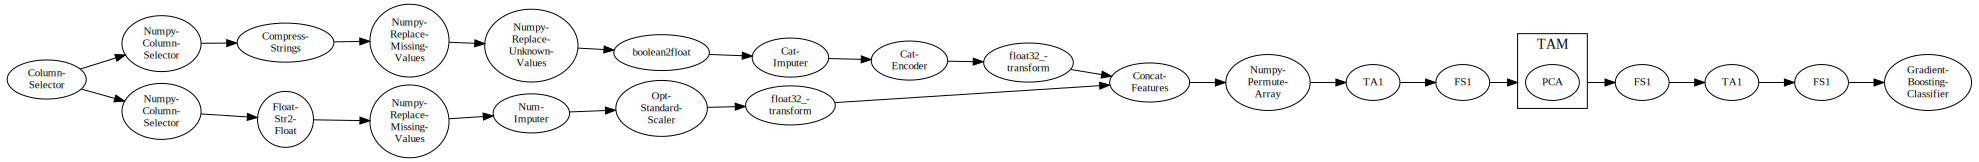

In [32]:
pipeline_model.visualize()

<a id="train_read"></a>
### Read training data

Retrieve training dataset from AutoAI experiment as pandas DataFrame.

In [33]:
train_df = optimizer.get_data_connections()[0].read()
test_df = train_df.sample(n=5).drop([experiment_metadata['prediction_column']], axis=1)

<a id="test_model"></a>
### Test pipeline model locally
You can predict target value using trained AutoAI model by calling `predict()`.

In [34]:
y_pred = pipeline_model.predict(test_df.values)
print(y_pred)

['No' 'No' 'No' 'No' 'No']


<a id="refinery"></a>
## Pipeline refinery and testing (optional)

In this section you will learn how to refine and retrain the best pipeline returned by AutoAI.
It can be performed by:
 - modifying pipeline definition source code
 - using [lale](https://lale.readthedocs.io/en/latest/) library for semi-automated data science

**Note**: In order to run this section change following cells to 'code' cell.

<a id="pipeline_definition"></a>
### Pipeline definition source code
Following cell lets you experiment with pipeline definition in python, e.g. change steps parameters.

It will inject pipeline definition to the next cell.

<a id="lale_library"></a>
### Lale library

**Note**: This is only an exemplary usage of lale package. You can import more different estimators to refine downloaded pipeline model.

#### Import estimators

<a id="decomposition_definition"></a>
#### Pipeline decomposition and new definition
In this step the last stage from pipeline is removed.

<a id="new_optimizer"></a>
#### New optimizer `hyperopt` configuration and training

This section can introduce other results than the original one and it should be used
by more advanced users.

New pipeline is re-trained by passing train data to it and calling `fit` method.

Following cell performs dataset split for refined pipeline model.

<a id="scoring"></a>
## Deploy and Score

In this section you will learn how to deploy and score pipeline model as webservice using WML instance.

<a id="deployment"></a>

### Create deployment
 **Action**: If you want to deploy refined pipeline please change the `pipeline_name` to
`new_pipeline`.
If you prefer you can also change the `deployment_name`.

 **Action**: To perform deployment please specify `target_space_id`.


In [35]:
target_space_id = "PUT_YOUR_TARGET_SPACE_ID_HERE"

from ibm_watson_machine_learning.deployment import WebService
service = WebService(source_wml_credentials=wml_credentials,
                     target_wml_credentials=wml_credentials,
                     source_project_id=experiment_metadata['project_id'],
                     target_space_id=target_space_id)
service.create(
model=pipeline_name,
metadata=experiment_metadata,
deployment_name=f'{pipeline_name}_webservice'
)

Space with id 'PUT_YOUR_TARGET_SPACE_ID_HERE' does not exist


WMLClientError: Space with id 'PUT_YOUR_TARGET_SPACE_ID_HERE' does not exist

Deployment object could be printed to show basic information:

In [ ]:
print(service)

To be able to show all available information about deployment use `.get_params()` method:

In [ ]:
service.get_params()

<a id="online_scoring"></a>
### Score webservice
You can make scoring request by calling `score()` on deployed pipeline.

In [ ]:
predictions = service.score(payload=test_df)
predictions

If you want to work with the webservice in external Python application you can retrieve the service object by:
 - initialize service by:
```
 service = WebService(target_wml_credentials=wml_credentials,
                      target_space_id=target_space_id)
```
 - get deployment_id by `service.list()` method
 - get webservice object by `service.get('deployment_id')` method

After that you can call `service.score()` method.

<a id="delete_deployment"></a>
### Delete deployment

You can delete an existing deployment by calling `service.delete()`.

<a id="authors"></a>
### Authors

Licensed Materials - Copyright © 2020 IBM. This notebook and its source code are released under the terms of the ILAN License.
Use, duplication disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

**Note:** The auto-generated notebooks are subject to the International License Agreement for Non-Warranted Programs  
(or equivalent) and License Information document for Watson Studio Auto-generated Notebook (License Terms),  
such agreements located in the link below. Specifically, the Source Components and Sample Materials clause  
included in the License Information document for Watson Studio Auto-generated Notebook applies to the auto-generated notebooks.  

By downloading, copying, accessing, or otherwise using the materials, you agree to the <a href="http://www14.software.ibm.com/cgi-bin/weblap/lap.pl?li_formnum=L-AMCU-BHU2B7&title=IBM%20Watson%20Studio%20Auto-generated%20Notebook%20V2.1">License Terms</a>  

___